<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/TratamientoImagenes5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [491]:
!pip install nvcc4jupyter

In [492]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


array([[[  9,   6,  51],
        [ 14,  11,  56],
        [ 20,  18,  64],
        ...,
        [ 20,  22,  76],
        [ 20,  21,  72],
        [ 15,  16,  67]],

       [[  9,   7,  49],
        [  1,   0,  43],
        [  7,   6,  50],
        ...,
        [ 12,  14,  68],
        [ 13,  14,  65],
        [ 13,  14,  65]],

       [[  8,   7,  47],
        [  0,   0,  38],
        [  5,   4,  46],
        ...,
        [  0,   4,  57],
        [  0,   2,  53],
        [  6,   9,  60]],

       ...,

       [[  0,  54, 139],
        [  0,  54, 139],
        [  0,  54, 139],
        ...,
        [  9,  96, 170],
        [ 11,  98, 172],
        [ 14, 101, 175]],

       [[  0,  51, 134],
        [  0,  51, 134],
        [  0,  52, 135],
        ...,
        [  5,  89, 165],
        [  8,  92, 168],
        [ 11,  95, 171]],

       [[  0,  50, 133],
        [  0,  50, 133],
        [  0,  51, 134],
        ...,
        [  4,  88, 164],
        [  6,  88, 165],
        [  8,  90, 167]]], dtype=uint8)
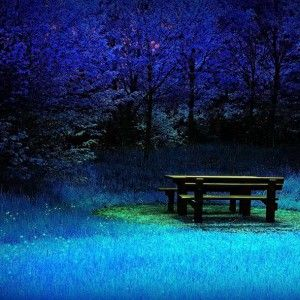

In [493]:
import cv2
import numpy as np
import plotly.express as px
from PIL import Image
imagen = cv2.imread('300x300.jpg')
imagen

array([[ 20,  25,  32, ...,  38,  36,  31],
       [ 20,  13,  19, ...,  30,  29,  29],
       [ 19,  11,  17, ...,  19,  17,  24],
       ...,
       [ 73,  73,  73, ..., 108, 110, 113],
       [ 70,  70,  71, ..., 102, 105, 108],
       [ 69,  69,  70, ..., 101, 102, 104]], dtype=uint8)
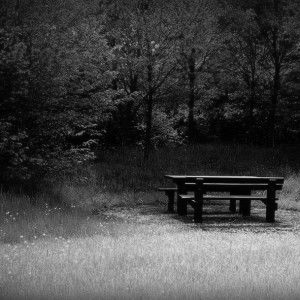

In [494]:
imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_escala_grises

In [495]:
cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

True

In [496]:
imagen = Image.open("imagen_escala_grises.jpg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])


20


In [497]:
#imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
#imagen_escala_grises

In [498]:
import sys
img = imagen.resize((150,150), Image.LANCZOS)

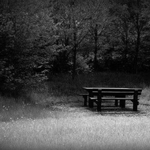

In [499]:
img

In [500]:
#imagen_RGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
#imagen_RGB

In [501]:
#cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

In [502]:

#print(imagen_escala_grises)

In [503]:
imagen_mat = np.array(list(img.getdata(band=0)), int)
list_1 = imagen_mat.tolist()  #MATRIZ en forma de lista
print(list_1)
#for i in list_1:
#  if i%1000 == 0:

#imagen_mat.shape = (img.size[0], img.size[1])
#print(imagen_mat)

#print(imagen_mat.shape)

[19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51,

In [504]:
%%cuda
#include <stdio.h>
#include <cuda_runtime.h>
#include <sys/time.h>
#include <iostream>
#include <iostream>

// KERNEL
__global__ void f_Brillo(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] + factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}

__global__ void f_Contraste(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] * factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}


int main() {
    const int rows = 150;//600
    const int cols = 150;//400
    const int size = rows * cols;


    float brillo = -100;
    float contraste = 2;
    float h_A[rows][cols] = {19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51, 47, 48, 53, 34, 49, 47, 45, 44, 41, 31, 27, 28, 47, 43, 29, 30, 28, 28, 28, 28, 26, 28, 23, 19, 23, 22, 21, 28, 26, 18, 18, 17, 17, 15, 17, 19, 24, 15, 12, 17, 22, 21, 25, 29, 38, 40, 32, 38, 30, 27, 21, 29, 25, 26, 28, 34, 32, 36, 23, 23, 33, 31, 30, 28, 25, 27, 32, 37, 36, 38, 47, 40, 41, 53, 45, 45, 47, 42, 49, 49, 53, 52, 50, 46, 49, 49, 52, 59, 59, 67, 62, 50, 64, 63, 54, 58, 59, 59, 62, 39, 42, 64, 49, 37, 44, 57, 69, 44, 41, 52, 49, 44, 32, 39, 42, 46, 48, 42, 38, 37, 32, 24, 23, 15, 39, 39, 40, 37, 50, 47, 37, 46, 48, 58, 56, 59, 51, 40, 39, 56, 53, 56, 50, 35, 42, 51, 50, 54, 53, 56, 41, 48, 42, 43, 48, 45, 45, 46, 35, 44, 47, 27, 33, 40, 37, 37, 27, 27, 20, 26, 30, 26, 23, 26, 21, 24, 25, 21, 15, 13, 12, 16, 19, 13, 15, 19, 23, 15, 14, 27, 26, 25, 18, 25, 37, 44, 45, 48, 41, 30, 18, 32, 32, 26, 26, 31, 33, 28, 13, 23, 30, 25, 32, 31, 31, 38, 33, 41, 43, 47, 41, 42, 45, 52, 44, 44, 46, 46, 51, 45, 41, 41, 44, 44, 47, 57, 52, 62, 66, 69, 58, 68, 56, 59, 59, 53, 65, 62, 61, 55, 51, 64, 56, 42, 55, 62, 57, 32, 50, 54, 49, 53, 57, 50, 47, 49, 47, 42, 41, 37, 31, 31, 23, 13, 51, 46, 42, 45, 45, 48, 46, 48, 44, 46, 56, 62, 60, 44, 43, 50, 55, 51, 56, 37, 42, 57, 56, 43, 57, 60, 47, 54, 48, 59, 45, 52, 46, 45, 46, 43, 35, 29, 32, 49, 45, 44, 36, 24, 27, 41, 27, 14, 22, 18, 17, 19, 15, 17, 13, 13, 18, 16, 26, 19, 16, 24, 21, 13, 15, 24, 26, 38, 41, 38, 47, 45, 39, 37, 36, 34, 30, 26, 35, 27, 40, 32, 37, 30, 20, 31, 32, 29, 29, 29, 32, 41, 38, 34, 29, 43, 43, 36, 39, 40, 40, 40, 48, 45, 37, 38, 52, 58, 57, 50, 44, 41, 49, 60, 57, 62, 53, 57, 69, 65, 53, 55, 53, 63, 49, 53, 48, 47, 58, 57, 52, 47, 53, 42, 57, 52, 33, 50, 43, 58, 49, 55, 43, 37, 53, 54, 29, 29, 26, 24, 39, 54, 47, 45, 57, 64, 50, 45, 52, 43, 50, 55, 53, 43, 38, 65, 51, 56, 50, 39, 46, 64, 58, 50, 64, 43, 56, 54, 58, 45, 53, 36, 48, 44, 51, 49, 53, 39, 39, 44, 48, 48, 35, 39, 34, 38, 30, 27, 17, 29, 35, 50, 32, 15, 14, 8, 17, 18, 28, 22, 19, 23, 25, 17, 14, 28, 16, 32, 44, 45, 34, 38, 39, 28, 30, 43, 30, 25, 24, 27, 36, 30, 38, 35, 30, 34, 27, 24, 24, 31, 33, 33, 34, 37, 35, 37, 37, 36, 41, 47, 32, 38, 51, 47, 52, 55, 64, 59, 54, 51, 59, 49, 55, 56, 58, 48, 50, 66, 68, 54, 57, 54, 52, 63, 52, 41, 31, 40, 56, 60, 38, 44, 60, 37, 40, 42, 43, 46, 45, 49, 65, 51, 39, 47, 49, 71, 44, 29, 59, 54, 39, 44, 39, 45, 56, 63, 47, 47, 58, 53, 50, 50, 58, 57, 42, 55, 54, 52, 64, 51, 42, 56, 54, 56, 56, 35, 47, 57, 55, 57, 54, 51, 47, 50, 51, 51, 49, 52, 55, 45, 39, 38, 36, 37, 40, 41, 42, 37, 25, 55, 59, 46, 37, 24, 12, 11, 17, 20, 26, 28, 24, 18, 26, 21, 14, 23, 24, 24, 22, 35, 28, 16, 35, 42, 29, 34, 21, 20, 17, 29, 40, 31, 46, 40, 48, 28, 27, 26, 30, 37, 37, 32, 37, 49, 50, 37, 36, 42, 49, 46, 37, 50, 53, 48, 54, 54, 46, 52, 56, 58, 57, 64, 64, 61, 56, 47, 53, 49, 63, 49, 54, 44, 47, 48, 40, 32, 34, 52, 66, 50, 45, 48, 45, 40, 43, 40, 52, 45, 68, 47, 54, 68, 67, 51, 35, 59, 37, 38, 51, 43, 43, 42, 49, 65, 54, 55, 55, 58, 56, 58, 53, 60, 58, 60, 57, 45, 63, 50, 50, 65, 59, 54, 46, 68, 59, 46, 60, 51, 56, 62, 50, 54, 51, 51, 44, 55, 50, 48, 48, 45, 32, 36, 39, 38, 44, 49, 46, 50, 46, 51, 56, 54, 48, 38, 13, 12, 10, 14, 25, 33, 31, 29, 27, 23, 23, 19, 27, 23, 24, 39, 31, 19, 22, 36, 50, 37, 17, 16, 19, 29, 42, 30, 30, 30, 46, 28, 29, 33, 30, 34, 33, 43, 43, 47, 49, 36, 36, 53, 49, 53, 49, 49, 53, 47, 40, 50, 44, 53, 58, 56, 44, 69, 70, 55, 46, 58, 48, 48, 59, 47, 52, 48, 50, 42, 40, 52, 65, 70, 80, 50, 33, 42, 30, 41, 45, 43, 59, 55, 66, 55, 53, 64, 78, 57, 47, 45, 47, 47, 59, 47, 46, 59, 56, 69, 60, 66, 50, 62, 59, 67, 62, 61, 47, 56, 60, 43, 63, 54, 58, 62, 79, 60, 57, 60, 44, 59, 52, 42, 51, 59, 66, 55, 55, 46, 47, 64, 51, 48, 39, 33, 39, 43, 43, 40, 35, 38, 40, 47, 43, 47, 49, 43, 48, 47, 28, 15, 23, 23, 20, 29, 32, 35, 32, 25, 16, 24, 28, 24, 26, 30, 32, 17, 16, 35, 40, 33, 20, 32, 25, 23, 30, 30, 29, 29, 29, 24, 27, 28, 34, 31, 37, 39, 42, 44, 46, 51, 51, 43, 50, 42, 41, 47, 51, 34, 43, 54, 53, 63, 59, 52, 57, 64, 55, 54, 56, 55, 57, 60, 50, 39, 62, 69, 66, 64, 54, 62, 62, 78, 73, 57, 41, 28, 39, 28, 21, 47, 67, 52, 53, 58, 56, 53, 66, 67, 58, 54, 58, 55, 51, 72, 63, 64, 64, 51, 58, 67, 43, 66, 67, 64, 68, 57, 56, 57, 64, 66, 54, 54, 64, 59, 60, 57, 65, 53, 48, 65, 61, 58, 57, 55, 65, 57, 69, 51, 45, 36, 33, 29, 39, 33, 39, 43, 33, 36, 36, 34, 36, 38, 44, 53, 52, 36, 39, 22, 23, 24, 26, 26, 17, 24, 32, 33, 37, 34, 28, 27, 23, 36, 47, 39, 47, 40, 45, 45, 39, 33, 31, 29, 27, 25, 23, 27, 30, 25, 24, 22, 34, 33, 43, 43, 31, 33, 39, 28, 36, 43, 52, 43, 47, 52, 47, 46, 42, 33, 40, 47, 58, 64, 60, 60, 56, 50, 49, 40, 47, 52, 55, 65, 78, 65, 62, 71, 67, 77, 50, 58, 61, 68, 66, 47, 68, 52, 37, 30, 26, 39, 52, 32, 49, 47, 38, 59, 63, 58, 60, 44, 71, 64, 39, 63, 64, 57, 56, 61, 65, 57, 48, 58, 61, 64, 80, 57, 66, 59, 46, 59, 51, 48, 54, 57, 46, 53, 55, 42, 54, 53, 51, 50, 59, 54, 70, 73, 64, 58, 54, 34, 22, 24, 35, 35, 33, 29, 20, 30, 31, 45, 41, 38, 43, 51, 43, 33, 42, 18, 13, 17, 21, 31, 29, 34, 33, 24, 32, 32, 34, 26, 22, 44, 44, 31, 45, 49, 49, 41, 39, 31, 26, 17, 15, 34, 39, 38, 31, 22, 30, 23, 22, 36, 42, 43, 42, 48, 44, 38, 35, 47, 42, 38, 49, 52, 59, 48, 40, 40, 41, 46, 49, 61, 58, 58, 60, 51, 39, 48, 47, 61, 60, 61, 57, 70, 60, 55, 68, 83, 65, 69, 71, 57, 69, 47, 46, 43, 30, 35, 46, 58, 52, 48, 47, 47, 40, 67, 73, 78, 58, 44, 64, 62, 38, 48, 52, 62, 73, 71, 66, 67, 51, 48, 34, 54, 81, 64, 61, 60, 40, 53, 51, 51, 59, 53, 56, 50, 41, 49, 46, 36, 44, 51, 60, 65, 64, 52, 58, 58, 55, 31, 21, 23, 23, 37, 37, 32, 21, 35, 37, 37, 44, 39, 41, 35, 31, 35, 28, 37, 20, 17, 24, 34, 34, 30, 37, 45, 42, 39, 40, 33, 33, 35, 33, 36, 41, 50, 37, 42, 43, 41, 26, 18, 29, 37, 32, 33, 25, 25, 31, 22, 19, 31, 33, 30, 32, 44, 33, 40, 41, 42, 47, 57, 46, 50, 40, 42, 50, 40, 47, 55, 47, 61, 56, 57, 49, 43, 45, 56, 53, 59, 65, 68, 59, 68, 62, 67, 74, 78, 84, 63, 56, 35, 60, 52, 42, 37, 43, 47, 50, 55, 53, 53, 44, 56, 52, 57, 75, 79, 70, 64, 54, 65, 48, 55, 60, 72, 75, 67, 69, 49, 51, 52, 44, 49, 50, 59, 64, 61, 46, 66, 58, 56, 61, 58, 62, 44, 61, 53, 58, 49, 49, 60, 75, 65, 62, 62, 40, 46, 44, 26, 27, 22, 27, 25, 21, 32, 38, 25, 27, 34, 32, 31, 41, 44, 39, 45, 39, 46, 29, 16, 22, 33, 22, 21, 33, 45, 47, 42, 47, 28, 23, 40, 56, 46, 54, 50, 48, 57, 43, 50, 21, 17, 31, 37, 34, 27, 27, 28, 18, 24, 30, 34, 58, 44, 28, 42, 45, 41, 44, 46, 62, 56, 60, 74, 61, 45, 61, 61, 50, 49, 61, 56, 63, 59, 40, 45, 41, 46, 61, 63, 74, 89, 81, 81, 68, 64, 61, 73, 67, 57, 68, 61, 48, 48, 47, 45, 41, 43, 57, 53, 54, 45, 39, 50, 46, 89, 75, 66, 73, 57, 54, 55, 55, 61, 62, 72, 55, 56, 52, 46, 65, 80, 49, 44, 52, 59, 56, 59, 68, 61, 57, 45, 45, 71, 50, 53, 77, 60, 71, 48, 52, 55, 67, 63, 58, 53, 45, 47, 50, 49, 27, 25, 27, 18, 29, 42, 42, 40, 32, 30, 32, 33, 45, 42, 45, 47, 44, 39, 40, 20, 19, 18, 23, 19, 23, 34, 38, 32, 37, 39, 31, 42, 47, 52, 47, 50, 52, 49, 42, 36, 23, 22, 31, 47, 41, 35, 42, 39, 52, 51, 31, 36, 48, 43, 43, 41, 42, 50, 50, 53, 45, 48, 54, 58, 65, 58, 88, 93, 50, 55, 51, 43, 58, 54, 48, 54, 70, 60, 64, 68, 74, 79, 70, 92, 76, 59, 63, 76, 56, 58, 93, 78, 63, 53, 48, 48, 34, 50, 52, 55, 46, 42, 36, 42, 53, 70, 63, 60, 64, 56, 61, 71, 64, 55, 59, 65, 60, 46, 68, 68, 64, 79, 62, 65, 74, 82, 58, 63, 55, 66, 60, 57, 54, 51, 69, 71, 75, 63, 53, 51, 51, 44, 61, 60, 58, 54, 51, 58, 46, 30, 32, 32, 24, 34, 44, 38, 30, 34, 39, 36, 36, 39, 46, 41, 30, 30, 42, 45, 34, 34, 22, 19, 16, 18, 13, 22, 25, 17, 26, 31, 40, 59, 62, 55, 47, 42, 46, 38, 32, 34, 45, 51, 23, 31, 36, 44, 53, 53, 52, 56, 44, 37, 41, 52, 53, 48, 45, 52, 53, 48, 41, 45, 51, 53, 63, 73, 61, 71, 50, 53, 44, 36, 40, 47, 78, 68, 80, 69, 59, 57, 66, 75, 77, 90, 76, 64, 88, 69, 64, 88, 80, 60, 43, 54, 44, 47, 73, 59, 50, 73, 56, 41, 62, 59, 52, 48, 90, 62, 54, 44, 49, 61, 63, 56, 73, 63, 64, 56, 68, 71, 55, 69, 78, 79, 65, 61, 56, 60, 58, 71, 63, 54, 48, 50, 48, 66, 58, 52, 52, 53, 50, 55, 45, 57, 67, 62, 62, 60, 47, 40, 39, 26, 35, 38, 45, 31, 23, 23, 30, 28, 23, 42, 35, 38, 28, 31, 26, 35, 36, 33, 18, 14, 15, 13, 11, 16, 37, 13, 16, 33, 38, 36, 45, 56, 56, 46, 44, 39, 41, 48, 69, 52, 40, 30, 25, 31, 48, 39, 41, 36, 39, 40, 43, 40, 41, 34, 34, 48, 37, 49, 41, 39, 44, 52, 39, 44, 56, 48, 46, 42, 41, 46, 45, 50, 63, 72, 97, 76, 68, 57, 60, 64, 71, 87, 71, 72, 84, 88, 71, 88, 58, 45, 32, 44, 59, 56, 69, 65, 65, 65, 63, 50, 54, 46, 48, 45, 85, 87, 40, 47, 58, 58, 62, 56, 48, 55, 61, 60, 64, 63, 49, 64, 62, 59, 67, 56, 58, 73, 72, 55, 53, 53, 62, 53, 55, 67, 47, 52, 42, 45, 61, 51, 48, 64, 66, 74, 57, 48, 52, 48, 36, 31, 42, 50, 43, 31, 26, 40, 41, 25, 31, 56, 31, 22, 25, 42, 28, 28, 32, 38, 18, 13, 16, 16, 33, 22, 24, 16, 27, 48, 33, 30, 63, 55, 43, 44, 40, 48, 58, 57, 41, 35, 34, 47, 34, 42, 47, 36, 36, 53, 49, 37, 46, 31, 22, 35, 42, 37, 46, 55, 52, 44, 36, 61, 55, 51, 68, 55, 55, 57, 50, 51, 66, 70, 61, 65, 93, 111, 67, 50, 58, 60, 78, 68, 65, 69, 74, 96, 88, 55, 34, 36, 46, 81, 76, 66, 59, 62, 73, 77, 61, 74, 61, 48, 45, 63, 74, 72, 44, 47, 56, 70, 63, 52, 61, 55, 67, 65, 60, 59, 56, 47, 54, 69, 62, 53, 75, 59, 47, 57, 52, 47, 63, 51, 60, 60, 60, 48, 38, 57, 65, 59, 58, 53, 63, 60, 56, 48, 37, 42, 43, 50, 51, 47, 49, 51, 37, 52, 37, 27, 38, 34, 37, 33, 22, 45, 33, 25, 25, 36, 18, 7, 5, 26, 35, 22, 12, 13, 25, 37, 42, 52, 64, 50, 47, 37, 35, 36, 56, 60, 15, 20, 32, 57, 50, 54, 43, 32, 25, 29, 38, 25, 38, 36, 20, 34, 44, 44, 54, 53, 57, 42, 44, 79, 58, 44, 67, 68, 47, 51, 63, 66, 63, 67, 62, 56, 78, 88, 79, 57, 44, 60, 74, 51, 76, 69, 81, 83, 94, 78, 65, 72, 74, 68, 73, 56, 75, 70, 73, 64, 45, 56, 76, 49, 48, 71, 75, 45, 38, 41, 45, 76, 54, 47, 71, 60, 54, 60, 77, 58, 55, 56, 57, 54, 57, 74, 77, 63, 58, 56, 27, 38, 64, 62, 74, 73, 72, 40, 55, 59, 50, 60, 60, 67, 66, 64, 68, 57, 60, 61, 56, 52, 50, 52, 59, 61, 57, 61, 46, 37, 23, 34, 39, 41, 33, 22, 31, 39, 25, 21, 13, 12, 9, 9, 27, 38, 24, 16, 32, 52, 47, 38, 25, 28, 30, 37, 29, 29, 38, 36, 32, 38, 26, 26, 35, 38, 33, 28, 43, 23, 12, 23, 26, 27, 40, 32, 43, 38, 37, 43, 55, 52, 47, 45, 50, 58, 59, 52, 67, 52, 56, 73, 71, 55, 57, 70, 68, 62, 58, 48, 48, 66, 67, 84, 63, 72, 76, 81, 88, 84, 81, 82, 51, 32, 45, 46, 58, 68, 62, 65, 52, 37, 58, 74, 37, 43, 50, 43, 48, 35, 36, 69, 74, 52, 69, 69, 55, 58, 68, 57, 63, 58, 54, 37, 58, 52, 41, 43, 42, 25, 20, 31, 62, 79, 71, 67, 62, 49, 48, 59, 52, 59, 63, 67, 75, 69, 61, 50, 60, 58, 45, 51, 58, 58, 67, 63, 49, 44, 41, 43, 41, 28, 23, 23, 25, 29, 20, 25, 14, 12, 19, 21, 13, 15, 42, 36, 15, 11, 18, 36, 38, 38, 16, 15, 24, 38, 30, 27, 22, 31, 37, 29, 36, 62, 55, 29, 37, 24, 49, 42, 19, 33, 21, 31, 43, 32, 47, 50, 56, 44, 44, 45, 69, 54, 43, 60, 60, 55, 54, 41, 55, 54, 58, 66, 57, 55, 73, 64, 60, 52, 47, 61, 65, 72, 64, 59, 79, 84, 67, 65, 74, 68, 77, 57, 33, 43, 29, 34, 57, 56, 70, 90, 70, 66, 80, 44, 47, 65, 58, 34, 52, 69, 52, 39, 59, 61, 40, 58, 63, 49, 59, 87, 49, 35, 41, 23, 47, 42, 39, 45, 39, 47, 58, 56, 45, 64, 47, 43, 60, 67, 60, 54, 54, 78, 85, 53, 41, 65, 48, 46, 55, 65, 55, 52, 60, 39, 52, 57, 41, 50, 60, 37, 21, 27, 19, 27, 23, 20, 35, 12, 15, 29, 27, 19, 24, 33, 18, 10, 33, 53, 43, 42, 36, 53, 47, 41, 24, 35, 32, 43, 20, 33, 29, 42, 34, 44, 35, 20, 38, 36, 31, 40, 22, 30, 32, 34, 54, 56, 55, 48, 50, 53, 62, 54, 49, 57, 59, 65, 58, 48, 51, 63, 61, 63, 65, 73, 57, 50, 51, 64, 66, 79, 76, 63, 70, 62, 55, 59, 63, 79, 96, 96, 98, 75, 42, 37, 19, 34, 56, 41, 58, 63, 62, 54, 54, 57, 48, 54, 68, 47, 60, 68, 58, 34, 41, 68, 101, 67, 54, 52, 65, 59, 47, 61, 50, 47, 64, 54, 74, 70, 59, 62, 55, 45, 49, 45, 54, 56, 61, 60, 56, 53, 63, 80, 80, 46, 64, 70, 53, 61, 61, 61, 37, 29, 28, 37, 46, 54, 41, 30, 38, 46, 32, 19, 18, 19, 24, 19, 30, 35, 28, 31, 30, 18, 16, 45, 41, 13, 39, 36, 26, 23, 31, 26, 37, 37, 29, 35, 37, 41, 40, 36, 33, 39, 45, 47, 21, 24, 44, 53, 65, 62, 34, 34, 44, 29, 53, 59, 48, 52, 53, 44, 44, 41, 53, 65, 52, 59, 58, 46, 59, 59, 53, 49, 50, 56, 54, 37, 37, 56, 84, 80, 70, 65, 79, 69, 49, 55, 59, 76, 75, 70, 99, 73, 32, 32, 28, 39, 49, 46, 50, 72, 93, 35, 57, 66, 58, 70, 97, 54, 59, 73, 59, 46, 47, 99, 127, 67, 56, 68, 78, 49, 62, 62, 54, 60, 62, 61, 72, 78, 59, 53, 65, 41, 54, 49, 46, 56, 50, 47, 52, 55, 60, 68, 56, 64, 87, 70, 58, 62, 55, 38, 26, 25, 32, 55, 47, 45, 40, 35, 29, 56, 48, 39, 16, 18, 42, 30, 12, 30, 18, 20, 25, 20, 34, 35, 19, 13, 41, 26, 15, 14, 14, 15, 24, 20, 22, 32, 42, 70, 14, 18, 47, 42, 33, 27, 24, 56, 65, 73, 55, 57, 54, 30, 38, 23, 33, 41, 40, 40, 41, 40, 28, 34, 38, 49, 59, 78, 62, 47, 45, 47, 50, 66, 74, 52, 45, 63, 54, 49, 63, 73, 59, 69, 79, 82, 66, 80, 84, 77, 61, 73, 96, 62, 42, 31, 16, 47, 86, 86, 83, 87, 49, 27, 60, 83, 62, 83, 89, 48, 50, 70, 49, 47, 40, 78, 59, 81, 127, 100, 65, 78, 71, 66, 64, 65, 69, 61, 56, 58, 50, 45, 59, 39, 47, 58, 63, 67, 69, 65, 60, 65, 63, 53, 69, 64, 58, 60, 59, 69, 66, 58, 61, 47, 35, 50, 57, 42, 57, 60, 30, 47, 54, 46, 18, 16, 45, 43, 40, 48, 35, 41, 27, 23, 30, 32, 6, 10, 44, 42, 18, 17, 14, 15, 14, 13, 30, 44, 68, 75, 9, 19, 51, 27, 33, 46, 39, 54, 57, 53, 36, 42, 74, 44, 16, 37, 50, 34, 36, 38, 42, 36, 33, 38, 47, 39, 63, 62, 57, 60, 59, 73, 66, 48, 44, 45, 48, 68, 65, 53, 52, 62, 55, 60, 67, 63, 66, 68, 73, 67, 74, 72, 66, 103, 77, 43, 53, 109, 109, 109, 113, 59, 54, 51, 37, 58, 65, 73, 69, 66, 50, 66, 81, 55, 30, 62, 57, 94, 130, 79, 55, 65, 47, 56, 52, 74, 90, 62, 81, 79, 43, 50, 55, 61, 57, 57, 63, 71, 70, 75, 83, 67, 62, 62, 56, 62, 59, 49, 58, 50, 48, 38, 53, 56, 41, 28, 38, 40, 57, 51, 33, 42, 37, 22, 34, 22, 30, 26, 31, 38, 46, 66, 43, 34, 20, 35, 26, 10, 47, 42, 24, 27, 15, 11, 15, 19, 35, 35, 53, 74, 16, 23, 24, 10, 28, 45, 25, 47, 57, 42, 47, 49, 49, 30, 21, 41, 59, 58, 59, 58, 34, 32, 50, 66, 71, 48, 45, 48, 42, 58, 66, 62, 64, 59, 52, 53, 67, 80, 78, 68, 61, 51, 61, 59, 67, 81, 70, 77, 65, 80, 77, 69, 60, 65, 57, 73, 100, 100, 55, 96, 73, 23, 71, 62, 45, 48, 35, 44, 47, 37, 49, 68, 69, 60, 42, 62, 113, 83, 63, 52, 46, 43, 53, 68, 60, 80, 75, 53, 64, 62, 54, 41, 61, 61, 62, 52, 26, 45, 56, 51, 65, 69, 65, 55, 48, 65, 58, 51, 44, 39, 49, 34, 35, 43, 28, 21, 30, 31, 29, 41, 31, 25, 26, 29, 28, 20, 26, 33, 35, 44, 42, 50, 53, 46, 28, 28, 28, 16, 42, 45, 19, 27, 20, 22, 21, 28, 42, 41, 58, 42, 34, 57, 34, 20, 16, 32, 48, 60, 60, 34, 48, 59, 47, 26, 14, 34, 58, 52, 60, 62, 41, 52, 48, 54, 62, 62, 55, 40, 30, 54, 66, 67, 65, 81, 75, 71, 93, 86, 49, 50, 44, 55, 59, 84, 67, 63, 64, 73, 65, 64, 67, 78, 61, 83, 82, 107, 82, 49, 41, 64, 58, 43, 32, 54, 38, 29, 43, 39, 44, 18, 65, 52, 56, 53, 47, 63, 114, 93, 59, 63, 47, 62, 63, 93, 72, 63, 61, 58, 84, 60, 53, 48, 77, 52, 65, 61, 12, 32, 70, 42, 34, 58, 71, 55, 46, 62, 40, 40, 42, 70, 37, 36, 47, 57, 46, 34, 34, 23, 30, 44, 31, 41, 33, 26, 31, 19, 20, 28, 53, 70, 44, 49, 35, 43, 31, 14, 22, 16, 21, 26, 22, 24, 16, 25, 34, 39, 51, 56, 49, 29, 46, 47, 31, 33, 49, 43, 61, 60, 45, 44, 56, 50, 43, 28, 21, 32, 46, 26, 38, 35, 53, 43, 36, 46, 53, 50, 58, 49, 40, 73, 63, 43, 57, 73, 67, 65, 59, 75, 72, 51, 62, 72, 90, 95, 87, 62, 73, 68, 58, 57, 80, 79, 87, 84, 104, 102, 64, 51, 53, 54, 48, 53, 50, 49, 34, 56, 64, 38, 40, 22, 55, 52, 62, 53, 37, 45, 77, 64, 54, 48, 60, 64, 54, 77, 74, 76, 60, 64, 60, 59, 38, 37, 52, 63, 74, 53, 29, 48, 56, 36, 47, 55, 67, 46, 51, 44, 45, 42, 47, 64, 57, 54, 53, 49, 49, 39, 38, 30, 36, 41, 38, 42, 34, 30, 27, 18, 14, 25, 42, 42, 50, 48, 33, 28, 19, 24, 16, 8, 16, 13, 22, 18, 16, 47, 60, 49, 38, 50, 48, 57, 43, 37, 33, 36, 59, 32, 45, 50, 36, 37, 61, 49, 20, 25, 34, 36, 51, 34, 38, 41, 51, 35, 31, 54, 44, 45, 59, 56, 57, 70, 51, 40, 48, 51, 49, 62, 59, 69, 81, 71, 64, 68, 82, 81, 81, 88, 80, 62, 69, 69, 82, 61, 80, 81, 78, 95, 105, 75, 56, 73, 51, 47, 85, 62, 55, 71, 48, 45, 44, 20, 43, 60, 51, 32, 25, 38, 60, 39, 21, 40, 47, 44, 56, 48, 65, 68, 64, 58, 65, 60, 38, 28, 28, 51, 57, 37, 37, 46, 51, 50, 57, 56, 64, 29, 44, 36, 33, 42, 38, 46, 51, 52, 55, 51, 52, 36, 24, 39, 75, 57, 28, 68, 49, 24, 29, 26, 19, 18, 28, 42, 46, 38, 29, 26, 35, 27, 11, 6, 17, 14, 29, 18, 24, 55, 39, 27, 31, 29, 37, 30, 30, 38, 55, 35, 36, 32, 44, 52, 35, 40, 59, 43, 33, 44, 30, 32, 40, 42, 45, 36, 42, 37, 47, 44, 44, 52, 48, 38, 64, 59, 35, 36, 43, 52, 56, 63, 66, 66, 69, 64, 64, 64, 75, 69, 72, 88, 51, 59, 59, 81, 90, 63, 48, 74, 79, 75, 98, 81, 60, 61, 95, 65, 58, 67, 64, 52, 42, 56, 39, 52, 79, 59, 74, 51, 38, 43, 36, 50, 51, 46, 35, 41, 50, 74, 56, 70, 65, 56, 66, 79, 52, 53, 31, 34, 45, 31, 42, 40, 47, 56, 64, 59, 37, 73, 62, 36, 39, 49, 45, 41, 58, 51, 46, 52, 53, 39, 36, 39, 51, 42, 39, 47, 58, 31, 24, 32, 23, 24, 42, 56, 34, 19, 29, 38, 47, 29, 21, 10, 10, 26, 32, 13, 33, 28, 22, 19, 11, 12, 13, 23, 23, 51, 50, 37, 32, 33, 39, 47, 39, 53, 52, 34, 32, 33, 20, 26, 39, 24, 25, 32, 37, 48, 44, 31, 49, 64, 50, 40, 54, 55, 64, 47, 57, 66, 63, 62, 63, 61, 73, 75, 57, 67, 62, 53, 62, 66, 70, 83, 71, 72, 73, 60, 27, 66, 102, 82, 75, 78, 60, 63, 85, 83, 79, 59, 66, 67, 68, 77, 76, 71, 85, 72, 72, 76, 51, 43, 38, 47, 66, 49, 60, 78, 66, 64, 64, 74, 80, 79, 49, 58, 54, 42, 44, 39, 31, 19, 28, 53, 54, 70, 72, 70, 56, 77, 43, 36, 51, 55, 56, 41, 50, 55, 43, 31, 34, 38, 41, 32, 27, 51, 57, 41, 44, 40, 27, 24, 27, 27, 44, 49, 28, 25, 25, 36, 43, 26, 31, 23, 6, 28, 22, 21, 24, 18, 20, 26, 14, 15, 14, 26, 46, 26, 20, 52, 54, 44, 45, 42, 28, 34, 44, 45, 47, 43, 38, 17, 24, 25, 38, 47, 32, 50, 40, 37, 54, 56, 40, 29, 51, 53, 54, 60, 66, 72, 73, 74, 59, 72, 74, 75, 60, 62, 52, 50, 63, 58, 43, 50, 70, 63, 60, 61, 54, 70, 73, 76, 51, 48, 53, 60, 60, 62, 58, 50, 66, 74, 57, 79, 69, 66, 72, 64, 60, 45, 49, 42, 37, 59, 85, 79, 79, 62, 52, 72, 77, 76, 79, 69, 48, 23, 47, 40, 42, 42, 23, 16, 24, 45, 73, 73, 78, 61, 46, 46, 57, 59, 59, 53, 55, 44, 42, 27, 30, 46, 40, 39, 40, 22, 30, 50, 50, 47, 58, 47, 25, 23, 27, 39, 57, 28, 25, 30, 37, 35, 37, 41, 36, 31, 7, 34, 19, 30, 21, 12, 28, 33, 23, 30, 32, 29, 48, 32, 24, 43, 26, 28, 27, 22, 32, 37, 37, 43, 62, 63, 49, 18, 28, 50, 54, 42, 31, 38, 31, 39, 52, 48, 41, 35, 35, 48, 58, 70, 53, 61, 79, 58, 51, 60, 48, 64, 73, 54, 63, 66, 57, 59, 44, 43, 39, 35, 72, 76, 60, 40, 59, 58, 42, 44, 38, 48, 57, 58, 63, 53, 35, 50, 52, 67, 58, 64, 63, 65, 62, 49, 51, 56, 49, 56, 71, 73, 77, 55, 45, 68, 60, 46, 60, 53, 48, 32, 42, 45, 27, 43, 28, 26, 15, 65, 93, 72, 87, 35, 31, 41, 47, 59, 48, 52, 54, 49, 44, 40, 45, 42, 37, 51, 38, 40, 48, 25, 54, 60, 37, 30, 22, 18, 24, 48, 56, 22, 38, 41, 45, 27, 61, 72, 40, 20, 13, 22, 33, 52, 39, 43, 42, 37, 48, 48, 41, 33, 16, 27, 29, 26, 23, 17, 20, 30, 34, 33, 36, 38, 40, 38, 23, 18, 41, 39, 31, 34, 34, 31, 21, 32, 45, 57, 56, 47, 38, 40, 50, 67, 55, 51, 56, 59, 62, 68, 64, 66, 71, 56, 54, 69, 63, 82, 75, 61, 49, 52, 75, 72, 55, 41, 52, 66, 42, 30, 48, 55, 58, 74, 64, 64, 33, 42, 50, 55, 72, 67, 60, 57, 52, 49, 37, 37, 49, 64, 95, 93, 76, 44, 55, 61, 69, 60, 57, 35, 52, 71, 39, 42, 42, 58, 39, 21, 20, 56, 86, 100, 54, 35, 54, 50, 48, 33, 35, 55, 66, 62, 54, 40, 39, 56, 44, 25, 37, 35, 45, 29, 32, 50, 37, 42, 46, 36, 26, 44, 59, 38, 18, 18, 36, 35, 39, 52, 66, 20, 8, 11, 36, 49, 44, 33, 43, 56, 60, 56, 44, 45, 19, 22, 18, 27, 29, 17, 18, 29, 39, 30, 23, 36, 38, 26, 15, 26, 36, 28, 26, 42, 32, 30, 39, 50, 55, 53, 32, 36, 35, 35, 45, 48, 52, 44, 37, 46, 56, 69, 75, 57, 49, 54, 59, 56, 55, 58, 63, 73, 63, 59, 54, 52, 57, 52, 50, 71, 42, 27, 48, 80, 55, 86, 65, 58, 48, 48, 61, 61, 56, 51, 50, 35, 53, 36, 9, 32, 62, 84, 99, 79, 63, 48, 66, 71, 59, 56, 49, 39, 57, 66, 75, 40, 29, 44, 29, 7, 10, 60, 92, 64, 27, 45, 70, 55, 31, 48, 58, 48, 37, 24, 30, 31, 41, 44, 45, 40, 54, 47, 43, 34, 54, 28, 34, 41, 58, 35, 22, 40, 58, 50, 57, 36, 21, 34, 27, 30, 47, 31, 7, 10, 25, 37, 33, 24, 34, 39, 40, 44, 50, 42, 13, 20, 14, 12, 14, 22, 18, 9, 25, 42, 33, 20, 18, 30, 32, 32, 21, 30, 37, 25, 26, 35, 34, 48, 65, 46, 37, 40, 36, 39, 54, 57, 48, 57, 46, 53, 58, 72, 72, 44, 36, 36, 50, 52, 49, 53, 54, 60, 61, 52, 47, 58, 53, 44, 52, 52, 29, 22, 51, 68, 53, 59, 57, 63, 42, 39, 60, 56, 42, 50, 51, 40, 61, 59, 20, 19, 48, 77, 93, 53, 34, 49, 70, 59, 62, 51, 26, 33, 37, 36, 46, 32, 19, 39, 54, 12, 8, 45, 53, 24, 15, 40, 52, 44, 28, 43, 52, 42, 45, 50, 53, 51, 43, 38, 41, 63, 55, 35, 46, 62, 66, 41, 26, 40, 66, 44, 18, 31, 48, 41, 47, 38, 29, 20, 34, 55, 57, 38, 3, 15, 42, 38, 46, 40, 62, 53, 46, 58, 45, 38, 20, 13, 10, 10, 14, 19, 13, 13, 26, 51, 65, 49, 48, 51, 55, 27, 21, 29, 25, 38, 24, 38, 34, 36, 51, 43, 47, 38, 36, 39, 49, 56, 58, 47, 51, 45, 60, 68, 84, 55, 25, 36, 68, 59, 49, 48, 66, 81, 70, 57, 41, 29, 48, 82, 88, 58, 71, 70, 67, 55, 37, 46, 49, 49, 48, 28, 37, 51, 37, 38, 37, 54, 68, 50, 33, 31, 62, 72, 66, 64, 45, 58, 55, 56, 52, 38, 43, 45, 33, 34, 23, 43, 43, 42, 57, 15, 11, 32, 30, 23, 29, 35, 27, 33, 27, 30, 34, 37, 38, 35, 63, 68, 39, 42, 35, 37, 40, 47, 56, 57, 35, 38, 33, 21, 35, 48, 14, 31, 61, 66, 58, 48, 46, 49, 45, 67, 82, 52, 3, 15, 47, 59, 59, 72, 69, 54, 32, 35, 32, 34, 31, 23, 10, 13, 17, 10, 24, 27, 34, 38, 44, 46, 43, 22, 58, 38, 27, 28, 29, 30, 35, 30, 30, 38, 29, 43, 51, 35, 37, 51, 42, 55, 61, 53, 49, 54, 48, 44, 54, 66, 64, 54, 63, 71, 77, 69, 64, 67, 69, 56, 55, 39, 67, 79, 86, 109, 85, 93, 98, 68, 48, 56, 47, 48, 57, 30, 52, 52, 43, 39, 37, 47, 60, 42, 18, 27, 48, 56, 66, 44, 43, 39, 53, 46, 20, 40, 41, 54, 52, 55, 45, 51, 47, 30, 30, 31, 26, 49, 46, 50, 52, 48, 59, 50, 37, 34, 33, 22, 26, 32, 51, 44, 43, 29, 38, 50, 43, 32, 26, 32, 36, 33, 23, 29, 31, 37, 18, 33, 66, 71, 41, 46, 51, 61, 46, 46, 61, 35, 6, 26, 68, 48, 65, 70, 43, 21, 15, 17, 18, 18, 10, 8, 4, 11, 9, 7, 23, 20, 15, 19, 20, 17, 16, 18, 40, 41, 39, 41, 24, 20, 34, 35, 31, 35, 30, 29, 33, 36, 41, 54, 45, 55, 63, 57, 50, 61, 49, 54, 48, 45, 27, 17, 37, 53, 53, 60, 66, 68, 65, 84, 62, 60, 73, 52, 54, 76, 67, 71, 51, 37, 38, 40, 41, 37, 43, 29, 51, 33, 27, 45, 44, 43, 58, 50, 12, 23, 36, 54, 51, 41, 44, 57, 53, 30, 29, 39, 44, 49, 64, 64, 49, 35, 36, 54, 20, 16, 18, 29, 40, 52, 57, 63, 58, 63, 69, 65, 34, 24, 40, 50, 51, 47, 50, 52, 50, 33, 35, 28, 39, 46, 48, 29, 16, 13, 40, 53, 20, 44, 43, 49, 55, 55, 58, 49, 56, 37, 49, 29, 5, 27, 44, 37, 38, 24, 26, 17, 23, 20, 18, 22, 11, 15, 12, 11, 11, 14, 14, 10, 11, 16, 29, 27, 20, 22, 26, 31, 37, 36, 20, 39, 27, 24, 35, 42, 35, 30, 32, 43, 53, 59, 60, 65, 64, 60, 57, 71, 67, 57, 58, 46, 31, 31, 46, 49, 43, 41, 53, 39, 73, 73, 58, 52, 54, 48, 48, 54, 76, 78, 51, 43, 38, 37, 47, 43, 34, 17, 53, 18, 18, 44, 36, 32, 54, 53, 21, 21, 32, 53, 54, 39, 56, 76, 37, 34, 66, 55, 39, 34, 45, 40, 47, 22, 32, 59, 25, 11, 14, 20, 50, 60, 43, 48, 52, 57, 59, 52, 40, 30, 39, 45, 52, 44, 53, 50, 52, 52, 48, 33, 62, 59, 43, 24, 23, 13, 15, 38, 23, 60, 44, 33, 50, 40, 71, 68, 46, 64, 52, 10, 8, 12, 31, 52, 49, 31, 23, 17, 28, 14, 21, 28, 14, 17, 11, 9, 10, 13, 9, 11, 15, 29, 26, 19, 20, 18, 19, 35, 23, 30, 34, 32, 31, 26, 30, 37, 28, 43, 53, 70, 63, 62, 66, 54, 54, 51, 52, 28, 55, 44, 33, 19, 37, 31, 30, 48, 50, 46, 49, 51, 44, 45, 56, 52, 61, 49, 58, 64, 46, 42, 20, 35, 30, 20, 74, 62, 48, 19, 26, 12, 23, 54, 67, 42, 45, 32, 10, 19, 55, 66, 42, 35, 52, 39, 36, 53, 69, 56, 67, 56, 73, 49, 38, 36, 25, 32, 32, 10, 8, 29, 47, 58, 50, 49, 43, 47, 28, 43, 50, 28, 34, 28, 42, 56, 53, 42, 51, 51, 53, 45, 46, 59, 57, 47, 14, 12, 22, 57, 29, 31, 21, 36, 42, 38, 48, 53, 32, 63, 65, 10, 7, 17, 28, 47, 40, 23, 19, 22, 13, 8, 20, 27, 9, 11, 13, 8, 7, 13, 18, 21, 20, 26, 22, 23, 41, 37, 20, 25, 28, 34, 37, 34, 28, 38, 39, 30, 33, 28, 45, 50, 47, 46, 58, 50, 55, 49, 44, 16, 25, 35, 36, 24, 53, 57, 52, 53, 24, 29, 47, 52, 50, 67, 61, 65, 51, 45, 64, 66, 20, 12, 20, 38, 38, 19, 37, 40, 43, 19, 14, 7, 30, 55, 66, 53, 45, 37, 18, 24, 43, 44, 45, 66, 40, 22, 45, 58, 61, 44, 53, 73, 84, 47, 46, 37, 41, 51, 54, 12, 17, 44, 53, 62, 61, 58, 55, 38, 29, 50, 49, 28, 25, 30, 51, 44, 43, 45, 39, 37, 49, 46, 38, 42, 59, 47, 23, 8, 21, 32, 19, 18, 27, 34, 44, 48, 19, 49, 38, 35, 35, 12, 11, 19, 36, 45, 29, 15, 19, 21, 19, 14, 8, 12, 7, 9, 13, 10, 9, 13, 18, 24, 22, 16, 30, 31, 36, 55, 22, 13, 23, 36, 25, 27, 31, 24, 23, 39, 43, 31, 37, 41, 47, 41, 48, 56, 41, 41, 45, 44, 43, 35, 25, 32, 46, 57, 53, 57, 48, 15, 42, 50, 66, 69, 62, 49, 46, 51, 65, 48, 18, 11, 45, 35, 37, 40, 22, 24, 38, 18, 12, 12, 25, 39, 38, 34, 41, 48, 42, 38, 47, 36, 57, 62, 24, 39, 49, 47, 52, 65, 62, 49, 51, 41, 36, 31, 46, 44, 45, 21, 21, 39, 47, 53, 53, 49, 45, 52, 37, 28, 25, 21, 15, 35, 49, 41, 30, 31, 41, 29, 23, 30, 27, 35, 56, 37, 46, 18, 14, 19, 5, 12, 21, 43, 28, 33, 24, 58, 28, 12, 28, 14, 6, 12, 37, 26, 25, 46, 40, 35, 31, 23, 23, 23, 6, 8, 13, 12, 7, 8, 15, 17, 12, 14, 18, 11, 24, 34, 23, 17, 19, 24, 15, 21, 31, 33, 28, 30, 30, 30, 25, 35, 33, 30, 36, 46, 26, 30, 25, 38, 39, 49, 43, 42, 46, 42, 33, 47, 59, 50, 61, 56, 61, 45, 41, 39, 46, 50, 27, 41, 36, 11, 35, 54, 42, 51, 24, 29, 27, 23, 13, 13, 27, 28, 25, 40, 52, 45, 38, 42, 56, 33, 43, 18, 34, 65, 46, 43, 47, 51, 48, 49, 45, 31, 25, 31, 28, 41, 34, 16, 24, 42, 45, 69, 63, 66, 35, 42, 45, 31, 35, 27, 28, 44, 29, 35, 29, 30, 29, 20, 15, 20, 17, 35, 34, 31, 34, 32, 12, 16, 7, 7, 16, 22, 24, 18, 27, 28, 30, 18, 19, 8, 8, 11, 23, 27, 30, 40, 31, 44, 36, 41, 39, 35, 15, 11, 7, 3, 5, 9, 15, 12, 14, 17, 26, 24, 24, 18, 22, 18, 19, 25, 24, 19, 21, 36, 26, 18, 20, 25, 29, 32, 30, 40, 60, 48, 40, 30, 18, 33, 37, 38, 44, 45, 35, 57, 46, 53, 50, 77, 68, 44, 22, 26, 33, 36, 54, 39, 16, 23, 19, 3, 28, 47, 27, 46, 32, 45, 27, 9, 11, 11, 21, 27, 31, 24, 37, 55, 27, 27, 40, 27, 25, 30, 60, 57, 48, 44, 40, 26, 38, 49, 49, 46, 39, 43, 47, 73, 48, 23, 35, 56, 39, 65, 63, 60, 33, 23, 28, 37, 41, 50, 38, 21, 31, 43, 29, 30, 33, 36, 26, 18, 29, 35, 32, 39, 23, 24, 15, 15, 7, 23, 22, 27, 57, 40, 8, 11, 22, 13, 17, 4, 5, 11, 18, 24, 22, 17, 25, 36, 32, 38, 34, 33, 15, 13, 8, 8, 6, 7, 15, 21, 9, 13, 27, 35, 32, 30, 13, 14, 15, 26, 25, 16, 24, 26, 19, 23, 35, 27, 42, 41, 38, 44, 49, 51, 56, 36, 39, 46, 30, 19, 33, 54, 60, 68, 49, 56, 52, 43, 39, 30, 16, 17, 28, 40, 28, 31, 59, 60, 26, 9, 43, 57, 61, 79, 26, 54, 63, 11, 10, 4, 12, 29, 35, 29, 25, 43, 32, 11, 15, 18, 35, 41, 50, 40, 39, 32, 23, 41, 33, 34, 36, 35, 44, 38, 43, 52, 48, 33, 34, 48, 53, 29, 50, 41, 42, 24, 30, 57, 64, 54, 56, 30, 36, 36, 24, 20, 31, 25, 21, 16, 20, 25, 28, 35, 30, 19, 21, 20, 10, 25, 25, 23, 32, 32, 15, 16, 19, 15, 19, 10, 7, 11, 17, 23, 30, 21, 26, 26, 18, 24, 31, 31, 6, 5, 8, 8, 6, 11, 24, 19, 18, 32, 27, 20, 38, 47, 21, 20, 20, 13, 16, 25, 32, 26, 32, 30, 31, 34, 38, 32, 30, 39, 42, 35, 55, 42, 32, 37, 32, 31, 51, 60, 60, 50, 24, 32, 27, 12, 7, 14, 20, 37, 38, 33, 58, 90, 79, 65, 69, 59, 57, 84, 95, 83, 37, 38, 94, 21, 7, 46, 44, 44, 58, 43, 37, 27, 30, 9, 11, 21, 49, 34, 51, 40, 39, 26, 24, 20, 32, 29, 29, 32, 29, 39, 44, 39, 44, 25, 21, 62, 30, 45, 56, 51, 55, 59, 76, 59, 64, 59, 46, 38, 33, 37, 23, 13, 22, 15, 12, 28, 33, 40, 35, 29, 39, 47, 34, 28, 18, 22, 23, 17, 15, 17, 32, 41, 41, 23, 12, 10, 13, 24, 20, 15, 10, 22, 35, 39, 22, 18, 18, 12, 8, 10, 5, 8, 9, 17, 33, 28, 32, 39, 43, 26, 35, 33, 16, 14, 17, 12, 15, 22, 18, 37, 32, 34, 16, 22, 30, 38, 39, 28, 47, 57, 55, 32, 14, 22, 29, 34, 30, 33, 40, 29, 26, 18, 31, 48, 31, 33, 53, 65, 64, 68, 61, 73, 64, 75, 64, 73, 86, 67, 62, 55, 67, 41, 29, 46, 63, 80, 91, 63, 59, 45, 43, 35, 9, 7, 12, 20, 37, 30, 42, 44, 23, 22, 33, 30, 28, 28, 40, 36, 31, 35, 31, 26, 31, 20, 21, 29, 23, 50, 31, 31, 40, 47, 58, 58, 62, 48, 47, 48, 40, 43, 37, 12, 39, 35, 30, 52, 48, 34, 44, 45, 30, 30, 34, 32, 16, 21, 32, 20, 22, 26, 37, 41, 35, 20, 19, 7, 15, 21, 9, 13, 11, 19, 22, 17, 11, 18, 19, 15, 7, 6, 6, 7, 8, 7, 14, 15, 13, 8, 20, 15, 25, 23, 14, 20, 16, 20, 14, 16, 14, 25, 16, 21, 24, 21, 25, 33, 40, 32, 43, 29, 29, 26, 23, 12, 17, 28, 30, 17, 14, 7, 11, 13, 29, 39, 54, 58, 50, 62, 51, 53, 46, 67, 66, 65, 65, 58, 45, 46, 29, 33, 54, 46, 33, 64, 54, 58, 65, 38, 29, 66, 59, 24, 17, 11, 32, 36, 46, 26, 35, 35, 40, 38, 42, 35, 30, 21, 24, 27, 27, 28, 27, 28, 20, 14, 14, 29, 30, 31, 29, 33, 47, 37, 46, 52, 53, 50, 36, 25, 22, 33, 33, 22, 62, 61, 49, 56, 51, 38, 33, 28, 33, 16, 26, 18, 11, 17, 38, 32, 17, 28, 19, 17, 25, 17, 12, 7, 9, 27, 17, 6, 8, 5, 8, 10, 17, 13, 12, 15, 6, 7, 8, 7, 9, 19, 17, 13, 9, 11, 7, 13, 21, 25, 19, 21, 18, 13, 16, 16, 24, 26, 24, 20, 24, 26, 29, 22, 15, 25, 27, 17, 29, 46, 25, 34, 32, 23, 45, 31, 16, 10, 13, 18, 11, 32, 51, 50, 44, 52, 61, 64, 54, 48, 82, 57, 48, 38, 12, 7, 25, 23, 53, 67, 55, 65, 22, 34, 44, 47, 50, 53, 26, 21, 34, 7, 47, 51, 26, 34, 36, 35, 40, 34, 23, 21, 21, 17, 21, 28, 28, 26, 30, 25, 21, 11, 7, 21, 21, 17, 35, 44, 57, 49, 52, 56, 57, 50, 42, 29, 10, 6, 7, 9, 30, 39, 41, 44, 26, 29, 24, 17, 31, 37, 21, 16, 11, 16, 11, 16, 17, 27, 27, 22, 26, 15, 4, 4, 18, 29, 15, 11, 13, 18, 11, 13, 17, 21, 30, 9, 4, 6, 11, 11, 12, 30, 38, 15, 16, 13, 6, 6, 8, 12, 15, 18, 18, 17, 19, 18, 18, 23, 20, 28, 33, 30, 49, 46, 35, 40, 54, 38, 26, 28, 22, 26, 30, 34, 31, 29, 28, 41, 45, 53, 33, 31, 43, 42, 45, 36, 64, 79, 83, 66, 68, 63, 19, 25, 39, 57, 50, 70, 62, 66, 65, 58, 64, 34, 34, 44, 39, 25, 7, 20, 19, 7, 29, 25, 22, 23, 18, 26, 23, 27, 23, 20, 17, 23, 26, 23, 30, 22, 33, 42, 33, 11, 10, 20, 12, 22, 34, 33, 44, 44, 46, 20, 19, 14, 25, 21, 7, 7, 7, 9, 26, 39, 32, 25, 10, 11, 7, 16, 20, 39, 19, 9, 7, 12, 10, 9, 17, 23, 31, 29, 16, 11, 7, 3, 19, 21, 20, 26, 27, 18, 13, 14, 12, 13, 16, 8, 3, 5, 22, 21, 10, 13, 23, 19, 14, 9, 10, 9, 5, 7, 11, 14, 10, 14, 16, 17, 17, 25, 19, 38, 37, 36, 42, 46, 50, 30, 26, 26, 24, 30, 31, 29, 30, 39, 35, 32, 31, 44, 43, 33, 46, 40, 30, 47, 52, 36, 49, 60, 67, 70, 92, 87, 34, 64, 75, 91, 56, 49, 29, 33, 34, 19, 22, 43, 32, 33, 27, 22, 17, 7, 7, 5, 16, 15, 17, 23, 18, 21, 26, 24, 19, 19, 16, 19, 17, 31, 23, 26, 34, 26, 25, 6, 8, 28, 44, 49, 55, 36, 50, 46, 38, 36, 27, 9, 6, 4, 2, 8, 12, 9, 14, 14, 8, 11, 20, 11, 9, 17, 32, 21, 8, 4, 7, 10, 18, 19, 19, 21, 20, 21, 22, 17, 4, 4, 10, 29, 45, 32, 20, 22, 14, 6, 9, 15, 11, 14, 12, 12, 10, 8, 8, 8, 12, 8, 9, 4, 13, 15, 9, 14, 9, 14, 12, 13, 12, 13, 17, 16, 23, 32, 35, 35, 32, 23, 37, 27, 16, 21, 24, 18, 26, 33, 28, 46, 37, 37, 35, 32, 48, 45, 48, 45, 30, 37, 42, 40, 44, 50, 57, 84, 56, 57, 50, 67, 83, 47, 33, 51, 30, 18, 9, 7, 14, 34, 42, 30, 16, 24, 17, 12, 4, 9, 23, 25, 26, 31, 24, 27, 32, 31, 27, 30, 19, 25, 23, 28, 25, 33, 31, 24, 13, 3, 13, 46, 54, 57, 49, 53, 29, 26, 33, 41, 27, 14, 7, 6, 9, 11, 23, 33, 23, 14, 27, 29, 18, 19, 36, 17, 10, 8, 7, 6, 3, 6, 15, 17, 16, 9, 7, 8, 13, 16, 6, 4, 15, 25, 22, 28, 22, 31, 26, 15, 20, 36, 22, 20, 19, 5, 6, 6, 8, 9, 6, 8, 7, 8, 8, 5, 11, 15, 12, 19, 16, 14, 13, 27, 17, 15, 29, 16, 20, 19, 22, 28, 31, 19, 31, 35, 22, 27, 35, 33, 36, 29, 16, 24, 38, 37, 40, 30, 26, 48, 51, 32, 31, 43, 39, 45, 47, 47, 35, 48, 49, 26, 26, 16, 9, 21, 24, 13, 5, 10, 20, 36, 38, 15, 22, 26, 24, 25, 9, 14, 24, 45, 44, 42, 31, 36, 40, 30, 34, 22, 22, 30, 13, 40, 53, 52, 66, 48, 10, 9, 10, 40, 51, 57, 38, 46, 33, 28, 27, 26, 11, 8, 3, 10, 15, 24, 35, 46, 52, 44, 35, 33, 28, 18, 30, 30, 13, 6, 11, 7, 7, 10, 11, 5, 10, 13, 8, 6, 8, 11, 10, 9, 21, 22, 14, 18, 19, 12, 14, 12, 12, 13, 9, 10, 6, 10, 6, 5, 8, 7, 17, 17, 6, 9, 4, 5, 9, 8, 11, 11, 12, 8, 12, 21, 12, 14, 16, 14, 17, 19, 17, 14, 9, 14, 22, 17, 19, 37, 30, 21, 34, 26, 13, 13, 24, 18, 16, 26, 14, 14, 37, 48, 44, 25, 32, 36, 53, 39, 56, 63, 55, 53, 28, 10, 8, 8, 15, 10, 7, 10, 24, 22, 12, 21, 45, 25, 26, 25, 8, 8, 36, 58, 37, 28, 39, 39, 28, 21, 28, 19, 19, 32, 24, 41, 57, 41, 44, 59, 30, 5, 27, 53, 47, 44, 26, 26, 27, 39, 14, 9, 15, 15, 13, 18, 19, 24, 53, 58, 53, 34, 19, 27, 20, 15, 11, 6, 9, 14, 12, 7, 4, 10, 11, 11, 18, 12, 7, 12, 14, 10, 7, 8, 13, 16, 16, 12, 15, 10, 3, 5, 10, 14, 11, 11, 6, 11, 12, 6, 5, 4, 9, 7, 8, 12, 10, 8, 9, 5, 10, 8, 15, 22, 14, 15, 10, 13, 10, 6, 18, 26, 31, 24, 15, 10, 14, 12, 29, 12, 11, 17, 20, 32, 28, 23, 17, 12, 15, 9, 24, 25, 30, 39, 52, 39, 40, 38, 44, 33, 29, 43, 49, 47, 37, 12, 7, 12, 14, 10, 7, 18, 21, 17, 9, 33, 49, 45, 31, 22, 8, 12, 45, 41, 50, 53, 48, 61, 42, 19, 24, 20, 27, 22, 38, 68, 54, 37, 46, 59, 53, 19, 42, 64, 55, 36, 44, 27, 19, 22, 11, 7, 19, 33, 33, 34, 24, 18, 58, 63, 47, 49, 45, 40, 34, 38, 23, 17, 14, 17, 24, 7, 24, 49, 29, 15, 6, 6, 16, 14, 11, 18, 9, 12, 24, 15, 19, 25, 16, 23, 15, 10, 8, 9, 9, 7, 2, 2, 3, 4, 2, 4, 5, 7, 14, 11, 15, 10, 8, 7, 10, 15, 16, 17, 24, 15, 13, 21, 27, 20, 8, 23, 12, 9, 11, 22, 12, 12, 34, 30, 45, 44, 51, 25, 16, 14, 9, 24, 28, 14, 39, 53, 26, 23, 29, 36, 45, 26, 21, 6, 10, 16, 14, 19, 25, 16, 7, 15, 10, 7, 5, 20, 29, 5, 27, 39, 41, 33, 21, 32, 12, 14, 60, 52, 66, 70, 44, 37, 27, 23, 11, 50, 54, 26, 29, 71, 87, 70, 86, 76, 43, 17, 30, 39, 36, 18, 46, 36, 28, 18, 23, 28, 28, 21, 9, 27, 37, 18, 26, 42, 49, 42, 50, 59, 55, 39, 67, 43, 13, 19, 14, 5, 42, 62, 33, 24, 22, 13, 10, 21, 15, 7, 7, 9, 17, 12, 15, 24, 21, 22, 20, 13, 13, 16, 12, 19, 4, 6, 5, 6, 11, 12, 7, 10, 8, 21, 23, 10, 10, 11, 18, 29, 24, 17, 29, 32, 17, 24, 33, 26, 16, 27, 20, 15, 18, 22, 35, 33, 28, 31, 56, 53, 52, 44, 32, 34, 31, 14, 22, 15, 20, 23, 23, 34, 50, 44, 42, 18, 26, 28, 36, 33, 8, 6, 15, 9, 8, 7, 5, 7, 5, 10, 15, 10, 21, 38, 41, 32, 19, 9, 7, 22, 65, 54, 68, 73, 71, 68, 48, 13, 23, 55, 60, 15, 23, 57, 59, 68, 86, 92, 49, 5, 26, 34, 32, 19, 30, 55, 41, 31, 27, 34, 26, 27, 31, 25, 29, 30, 49, 69, 57, 59, 50, 49, 42, 56, 30, 28, 19, 16, 15, 7, 17, 45, 27, 22, 23, 6, 10, 13, 24, 5, 6, 12, 24, 23, 15, 11, 16, 18, 12, 14, 17, 16, 18, 20, 6, 6, 9, 8, 12, 11, 10, 9, 7, 7, 11, 11, 14, 11, 18, 13, 19, 22, 21, 27, 20, 23, 30, 16, 27, 29, 16, 27, 34, 36, 44, 43, 53, 35, 33, 43, 48, 56, 47, 40, 39, 47, 42, 33, 20, 36, 28, 38, 40, 49, 38, 36, 31, 56, 36, 30, 15, 9, 14, 17, 10, 9, 16, 8, 6, 10, 6, 12, 39, 19, 16, 16, 17, 9, 4, 22, 57, 38, 44, 71, 88, 81, 87, 60, 34, 49, 34, 35, 57, 58, 40, 43, 75, 91, 33, 7, 28, 57, 44, 49, 81, 65, 22, 38, 22, 12, 13, 26, 24, 7, 14, 25, 75, 80, 44, 45, 21, 11, 17, 27, 13, 23, 23, 14, 15, 3, 26, 25, 7, 13, 13, 9, 7, 9, 9, 5, 5, 16, 23, 26, 16, 14, 19, 17, 10, 19, 21, 33, 38, 34, 6, 9, 9, 7, 26, 27, 26, 17, 6, 8, 10, 9, 15, 12, 15, 8, 13, 8, 9, 15, 22, 38, 42, 26, 31, 32, 40, 40, 30, 38, 55, 33, 34, 37, 48, 53, 44, 41, 30, 21, 32, 27, 47, 52, 55, 34, 35, 67, 65, 44, 32, 44, 46, 55, 37, 33, 23, 4, 13, 12, 8, 9, 15, 7, 5, 4, 7, 11, 26, 16, 22, 27, 21, 12, 4, 14, 41, 48, 71, 74, 65, 76, 90, 51, 31, 29, 47, 58, 75, 74, 63, 40, 46, 63, 17, 3, 26, 76, 79, 63, 75, 65, 34, 38, 21, 15, 18, 33, 15, 9, 14, 11, 35, 62, 47, 38, 24, 15, 11, 11, 15, 28, 12, 7, 5, 5, 6, 8, 12, 13, 7, 6, 16, 23, 5, 6, 3, 8, 4, 9, 4, 8, 17, 17, 12, 15, 24, 22, 18, 15, 17, 26, 15, 13, 29, 21, 25, 29, 11, 16, 17, 9, 8, 11, 3, 5, 7, 5, 14, 28, 23, 24, 23, 30, 30, 25, 37, 44, 30, 27, 31, 28, 28, 24, 41, 51, 30, 31, 42, 25, 32, 50, 54, 40, 55, 68, 49, 58, 61, 40, 41, 33, 41, 40, 23, 20, 23, 4, 6, 11, 4, 6, 5, 5, 4, 4, 5, 12, 14, 20, 18, 30, 27, 17, 8, 13, 36, 60, 60, 71, 67, 56, 61, 48, 41, 66, 84, 46, 54, 64, 23, 24, 65, 53, 19, 6, 18, 46, 59, 24, 14, 30, 53, 27, 26, 9, 12, 15, 5, 15, 24, 13, 17, 24, 20, 19, 12, 15, 16, 15, 15, 8, 6, 8, 9, 7, 3, 7, 19, 9, 6, 5, 17, 19, 4, 8, 3, 7, 8, 11, 7, 8, 17, 19, 24, 13, 12, 12, 9, 10, 16, 15, 12, 10, 6, 5, 9, 9, 6, 10, 18, 11, 8, 5, 5, 8, 8, 14, 26, 28, 28, 22, 17, 10, 11, 18, 15, 19, 21, 32, 34, 23, 20, 29, 31, 18, 24, 30, 41, 53, 42, 36, 58, 46, 40, 36, 26, 28, 41, 19, 34, 37, 19, 26, 14, 10, 16, 11, 8, 12, 6, 6, 9, 7, 4, 11, 27, 12, 11, 16, 18, 39, 21, 13, 8, 23, 51, 44, 48, 57, 71, 46, 52, 58, 70, 66, 51, 49, 47, 26, 5, 20, 75, 34, 12, 5, 11, 16, 28, 26, 21, 19, 18, 22, 12, 10, 7, 3, 8, 8, 5, 8, 5, 10, 17, 9, 9, 10, 21, 17, 14, 6, 5, 4, 4, 5, 5, 6, 9, 9, 13, 6, 13, 10, 4, 5, 4, 5, 8, 6, 11, 14, 15, 16, 14, 8, 8, 24, 17, 3, 37, 19, 28, 48, 39, 22, 3, 5, 5, 5, 11, 8, 6, 5, 8, 6, 11, 12, 22, 15, 18, 21, 9, 20, 24, 29, 27, 30, 29, 36, 31, 31, 32, 25, 20, 11, 37, 55, 43, 37, 31, 35, 37, 20, 47, 52, 24, 30, 28, 21, 12, 14, 7, 13, 3, 9, 10, 9, 11, 5, 2, 6, 8, 5, 8, 8, 14, 8, 24, 41, 24, 47, 23, 11, 5, 18, 47, 49, 44, 50, 54, 55, 50, 59, 77, 67, 55, 33, 27, 12, 3, 6, 13, 8, 13, 6, 4, 4, 23, 22, 27, 20, 23, 18, 12, 7, 5, 5, 7, 8, 5, 4, 6, 6, 8, 7, 7, 4, 1, 5, 3, 7, 9, 2, 4, 6, 0, 5, 14, 10, 12, 13, 9, 6, 4, 6, 6, 7, 10, 9, 9, 7, 17, 12, 8, 5, 10, 6, 4, 4, 23, 26, 28, 30, 41, 35, 13, 11, 7, 6, 9, 10, 10, 5, 9, 6, 4, 6, 5, 15, 18, 17, 16, 12, 29, 28, 22, 16, 21, 23, 18, 29, 35, 48, 24, 17, 20, 28, 40, 51, 54, 65, 26, 36, 60, 65, 81, 89, 47, 14, 15, 11, 11, 12, 4, 4, 6, 10, 12, 9, 5, 6, 7, 6, 6, 7, 5, 14, 26, 48, 65, 71, 50, 23, 4, 21, 37, 30, 48, 42, 49, 51, 65, 66, 59, 35, 34, 30, 18, 9, 8, 10, 9, 13, 8, 5, 6, 7, 13, 18, 40, 24, 26, 18, 23, 9, 2, 6, 8, 9, 6, 4, 10, 6, 2, 5, 5, 4, 3, 4, 5, 14, 12, 4, 6, 3, 8, 7, 7, 7, 7, 8, 7, 6, 2, 5, 5, 18, 16, 18, 12, 12, 7, 5, 9, 9, 6, 6, 4, 8, 29, 36, 36, 19, 19, 11, 8, 10, 8, 9, 9, 11, 15, 8, 8, 5, 8, 6, 11, 19, 15, 5, 12, 16, 17, 17, 16, 17, 22, 19, 25, 33, 38, 53, 38, 16, 18, 18, 12, 33, 40, 62, 74, 53, 41, 32, 28, 23, 12, 11, 8, 5, 15, 7, 4, 5, 6, 14, 9, 16, 11, 7, 6, 8, 7, 11, 13, 35, 48, 42, 37, 89, 68, 26, 6, 19, 30, 22, 26, 27, 44, 57, 56, 53, 57, 65, 35, 8, 8, 17, 25, 27, 35, 20, 6, 5, 6, 10, 14, 17, 10, 12, 16, 15, 12, 4, 4, 7, 9, 10, 5, 2, 6, 5, 5, 4, 2, 7, 5, 4, 2, 6, 4, 3, 5, 7, 12, 10, 8, 17, 15, 4, 5, 6, 5, 7, 3, 22, 23, 20, 12, 14, 6, 8, 10, 7, 6, 8, 6, 5, 22, 24, 14, 18, 16, 11, 7, 7, 9, 24, 15, 8, 15, 24, 6, 9, 16, 12, 15, 16, 21, 24, 19, 18, 19, 15, 22, 24, 21, 40, 42, 57, 31, 46, 41, 39, 26, 21, 8, 13, 6, 10, 24, 18, 21, 26, 17, 14, 10, 7, 12, 26, 21, 8, 4, 6, 7, 4, 4, 8, 7, 6, 4, 6, 6, 5, 9, 6, 23, 47, 31, 33, 23, 11, 8, 17, 21, 16, 25, 41, 44, 56, 52, 62, 68, 69, 59, 20, 34, 32, 29, 29, 34, 24, 9, 6, 5, 4, 12, 14, 12, 13, 9, 15, 15, 5, 5, 5, 13, 12, 6, 2, 1, 1, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 4, 7, 5, 4, 4, 6, 7, 7, 4, 2, 5, 5, 6, 16, 8, 8, 10, 7, 4, 17, 23, 19, 10, 15, 8, 11, 22, 28, 24, 17, 5, 8, 5, 6, 9, 21, 13, 26, 32, 8, 12, 10, 10, 13, 9, 19, 14, 26, 31, 22, 21, 22, 38, 38, 39, 38, 14, 30, 33, 37, 65, 64, 43, 26, 8, 7, 30, 64, 42, 13, 21, 37, 47, 34, 42, 20, 20, 37, 62, 13, 5, 8, 4, 2, 3, 6, 7, 6, 6, 4, 8, 9, 12, 12, 6, 8, 14, 11, 35, 10, 7, 17, 15, 14, 24, 29, 38, 44, 59, 63, 58, 60, 76, 80, 53, 6, 32, 37, 23, 12, 7, 6, 5, 4, 4, 6, 13, 15, 15, 19, 12, 7, 6, 3, 9, 7, 2, 2, 1, 1, 3, 4, 4, 4, 3, 5, 6, 3, 4, 15, 12, 5, 8, 6, 2, 4, 4, 5, 7, 2, 7, 6, 6, 4, 12, 7, 13, 4, 3, 10, 11, 21, 30, 35, 23, 17, 17, 23, 29, 37, 24, 6, 8, 4, 10, 39, 36, 35, 50, 12, 13, 10, 15, 13, 14, 18, 23, 19, 33, 32, 33, 23, 29, 14, 29, 29, 25, 25, 39, 35, 91, 57, 41, 16, 39, 76, 100, 60, 15, 17, 23, 26, 35, 41, 52, 47, 29, 6, 23, 12, 5, 7, 4, 3, 4, 7, 9, 10, 8, 6, 9, 6, 7, 10, 7, 5, 6, 11, 13, 8, 8, 13, 21, 23, 13, 17, 24, 37, 44, 48, 57, 67, 85, 107, 69, 15, 59, 54, 13, 5, 7, 6, 3, 5, 3, 7, 11, 11, 13, 12, 6, 5, 4, 4, 5, 6, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 5, 3, 5, 20, 11, 2, 5, 4, 3, 2, 2, 5, 6, 4, 8, 6, 7, 7, 7, 11, 15, 6, 4, 5, 7, 6, 6, 10, 14, 6, 13, 17, 27, 24, 14, 11, 20, 27, 18, 35, 45, 44, 39, 40, 15, 9, 9, 7, 15, 19, 30, 13, 23, 19, 17, 20, 22, 21, 23, 15, 57, 34, 16, 27, 27, 26, 36, 36, 67, 72, 54, 10, 5, 5, 9, 46, 37, 26, 35, 53, 43, 18, 3, 8, 7, 2, 4, 6, 7, 4, 10, 7, 5, 5, 6, 5, 5, 5, 5, 9, 21, 12, 20, 9, 9, 15, 18, 30, 21, 41, 35, 25, 45, 37, 57, 72, 89, 84, 59, 24, 33, 14, 17, 15, 7, 6, 3, 6, 4, 6, 5, 6, 11, 8, 9, 10, 11, 15, 6, 8, 6, 3, 2, 1, 2, 3, 3, 4, 4, 8, 7, 6, 7, 3, 6, 5, 3, 6, 8, 4, 2, 3, 4, 5, 8, 7, 7, 7, 6, 12, 10, 10, 3, 3, 6, 4, 8, 4, 3, 2, 12, 21, 23, 18, 22, 43, 55, 60, 40, 32, 39, 43, 33, 41, 15, 9, 5, 11, 15, 10, 5, 8, 10, 11, 5, 16, 35, 36, 19, 12, 20, 23, 18, 5, 11, 5, 16, 14, 6, 3, 4, 7, 6, 4, 5, 0, 4, 3, 0, 5, 7, 14, 8, 3, 3, 4, 1, 3, 13, 7, 4, 9, 7, 5, 4, 4, 2, 6, 8, 5, 11, 12, 13, 8, 7, 12, 29, 52, 53, 49, 37, 43, 58, 29, 33, 49, 44, 50, 62, 56, 36, 8, 21, 42, 11, 5, 5, 9, 5, 3, 5, 4, 4, 8, 13, 14, 14, 20, 18, 7, 4, 3, 2, 3, 3, 3, 4, 6, 2, 4, 3, 4, 6, 4, 5, 7, 4, 4, 5, 5, 1, 4, 11, 3, 8, 6, 9, 8, 7, 7, 6, 7, 6, 3, 3, 3, 10, 8, 5, 1, 16, 32, 66, 44, 19, 29, 64, 58, 37, 41, 15, 19, 11, 3, 11, 18, 24, 15, 10, 13, 27, 15, 8, 11, 8, 18, 13, 13, 10, 16, 15, 22, 22, 3, 5, 5, 4, 3, 4, 4, 8, 5, 6, 1, 16, 44, 27, 28, 27, 16, 4, 10, 5, 4, 3, 3, 1, 3, 12, 9, 3, 10, 6, 11, 15, 9, 4, 7, 7, 3, 10, 14, 7, 8, 9, 30, 45, 35, 18, 16, 27, 33, 37, 27, 32, 48, 32, 38, 43, 27, 15, 41, 30, 9, 7, 7, 8, 7, 5, 6, 3, 5, 4, 6, 7, 5, 3, 9, 8, 9, 4, 3, 3, 3, 3, 2, 7, 11, 3, 4, 7, 7, 8, 8, 3, 4, 4, 5, 6, 5, 3, 5, 5, 2, 5, 4, 11, 7, 4, 6, 5, 4, 4, 5, 2, 2, 2, 4, 9, 5, 7, 17, 40, 32, 13, 17, 20, 15, 14, 16, 8, 7, 10, 7, 14, 21, 17, 15, 22, 13, 13, 12, 10, 7, 19, 17, 15, 15, 17, 15, 10, 15, 15, 8, 4, 3, 1, 3, 3, 3, 3, 8, 8, 35, 66, 72, 91, 63, 28, 19, 5, 3, 8, 3, 2, 4, 1, 1, 6, 6, 5, 9, 10, 7, 8, 4, 4, 8, 15, 12, 23, 32, 17, 7, 9, 18, 19, 23, 30, 23, 10, 19, 16, 20, 52, 60, 50, 36, 40, 42, 44, 37, 16, 22, 13, 6, 10, 7, 5, 4, 3, 5, 4, 5, 5, 5, 6, 11, 10, 13, 9, 5, 5, 6, 5, 4, 8, 9, 5, 5, 3, 4, 8, 10, 5, 4, 8, 3, 6, 4, 5, 4, 5, 6, 4, 4, 11, 5, 3, 3, 3, 1, 1, 3, 6, 6, 1, 5, 7, 5, 36, 38, 23, 22, 12, 16, 30, 18, 29, 50, 37, 12, 12, 15, 15, 32, 15, 12, 12, 5, 6, 11, 8, 11, 8, 25, 32, 19, 15, 19, 23, 8, 14, 17, 11, 11, 3, 1, 2, 3, 2, 34, 75, 92, 60, 44, 27, 40, 41, 8, 9, 17, 9, 5, 6, 4, 3, 3, 3, 4, 9, 19, 12, 7, 6, 6, 7, 12, 30, 52, 59, 16, 17, 10, 6, 16, 22, 27, 34, 12, 12, 10, 25, 28, 33, 27, 27, 27, 23, 41, 67, 30, 12, 14, 13, 15, 12, 9, 10, 10, 8, 6, 8, 13, 10, 12, 12, 14, 13, 9, 12, 10, 9, 9, 9, 9, 10, 8, 10, 8, 4, 7, 8, 6, 6, 12, 6, 2, 3, 0, 4, 5, 5, 4, 6, 4, 12, 8, 4, 2, 6, 6, 5, 4, 7, 4, 3, 6, 5, 5, 41, 33, 26, 22, 10, 19, 33, 23, 26, 41, 48, 12, 1, 9, 13, 25, 17, 5, 12, 6, 11, 27, 32, 29, 28, 16, 18, 18, 25, 18, 28, 13, 26, 23, 7, 21, 24, 10, 15, 19, 18, 42, 60, 33, 54, 15, 8, 6, 19, 21, 18, 9, 8, 6, 7, 7, 4, 5, 5, 8, 8, 15, 10, 7, 9, 17, 10, 11, 13, 28, 36, 23, 6, 9, 10, 12, 14, 37, 20, 13, 14, 15, 21, 38, 26, 32, 41, 33, 19, 12, 13, 25, 37, 24, 16, 19, 18, 16, 19, 20, 25, 20, 17, 20, 25, 22, 16, 18, 17, 14, 19, 15, 13, 13, 16, 12, 13, 19, 11, 17, 11, 12, 15, 12, 7, 13, 11, 5, 9, 4, 2, 5, 8, 4, 5, 3, 16, 11, 7, 7, 12, 10, 9, 9, 6, 5, 5, 6, 8, 8, 38, 33, 13, 8, 8, 18, 31, 20, 18, 21, 12, 8, 22, 52, 24, 10, 16, 12, 12, 7, 11, 13, 22, 20, 13, 4, 13, 19, 34, 41, 27, 18, 13, 15, 2, 30, 47, 14, 31, 20, 9, 15, 21, 12, 30, 15, 9, 14, 16, 13, 17, 9, 17, 4, 11, 14, 23, 16, 9, 14, 12, 17, 21, 19, 13, 13, 13, 15, 21, 12, 15, 42, 21, 9, 12, 12, 12, 43, 25, 12, 13, 16, 18, 18, 29, 27, 31, 34, 18, 19, 26, 25, 23, 21, 21, 20, 28, 18, 27, 22, 22, 27, 25, 28, 29, 30, 27, 21, 18, 21, 23, 23, 20, 23, 20, 15, 11, 14, 18, 22, 17, 17, 13, 16, 13, 11, 17, 12, 15, 10, 8, 10, 10, 5, 7, 7, 14, 9, 9, 11, 14, 9, 7, 11, 10, 10, 10, 11, 9, 8, 21, 21, 18, 12, 11, 20, 17, 9, 10, 17, 25, 30, 23, 41, 26, 6, 10, 8, 15, 22, 19, 33, 12, 18, 17, 5, 17, 33, 32, 47, 36, 10, 8, 12, 17, 50, 71, 61, 66, 49, 66, 82, 57, 65, 56, 18, 10, 22, 22, 14, 13, 10, 17, 7, 12, 9, 22, 21, 15, 14, 16, 16, 21, 20, 17, 17, 23, 20, 27, 19, 21, 31, 14, 11, 14, 11, 14, 27, 39, 22, 25, 23, 21, 19, 23, 26, 25, 20, 20, 26, 26, 28, 36, 23, 28, 21, 27, 20, 20, 25, 19, 24, 23, 25, 28, 29, 28, 22, 24, 21, 21, 16, 22, 20, 23, 16, 16, 14, 20, 22, 20, 17, 13, 18, 18, 19, 15, 16, 15, 13, 15, 18, 16, 14, 16, 19, 15, 12, 14, 15, 11, 8, 9, 13, 11, 10, 10, 10, 8, 9, 17, 13, 19, 22, 29, 31, 35, 14, 7, 23, 41, 40, 15, 10, 10, 11, 10, 8, 21, 21, 15, 32, 23, 27, 24, 12, 8, 21, 28, 30, 36, 23, 22, 45, 33, 59, 71, 77, 51, 31, 40, 45, 25, 47, 49, 24, 23, 21, 20, 17, 13, 14, 14, 21, 17, 9, 9, 14, 15, 18, 17, 16, 19, 24, 23, 21, 29, 29, 26, 17, 24, 16, 14, 13, 14, 19, 20, 19, 29, 30, 29, 26, 23, 19, 20, 30, 31, 22, 25, 24, 28, 28, 38, 30, 25, 25, 22, 22, 22, 21, 19, 20, 19, 21, 26, 19, 18, 17, 21, 22, 16, 16, 22, 20, 21, 20, 21, 16, 19, 23, 18, 14, 17, 18, 15, 17, 22, 21, 21, 19, 18, 18, 19, 17, 17, 17, 17, 18, 21, 18, 12, 10, 8, 9, 11, 8, 6, 7, 9, 9, 14, 15, 9, 5, 12, 24, 32, 33, 30, 27, 41, 21, 13, 7, 10, 11, 6, 13, 14, 8, 12, 15, 12, 22, 21, 40, 48, 42, 40, 20, 25, 34, 48, 53, 47, 46, 19, 41, 57, 34, 17, 14, 24, 30, 49, 69, 82, 24, 20, 19, 16, 20, 16, 20, 23, 17, 13, 20, 17, 16, 15, 14, 20, 25, 21, 27, 29, 32, 25, 25, 28, 32, 13, 14, 16, 24, 19, 24, 31, 28, 27, 24, 24, 23, 27, 30, 28, 23, 27, 23, 31, 21, 23, 27, 24, 22, 20, 20, 20, 22, 20, 16, 16, 22, 20, 20, 19, 19, 21, 21, 14, 17, 19, 23, 20, 21, 17, 14, 22, 20, 15, 15, 14, 14, 14, 15, 21, 16, 17, 18, 21, 16, 19, 14, 14, 12, 13, 18, 17, 15, 13, 13, 9, 10, 10, 11, 9, 8, 9, 10, 6, 5, 5, 9, 7, 13, 5, 21, 56, 15, 22, 38, 35, 12, 10, 10, 18, 15, 22, 37, 17, 12, 13, 38, 38, 19, 32, 36, 33, 22, 26, 25, 28, 22, 20, 27, 32, 36, 40, 45, 43, 41, 66, 78, 70, 44, 62, 36, 19, 13, 15, 14, 18, 23, 18, 19, 18, 22, 29, 19, 19, 19, 16, 21, 24, 25, 22, 23, 29, 27, 23, 32, 15, 10, 22, 26, 25, 23, 31, 29, 25, 26, 24, 25, 28, 28, 27, 24, 28, 25, 26, 29, 26, 25, 29, 25, 26, 21, 24, 24, 21, 19, 20, 24, 23, 21, 21, 20, 18, 23, 17, 21, 20, 22, 20, 16, 16, 18, 16, 17, 17, 17, 16, 15, 16, 20, 17, 16, 20, 19, 21, 17, 17, 14, 16, 15, 12, 16, 10, 14, 15, 12, 15, 13, 12, 11, 10, 11, 10, 10, 9, 6, 4, 4, 5, 8, 13, 13, 26, 20, 12, 37, 44, 29, 18, 22, 20, 18, 20, 33, 31, 11, 19, 29, 36, 10, 17, 19, 17, 39, 36, 42, 29, 23, 42, 40, 40, 47, 48, 63, 58, 46, 54, 76, 78, 61, 65, 69, 32, 15, 13, 14, 23, 21, 23, 24, 26, 24, 22, 23, 25, 21, 24, 20, 26, 24, 21, 32, 25, 27, 25, 24, 13, 8, 23, 22, 25, 26, 28, 28, 23, 27, 23, 26, 25, 27, 30, 31, 30, 34, 33, 26, 31, 35, 27, 26, 26, 22, 24, 23, 24, 22, 21, 21, 23, 16, 16, 16, 16, 18, 22, 21, 22, 18, 20, 22, 20, 23, 14, 17, 20, 19, 18, 19, 19, 19, 17, 19, 21, 18, 21, 17, 16, 15, 16, 13, 22, 17, 9, 14, 11, 13, 17, 14, 12, 11, 11, 11, 11, 11, 9, 10, 6, 5, 6, 13, 18, 37, 34, 30, 47, 27, 44, 26, 26, 48, 57, 50, 45, 52, 52, 36, 21, 12, 21, 29, 35, 35, 27, 24, 37, 51, 43, 35, 34, 29, 46, 45, 44, 27, 48, 52, 81, 53, 34, 33, 45, 26, 12, 14, 12, 12, 17, 20, 21, 24, 25, 21, 19, 21, 23, 22, 24, 24, 30, 31, 25, 36, 25, 18, 26, 23, 17, 16, 26, 25, 20, 28, 24, 31, 25, 25, 26, 26, 24, 26, 27, 27, 25, 35, 28, 30, 34, 35, 31, 25, 21, 27, 24, 23, 23, 22, 21, 19, 18, 12, 16, 15, 12, 19, 24, 24, 18, 16, 23, 26, 21, 24, 18, 19, 19, 18, 17, 17, 18, 19, 23, 18, 22, 18, 21, 19, 16, 15, 16, 19, 20, 16, 16, 11, 11, 18, 18, 18, 11, 9, 8, 9, 12, 13, 6, 5, 2, 2, 12, 20, 18, 29, 40, 16, 56, 34, 15, 9, 18, 46, 42, 22, 36, 53, 64, 38, 34, 31, 23, 32, 37, 46, 51, 30, 38, 56, 45, 47, 47, 33, 33, 58, 57, 77, 70, 34, 48, 36, 26, 17, 20, 10, 10, 13, 12, 14, 15, 19, 17, 23, 23, 21, 14, 17, 20, 20, 24, 25, 24, 26, 29, 24, 23, 19, 23, 25, 18, 23, 25, 22, 19, 24, 25, 34, 34, 28, 30, 26, 24, 31, 29, 24, 23, 26, 24, 24, 25, 28, 25, 19, 20, 22, 26, 28, 26, 19, 20, 19, 21, 18, 22, 15, 20, 26, 21, 24, 23, 18, 25, 25, 24, 25, 15, 21, 20, 20, 23, 19, 21, 24, 23, 26, 19, 19, 22, 17, 15, 23, 19, 15, 17, 16, 17, 11, 13, 16, 15, 21, 14, 13, 10, 12, 13, 13, 3, 3, 6, 4, 6, 10, 28, 41, 31, 24, 16, 11, 6, 12, 18, 13, 26, 21, 40, 54, 38, 35, 47, 40, 28, 26, 42, 40, 40, 45, 39, 53, 49, 43, 49, 31, 29, 36, 54, 73, 58, 41, 26, 38, 28, 26, 29, 21, 22, 27, 21, 25, 25, 20, 18, 26, 22, 23, 19, 22, 21, 24, 24, 20, 19, 24, 23, 26, 24, 22, 22, 23, 24, 22, 25, 22, 24, 26, 28, 30, 26, 33, 26, 25, 28, 33, 35, 28, 28, 24, 16, 23, 32, 29, 25, 28, 29, 23, 24, 28, 21, 16, 14, 20, 20, 13, 20, 23, 24, 19, 22, 22, 20, 20, 19, 21, 21, 18, 24, 24, 26, 25, 25, 25, 24, 23, 23, 28, 24, 19, 19, 17, 20, 20, 19, 19, 17, 14, 19, 16, 15, 16, 13, 18, 16, 13, 16, 14, 16, 14, 7, 5, 7, 5, 5, 6, 11, 24, 20, 16, 17, 12, 6, 7, 14, 10, 21, 21, 19, 31, 40, 39, 40, 31, 22, 32, 32, 29, 41, 48, 47, 42, 42, 55, 63, 54, 30, 30, 41, 37, 39, 28, 31, 36, 39, 48, 41, 36, 33, 34, 28, 33, 34, 30, 23, 26, 25, 28, 31, 33, 32, 26, 21, 22, 24, 27, 19, 28, 21, 15, 24, 21, 27, 20, 21, 23, 25, 29, 25, 31, 31, 25, 28, 22, 24, 27, 28, 31, 27, 22, 25, 26, 32, 26, 21, 25, 23, 20, 22, 25, 27, 25, 21, 23, 31, 26, 20, 21, 17, 25, 23, 21, 19, 23, 20, 20, 22, 24, 24, 26, 27, 24, 22, 26, 24, 21, 24, 23, 28, 24, 29, 28, 20, 19, 19, 18, 15, 17, 18, 11, 22, 24, 17, 30, 19, 13, 16, 11, 21, 19, 6, 7, 7, 16, 28, 21, 14, 11, 15, 16, 21, 28, 33, 25, 9, 11, 14, 13, 13, 15, 23, 16, 17, 19, 36, 22, 21, 58, 43, 38, 45, 36, 28, 37, 40, 38, 36, 41, 39, 45, 50, 34, 34, 39, 58, 46, 39, 36, 33, 33, 28, 29, 31, 31, 28, 32, 27, 27, 31, 30, 34, 36, 28, 33, 31, 28, 35, 26, 30, 18, 21, 22, 25, 23, 22, 26, 24, 24, 23, 28, 35, 23, 26, 25, 28, 33, 25, 32, 25, 25, 27, 32, 33, 31, 21, 22, 24, 26, 28, 22, 31, 31, 25, 26, 23, 21, 19, 23, 24, 30, 22, 15, 15, 21, 23, 19, 18, 24, 22, 26, 26, 24, 20, 19, 26, 26, 30, 25, 34, 25, 29, 29, 29, 23, 22, 22, 24, 21, 22, 23, 31, 23, 25, 37, 33, 20, 19, 19, 17, 19, 6, 6, 7, 10, 18, 19, 26, 24, 18, 18, 25, 36, 41, 31, 13, 10, 13, 17, 15, 19, 16, 18, 31, 23, 32, 48, 34, 34, 33, 35, 31, 25, 30, 31, 42, 34, 39, 50, 51, 34, 40, 46, 55, 49, 60, 41, 35, 40, 33, 34, 35, 30, 29, 35, 29, 29, 26, 25, 30, 25, 26, 28, 26, 30, 29, 27, 34, 35, 32, 30, 27, 19, 28, 25, 28, 23, 22, 29, 25, 25, 23, 29, 25, 27, 36, 37, 32, 32, 34, 27, 22, 27, 31, 29, 29, 25, 27, 28, 30, 26, 31, 32, 24, 29, 26, 23, 17, 23, 25, 24, 18, 16, 13, 18, 21, 19, 22, 17, 22, 22, 24, 21, 21, 19, 18, 28, 32, 33, 38, 32, 27, 38, 28, 29, 21, 20, 26, 25, 28, 26, 37, 37, 33, 41, 40, 34, 24, 18, 17, 25, 8, 8, 10, 12, 13, 12, 21, 15, 13, 21, 21, 17, 18, 19, 18, 20, 18, 18, 19, 15, 17, 17, 12, 17, 23, 35, 28, 28, 31, 26, 25, 44, 46, 41, 52, 50, 49, 50, 37, 28, 36, 47, 41, 45, 55, 59, 53, 49, 37, 37, 31, 32, 31, 38, 43, 32, 30, 33, 23, 26, 27, 22, 32, 34, 28, 27, 32, 33, 32, 28, 31, 27, 25, 27, 33, 28, 18, 24, 28, 23, 27, 29, 32, 32, 34, 37, 33, 36, 32, 27, 25, 24, 30, 29, 36, 33, 34, 31, 40, 40, 40, 38, 31, 38, 36, 35, 32, 36, 28, 26, 25, 21, 19, 22, 20, 15, 25, 22, 18, 25, 21, 21, 21, 28, 28, 29, 35, 31, 32, 31, 33, 30, 33, 29, 38, 36, 27, 31, 25, 33, 39, 39, 37, 40, 50, 38, 28, 31, 18, 33, 10, 11, 14, 17, 12, 11, 16, 18, 23, 19, 17, 17, 17, 18, 19, 24, 29, 19, 14, 14, 18, 17, 11, 23, 23, 32, 27, 26, 23, 31, 40, 26, 37, 23, 26, 34, 31, 47, 46, 32, 37, 38, 43, 39, 42, 63, 52, 52, 45, 37, 36, 36, 31, 29, 39, 34, 23, 24, 18, 18, 27, 30, 35, 35, 23, 29, 38, 38, 32, 28, 34, 31, 34, 31, 34, 35, 23, 23, 29, 28, 30, 29, 37, 37, 38, 33, 18, 32, 30, 21, 21, 19, 27, 27, 25, 31, 36, 38, 38, 44, 40, 39, 31, 30, 33, 41, 42, 43, 29, 30, 29, 23, 21, 23, 21, 14, 27, 21, 16, 30, 34, 24, 32, 37, 43, 28, 31, 31, 37, 39, 32, 35, 33, 39, 42, 49, 38, 32, 29, 31, 34, 37, 38, 45, 50, 40, 48, 45, 30, 49, 8, 10, 13, 15, 12, 24, 20, 15, 19, 24, 24, 13, 17, 34, 41, 25, 14, 16, 13, 17, 12, 11, 23, 29, 22, 32, 28, 31, 31, 27, 35, 35, 33, 28, 28, 27, 31, 36, 49, 40, 45, 40, 35, 44, 40, 60, 69, 60, 44, 39, 35, 33, 28, 23, 30, 30, 31, 28, 13, 16, 32, 32, 33, 28, 28, 28, 32, 28, 27, 22, 29, 27, 25, 29, 35, 35, 29, 23, 25, 30, 31, 23, 37, 64, 81, 87, 80, 76, 74, 71, 75, 73, 81, 74, 73, 72, 73, 77, 73, 71, 76, 82, 74, 75, 69, 68, 65, 68, 64, 62, 55, 54, 55, 58, 53, 45, 43, 46, 46, 43, 42, 45, 49, 40, 38, 30, 28, 28, 32, 30, 23, 29, 27, 40, 32, 44, 42, 36, 32, 28, 26, 30, 35, 50, 53, 55, 67, 66, 47, 63, 4, 12, 10, 10, 14, 26, 19, 11, 13, 17, 24, 38, 36, 24, 41, 22, 13, 17, 11, 14, 13, 16, 23, 23, 31, 26, 31, 36, 36, 38, 32, 44, 52, 35, 42, 29, 43, 57, 43, 45, 56, 50, 66, 57, 36, 47, 62, 65, 46, 40, 29, 46, 24, 24, 25, 28, 21, 27, 23, 30, 32, 28, 29, 26, 26, 26, 31, 26, 25, 23, 25, 21, 20, 19, 26, 28, 25, 19, 25, 25, 32, 28, 18, 24, 43, 75, 114, 135, 134, 137, 135, 139, 128, 107, 110, 112, 115, 114, 128, 134, 134, 131, 131, 133, 135, 132, 136, 136, 135, 141, 144, 145, 146, 146, 149, 151, 152, 153, 153, 152, 150, 162, 160, 154, 151, 155, 150, 138, 118, 102, 95, 91, 94, 100, 93, 93, 90, 85, 83, 79, 77, 64, 41, 60, 70, 94, 74, 69, 73, 70, 6, 9, 9, 14, 15, 7, 11, 8, 12, 12, 19, 26, 31, 22, 26, 11, 13, 13, 19, 14, 19, 24, 39, 37, 36, 37, 45, 43, 27, 33, 34, 35, 46, 40, 48, 32, 47, 52, 60, 49, 68, 66, 68, 67, 53, 65, 56, 59, 37, 40, 35, 48, 27, 22, 27, 31, 35, 32, 24, 29, 29, 17, 24, 26, 27, 33, 38, 36, 28, 27, 19, 22, 17, 16, 19, 23, 28, 26, 25, 24, 19, 25, 25, 19, 20, 7, 3, 4, 5, 5, 5, 7, 7, 1, 0, 0, 1, 2, 50, 68, 71, 43, 0, 5, 4, 7, 6, 8, 10, 10, 12, 14, 14, 14, 17, 18, 20, 19, 21, 23, 25, 26, 26, 31, 33, 33, 37, 41, 42, 45, 40, 41, 49, 44, 60, 88, 86, 80, 57, 51, 56, 50, 62, 74, 99, 103, 94, 82, 91, 92, 5, 4, 6, 9, 8, 8, 8, 11, 10, 8, 14, 13, 11, 13, 12, 14, 11, 19, 18, 16, 21, 24, 24, 32, 32, 45, 45, 37, 33, 38, 39, 38, 48, 54, 50, 44, 49, 45, 63, 41, 54, 72, 56, 47, 52, 55, 58, 64, 53, 39, 38, 51, 35, 40, 43, 30, 42, 42, 27, 28, 36, 21, 24, 24, 33, 40, 37, 36, 28, 40, 29, 30, 20, 25, 25, 33, 31, 24, 33, 26, 16, 29, 30, 25, 37, 34, 15, 4, 4, 2, 4, 3, 4, 0, 1, 0, 0, 1, 9, 10, 11, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 29, 30, 24, 0, 0, 0, 13, 108, 113, 105, 107, 115, 103, 99, 92, 8, 6, 7, 7, 8, 9, 8, 9, 7, 12, 9, 10, 15, 13, 15, 14, 12, 13, 12, 18, 20, 21, 21, 28, 26, 33, 33, 30, 39, 44, 46, 40, 58, 54, 59, 51, 54, 49, 43, 51, 46, 56, 50, 52, 49, 46, 57, 58, 37, 42, 41, 44, 37, 38, 44, 34, 47, 49, 28, 29, 32, 27, 30, 33, 32, 34, 26, 32, 32, 33, 27, 33, 30, 33, 27, 39, 28, 31, 37, 37, 27, 27, 35, 29, 28, 29, 23, 19, 5, 1, 5, 2, 40, 81, 76, 76, 78, 56, 10, 6, 4, 33, 75, 69, 68, 61, 63, 58, 61, 64, 63, 60, 54, 52, 51, 50, 50, 49, 48, 46, 37, 34, 39, 40, 39, 37, 35, 34, 33, 36, 38, 39, 40, 37, 10, 5, 2, 6, 29, 31, 22, 50, 126, 118, 116, 114, 108, 107, 114, 103, 15, 14, 6, 10, 10, 9, 11, 10, 11, 11, 14, 12, 14, 10, 15, 14, 10, 12, 21, 19, 29, 26, 22, 18, 27, 28, 40, 39, 37, 49, 43, 48, 59, 64, 44, 52, 51, 52, 43, 43, 46, 43, 48, 42, 58, 56, 58, 62, 44, 43, 38, 37, 47, 40, 39, 43, 34, 46, 39, 43, 43, 34, 25, 30, 25, 27, 21, 30, 33, 28, 20, 27, 26, 29, 41, 40, 34, 43, 41, 40, 33, 26, 33, 35, 30, 25, 24, 35, 23, 4, 3, 5, 15, 28, 29, 31, 34, 30, 9, 6, 4, 23, 44, 42, 48, 46, 44, 45, 49, 52, 56, 56, 58, 61, 59, 62, 65, 65, 64, 62, 57, 57, 57, 57, 60, 58, 54, 52, 53, 56, 58, 61, 64, 54, 13, 6, 7, 10, 44, 47, 37, 92, 117, 117, 114, 109, 103, 100, 108, 112, 16, 15, 7, 5, 12, 16, 15, 16, 15, 14, 18, 13, 9, 8, 12, 14, 10, 10, 19, 24, 23, 24, 25, 23, 26, 25, 34, 43, 44, 51, 44, 55, 62, 74, 66, 73, 70, 53, 54, 58, 53, 63, 53, 56, 65, 61, 62, 64, 67, 52, 46, 59, 74, 46, 43, 47, 37, 41, 37, 50, 48, 29, 30, 38, 34, 21, 25, 27, 37, 42, 32, 32, 30, 32, 27, 32, 28, 43, 40, 41, 40, 42, 38, 38, 38, 37, 33, 45, 47, 6, 5, 7, 4, 0, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 12, 9, 5, 0, 0, 8, 81, 99, 99, 108, 100, 106, 108, 105, 110, 24, 16, 11, 8, 12, 18, 21, 18, 14, 17, 25, 12, 9, 8, 12, 15, 9, 10, 15, 18, 23, 26, 32, 31, 32, 33, 40, 48, 55, 54, 48, 64, 66, 65, 71, 86, 80, 71, 67, 65, 69, 70, 68, 60, 61, 70, 72, 55, 53, 60, 55, 53, 55, 41, 42, 39, 41, 36, 36, 48, 40, 32, 40, 48, 38, 32, 35, 27, 33, 29, 26, 31, 36, 31, 28, 30, 28, 24, 25, 39, 54, 53, 47, 58, 56, 49, 55, 60, 46, 6, 4, 7, 7, 3, 2, 2, 2, 3, 3, 15, 11, 4, 5, 3, 2, 2, 2, 3, 4, 3, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 8, 11, 8, 6, 10, 9, 6, 12, 17, 7, 7, 14, 6, 11, 12, 26, 86, 97, 99, 105, 98, 101, 113, 122, 112, 29, 16, 11, 13, 20, 19, 23, 15, 14, 12, 24, 18, 12, 10, 14, 15, 15, 16, 16, 18, 22, 27, 31, 27, 30, 31, 43, 50, 51, 48, 51, 66, 65, 60, 69, 81, 78, 68, 71, 71, 73, 66, 74, 72, 65, 72, 73, 55, 50, 64, 69, 44, 46, 54, 44, 38, 43, 30, 36, 35, 41, 39, 44, 55, 38, 44, 45, 31, 26, 29, 41, 34, 31, 40, 32, 39, 44, 31, 31, 22, 19, 23, 14, 3, 4, 4, 1, 14, 13, 3, 5, 7, 4, 11, 20, 15, 14, 7, 5, 6, 8, 4, 5, 15, 16, 8, 16, 12, 12, 12, 10, 6, 13, 7, 8, 5, 2, 2, 4, 5, 5, 5, 5, 4, 4, 24, 47, 43, 63, 56, 62, 51, 84, 48, 3, 11, 7, 21, 78, 77, 93, 89, 88, 87, 84, 92, 105, 121, 121, 95, 37, 29, 27, 27, 28, 21, 27, 20, 14, 14, 23, 20, 17, 15, 14, 17, 18, 16, 24, 29, 23, 31, 36, 25, 26, 28, 33, 49, 43, 37, 52, 64, 68, 62, 76, 76, 80, 80, 66, 76, 80, 65, 75, 79, 74, 63, 72, 68, 64, 73, 64, 61, 61, 73, 59, 48, 54, 45, 47, 41, 49, 62, 65, 57, 59, 55, 60, 37, 46, 57, 64, 59, 50, 50, 48, 44, 49, 52, 51, 54, 51, 54, 39, 4, 5, 5, 2, 45, 38, 8, 1, 4, 0, 20, 58, 55, 56, 18, 6, 7, 7, 5, 4, 38, 47, 39, 50, 59, 51, 48, 52, 43, 61, 48, 43, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 33, 66, 57, 86, 112, 89, 91, 101, 41, 2, 7, 4, 32, 81, 71, 93, 100, 96, 88, 84, 95, 113, 109, 104, 87, 50, 38, 41, 29, 33, 37, 27, 29, 25, 26, 26, 32, 30, 24, 18, 17, 17, 22, 32, 27, 34, 42, 38, 36, 32, 30, 36, 38, 35, 40, 47, 56, 67, 67, 72, 73, 83, 75, 78, 70, 70, 73, 83, 81, 73, 71, 68, 68, 80, 83, 94, 94, 80, 81, 75, 63, 61, 73, 66, 59, 61, 63, 79, 62, 74, 74, 66, 58, 63, 60, 57, 53, 56, 64, 64, 57, 53, 53, 64, 55, 56, 59, 47, 20, 5, 4, 5, 48, 42, 29, 71, 66, 57, 67, 80, 79, 86, 26, 3, 7, 3, 42, 74, 92, 94, 81, 71, 76, 66, 71, 72, 73, 73, 76, 66, 35, 36, 33, 31, 30, 30, 27, 25, 26, 23, 52, 83, 83, 84, 90, 84, 87, 102, 45, 2, 11, 4, 32, 94, 100, 113, 114, 94, 112, 115, 119, 118, 114, 113, 95, 44, 46, 46, 36, 36, 38, 36, 42, 34, 35, 34, 39, 43, 39, 38, 22, 29, 25, 38, 31, 43, 38, 35, 40, 36, 34, 32, 31, 30, 34, 44, 53, 59, 66, 70, 74, 78, 78, 80, 71, 62, 73, 86, 75, 75, 72, 82, 89, 87, 89, 104, 96, 76, 84, 87, 79, 71, 83, 80, 72, 72, 73, 83, 68, 69, 74, 61, 55, 59, 58, 61, 62, 66, 60, 60, 65, 63, 51, 57, 57, 62, 59, 58, 55, 13, 4, 5, 58, 45, 5, 60, 148, 149, 132, 121, 100, 88, 27, 3, 7, 4, 50, 105, 110, 104, 102, 99, 97, 97, 95, 92, 86, 90, 88, 87, 95, 104, 113, 116, 110, 110, 109, 109, 110, 108, 108, 109, 110, 106, 104, 107, 111, 118, 47, 2, 12, 7, 40, 99, 101, 124, 120, 109, 108, 122, 125, 121, 111, 108, 101, 44, 51, 49, 40, 40, 39, 46, 48, 49, 48, 47, 45, 46, 42, 55, 29, 41, 35, 39, 44, 47, 49, 37, 45, 49, 37, 38, 33, 31, 34, 46, 50, 61, 61, 68, 77, 82, 75, 79, 72, 68, 74, 78, 86, 91, 75, 94, 102, 97, 99, 94, 85, 91, 83, 79, 76, 89, 96, 86, 82, 71, 76, 67, 85, 71, 74, 69, 49, 51, 75, 81, 64, 63, 61, 62, 64, 65, 57, 46, 60, 64, 58, 56, 64, 25, 3, 9, 52, 40, 4, 8, 25, 23, 17, 17, 15, 25, 13, 5, 8, 10, 10, 15, 7, 10, 18, 17, 16, 22, 21, 20, 20, 20, 19, 22, 13, 13, 16, 22, 23, 19, 18, 19, 21, 21, 28, 28, 31, 30, 32, 23, 28, 27, 12, 3, 10, 12, 15, 34, 99, 129, 128, 127, 134, 133, 122, 121, 111, 92, 90, 48, 56, 51, 52, 49, 39, 49, 47, 51, 57, 51, 47, 50, 47, 49, 36, 36, 36, 48, 46, 50, 52, 39, 43, 42, 35, 42, 35, 34, 33, 42, 55, 56, 60, 62, 65, 69, 63, 75, 78, 85, 75, 80, 99, 95, 82, 80, 83, 96, 96, 96, 98, 100, 93, 74, 82, 100, 97, 95, 89, 74, 93, 82, 63, 67, 75, 68, 56, 67, 77, 83, 75, 68, 64, 61, 63, 59, 50, 28, 42, 53, 55, 57, 57, 22, 4, 8, 49, 29, 4, 5, 1, 2, 8, 2, 9, 74, 55, 8, 11, 8, 25, 55, 38, 33, 47, 53, 54, 61, 61, 61, 71, 71, 86, 80, 11, 0, 12, 79, 58, 0, 1, 2, 3, 0, 51, 100, 92, 74, 85, 61, 4, 4, 7, 6, 7, 1, 45, 120, 134, 136, 145, 146, 142, 136, 127, 133, 116, 86, 114, 54, 57, 62, 56, 52, 49, 57, 55, 57, 60, 48, 51, 51, 52, 47, 42, 34, 37, 49, 44, 51, 50, 59, 63, 43, 35, 45, 42, 40, 39, 43, 52, 45, 57, 59, 68, 71, 63, 69, 77, 94, 91, 85, 91, 103, 96, 77, 71, 82, 79, 90, 77, 66, 82, 88, 93, 95, 95, 85, 76, 64, 62, 81, 78, 67, 62, 72, 64, 54, 50, 57, 57, 47, 56, 49, 45, 39, 41, 39, 40, 34, 33, 42, 51, 15, 6, 8, 29, 20, 4, 6, 6, 8, 11, 10, 6, 8, 18, 14, 8, 6, 14, 30, 34, 27, 31, 28, 32, 40, 42, 42, 50, 57, 71, 65, 13, 3, 20, 71, 46, 3, 4, 5, 7, 4, 75, 122, 102, 111, 97, 108, 80, 13, 7, 5, 7, 5, 26, 91, 144, 137, 135, 150, 138, 127, 142, 139, 139, 136, 148, 64, 65, 57, 56, 56, 52, 52, 54, 56, 55, 46, 50, 51, 59, 58, 51, 40, 43, 51, 50, 53, 52, 64, 84, 47, 36, 46, 44, 49, 50, 46, 53, 47, 60, 51, 76, 90, 73, 80, 83, 85, 89, 82, 85, 84, 78, 67, 68, 70, 77, 83, 61, 60, 79, 94, 91, 70, 54, 59, 55, 46, 50, 56, 65, 59, 56, 62, 67, 46, 46, 56, 71, 63, 58, 49, 45, 41, 39, 41, 54, 48, 50, 40, 43, 12, 5, 19, 47, 22, 4, 6, 4, 3, 30, 54, 22, 7, 5, 6, 8, 2, 26, 28, 30, 34, 44, 36, 36, 45, 37, 42, 45, 52, 49, 42, 9, 4, 13, 47, 33, 4, 5, 4, 5, 7, 64, 89, 92, 94, 102, 102, 111, 77, 14, 7, 6, 7, 1, 31, 119, 126, 129, 128, 132, 133, 145, 132, 130, 138, 146, 59, 61, 56, 60, 59, 54, 50, 56, 56, 52, 50, 54, 53, 53, 59, 53, 55, 54, 53, 56, 53, 61, 56, 86, 58, 45, 50, 73, 66, 52, 62, 56, 53, 52, 47, 77, 100, 91, 73, 78, 79, 77, 81, 83, 78, 82, 84, 74, 71, 68, 67, 70, 38, 61, 82, 65, 66, 74, 62, 66, 68, 69, 79, 70, 72, 70, 56, 65, 68, 74, 72, 79, 81, 77, 78, 72, 70, 69, 64, 55, 60, 63, 52, 51, 11, 8, 20, 62, 38, 2, 6, 5, 3, 36, 75, 62, 15, 9, 8, 7, 8, 52, 78, 73, 81, 69, 63, 65, 65, 67, 61, 61, 69, 84, 56, 7, 4, 14, 86, 51, 3, 6, 4, 4, 8, 53, 82, 71, 86, 93, 78, 67, 78, 18, 4, 8, 8, 5, 37, 91, 108, 104, 107, 121, 128, 129, 117, 119, 130, 134, 59, 61, 54, 54, 57, 53, 58, 59, 63, 58, 55, 51, 56, 58, 61, 59, 68, 62, 64, 67, 61, 58, 60, 68, 76, 69, 61, 95, 73, 79, 72, 60, 61, 53, 55, 61, 60, 66, 70, 65, 65, 77, 82, 76, 87, 79, 81, 71, 69, 74, 66, 79, 73, 59, 79, 61, 80, 88, 98, 105, 82, 67, 103, 82, 64, 101, 88, 96, 97, 94, 85, 81, 66, 81, 73, 72, 69, 63, 58, 56, 58, 61, 49, 49, 10, 2, 19, 62, 31, 4, 7, 5, 4, 29, 61, 69, 61, 12, 8, 5, 8, 73, 90, 80, 85, 79, 67, 60, 51, 60, 54, 66, 68, 70, 37, 4, 6, 16, 88, 47, 2, 2, 4, 3, 8, 64, 106, 136, 142, 121, 125, 121, 117, 22, 5, 4, 9, 2, 44, 123, 107, 91, 107, 72, 80, 65, 74, 77, 88, 113, 62, 67, 49, 66, 75, 60, 60, 59, 60, 53, 62, 62, 65, 60, 65, 62, 66, 66, 71, 68, 69, 62, 76, 72, 91, 78, 66, 63, 64, 66, 60, 60, 58, 63, 59, 62, 76, 73, 74, 66, 68, 66, 76, 69, 77, 76, 57, 53, 50, 78, 74, 62, 74, 79, 97, 100, 93, 83, 96, 83, 86, 116, 111, 118, 91, 94, 109, 110, 107, 100, 83, 73, 78, 76, 66, 58, 61, 59, 49, 49, 44, 40, 38, 29, 11, 8, 10, 28, 20, 2, 6, 5, 2, 22, 38, 34, 35, 15, 4, 8, 5, 36, 35, 43, 58, 58, 49, 47, 40, 37, 46, 61, 56, 53, 44, 16, 5, 12, 36, 22, 3, 5, 1, 3, 10, 85, 123, 129, 131, 124, 122, 122, 115, 22, 3, 7, 6, 58, 128, 146, 130, 145, 140, 108, 126, 105, 91, 73, 92, 90, 64, 64, 64, 116, 99, 52, 62, 58, 89, 70, 57, 71, 81, 65, 68, 65, 65, 71, 73, 78, 80, 73, 85, 86, 77, 66, 73, 68, 73, 78, 73, 66, 70, 63, 72, 67, 70, 75, 80, 71, 72, 70, 73, 70, 67, 74, 53, 52, 53, 69, 91, 86, 110, 120, 117, 137, 119, 120, 121, 126, 125, 111, 118, 117, 111, 104, 108, 110, 105, 93, 68, 55, 62, 69, 83, 71, 63, 62, 65, 58, 51, 42, 26, 27, 27, 23, 17, 21, 21, 7, 4, 5, 3, 10, 18, 13, 14, 7, 5, 6, 6, 7, 7, 16, 25, 16, 17, 10, 8, 15, 14, 16, 15, 16, 15, 15, 10, 16, 24, 17, 7, 8, 3, 3, 8, 64, 85, 84, 92, 90, 91, 107, 93, 15, 8, 7, 4, 91, 147, 132, 130, 155, 139, 142, 142, 130, 121, 133, 125, 139, 63, 65, 66, 77, 60, 90, 72, 59, 82, 67, 60, 63, 71, 71, 68, 74, 65, 71, 82, 80, 75, 76, 82, 101, 81, 72, 72, 79, 80, 88, 77, 73, 75, 80, 78, 76, 74, 79, 80, 74, 74, 75, 73, 74, 69, 73, 66, 73, 66, 85, 80, 75, 88, 105, 121, 115, 102, 126, 139, 139, 146, 162, 139, 120, 148, 132, 121, 101, 119, 134, 107, 103, 99, 104, 111, 120, 102, 93, 88, 82, 99, 100, 89, 88, 75, 74, 63, 52, 43, 21, 9, 10, 10, 31, 42, 42, 43, 9, 4, 6, 9, 47, 52, 49, 52, 61, 60, 70, 62, 68, 65, 66, 67, 59, 51, 59, 61, 58, 64, 48, 40, 15, 6, 11, 14, 55, 66, 72, 79, 104, 121, 123, 110, 17, 5, 9, 4, 89, 132, 127, 141, 150, 135, 145, 149, 129, 130, 151, 135, 140, 67, 71, 69, 61, 69, 92, 80, 77, 62, 70, 73, 65, 71, 70, 71, 73, 69, 79, 77, 84, 84, 78, 86, 81, 77, 74, 76, 85, 82, 87, 78, 81, 81, 87, 87, 88, 82, 86, 85, 84, 76, 78, 77, 90, 103, 76, 85, 92, 84, 76, 81, 86, 76, 102, 104, 81, 87, 89, 111, 124, 129, 146, 128, 139, 117, 130, 123, 129, 124, 140, 153, 166, 150, 153, 149, 139, 136, 125, 130, 116, 121, 118, 107, 102, 86, 65, 48, 34, 34, 35, 36, 26, 27, 30, 35, 31, 26, 8, 6, 5, 11, 50, 52, 42, 58, 58, 54, 51, 52, 49, 54, 51, 48, 51, 46, 50, 47, 37, 32, 42, 40, 23, 18, 23, 26, 24, 33, 45, 42, 53, 66, 79, 83, 12, 5, 6, 5, 81, 103, 106, 130, 126, 137, 140, 146, 150, 134, 127, 142, 129, 71, 69, 83, 90, 75, 70, 98, 105, 65, 78, 74, 73, 74, 70, 80, 81, 70, 80, 84, 91, 93, 84, 91, 92, 90, 78, 85, 89, 81, 87, 86, 90, 87, 87, 94, 92, 87, 93, 88, 84, 88, 87, 87, 112, 108, 94, 92, 94, 87, 91, 93, 82, 88, 103, 79, 106, 96, 95, 110, 94, 96, 109, 129, 129, 126, 137, 144, 131, 126, 145, 162, 171, 164, 161, 154, 121, 119, 132, 140, 123, 109, 104, 108, 107, 99, 99, 84, 67, 50, 38, 45, 35, 30, 27, 26, 20, 39, 11, 9, 8, 5, 12, 17, 17, 17, 13, 13, 17, 21, 21, 16, 8, 15, 12, 28, 27, 10, 32, 27, 24, 25, 25, 17, 18, 21, 22, 18, 22, 26, 28, 34, 38, 38, 7, 8, 8, 10, 88, 126, 125, 113, 118, 132, 132, 137, 133, 116, 107, 119, 125, 67, 72, 83, 99, 85, 74, 72, 76, 67, 75, 79, 86, 84, 80, 79, 79, 85, 82, 93, 95, 96, 101, 85, 94, 95, 88, 86, 90, 92, 79, 87, 98, 88, 88, 96, 95, 95, 98, 98, 90, 93, 103, 102, 102, 102, 107, 107, 107, 105, 104, 105, 98, 93, 84, 103, 106, 109, 101, 114, 109, 109, 105, 143, 123, 119, 131, 125, 119, 144, 161, 159, 140, 141, 136, 131, 127, 134, 144, 150, 135, 122, 122, 129, 129, 128, 132, 113, 130, 115, 84, 61, 49, 30, 32, 29, 28, 60, 21, 7, 7, 7, 22, 28, 27, 36, 36, 43, 37, 31, 27, 30, 26, 29, 28, 37, 33, 39, 46, 38, 32, 33, 38, 34, 35, 25, 31, 29, 23, 27, 29, 26, 20, 23, 8, 4, 3, 5, 35, 66, 87, 92, 105, 106, 121, 135, 117, 122, 130, 119, 130, 73, 75, 81, 84, 86, 79, 79, 81, 81, 78, 81, 88, 86, 83, 90, 88, 91, 98, 95, 101, 101, 103, 98, 94, 94, 93, 90, 88, 93, 87, 84, 94, 89, 92, 97, 97, 92, 103, 91, 96, 100, 100, 108, 110, 117, 107, 118, 116, 119, 129, 132, 121, 135, 130, 124, 121, 139, 130, 131, 123, 124, 127, 145, 131, 118, 139, 140, 126, 137, 123, 132, 121, 133, 136, 125, 134, 147, 133, 139, 137, 135, 148, 137, 131, 113, 116, 106, 126, 122, 118, 115, 99, 71, 62, 70, 63, 69, 47, 29, 43, 27, 49, 60, 52, 51, 57, 62, 94, 70, 54, 77, 75, 76, 88, 84, 78, 78, 56, 60, 67, 76, 79, 76, 86, 85, 92, 84, 89, 82, 80, 84, 73, 60, 56, 51, 44, 37, 52, 61, 68, 92, 119, 130, 135, 140, 152, 126, 152, 136, 127, 77, 85, 80, 85, 88, 87, 83, 94, 90, 82, 84, 90, 89, 90, 101, 91, 97, 104, 94, 94, 99, 103, 94, 82, 100, 96, 97, 89, 90, 93, 100, 98, 90, 98, 98, 98, 92, 96, 95, 97, 106, 115, 112, 110, 115, 120, 125, 121, 129, 129, 166, 136, 123, 134, 129, 120, 125, 133, 135, 141, 141, 147, 140, 147, 144, 153, 156, 141, 142, 140, 154, 151, 159, 148, 142, 167, 177, 170, 154, 153, 154, 147, 152, 176, 157, 149, 146, 134, 151, 142, 136, 136, 134, 113, 124, 124, 133, 113, 81, 84, 75, 75, 93, 97, 92, 107, 110, 131, 118, 120, 129, 122, 118, 135, 112, 81, 106, 119, 122, 123, 96, 114, 136, 111, 97, 119, 131, 125, 116, 114, 97, 108, 86, 84, 83, 68, 68, 61, 61, 77, 109, 104, 103, 97, 100, 118, 127, 144, 145, 161, 89, 88, 90, 90, 87, 95, 84, 96, 92, 87, 81, 91, 92, 95, 106, 95, 100, 113, 104, 95, 99, 102, 98, 83, 96, 103, 96, 92, 103, 102, 109, 101, 98, 98, 96, 98, 98, 97, 103, 98, 113, 126, 119, 115, 109, 119, 122, 135, 128, 130, 143, 140, 145, 130, 127, 121, 125, 142, 134, 137, 147, 150, 147, 140, 153, 161, 155, 144, 157, 164, 167, 180, 173, 161, 181, 171, 162, 164, 169, 173, 181, 175, 188, 181, 179, 176, 160, 159, 151, 154, 148, 136, 134, 121, 121, 101, 84, 88, 76, 89, 62, 64, 74, 82, 73, 68, 80, 87, 83, 70, 75, 68, 60, 71, 74, 65, 59, 76, 75, 75, 76, 81, 95, 83, 72, 95, 97, 86, 94, 97, 85, 75, 75, 84, 87, 97, 92, 82, 113, 116, 104, 89, 79, 107, 106, 117, 127, 155, 165, 152, 97, 92, 96, 93, 89, 97, 94, 93, 92, 89, 88, 87, 97, 93, 101, 102, 104, 101, 99, 99, 101, 99, 109, 101, 99, 106, 105, 104, 105, 104, 119, 112, 103, 103, 100, 99, 104, 105, 105, 103, 113, 117, 125, 116, 114, 118, 121, 120, 131, 134, 134, 144, 134, 140, 131, 126, 134, 148, 143, 147, 149, 150, 152, 152, 168, 167, 158, 156, 166, 175, 163, 165, 170, 161, 173, 172, 162, 171, 173, 188, 182, 185, 184, 168, 175, 168, 166, 172, 160, 151, 135, 145, 134, 133, 133, 128, 129, 116, 112, 121, 126, 63, 71, 95, 104, 130, 113, 114, 136, 123, 98, 95, 111, 115, 102, 136, 132, 118, 122, 111, 122, 139, 126, 162, 139, 115, 126, 126, 133, 141, 150, 147, 135, 129, 107, 135, 155, 148, 105, 121, 137, 151, 149, 154, 157, 142, 149, 158, 129, 137, 112, 100, 92, 93, 92, 100, 95, 86, 95, 92, 93, 99, 94, 93, 95, 99, 95, 95, 88, 99, 106, 98, 112, 116, 97, 94, 98, 107, 107, 99, 111, 113, 111, 100, 97, 100, 102, 105, 109, 114, 118, 116, 122, 110, 115, 123, 125, 128, 133, 129, 129, 147, 139, 153, 149, 134, 136, 145, 144, 160, 157, 155, 157, 157, 167, 150, 160, 157, 169, 167, 158, 160, 172, 172, 184, 187, 165, 174, 185, 176, 178, 182, 184, 158, 159, 157, 162, 168, 160, 149, 148, 165, 154, 143, 156, 164, 167, 148, 153, 176, 171, 139, 116, 123, 132, 139, 132, 155, 154, 145, 121, 128, 136, 130, 139, 132, 157, 160, 140, 174, 162, 166, 128, 157, 159, 128, 127, 140, 138, 105, 141, 130, 118, 140, 157, 142, 130, 123, 125, 129, 138, 148, 148, 139, 132, 106, 146, 138, 144, 148, 99, 101, 111, 88, 99, 97, 97, 93, 97, 101, 94, 91, 101, 100, 102, 92, 100, 93, 92, 97, 106, 120, 124, 106, 102, 103, 102, 106, 104, 109, 115, 110, 106, 101, 102, 102, 106, 105, 112, 112, 117, 116, 124, 117, 117, 128, 123, 136, 129, 127, 132, 132, 143, 152, 160, 136, 136, 143, 146, 156, 154, 159, 161, 159, 151, 159, 162, 157, 172, 166, 163, 168, 165, 163, 164, 163, 173, 182, 177, 154, 175, 174, 185, 186, 178, 167, 166, 175, 174, 170, 176, 180, 176, 174, 184, 184, 173, 188, 196, 186, 184, 192, 194, 180, 187, 170, 184, 183, 175, 177, 170, 173, 172, 157, 155, 140, 152, 158, 161, 178, 174, 183, 168, 164, 180, 183, 161, 135, 117, 143, 144, 145, 173, 149, 155, 181, 150, 168, 157, 152, 164, 156, 168, 188, 185, 187, 166, 151, 158, 179, 97, 109, 104, 97, 94, 92, 98, 93, 98, 103, 114, 108, 105, 101, 99, 99, 100, 111, 101, 92, 99, 141, 152, 116, 127, 119, 111, 116, 98, 109, 113, 104, 116, 110, 111, 102, 115, 124, 117, 119, 128, 119, 126, 138, 118, 120, 132, 146, 147, 148, 154, 147, 129, 150, 155, 134, 127, 140, 152, 156, 151, 166, 166, 153, 157, 161, 165, 188, 175, 184, 178, 183, 171, 165, 178, 161, 177, 187, 175, 158, 177, 182, 195, 197, 197, 185, 186, 191, 192, 197, 204, 195, 190, 201, 187, 198, 187, 184, 201, 196, 182, 197, 191, 193, 197, 190, 196, 183, 182, 190, 186, 189, 193, 191, 188, 179, 185, 189, 192, 194, 204, 206, 196, 192, 189, 197, 189, 187, 182, 189, 186, 200, 205, 178, 186, 189, 189, 195, 187, 172, 174, 186, 175, 188, 192, 197, 191, 167, 173, 164, 100, 99, 94, 90, 85, 94, 90, 94, 97, 97, 152, 138, 107, 103, 93, 101, 100, 151, 121, 99, 113, 107, 112, 123, 121, 129, 122, 130, 122, 129, 152, 114, 111, 113, 131, 118, 130, 131, 124, 131, 135, 136, 130, 149, 140, 141, 147, 158, 168, 167, 168, 166, 162, 162, 166, 162, 143, 150, 142, 167, 178, 177, 183, 171, 170, 173, 170, 189, 186, 186, 182, 174, 178, 180, 185, 181, 190, 190, 188, 192, 193, 195, 191, 203, 206, 200, 201, 195, 189, 195, 202, 198, 194, 202, 194, 194, 188, 198, 191, 197, 180, 178, 188, 196, 188, 187, 188, 187, 187, 194, 193, 175, 182, 189, 202, 192, 193, 194, 194, 198, 205, 205, 212, 197, 205, 193, 198, 197, 196, 203, 206, 192, 190, 198, 197, 181, 176, 184, 187, 190, 175, 202, 201, 196, 191, 191, 195, 189, 181, 175, 93, 94, 86, 92, 88, 92, 90, 96, 91, 106, 104, 111, 113, 108, 94, 107, 115, 118, 113, 128, 119, 131, 128, 126, 132, 135, 132, 155, 161, 140, 138, 157, 133, 116, 143, 147, 150, 145, 148, 156, 160, 150, 153, 169, 162, 170, 156, 167, 166, 171, 167, 174, 184, 178, 187, 176, 170, 162, 160, 177, 178, 176, 188, 172, 178, 191, 188, 184, 186, 189, 187, 175, 177, 175, 185, 188, 193, 195, 192, 188, 188, 203, 198, 199, 210, 209, 204, 189, 191, 202, 202, 201, 193, 190, 188, 200, 203, 195, 188, 193, 188, 188, 183, 197, 191, 199, 189, 199, 181, 194, 199, 168, 178, 178, 190, 199, 190, 193, 209, 198, 199, 195, 194, 191, 200, 199, 195, 198, 184, 198, 202, 196, 199, 199, 190, 209, 190, 193, 201, 186, 182, 201, 182, 187, 192, 197, 199, 190, 187, 189, 95, 93, 81, 87, 88, 87, 98, 90, 92, 100, 114, 113, 150, 137, 110, 107, 125, 132, 132, 134, 139, 144, 138, 139, 143, 134, 137, 136, 142, 159, 147, 151, 149, 159, 189, 162, 164, 154, 163, 162, 169, 167, 169, 159, 170, 173, 168, 161, 173, 168, 170, 190, 185, 185, 188, 178, 189, 168, 181, 180, 171, 176, 176, 177, 184, 196, 185, 171, 184, 182, 179, 195, 186, 184, 190, 189, 202, 201, 194, 186, 188, 181, 194, 203, 201, 192, 200, 200, 196, 190, 193, 188, 195, 187, 191, 197, 200, 200, 192, 190, 193, 198, 198, 206, 197, 196, 207, 204, 200, 199, 193, 203, 201, 188, 187, 177, 194, 191, 198, 201, 203, 195, 191, 194, 207, 193, 194, 189, 185, 187, 199, 193, 190, 207, 202, 200, 207, 196, 200, 194, 189, 190, 186, 195, 196, 198, 197, 202, 200, 193, 110, 105, 94, 100, 101, 94, 106, 106, 106, 107, 119, 124, 153, 148, 131, 133, 158, 146, 140, 148, 153, 141, 158, 158, 150, 149, 150, 147, 154, 154, 149, 159, 179, 164, 160, 159, 162, 167, 161, 168, 172, 180, 166, 154, 169, 170, 172, 168, 168, 175, 176, 193, 195, 187, 175, 175, 187, 171, 175, 180, 182, 183, 182, 174, 186, 188, 178, 176, 187, 187, 188, 194, 185, 188, 179, 187, 193, 184, 187, 183, 185, 192, 197, 193, 193, 202, 208, 195, 194, 195, 191, 186, 196, 200, 205, 195, 203, 208, 204, 194, 194, 194, 199, 200, 190, 188, 198, 199, 198, 194, 194, 199, 201, 211, 204, 174, 201, 194, 192, 197, 206, 198, 200, 203, 195, 190, 194, 187, 197, 205, 195, 185, 187, 196, 206, 207, 200, 199, 209, 204, 196, 185, 187, 201, 191, 187, 198, 201, 193, 190, 119, 122, 133, 139, 158, 120, 115, 134, 135, 136, 141, 128, 123, 144, 146, 142, 157, 148, 154, 146, 148, 148, 142, 147, 150, 155, 163, 155, 158, 166, 153, 162, 175, 182, 166, 161, 173, 172, 166, 160, 157, 169, 175, 157, 157, 165, 168, 166, 182, 174, 173, 185, 185, 181, 180, 173, 190, 171, 181, 181, 185, 191, 181, 172, 182, 185, 182, 182, 184, 178, 178, 193, 189, 190, 197, 202, 187, 189, 183, 184, 186, 197, 188, 181, 180, 193, 199, 202, 199, 198, 195, 191, 195, 200, 188, 186, 198, 199, 198, 195, 197, 197, 189, 200, 199, 177, 185, 198, 193, 196, 199, 196, 193, 203, 206, 189, 205, 201, 197, 207, 210, 193, 201, 210, 204, 195, 206, 201, 203, 204, 194, 194, 198, 201, 195, 193, 201, 197, 206, 202, 194, 195, 191, 196, 189, 185, 183, 185, 187, 195, 133, 133, 135, 141, 146, 145, 133, 165, 159, 140, 145, 136, 132, 154, 158, 145, 140, 162, 163, 147, 149, 147, 149, 152, 162, 154, 161, 158, 155, 164, 164, 159, 167, 192, 168, 163, 170, 172, 170, 166, 164, 166, 172, 159, 158, 168, 170, 169, 174, 172, 177, 185, 193, 185, 197, 180, 183, 175, 181, 182, 178, 184, 174, 186, 185, 186, 188, 194, 184, 184, 182, 181, 191, 193, 179, 191, 187, 189, 189, 186, 194, 194, 188, 195, 183, 194, 192, 197, 201, 198, 200, 194, 192, 193, 186, 190, 184, 196, 187, 190, 197, 201, 198, 197, 207, 190, 198, 188, 191, 199, 194, 196, 195, 196, 201, 191, 211, 210, 203, 215, 199, 196, 200, 199, 201, 194, 212, 208, 204, 199, 196, 189, 201, 184, 199, 193, 191, 201, 195, 189, 188, 179, 180, 181, 188, 198, 197, 196, 201, 194, 139, 143, 140, 138, 136, 142, 154, 164, 145, 137, 140, 151, 155, 135, 145, 151, 156, 151, 152, 158, 156, 151, 162, 162, 164, 161, 156, 157, 168, 166, 179, 183, 171, 174, 163, 164, 175, 169, 169, 185, 181, 167, 172, 171, 164, 163, 172, 176, 174, 172, 184, 174, 180, 171, 180, 194, 181, 173, 186, 184, 184, 184, 173, 182, 182, 174, 179, 191, 180, 196, 191, 186, 185, 186, 185, 175, 189, 197, 186, 185, 190, 193, 197, 199, 202, 205, 204, 191, 208, 197, 197, 203, 187, 192, 186, 182, 187, 203, 191, 196, 191, 198, 200, 200, 183, 184, 191, 185, 186, 199, 199, 190, 199, 201, 186, 183, 201, 195, 199, 196, 198, 188, 191, 199, 196, 194, 213, 212, 207, 197, 183, 183, 186, 191, 182, 188, 191, 197, 184, 182, 185, 173, 175, 182, 184, 190, 184, 191, 200, 189, 141, 151, 132, 134, 136, 148, 153, 140, 150, 143, 147, 152, 163, 144, 152, 149, 157, 161, 157, 167, 164, 162, 174, 149, 167, 166, 159, 161, 163, 163, 167, 182, 176, 165, 159, 175, 169, 167, 179, 184, 181, 174, 171, 165, 175, 162, 167, 174, 177, 177, 173, 169, 175, 169, 178, 195, 182, 177, 182, 181, 181, 186, 183, 172, 181, 184, 180, 189, 179, 194, 187, 194, 187, 181, 195, 183, 190, 194, 186, 192, 188, 196, 198, 193, 200, 200, 204, 189, 207, 207, 194, 199, 193, 201, 193, 184, 192, 190, 194, 194, 186, 177, 195, 199, 190, 184, 190, 193, 185, 188, 198, 200, 187, 184, 177, 180, 190, 191, 202, 190, 196, 181, 181, 191, 180, 187, 192, 194, 185, 190, 178, 185, 190, 185, 174, 186, 187, 182, 187, 188, 176, 184, 175, 175, 173, 178, 180, 185, 188, 188, 144, 143, 136, 131, 137, 150, 137, 150, 156, 142, 158, 155, 145, 150, 144, 150, 157, 168, 163, 159, 151, 167, 175, 150, 170, 175, 154, 166, 164, 152, 156, 168, 180, 171, 155, 171, 167, 177, 190, 170, 167, 175, 172, 172, 185, 175, 173, 175, 186, 186, 178, 178, 170, 167, 174, 187, 177, 175, 178, 177, 181, 172, 165, 175, 181, 181, 177, 183, 178, 187, 185, 195, 185, 188, 180, 197, 191, 195, 187, 185, 186, 188, 188, 189, 189, 193, 193, 192, 193, 197, 193, 203, 183, 183, 192, 177, 191, 192, 189, 191, 186, 179, 183, 190, 188, 192, 195, 195, 185, 178, 184, 191, 185, 187, 174, 174, 188, 193, 191, 185, 186, 178, 188, 181, 178, 189, 180, 183, 178, 188, 178, 186, 182, 168, 181, 187, 187, 188, 173, 189, 177, 175, 184, 167, 175, 167, 186, 185, 197, 190, 134, 145, 160, 162, 146, 141, 145, 158, 166, 148, 147, 153, 143, 145, 147, 151, 145, 151, 158, 157, 158, 167, 162, 148, 153, 166, 159, 167, 165, 167, 182, 174, 187, 170, 158, 168, 161, 177, 185, 165, 170, 178, 163, 164, 177, 178, 172, 169, 180, 184, 179, 188, 174, 168, 173, 183, 179, 171, 176, 173, 172, 166, 162, 169, 191, 185, 179, 168, 170, 186, 193, 191, 176, 174, 182, 202, 177, 184, 181, 185, 186, 189, 183, 188, 191, 196, 173, 184, 186, 181, 177, 195, 185, 177, 188, 186, 190, 179, 179, 190, 186, 181, 179, 186, 190, 188, 191, 198, 195, 186, 177, 187, 184, 188, 198, 181, 192, 189, 182, 188, 187, 183, 182, 188, 180, 192, 180, 187, 189, 184, 178, 180, 188, 178, 177, 199, 185, 186, 170, 182, 185, 175, 176, 169, 181, 173, 187, 184, 186, 173, 143, 136, 158, 160, 149, 131, 142, 152, 133, 141, 141, 148, 150, 148, 146, 145, 143, 147, 149, 159, 160, 150, 161, 159, 167, 165, 162, 169, 163, 161, 177, 162, 172, 168, 165, 174, 164, 175, 178, 173, 172, 175, 174, 166, 160, 178, 167, 161, 183, 174, 161, 195, 177, 161, 172, 176, 171, 160, 170, 165, 167, 159, 166, 175, 179, 185, 189, 166, 161, 169, 173, 170, 175, 176, 171, 178, 177, 172, 182, 182, 175, 183, 195, 182, 178, 194, 170, 190, 184, 166, 179, 184, 193, 188, 188, 182, 176, 174, 173, 181, 178, 178, 188, 175, 180, 191, 207, 193, 184, 183, 181, 174, 174, 195, 198, 184, 190, 183, 175, 189, 191, 193, 186, 170, 175, 187, 179, 177, 187, 178, 166, 175, 188, 180, 177, 190, 191, 186, 173, 182, 177, 178, 177, 177, 178, 183, 183, 180, 183, 185, 133, 132, 134, 149, 155, 135, 141, 134, 134, 132, 144, 156, 150, 144, 147, 153, 149, 152, 154, 151, 161, 153, 158, 161, 164, 158, 164, 163, 163, 160, 174, 167, 167, 157, 162, 167, 167, 173, 169, 166, 161, 157, 170, 169, 160, 175, 166, 166, 178, 166, 160, 175, 170, 163, 171, 167, 172, 156, 169, 168, 155, 152, 166, 172, 175, 170, 168, 163, 161, 167, 152, 152, 171, 176, 172, 171, 175, 178, 187, 167, 171, 179, 195, 173, 179, 190, 174, 178, 184, 169, 183, 185, 189, 180, 184, 184, 165, 170, 174, 186, 188, 171, 179, 184, 175, 180, 186, 185, 193, 182, 177, 180, 186, 177, 180, 176, 185, 184, 179, 177, 195, 181, 183, 171, 168, 184, 180, 180, 184, 178, 159, 166, 180, 179, 175, 180, 191, 188, 180, 187, 172, 164, 180, 190, 174, 178, 178, 182, 186, 197, 133, 129, 132, 131, 137, 156, 137, 133, 149, 134, 154, 150, 143, 142, 141, 151, 155, 148, 146, 166, 164, 156, 157, 145, 154, 157, 159, 164, 165, 164, 169, 169, 157, 162, 147, 156, 169, 185, 183, 162, 150, 169, 181, 165, 162, 171, 158, 160, 169, 162, 163, 173, 169, 167, 164, 163, 169, 155, 167, 164, 158, 150, 161, 151, 170, 161, 164, 173, 172, 164, 157, 158, 160, 178, 175, 160, 173, 185, 179, 165, 168, 177, 191, 176, 179, 182, 178, 172, 178, 173, 171, 199, 191, 173, 171, 179, 165, 169, 172, 189, 192, 175, 177, 182, 184, 177, 180, 187, 174, 179, 180, 177, 191, 178, 174, 171, 189, 181, 193, 181, 190, 180, 172, 162, 180, 184, 180, 182, 187, 172, 166, 170, 177, 187, 189, 176, 185, 174, 182, 181, 170, 180, 187, 186, 174, 181, 177, 185, 187, 187, 130, 126, 134, 130, 129, 143, 137, 139, 143, 137, 147, 144, 143, 143, 161, 151, 143, 144, 145, 155, 156, 161, 150, 152, 155, 150, 151, 160, 157, 156, 162, 156, 157, 170, 155, 148, 153, 171, 174, 152, 164, 178, 166, 163, 163, 171, 154, 149, 152, 169, 167, 169, 171, 167, 157, 156, 164, 157, 158, 151, 149, 158, 167, 158, 162, 156, 166, 167, 173, 159, 160, 160, 162, 169, 170, 164, 167, 165, 179, 174, 174, 185, 190, 188, 184, 175, 178, 179, 191, 176, 184, 204, 188, 181, 178, 175, 175, 176, 185, 194, 176, 181, 172, 195, 180, 173, 185, 178, 176, 177, 175, 172, 184, 192, 167, 175, 181, 181, 198, 187, 177, 184, 185, 167, 183, 181, 177, 172, 178, 176, 173, 171, 184, 196, 185, 187, 188, 181, 180, 180, 173, 181, 190, 193, 187, 196, 178, 173, 185, 166, 127, 130, 132, 139, 128, 139, 135, 142, 142, 144, 136, 134, 134, 140, 151, 154, 149, 141, 147, 147, 148, 150, 147, 142, 149, 146, 158, 143, 158, 146, 152, 152, 146, 158, 156, 152, 156, 160, 155, 159, 170, 163, 154, 162, 161, 168, 161, 141, 153, 171, 172, 172, 169, 160, 155, 155, 151, 157, 160, 155, 143, 155, 161, 170, 171, 160, 161, 157, 165, 158, 157, 164, 166, 150, 179, 178, 159, 167, 179, 177, 174, 191, 180, 180, 183, 192, 170, 170, 187, 180, 183, 185, 183, 187, 189, 180, 168, 180, 190, 186, 169, 175, 184, 185, 171, 176, 185, 183, 181, 176, 172, 174, 186, 176, 178, 183, 186, 181, 177, 189, 179, 185, 185, 175, 176, 182, 187, 197, 188, 172, 183, 181, 188, 186, 194, 189, 181, 195, 182, 179, 185, 179, 186, 180, 176, 189, 184, 179, 188, 176, 132, 134, 129, 130, 140, 141, 138, 148, 145, 135, 134, 130, 136, 146, 148, 153, 149, 141, 131, 143, 144, 148, 149, 143, 143, 147, 157, 149, 144, 150, 148, 146, 150, 159, 152, 157, 156, 149, 152, 162, 166, 159, 158, 161, 168, 171, 165, 145, 158, 160, 164, 169, 163, 162, 153, 149, 147, 155, 165, 162, 141, 151, 162, 164, 170, 155, 158, 153, 167, 159, 167, 173, 166, 171, 168, 164, 166, 169, 171, 176, 175, 189, 171, 166, 175, 178, 174, 166, 179, 173, 163, 171, 171, 186, 187, 169, 170, 180, 182, 185, 162, 172, 178, 173, 182, 181, 195, 183, 172, 181, 174, 161, 172, 164, 168, 181, 186, 172, 152, 178, 189, 186, 176, 174, 176, 178, 184, 182, 175, 182, 187, 182, 183, 178, 185, 180, 172, 172, 186, 192, 183, 178, 180, 168, 182, 192, 179, 187, 185, 180, 123, 125, 126, 131, 138, 131, 141, 135, 143, 132, 126, 134, 136, 148, 149, 148, 141, 149, 145, 137, 135, 145, 141, 143, 145, 140, 156, 151, 146, 151, 149, 152, 161, 158, 151, 156, 150, 152, 150, 165, 165, 157, 145, 148, 155, 152, 158, 162, 152, 153, 159, 164, 154, 157, 149, 145, 153, 155, 145, 164, 145, 157, 159, 152, 162, 158, 173, 171, 173, 173, 182, 175, 162, 172, 176, 172, 177, 177, 176, 174, 177, 175, 167, 162, 175, 168, 177, 156, 172, 170, 169, 167, 162, 172, 180, 165, 173, 180, 176, 186, 182, 186, 171, 170, 191, 192, 186, 186, 179, 177, 171, 174, 171, 175, 177, 179, 179, 180, 153, 177, 178, 192, 193, 157, 176, 186, 183, 169, 170, 189, 171, 185, 184, 182, 175, 173, 182, 172, 190, 189, 177, 195, 179, 162, 180, 180, 176, 179, 184, 179, 126, 122, 120, 123, 143, 135, 134, 134, 136, 127, 129, 138, 131, 137, 150, 145, 140, 140, 150, 141, 133, 147, 141, 149, 151, 147, 154, 150, 146, 155, 140, 148, 163, 152, 152, 151, 161, 163, 153, 160, 161, 161, 153, 141, 147, 154, 149, 160, 151, 155, 160, 166, 158, 158, 155, 165, 163, 155, 152, 157, 167, 157, 152, 157, 162, 157, 164, 171, 159, 168, 180, 175, 170, 166, 176, 178, 168, 174, 165, 179, 180, 165, 160, 166, 170, 172, 172, 163, 158, 167, 171, 167, 166, 178, 166, 166, 161, 160, 176, 178, 170, 173, 176, 176, 188, 181, 179, 182, 170, 171, 166, 156, 171, 180, 170, 172, 172, 176, 170, 173, 180, 186, 189, 154, 170, 179, 187, 173, 174, 178, 176, 177, 185, 184, 171, 189, 181, 178, 180, 173, 187, 182, 162, 166, 174, 177, 182, 183, 181, 181, 125, 122, 116, 119, 154, 145, 127, 139, 128, 123, 127, 130, 136, 134, 160, 158, 141, 143, 144, 132, 135, 148, 143, 141, 147, 148, 142, 149, 155, 149, 152, 153, 154, 156, 150, 144, 155, 159, 154, 158, 160, 156, 153, 140, 158, 148, 153, 155, 151, 153, 166, 165, 155, 156, 157, 163, 158, 160, 151, 152, 157, 160, 164, 165, 166, 164, 165, 175, 162, 154, 172, 174, 171, 170, 169, 171, 174, 170, 160, 170, 176, 164, 164, 167, 168, 179, 167, 169, 162, 158, 161, 154, 171, 181, 158, 162, 160, 154, 162, 160, 171, 168, 170, 171, 183, 180, 181, 169, 176, 176, 171, 165, 170, 179, 172, 176, 168, 176, 182, 171, 183, 178, 178, 178, 177, 172, 184, 173, 170, 172, 190, 180, 172, 176, 181, 185, 180, 177, 180, 191, 181, 174, 170, 172, 167, 171, 173, 185, 178, 173, 128, 122, 121, 119, 116, 116, 120, 121, 119, 125, 128, 132, 141, 137, 140, 143, 140, 142, 137, 142, 141, 142, 135, 133, 138, 136, 136, 147, 147, 142, 154, 155, 145, 147, 140, 137, 142, 147, 153, 154, 154, 152, 156, 144, 154, 156, 153, 155, 146, 148, 155, 160, 144, 150, 155, 158, 156, 154, 148, 152, 168, 150, 164, 173, 167, 161, 166, 167, 169, 160, 160, 165, 182, 161, 170, 172, 163, 172, 172, 165, 162, 163, 162, 157, 173, 174, 166, 170, 161, 163, 161, 153, 164, 168, 158, 160, 152, 157, 165, 145, 157, 173, 154, 163, 173, 166, 168, 164, 174, 166, 170, 176, 175, 173, 172, 180, 169, 168, 175, 174, 180, 176, 165, 173, 179, 174, 175, 178, 161, 169, 188, 186, 179, 173, 178, 177, 171, 169, 164, 174, 175, 174, 177, 162, 170, 177, 174, 175, 178, 173, 132, 120, 120, 116, 112, 131, 115, 111, 125, 133, 129, 136, 126, 131, 134, 126, 126, 143, 135, 125, 137, 142, 146, 134, 135, 127, 132, 152, 144, 139, 142, 148, 151, 137, 144, 141, 135, 148, 145, 152, 147, 152, 153, 151, 147, 155, 149, 151, 158, 155, 156, 157, 154, 152, 152, 149, 155, 142, 154, 158, 155, 147, 156, 175, 172, 164, 164, 167, 171, 163, 152, 168, 171, 160, 161, 162, 153, 173, 159, 168, 165, 155, 176, 169, 173, 167, 176, 167, 158, 171, 161, 166, 163, 168, 156, 156, 160, 165, 151, 153, 159, 159, 153, 172, 166, 158, 162, 167, 159, 167, 172, 167, 165, 170, 174, 167, 166, 173, 177, 171, 177, 169, 170, 174, 179, 174, 168, 183, 165, 171, 176, 177, 171, 166, 173, 191, 173, 168, 173, 167, 175, 172, 164, 175, 179, 175, 173, 163, 170, 160, 116, 114, 127, 118, 114, 120, 112, 113, 118, 126, 117, 132, 120, 123, 132, 117, 130, 130, 133, 123, 130, 135, 144, 129, 129, 131, 134, 149, 141, 143, 132, 140, 144, 135, 147, 147, 131, 141, 132, 144, 145, 151, 157, 152, 142, 138, 153, 153, 165, 152, 152, 143, 159, 149, 152, 153, 164, 149, 154, 152, 150, 144, 154, 167, 157, 154, 155, 153, 162, 163, 163, 165, 166, 158, 162, 156, 152, 156, 160, 163, 153, 161, 175, 171, 174, 167, 169, 165, 153, 161, 161, 165, 155, 170, 156, 164, 140, 162, 155, 152, 170, 157, 155, 168, 161, 158, 158, 171, 160, 169, 168, 168, 161, 166, 166, 159, 166, 167, 172, 160, 166, 178, 164, 172, 166, 167, 170, 182, 171, 171, 167, 171, 160, 162, 166, 168, 165, 164, 172, 167, 168, 167, 161, 180, 171, 168, 161, 156, 161, 157, 117, 116, 119, 112, 115, 112, 124, 117, 119, 114, 118, 127, 123, 118, 125, 122, 132, 141, 126, 124, 132, 138, 136, 128, 130, 124, 137, 150, 133, 145, 137, 143, 137, 135, 144, 147, 135, 136, 129, 134, 138, 138, 150, 147, 143, 132, 158, 143, 152, 146, 141, 137, 143, 144, 150, 159, 162, 143, 155, 149, 155, 139, 151, 162, 156, 141, 153, 160, 149, 152, 160, 164, 162, 167, 161, 161, 156, 154, 157, 147, 149, 161, 171, 158, 163, 173, 160, 159, 156, 151, 158, 164, 167, 157, 154, 162, 142, 154, 164, 161, 161, 153, 155, 158, 154, 160, 167, 158, 154, 163, 168, 163, 164, 161, 155, 172, 165, 161, 164, 160, 159, 158, 163, 169, 161, 154, 163, 178, 168, 166, 165, 163, 157, 151, 168, 164, 157, 163, 169, 172, 155, 162, 158, 170, 163, 173, 160, 152, 152, 157, 109, 113, 103, 104, 108, 108, 115, 110, 108, 110, 114, 119, 120, 122, 121, 128, 133, 133, 123, 126, 131, 136, 129, 129, 128, 128, 132, 130, 139, 142, 140, 143, 136, 132, 136, 148, 130, 137, 128, 131, 136, 126, 136, 142, 147, 140, 143, 143, 140, 142, 136, 137, 146, 150, 142, 152, 159, 147, 152, 155, 148, 147, 148, 158, 158, 147, 152, 153, 144, 156, 157, 159, 160, 154, 153, 151, 161, 154, 154, 157, 150, 155, 151, 146, 159, 163, 155, 158, 156, 156, 162, 155, 154, 150, 149, 157, 154, 157, 166, 164, 149, 147, 165, 157, 146, 161, 154, 153, 160, 162, 157, 163, 162, 156, 157, 165, 152, 159, 162, 151, 158, 153, 153, 159, 151, 152, 159, 157, 166, 159, 162, 162, 157, 153, 162, 157, 156, 157, 153, 161, 160, 159, 161, 160, 161, 165, 158, 150, 144, 162, 103, 104, 100, 100, 108, 106, 109, 104, 109, 108, 104, 120, 113, 120, 119, 122, 127, 127, 122, 124, 131, 123, 124, 124, 116, 119, 132, 136, 129, 129, 127, 132, 126, 130, 134, 142, 137, 132, 127, 132, 139, 128, 128, 137, 138, 139, 143, 146, 143, 146, 125, 141, 149, 149, 140, 144, 158, 142, 143, 147, 146, 142, 146, 144, 141, 142, 140, 153, 147, 148, 146, 153, 153, 142, 147, 150, 155, 150, 147, 156, 156, 147, 139, 148, 146, 143, 148, 164, 157, 151, 152, 145, 148, 161, 156, 151, 151, 157, 149, 159, 159, 150, 156, 164, 146, 145, 146, 150, 153, 150, 158, 164, 154, 148, 153, 156, 152, 155, 156, 151, 158, 156, 144, 146, 152, 148, 151, 156, 159, 152, 157, 157, 156, 157, 150, 150, 156, 143, 152, 155, 155, 151, 156, 149, 161, 150, 155, 151, 145, 159, 98, 97, 95, 102, 101, 100, 107, 102, 107, 108, 109, 113, 114, 112, 112, 119, 116, 123, 118, 118, 129, 123, 117, 119, 124, 119, 121, 124, 131, 121, 126, 126, 122, 125, 130, 133, 138, 127, 129, 127, 132, 139, 133, 131, 132, 142, 138, 137, 134, 142, 131, 139, 139, 144, 130, 133, 149, 137, 144, 133, 138, 140, 143, 143, 132, 133, 142, 147, 142, 137, 139, 139, 143, 136, 140, 144, 142, 146, 140, 149, 153, 150, 142, 144, 143, 144, 149, 157, 149, 146, 145, 142, 144, 147, 144, 141, 149, 151, 151, 150, 150, 140, 145, 156, 152, 145, 142, 151, 151, 148, 148, 149, 145, 143, 147, 146, 154, 153, 147, 150, 148, 149, 137, 139, 147, 144, 139, 145, 150, 144, 144, 150, 147, 141, 142, 137, 149, 141, 149, 149, 150, 145, 152, 145, 148, 150, 148, 149, 147, 147, 86, 91, 96, 98, 98, 102, 105, 105, 104, 108, 106, 108, 108, 112, 113, 115, 112, 117, 119, 117, 122, 119, 115, 119, 125, 115, 120, 116, 127, 117, 118, 120, 118, 121, 125, 129, 129, 125, 126, 123, 132, 130, 132, 133, 131, 133, 131, 133, 139, 133, 139, 136, 133, 137, 135, 132, 137, 130, 133, 123, 125, 127, 137, 154, 131, 136, 137, 132, 130, 131, 129, 127, 140, 135, 137, 139, 141, 140, 134, 137, 143, 143, 138, 136, 145, 142, 139, 146, 145, 137, 134, 136, 143, 139, 141, 138, 144, 144, 150, 144, 139, 138, 145, 150, 147, 144, 136, 144, 148, 141, 138, 145, 136, 137, 139, 138, 136, 141, 138, 138, 143, 132, 131, 141, 138, 145, 129, 133, 139, 137, 136, 140, 143, 132, 132, 131, 140, 145, 146, 141, 143, 140, 142, 141, 143, 136, 146, 144, 146, 140, 87, 89, 93, 95, 94, 97, 99, 99, 100, 103, 114, 111, 100, 104, 117, 105, 112, 110, 118, 115, 109, 110, 112, 113, 114, 114, 117, 114, 121, 116, 112, 111, 118, 120, 121, 127, 121, 124, 118, 122, 124, 120, 122, 123, 126, 123, 128, 133, 138, 126, 133, 129, 124, 133, 129, 131, 136, 130, 125, 127, 125, 133, 130, 126, 116, 129, 128, 129, 128, 127, 118, 127, 131, 129, 135, 132, 134, 132, 132, 131, 142, 154, 130, 137, 140, 132, 135, 134, 138, 128, 131, 132, 137, 135, 134, 129, 134, 131, 135, 137, 140, 143, 134, 141, 138, 126, 133, 135, 131, 125, 131, 135, 130, 130, 129, 135, 129, 134, 134, 138, 139, 133, 132, 137, 138, 137, 121, 126, 132, 131, 132, 135, 135, 125, 128, 128, 135, 141, 137, 140, 136, 138, 141, 134, 137, 132, 128, 134, 138, 136, 82, 85, 93, 85, 91, 94, 93, 95, 91, 100, 105, 104, 102, 99, 107, 103, 103, 106, 109, 111, 103, 107, 110, 109, 111, 106, 105, 114, 117, 107, 117, 112, 114, 111, 119, 119, 122, 118, 116, 114, 120, 118, 115, 116, 120, 118, 120, 119, 124, 122, 121, 125, 120, 122, 120, 125, 128, 123, 124, 125, 121, 125, 126, 125, 119, 125, 120, 123, 126, 121, 121, 120, 124, 122, 128, 130, 127, 125, 131, 131, 136, 137, 124, 131, 128, 118, 127, 127, 129, 123, 127, 127, 127, 130, 128, 125, 130, 125, 125, 126, 138, 136, 128, 130, 128, 125, 129, 131, 123, 121, 124, 126, 126, 133, 127, 127, 126, 130, 129, 133, 129, 126, 128, 131, 131, 123, 126, 126, 127, 126, 125, 128, 125, 123, 126, 132, 126, 131, 127, 133, 126, 127, 139, 132, 127, 125, 121, 131, 127, 128, 80, 88, 84, 84, 88, 88, 88, 88, 89, 89, 97, 99, 96, 90, 97, 98, 94, 101, 102, 102, 99, 103, 104, 102, 102, 103, 101, 108, 111, 107, 115, 107, 111, 112, 116, 115, 119, 113, 111, 110, 111, 114, 111, 108, 108, 113, 112, 116, 114, 114, 115, 119, 113, 120, 115, 118, 120, 118, 113, 120, 116, 120, 118, 122, 123, 119, 113, 116, 115, 115, 117, 110, 115, 115, 121, 123, 126, 125, 124, 126, 126, 116, 116, 125, 117, 116, 124, 125, 122, 123, 121, 117, 114, 127, 121, 126, 123, 121, 118, 114, 123, 126, 122, 126, 127, 120, 125, 126, 116, 126, 118, 121, 123, 129, 119, 115, 123, 126, 129, 132, 122, 121, 122, 123, 122, 122, 116, 118, 118, 119, 121, 121, 115, 124, 124, 122, 117, 121, 120, 123, 121, 126, 123, 127, 116, 121, 121, 119, 117, 117, 74, 76, 80, 81, 82, 81, 85, 86, 86, 87, 85, 91, 89, 91, 89, 90, 91, 93, 94, 97, 94, 93, 97, 95, 99, 101, 103, 98, 101, 100, 100, 103, 104, 106, 104, 107, 108, 108, 105, 102, 106, 106, 106, 106, 106, 110, 110, 107, 104, 107, 107, 110, 110, 109, 111, 107, 105, 108, 108, 111, 109, 111, 111, 114, 113, 114, 110, 112, 109, 109, 101, 111, 110, 111, 111, 116, 118, 120, 120, 116, 116, 120, 120, 118, 113, 111, 116, 125, 119, 114, 114, 109, 106, 119, 115, 121, 112, 115, 116, 109, 115, 121, 117, 118, 119, 118, 119, 113, 108, 118, 113, 114, 116, 119, 112, 116, 118, 117, 115, 116, 118, 119, 118, 116, 115, 117, 112, 112, 114, 113, 118, 116, 112, 111, 111, 117, 113, 116, 114, 118, 117, 118, 115, 118, 116, 113, 113, 113, 110, 113, 70, 71, 77, 76, 76, 75, 79, 80, 79, 82, 82, 85, 84, 86, 83, 84, 88, 90, 89, 91, 87, 86, 90, 90, 95, 96, 97, 90, 95, 96, 95, 95, 99, 100, 99, 102, 103, 102, 101, 101, 98, 101, 103, 101, 103, 108, 100, 100, 100, 106, 101, 99, 104, 106, 105, 105, 103, 97, 103, 106, 104, 105, 104, 109, 104, 104, 114, 106, 102, 103, 95, 108, 108, 105, 105, 114, 109, 114, 113, 107, 111, 111, 111, 110, 109, 108, 110, 114, 112, 107, 110, 108, 106, 113, 108, 114, 108, 109, 111, 104, 103, 113, 113, 107, 107, 112, 112, 107, 107, 106, 107, 104, 106, 112, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111};

    float *h_R_Brillo = new float[size];
    float *h_R_Contraste = new float[size];

    // Allocate memory on the GPU
    float *d_A, *d_R_Brillo, *d_R_Contraste;
    cudaMalloc(&d_A, size * sizeof(float));
    cudaMalloc(&d_R_Brillo, size * sizeof(float));
    cudaMalloc(&d_R_Contraste, size * sizeof(float));

    // Copy matrices A a device
    cudaMemcpy(d_A, h_A, size * sizeof(float), cudaMemcpyHostToDevice);
    //cudaMemcpy(d_B, h_B, size * sizeof(float), cudaMemcpyHostToDevice);

    // Define grid and block dimensions
    dim3 blockDim(16, 16);
    dim3 gridDim((cols + blockDim.x - 1) / blockDim.x, (rows + blockDim.y - 1) / blockDim.y);

    // Launch kernel function
    f_Brillo<<<gridDim, blockDim>>>(d_A, brillo, d_R_Brillo, rows, cols);
    f_Contraste<<<gridDim, blockDim>>>(d_A, contraste, d_R_Contraste, rows, cols);
    // Copy result matrix R from device to host
    cudaMemcpy(h_R_Brillo, d_R_Brillo, size * sizeof(float), cudaMemcpyDeviceToHost);
    cudaMemcpy(h_R_Contraste, d_R_Contraste, size * sizeof(float), cudaMemcpyDeviceToHost);

    // Free device memory
    cudaFree(d_A);
    cudaFree(d_R_Brillo);
    cudaFree(d_R_Contraste);

    // Output the result matrix R (you can modify this as needed)
    std::cout << "Imagen resultado Brillo:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R_Brillo[i * cols + j] << ", ";
        }
        std::cout << std::endl;
    }

    std::cout << "\nImagen resultado Contraste:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R_Contraste[i * cols + j] << ", ";
        }
        std::cout << std::endl;
    }


    // Free host memory
    delete[] h_A;
    delete[] h_R_Brillo;
    delete[] h_R_Contraste;

    return 0;
}

Imagen resultado Brillo:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [505]:
sBrillo = """119, 126, 122, 132, 131, 130, 134, 139, 126, 128, 131, 136, 136, 135, 134, 126, 128, 142, 141, 137, 143, 132, 133, 147, 141, 140, 136, 139, 144, 150, 155, 150, 150, 153, 152, 161, 168, 159, 154, 151, 155, 155, 145, 147, 152, 150, 150, 162, 163, 159, 141, 143, 157, 151, 135, 130, 141, 138, 151, 148, 151, 142, 148, 147, 149, 146, 148, 156, 152, 139, 143, 135, 142, 148, 128, 132, 144, 149, 139, 145, 145, 148, 142, 136, 134, 143, 149, 146, 156, 143, 149, 142, 145, 151, 147, 147, 141, 161, 166, 150, 153, 150, 155, 144, 146, 148, 148, 144, 143, 126, 132, 138, 142, 131, 133, 132, 127, 132, 125, 127, 126, 126, 122, 117, 125, 124, 126, 129, 119, 121, 117, 119, 121, 120, 127, 129, 131, 113, 115, 115, 125, 138, 136, 130, 137, 135, 124, 131, 133, 130,
117, 123, 120, 129, 125, 130, 132, 142, 127, 125, 132, 129, 135, 138, 130, 123, 125, 134, 135, 137, 139, 131, 130, 134, 147, 141, 139, 142, 142, 145, 156, 157, 159, 149, 149, 154, 160, 152, 161, 155, 160, 161, 154, 151, 147, 160, 157, 162, 160, 145, 125, 139, 147, 131, 128, 134, 150, 147, 156, 147, 148, 138, 138, 145, 144, 151, 152, 148, 148, 133, 139, 131, 132, 138, 134, 140, 138, 148, 145, 144, 142, 147, 146, 143, 144, 146, 153, 148, 149, 151, 158, 148, 133, 141, 142, 157, 149, 152, 157, 151, 147, 148, 153, 134, 149, 147, 145, 144, 141, 131, 127, 128, 147, 143, 129, 130, 128, 128, 128, 128, 126, 128, 123, 119, 123, 122, 121, 128, 126, 118, 118, 117, 117, 115, 117, 119, 124, 115, 112, 117, 122, 121, 125, 129, 138, 140, 132, 138, 130, 127,
121, 129, 125, 126, 128, 134, 132, 136, 123, 123, 133, 131, 130, 128, 125, 127, 132, 137, 136, 138, 147, 140, 141, 153, 145, 145, 147, 142, 149, 149, 153, 152, 150, 146, 149, 149, 152, 159, 159, 167, 162, 150, 164, 163, 154, 158, 159, 159, 162, 139, 142, 164, 149, 137, 144, 157, 169, 144, 141, 152, 149, 144, 132, 139, 142, 146, 148, 142, 138, 137, 132, 124, 123, 115, 139, 139, 140, 137, 150, 147, 137, 146, 148, 158, 156, 159, 151, 140, 139, 156, 153, 156, 150, 135, 142, 151, 150, 154, 153, 156, 141, 148, 142, 143, 148, 145, 145, 146, 135, 144, 147, 127, 133, 140, 137, 137, 127, 127, 120, 126, 130, 126, 123, 126, 121, 124, 125, 121, 115, 113, 112, 116, 119, 113, 115, 119, 123, 115, 114, 127, 126, 125, 118, 125, 137, 144, 145, 148, 141, 130,
118, 132, 132, 126, 126, 131, 133, 128, 113, 123, 130, 125, 132, 131, 131, 138, 133, 141, 143, 147, 141, 142, 145, 152, 144, 144, 146, 146, 151, 145, 141, 141, 144, 144, 147, 157, 152, 162, 166, 169, 158, 168, 156, 159, 159, 153, 165, 162, 161, 155, 151, 164, 156, 142, 155, 162, 157, 132, 150, 154, 149, 153, 157, 150, 147, 149, 147, 142, 141, 137, 131, 131, 123, 113, 151, 146, 142, 145, 145, 148, 146, 148, 144, 146, 156, 162, 160, 144, 143, 150, 155, 151, 156, 137, 142, 157, 156, 143, 157, 160, 147, 154, 148, 159, 145, 152, 146, 145, 146, 143, 135, 129, 132, 149, 145, 144, 136, 124, 127, 141, 127, 114, 122, 118, 117, 119, 115, 117, 113, 113, 118, 116, 126, 119, 116, 124, 121, 113, 115, 124, 126, 138, 141, 138, 147, 145, 139, 137, 136, 134,
130, 126, 135, 127, 140, 132, 137, 130, 120, 131, 132, 129, 129, 129, 132, 141, 138, 134, 129, 143, 143, 136, 139, 140, 140, 140, 148, 145, 137, 138, 152, 158, 157, 150, 144, 141, 149, 160, 157, 162, 153, 157, 169, 165, 153, 155, 153, 163, 149, 153, 148, 147, 158, 157, 152, 147, 153, 142, 157, 152, 133, 150, 143, 158, 149, 155, 143, 137, 153, 154, 129, 129, 126, 124, 139, 154, 147, 145, 157, 164, 150, 145, 152, 143, 150, 155, 153, 143, 138, 165, 151, 156, 150, 139, 146, 164, 158, 150, 164, 143, 156, 154, 158, 145, 153, 136, 148, 144, 151, 149, 153, 139, 139, 144, 148, 148, 135, 139, 134, 138, 130, 127, 117, 129, 135, 150, 132, 115, 114, 108, 117, 118, 128, 122, 119, 123, 125, 117, 114, 128, 116, 132, 144, 145, 134, 138, 139, 128, 130, 143,
130, 125, 124, 127, 136, 130, 138, 135, 130, 134, 127, 124, 124, 131, 133, 133, 134, 137, 135, 137, 137, 136, 141, 147, 132, 138, 151, 147, 152, 155, 164, 159, 154, 151, 159, 149, 155, 156, 158, 148, 150, 166, 168, 154, 157, 154, 152, 163, 152, 141, 131, 140, 156, 160, 138, 144, 160, 137, 140, 142, 143, 146, 145, 149, 165, 151, 139, 147, 149, 171, 144, 129, 159, 154, 139, 144, 139, 145, 156, 163, 147, 147, 158, 153, 150, 150, 158, 157, 142, 155, 154, 152, 164, 151, 142, 156, 154, 156, 156, 135, 147, 157, 155, 157, 154, 151, 147, 150, 151, 151, 149, 152, 155, 145, 139, 138, 136, 137, 140, 141, 142, 137, 125, 155, 159, 146, 137, 124, 112, 111, 117, 120, 126, 128, 124, 118, 126, 121, 114, 123, 124, 124, 122, 135, 128, 116, 135, 142, 129, 134,
121, 120, 117, 129, 140, 131, 146, 140, 148, 128, 127, 126, 130, 137, 137, 132, 137, 149, 150, 137, 136, 142, 149, 146, 137, 150, 153, 148, 154, 154, 146, 152, 156, 158, 157, 164, 164, 161, 156, 147, 153, 149, 163, 149, 154, 144, 147, 148, 140, 132, 134, 152, 166, 150, 145, 148, 145, 140, 143, 140, 152, 145, 168, 147, 154, 168, 167, 151, 135, 159, 137, 138, 151, 143, 143, 142, 149, 165, 154, 155, 155, 158, 156, 158, 153, 160, 158, 160, 157, 145, 163, 150, 150, 165, 159, 154, 146, 168, 159, 146, 160, 151, 156, 162, 150, 154, 151, 151, 144, 155, 150, 148, 148, 145, 132, 136, 139, 138, 144, 149, 146, 150, 146, 151, 156, 154, 148, 138, 113, 112, 110, 114, 125, 133, 131, 129, 127, 123, 123, 119, 127, 123, 124, 139, 131, 119, 122, 136, 150, 137,
117, 116, 119, 129, 142, 130, 130, 130, 146, 128, 129, 133, 130, 134, 133, 143, 143, 147, 149, 136, 136, 153, 149, 153, 149, 149, 153, 147, 140, 150, 144, 153, 158, 156, 144, 169, 170, 155, 146, 158, 148, 148, 159, 147, 152, 148, 150, 142, 140, 152, 165, 170, 180, 150, 133, 142, 130, 141, 145, 143, 159, 155, 166, 155, 153, 164, 178, 157, 147, 145, 147, 147, 159, 147, 146, 159, 156, 169, 160, 166, 150, 162, 159, 167, 162, 161, 147, 156, 160, 143, 163, 154, 158, 162, 179, 160, 157, 160, 144, 159, 152, 142, 151, 159, 166, 155, 155, 146, 147, 164, 151, 148, 139, 133, 139, 143, 143, 140, 135, 138, 140, 147, 143, 147, 149, 143, 148, 147, 128, 115, 123, 123, 120, 129, 132, 135, 132, 125, 116, 124, 128, 124, 126, 130, 132, 117, 116, 135, 140, 133,
120, 132, 125, 123, 130, 130, 129, 129, 129, 124, 127, 128, 134, 131, 137, 139, 142, 144, 146, 151, 151, 143, 150, 142, 141, 147, 151, 134, 143, 154, 153, 163, 159, 152, 157, 164, 155, 154, 156, 155, 157, 160, 150, 139, 162, 169, 166, 164, 154, 162, 162, 178, 173, 157, 141, 128, 139, 128, 121, 147, 167, 152, 153, 158, 156, 153, 166, 167, 158, 154, 158, 155, 151, 172, 163, 164, 164, 151, 158, 167, 143, 166, 167, 164, 168, 157, 156, 157, 164, 166, 154, 154, 164, 159, 160, 157, 165, 153, 148, 165, 161, 158, 157, 155, 165, 157, 169, 151, 145, 136, 133, 129, 139, 133, 139, 143, 133, 136, 136, 134, 136, 138, 144, 153, 152, 136, 139, 122, 123, 124, 126, 126, 117, 124, 132, 133, 137, 134, 128, 127, 123, 136, 147, 139, 147, 140, 145, 145, 139, 133,
131, 129, 127, 125, 123, 127, 130, 125, 124, 122, 134, 133, 143, 143, 131, 133, 139, 128, 136, 143, 152, 143, 147, 152, 147, 146, 142, 133, 140, 147, 158, 164, 160, 160, 156, 150, 149, 140, 147, 152, 155, 165, 178, 165, 162, 171, 167, 177, 150, 158, 161, 168, 166, 147, 168, 152, 137, 130, 126, 139, 152, 132, 149, 147, 138, 159, 163, 158, 160, 144, 171, 164, 139, 163, 164, 157, 156, 161, 165, 157, 148, 158, 161, 164, 180, 157, 166, 159, 146, 159, 151, 148, 154, 157, 146, 153, 155, 142, 154, 153, 151, 150, 159, 154, 170, 173, 164, 158, 154, 134, 122, 124, 135, 135, 133, 129, 120, 130, 131, 145, 141, 138, 143, 151, 143, 133, 142, 118, 113, 117, 121, 131, 129, 134, 133, 124, 132, 132, 134, 126, 122, 144, 144, 131, 145, 149, 149, 141, 139, 131,
126, 117, 115, 134, 139, 138, 131, 122, 130, 123, 122, 136, 142, 143, 142, 148, 144, 138, 135, 147, 142, 138, 149, 152, 159, 148, 140, 140, 141, 146, 149, 161, 158, 158, 160, 151, 139, 148, 147, 161, 160, 161, 157, 170, 160, 155, 168, 183, 165, 169, 171, 157, 169, 147, 146, 143, 130, 135, 146, 158, 152, 148, 147, 147, 140, 167, 173, 178, 158, 144, 164, 162, 138, 148, 152, 162, 173, 171, 166, 167, 151, 148, 134, 154, 181, 164, 161, 160, 140, 153, 151, 151, 159, 153, 156, 150, 141, 149, 146, 136, 144, 151, 160, 165, 164, 152, 158, 158, 155, 131, 121, 123, 123, 137, 137, 132, 121, 135, 137, 137, 144, 139, 141, 135, 131, 135, 128, 137, 120, 117, 124, 134, 134, 130, 137, 145, 142, 139, 140, 133, 133, 135, 133, 136, 141, 150, 137, 142, 143, 141,
126, 118, 129, 137, 132, 133, 125, 125, 131, 122, 119, 131, 133, 130, 132, 144, 133, 140, 141, 142, 147, 157, 146, 150, 140, 142, 150, 140, 147, 155, 147, 161, 156, 157, 149, 143, 145, 156, 153, 159, 165, 168, 159, 168, 162, 167, 174, 178, 184, 163, 156, 135, 160, 152, 142, 137, 143, 147, 150, 155, 153, 153, 144, 156, 152, 157, 175, 179, 170, 164, 154, 165, 148, 155, 160, 172, 175, 167, 169, 149, 151, 152, 144, 149, 150, 159, 164, 161, 146, 166, 158, 156, 161, 158, 162, 144, 161, 153, 158, 149, 149, 160, 175, 165, 162, 162, 140, 146, 144, 126, 127, 122, 127, 125, 121, 132, 138, 125, 127, 134, 132, 131, 141, 144, 139, 145, 139, 146, 129, 116, 122, 133, 122, 121, 133, 145, 147, 142, 147, 128, 123, 140, 156, 146, 154, 150, 148, 157, 143, 150,
121, 117, 131, 137, 134, 127, 127, 128, 118, 124, 130, 134, 158, 144, 128, 142, 145, 141, 144, 146, 162, 156, 160, 174, 161, 145, 161, 161, 150, 149, 161, 156, 163, 159, 140, 145, 141, 146, 161, 163, 174, 189, 181, 181, 168, 164, 161, 173, 167, 157, 168, 161, 148, 148, 147, 145, 141, 143, 157, 153, 154, 145, 139, 150, 146, 189, 175, 166, 173, 157, 154, 155, 155, 161, 162, 172, 155, 156, 152, 146, 165, 180, 149, 144, 152, 159, 156, 159, 168, 161, 157, 145, 145, 171, 150, 153, 177, 160, 171, 148, 152, 155, 167, 163, 158, 153, 145, 147, 150, 149, 127, 125, 127, 118, 129, 142, 142, 140, 132, 130, 132, 133, 145, 142, 145, 147, 144, 139, 140, 120, 119, 118, 123, 119, 123, 134, 138, 132, 137, 139, 131, 142, 147, 152, 147, 150, 152, 149, 142, 136,
123, 122, 131, 147, 141, 135, 142, 139, 152, 151, 131, 136, 148, 143, 143, 141, 142, 150, 150, 153, 145, 148, 154, 158, 165, 158, 188, 193, 150, 155, 151, 143, 158, 154, 148, 154, 170, 160, 164, 168, 174, 179, 170, 192, 176, 159, 163, 176, 156, 158, 193, 178, 163, 153, 148, 148, 134, 150, 152, 155, 146, 142, 136, 142, 153, 170, 163, 160, 164, 156, 161, 171, 164, 155, 159, 165, 160, 146, 168, 168, 164, 179, 162, 165, 174, 182, 158, 163, 155, 166, 160, 157, 154, 151, 169, 171, 175, 163, 153, 151, 151, 144, 161, 160, 158, 154, 151, 158, 146, 130, 132, 132, 124, 134, 144, 138, 130, 134, 139, 136, 136, 139, 146, 141, 130, 130, 142, 145, 134, 134, 122, 119, 116, 118, 113, 122, 125, 117, 126, 131, 140, 159, 162, 155, 147, 142, 146, 138, 132, 134,
145, 151, 123, 131, 136, 144, 153, 153, 152, 156, 144, 137, 141, 152, 153, 148, 145, 152, 153, 148, 141, 145, 151, 153, 163, 173, 161, 171, 150, 153, 144, 136, 140, 147, 178, 168, 180, 169, 159, 157, 166, 175, 177, 190, 176, 164, 188, 169, 164, 188, 180, 160, 143, 154, 144, 147, 173, 159, 150, 173, 156, 141, 162, 159, 152, 148, 190, 162, 154, 144, 149, 161, 163, 156, 173, 163, 164, 156, 168, 171, 155, 169, 178, 179, 165, 161, 156, 160, 158, 171, 163, 154, 148, 150, 148, 166, 158, 152, 152, 153, 150, 155, 145, 157, 167, 162, 162, 160, 147, 140, 139, 126, 135, 138, 145, 131, 123, 123, 130, 128, 123, 142, 135, 138, 128, 131, 126, 135, 136, 133, 118, 114, 115, 113, 111, 116, 137, 113, 116, 133, 138, 136, 145, 156, 156, 146, 144, 139, 141, 148,
169, 152, 140, 130, 125, 131, 148, 139, 141, 136, 139, 140, 143, 140, 141, 134, 134, 148, 137, 149, 141, 139, 144, 152, 139, 144, 156, 148, 146, 142, 141, 146, 145, 150, 163, 172, 197, 176, 168, 157, 160, 164, 171, 187, 171, 172, 184, 188, 171, 188, 158, 145, 132, 144, 159, 156, 169, 165, 165, 165, 163, 150, 154, 146, 148, 145, 185, 187, 140, 147, 158, 158, 162, 156, 148, 155, 161, 160, 164, 163, 149, 164, 162, 159, 167, 156, 158, 173, 172, 155, 153, 153, 162, 153, 155, 167, 147, 152, 142, 145, 161, 151, 148, 164, 166, 174, 157, 148, 152, 148, 136, 131, 142, 150, 143, 131, 126, 140, 141, 125, 131, 156, 131, 122, 125, 142, 128, 128, 132, 138, 118, 113, 116, 116, 133, 122, 124, 116, 127, 148, 133, 130, 163, 155, 143, 144, 140, 148, 158, 157,
141, 135, 134, 147, 134, 142, 147, 136, 136, 153, 149, 137, 146, 131, 122, 135, 142, 137, 146, 155, 152, 144, 136, 161, 155, 151, 168, 155, 155, 157, 150, 151, 166, 170, 161, 165, 193, 211, 167, 150, 158, 160, 178, 168, 165, 169, 174, 196, 188, 155, 134, 136, 146, 181, 176, 166, 159, 162, 173, 177, 161, 174, 161, 148, 145, 163, 174, 172, 144, 147, 156, 170, 163, 152, 161, 155, 167, 165, 160, 159, 156, 147, 154, 169, 162, 153, 175, 159, 147, 157, 152, 147, 163, 151, 160, 160, 160, 148, 138, 157, 165, 159, 158, 153, 163, 160, 156, 148, 137, 142, 143, 150, 151, 147, 149, 151, 137, 152, 137, 127, 138, 134, 137, 133, 122, 145, 133, 125, 125, 136, 118, 107, 105, 126, 135, 122, 112, 113, 125, 137, 142, 152, 164, 150, 147, 137, 135, 136, 156, 160,
115, 120, 132, 157, 150, 154, 143, 132, 125, 129, 138, 125, 138, 136, 120, 134, 144, 144, 154, 153, 157, 142, 144, 179, 158, 144, 167, 168, 147, 151, 163, 166, 163, 167, 162, 156, 178, 188, 179, 157, 144, 160, 174, 151, 176, 169, 181, 183, 194, 178, 165, 172, 174, 168, 173, 156, 175, 170, 173, 164, 145, 156, 176, 149, 148, 171, 175, 145, 138, 141, 145, 176, 154, 147, 171, 160, 154, 160, 177, 158, 155, 156, 157, 154, 157, 174, 177, 163, 158, 156, 127, 138, 164, 162, 174, 173, 172, 140, 155, 159, 150, 160, 160, 167, 166, 164, 168, 157, 160, 161, 156, 152, 150, 152, 159, 161, 157, 161, 146, 137, 123, 134, 139, 141, 133, 122, 131, 139, 125, 121, 113, 112, 109, 109, 127, 138, 124, 116, 132, 152, 147, 138, 125, 128, 130, 137, 129, 129, 138, 136,
132, 138, 126, 126, 135, 138, 133, 128, 143, 123, 112, 123, 126, 127, 140, 132, 143, 138, 137, 143, 155, 152, 147, 145, 150, 158, 159, 152, 167, 152, 156, 173, 171, 155, 157, 170, 168, 162, 158, 148, 148, 166, 167, 184, 163, 172, 176, 181, 188, 184, 181, 182, 151, 132, 145, 146, 158, 168, 162, 165, 152, 137, 158, 174, 137, 143, 150, 143, 148, 135, 136, 169, 174, 152, 169, 169, 155, 158, 168, 157, 163, 158, 154, 137, 158, 152, 141, 143, 142, 125, 120, 131, 162, 179, 171, 167, 162, 149, 148, 159, 152, 159, 163, 167, 175, 169, 161, 150, 160, 158, 145, 151, 158, 158, 167, 163, 149, 144, 141, 143, 141, 128, 123, 123, 125, 129, 120, 125, 114, 112, 119, 121, 113, 115, 142, 136, 115, 111, 118, 136, 138, 138, 116, 115, 124, 138, 130, 127, 122, 131,
137, 129, 136, 162, 155, 129, 137, 124, 149, 142, 119, 133, 121, 131, 143, 132, 147, 150, 156, 144, 144, 145, 169, 154, 143, 160, 160, 155, 154, 141, 155, 154, 158, 166, 157, 155, 173, 164, 160, 152, 147, 161, 165, 172, 164, 159, 179, 184, 167, 165, 174, 168, 177, 157, 133, 143, 129, 134, 157, 156, 170, 190, 170, 166, 180, 144, 147, 165, 158, 134, 152, 169, 152, 139, 159, 161, 140, 158, 163, 149, 159, 187, 149, 135, 141, 123, 147, 142, 139, 145, 139, 147, 158, 156, 145, 164, 147, 143, 160, 167, 160, 154, 154, 178, 185, 153, 141, 165, 148, 146, 155, 165, 155, 152, 160, 139, 152, 157, 141, 150, 160, 137, 121, 127, 119, 127, 123, 120, 135, 112, 115, 129, 127, 119, 124, 133, 118, 110, 133, 153, 143, 142, 136, 153, 147, 141, 124, 135, 132, 143,
120, 133, 129, 142, 134, 144, 135, 120, 138, 136, 131, 140, 122, 130, 132, 134, 154, 156, 155, 148, 150, 153, 162, 154, 149, 157, 159, 165, 158, 148, 151, 163, 161, 163, 165, 173, 157, 150, 151, 164, 166, 179, 176, 163, 170, 162, 155, 159, 163, 179, 196, 196, 198, 175, 142, 137, 119, 134, 156, 141, 158, 163, 162, 154, 154, 157, 148, 154, 168, 147, 160, 168, 158, 134, 141, 168, 201, 167, 154, 152, 165, 159, 147, 161, 150, 147, 164, 154, 174, 170, 159, 162, 155, 145, 149, 145, 154, 156, 161, 160, 156, 153, 163, 180, 180, 146, 164, 170, 153, 161, 161, 161, 137, 129, 128, 137, 146, 154, 141, 130, 138, 146, 132, 119, 118, 119, 124, 119, 130, 135, 128, 131, 130, 118, 116, 145, 141, 113, 139, 136, 126, 123, 131, 126, 137, 137, 129, 135, 137, 141,
140, 136, 133, 139, 145, 147, 121, 124, 144, 153, 165, 162, 134, 134, 144, 129, 153, 159, 148, 152, 153, 144, 144, 141, 153, 165, 152, 159, 158, 146, 159, 159, 153, 149, 150, 156, 154, 137, 137, 156, 184, 180, 170, 165, 179, 169, 149, 155, 159, 176, 175, 170, 199, 173, 132, 132, 128, 139, 149, 146, 150, 172, 193, 135, 157, 166, 158, 170, 197, 154, 159, 173, 159, 146, 147, 199, 227, 167, 156, 168, 178, 149, 162, 162, 154, 160, 162, 161, 172, 178, 159, 153, 165, 141, 154, 149, 146, 156, 150, 147, 152, 155, 160, 168, 156, 164, 187, 170, 158, 162, 155, 138, 126, 125, 132, 155, 147, 145, 140, 135, 129, 156, 148, 139, 116, 118, 142, 130, 112, 130, 118, 120, 125, 120, 134, 135, 119, 113, 141, 126, 115, 114, 114, 115, 124, 120, 122, 132, 142, 170,
114, 118, 147, 142, 133, 127, 124, 156, 165, 173, 155, 157, 154, 130, 138, 123, 133, 141, 140, 140, 141, 140, 128, 134, 138, 149, 159, 178, 162, 147, 145, 147, 150, 166, 174, 152, 145, 163, 154, 149, 163, 173, 159, 169, 179, 182, 166, 180, 184, 177, 161, 173, 196, 162, 142, 131, 116, 147, 186, 186, 183, 187, 149, 127, 160, 183, 162, 183, 189, 148, 150, 170, 149, 147, 140, 178, 159, 181, 227, 200, 165, 178, 171, 166, 164, 165, 169, 161, 156, 158, 150, 145, 159, 139, 147, 158, 163, 167, 169, 165, 160, 165, 163, 153, 169, 164, 158, 160, 159, 169, 166, 158, 161, 147, 135, 150, 157, 142, 157, 160, 130, 147, 154, 146, 118, 116, 145, 143, 140, 148, 135, 141, 127, 123, 130, 132, 106, 110, 144, 142, 118, 117, 114, 115, 114, 113, 130, 144, 168, 175,
109, 119, 151, 127, 133, 146, 139, 154, 157, 153, 136, 142, 174, 144, 116, 137, 150, 134, 136, 138, 142, 136, 133, 138, 147, 139, 163, 162, 157, 160, 159, 173, 166, 148, 144, 145, 148, 168, 165, 153, 152, 162, 155, 160, 167, 163, 166, 168, 173, 167, 174, 172, 166, 203, 177, 143, 153, 209, 209, 209, 213, 159, 154, 151, 137, 158, 165, 173, 169, 166, 150, 166, 181, 155, 130, 162, 157, 194, 230, 179, 155, 165, 147, 156, 152, 174, 190, 162, 181, 179, 143, 150, 155, 161, 157, 157, 163, 171, 170, 175, 183, 167, 162, 162, 156, 162, 159, 149, 158, 150, 148, 138, 153, 156, 141, 128, 138, 140, 157, 151, 133, 142, 137, 122, 134, 122, 130, 126, 131, 138, 146, 166, 143, 134, 120, 135, 126, 110, 147, 142, 124, 127, 115, 111, 115, 119, 135, 135, 153, 174,
116, 123, 124, 110, 128, 145, 125, 147, 157, 142, 147, 149, 149, 130, 121, 141, 159, 158, 159, 158, 134, 132, 150, 166, 171, 148, 145, 148, 142, 158, 166, 162, 164, 159, 152, 153, 167, 180, 178, 168, 161, 151, 161, 159, 167, 181, 170, 177, 165, 180, 177, 169, 160, 165, 157, 173, 200, 200, 155, 196, 173, 123, 171, 162, 145, 148, 135, 144, 147, 137, 149, 168, 169, 160, 142, 162, 213, 183, 163, 152, 146, 143, 153, 168, 160, 180, 175, 153, 164, 162, 154, 141, 161, 161, 162, 152, 126, 145, 156, 151, 165, 169, 165, 155, 148, 165, 158, 151, 144, 139, 149, 134, 135, 143, 128, 121, 130, 131, 129, 141, 131, 125, 126, 129, 128, 120, 126, 133, 135, 144, 142, 150, 153, 146, 128, 128, 128, 116, 142, 145, 119, 127, 120, 122, 121, 128, 142, 141, 158, 142,
134, 157, 134, 120, 116, 132, 148, 160, 160, 134, 148, 159, 147, 126, 114, 134, 158, 152, 160, 162, 141, 152, 148, 154, 162, 162, 155, 140, 130, 154, 166, 167, 165, 181, 175, 171, 193, 186, 149, 150, 144, 155, 159, 184, 167, 163, 164, 173, 165, 164, 167, 178, 161, 183, 182, 207, 182, 149, 141, 164, 158, 143, 132, 154, 138, 129, 143, 139, 144, 118, 165, 152, 156, 153, 147, 163, 214, 193, 159, 163, 147, 162, 163, 193, 172, 163, 161, 158, 184, 160, 153, 148, 177, 152, 165, 161, 112, 132, 170, 142, 134, 158, 171, 155, 146, 162, 140, 140, 142, 170, 137, 136, 147, 157, 146, 134, 134, 123, 130, 144, 131, 141, 133, 126, 131, 119, 120, 128, 153, 170, 144, 149, 135, 143, 131, 114, 122, 116, 121, 126, 122, 124, 116, 125, 134, 139, 151, 156, 149, 129,
146, 147, 131, 133, 149, 143, 161, 160, 145, 144, 156, 150, 143, 128, 121, 132, 146, 126, 138, 135, 153, 143, 136, 146, 153, 150, 158, 149, 140, 173, 163, 143, 157, 173, 167, 165, 159, 175, 172, 151, 162, 172, 190, 195, 187, 162, 173, 168, 158, 157, 180, 179, 187, 184, 204, 202, 164, 151, 153, 154, 148, 153, 150, 149, 134, 156, 164, 138, 140, 122, 155, 152, 162, 153, 137, 145, 177, 164, 154, 148, 160, 164, 154, 177, 174, 176, 160, 164, 160, 159, 138, 137, 152, 163, 174, 153, 129, 148, 156, 136, 147, 155, 167, 146, 151, 144, 145, 142, 147, 164, 157, 154, 153, 149, 149, 139, 138, 130, 136, 141, 138, 142, 134, 130, 127, 118, 114, 125, 142, 142, 150, 148, 133, 128, 119, 124, 116, 108, 116, 113, 122, 118, 116, 147, 160, 149, 138, 150, 148, 157,
143, 137, 133, 136, 159, 132, 145, 150, 136, 137, 161, 149, 120, 125, 134, 136, 151, 134, 138, 141, 151, 135, 131, 154, 144, 145, 159, 156, 157, 170, 151, 140, 148, 151, 149, 162, 159, 169, 181, 171, 164, 168, 182, 181, 181, 188, 180, 162, 169, 169, 182, 161, 180, 181, 178, 195, 205, 175, 156, 173, 151, 147, 185, 162, 155, 171, 148, 145, 144, 120, 143, 160, 151, 132, 125, 138, 160, 139, 121, 140, 147, 144, 156, 148, 165, 168, 164, 158, 165, 160, 138, 128, 128, 151, 157, 137, 137, 146, 151, 150, 157, 156, 164, 129, 144, 136, 133, 142, 138, 146, 151, 152, 155, 151, 152, 136, 124, 139, 175, 157, 128, 168, 149, 124, 129, 126, 119, 118, 128, 142, 146, 138, 129, 126, 135, 127, 111, 106, 117, 114, 129, 118, 124, 155, 139, 127, 131, 129, 137, 130,
130, 138, 155, 135, 136, 132, 144, 152, 135, 140, 159, 143, 133, 144, 130, 132, 140, 142, 145, 136, 142, 137, 147, 144, 144, 152, 148, 138, 164, 159, 135, 136, 143, 152, 156, 163, 166, 166, 169, 164, 164, 164, 175, 169, 172, 188, 151, 159, 159, 181, 190, 163, 148, 174, 179, 175, 198, 181, 160, 161, 195, 165, 158, 167, 164, 152, 142, 156, 139, 152, 179, 159, 174, 151, 138, 143, 136, 150, 151, 146, 135, 141, 150, 174, 156, 170, 165, 156, 166, 179, 152, 153, 131, 134, 145, 131, 142, 140, 147, 156, 164, 159, 137, 173, 162, 136, 139, 149, 145, 141, 158, 151, 146, 152, 153, 139, 136, 139, 151, 142, 139, 147, 158, 131, 124, 132, 123, 124, 142, 156, 134, 119, 129, 138, 147, 129, 121, 110, 110, 126, 132, 113, 133, 128, 122, 119, 111, 112, 113, 123,
123, 151, 150, 137, 132, 133, 139, 147, 139, 153, 152, 134, 132, 133, 120, 126, 139, 124, 125, 132, 137, 148, 144, 131, 149, 164, 150, 140, 154, 155, 164, 147, 157, 166, 163, 162, 163, 161, 173, 175, 157, 167, 162, 153, 162, 166, 170, 183, 171, 172, 173, 160, 127, 166, 202, 182, 175, 178, 160, 163, 185, 183, 179, 159, 166, 167, 168, 177, 176, 171, 185, 172, 172, 176, 151, 143, 138, 147, 166, 149, 160, 178, 166, 164, 164, 174, 180, 179, 149, 158, 154, 142, 144, 139, 131, 119, 128, 153, 154, 170, 172, 170, 156, 177, 143, 136, 151, 155, 156, 141, 150, 155, 143, 131, 134, 138, 141, 132, 127, 151, 157, 141, 144, 140, 127, 124, 127, 127, 144, 149, 128, 125, 125, 136, 143, 126, 131, 123, 106, 128, 122, 121, 124, 118, 120, 126, 114, 115, 114, 126,
146, 126, 120, 152, 154, 144, 145, 142, 128, 134, 144, 145, 147, 143, 138, 117, 124, 125, 138, 147, 132, 150, 140, 137, 154, 156, 140, 129, 151, 153, 154, 160, 166, 172, 173, 174, 159, 172, 174, 175, 160, 162, 152, 150, 163, 158, 143, 150, 170, 163, 160, 161, 154, 170, 173, 176, 151, 148, 153, 160, 160, 162, 158, 150, 166, 174, 157, 179, 169, 166, 172, 164, 160, 145, 149, 142, 137, 159, 185, 179, 179, 162, 152, 172, 177, 176, 179, 169, 148, 123, 147, 140, 142, 142, 123, 116, 124, 145, 173, 173, 178, 161, 146, 146, 157, 159, 159, 153, 155, 144, 142, 127, 130, 146, 140, 139, 140, 122, 130, 150, 150, 147, 158, 147, 125, 123, 127, 139, 157, 128, 125, 130, 137, 135, 137, 141, 136, 131, 107, 134, 119, 130, 121, 112, 128, 133, 123, 130, 132, 129,
148, 132, 124, 143, 126, 128, 127, 122, 132, 137, 137, 143, 162, 163, 149, 118, 128, 150, 154, 142, 131, 138, 131, 139, 152, 148, 141, 135, 135, 148, 158, 170, 153, 161, 179, 158, 151, 160, 148, 164, 173, 154, 163, 166, 157, 159, 144, 143, 139, 135, 172, 176, 160, 140, 159, 158, 142, 144, 138, 148, 157, 158, 163, 153, 135, 150, 152, 167, 158, 164, 163, 165, 162, 149, 151, 156, 149, 156, 171, 173, 177, 155, 145, 168, 160, 146, 160, 153, 148, 132, 142, 145, 127, 143, 128, 126, 115, 165, 193, 172, 187, 135, 131, 141, 147, 159, 148, 152, 154, 149, 144, 140, 145, 142, 137, 151, 138, 140, 148, 125, 154, 160, 137, 130, 122, 118, 124, 148, 156, 122, 138, 141, 145, 127, 161, 172, 140, 120, 113, 122, 133, 152, 139, 143, 142, 137, 148, 148, 141, 133,
116, 127, 129, 126, 123, 117, 120, 130, 134, 133, 136, 138, 140, 138, 123, 118, 141, 139, 131, 134, 134, 131, 121, 132, 145, 157, 156, 147, 138, 140, 150, 167, 155, 151, 156, 159, 162, 168, 164, 166, 171, 156, 154, 169, 163, 182, 175, 161, 149, 152, 175, 172, 155, 141, 152, 166, 142, 130, 148, 155, 158, 174, 164, 164, 133, 142, 150, 155, 172, 167, 160, 157, 152, 149, 137, 137, 149, 164, 195, 193, 176, 144, 155, 161, 169, 160, 157, 135, 152, 171, 139, 142, 142, 158, 139, 121, 120, 156, 186, 200, 154, 135, 154, 150, 148, 133, 135, 155, 166, 162, 154, 140, 139, 156, 144, 125, 137, 135, 145, 129, 132, 150, 137, 142, 146, 136, 126, 144, 159, 138, 118, 118, 136, 135, 139, 152, 166, 120, 108, 111, 136, 149, 144, 133, 143, 156, 160, 156, 144, 145,
119, 122, 118, 127, 129, 117, 118, 129, 139, 130, 123, 136, 138, 126, 115, 126, 136, 128, 126, 142, 132, 130, 139, 150, 155, 153, 132, 136, 135, 135, 145, 148, 152, 144, 137, 146, 156, 169, 175, 157, 149, 154, 159, 156, 155, 158, 163, 173, 163, 159, 154, 152, 157, 152, 150, 171, 142, 127, 148, 180, 155, 186, 165, 158, 148, 148, 161, 161, 156, 151, 150, 135, 153, 136, 109, 132, 162, 184, 199, 179, 163, 148, 166, 171, 159, 156, 149, 139, 157, 166, 175, 140, 129, 144, 129, 107, 110, 160, 192, 164, 127, 145, 170, 155, 131, 148, 158, 148, 137, 124, 130, 131, 141, 144, 145, 140, 154, 147, 143, 134, 154, 128, 134, 141, 158, 135, 122, 140, 158, 150, 157, 136, 121, 134, 127, 130, 147, 131, 107, 110, 125, 137, 133, 124, 134, 139, 140, 144, 150, 142,
113, 120, 114, 112, 114, 122, 118, 109, 125, 142, 133, 120, 118, 130, 132, 132, 121, 130, 137, 125, 126, 135, 134, 148, 165, 146, 137, 140, 136, 139, 154, 157, 148, 157, 146, 153, 158, 172, 172, 144, 136, 136, 150, 152, 149, 153, 154, 160, 161, 152, 147, 158, 153, 144, 152, 152, 129, 122, 151, 168, 153, 159, 157, 163, 142, 139, 160, 156, 142, 150, 151, 140, 161, 159, 120, 119, 148, 177, 193, 153, 134, 149, 170, 159, 162, 151, 126, 133, 137, 136, 146, 132, 119, 139, 154, 112, 108, 145, 153, 124, 115, 140, 152, 144, 128, 143, 152, 142, 145, 150, 153, 151, 143, 138, 141, 163, 155, 135, 146, 162, 166, 141, 126, 140, 166, 144, 118, 131, 148, 141, 147, 138, 129, 120, 134, 155, 157, 138, 103, 115, 142, 138, 146, 140, 162, 153, 146, 158, 145, 138,
120, 113, 110, 110, 114, 119, 113, 113, 126, 151, 165, 149, 148, 151, 155, 127, 121, 129, 125, 138, 124, 138, 134, 136, 151, 143, 147, 138, 136, 139, 149, 156, 158, 147, 151, 145, 160, 168, 184, 155, 125, 136, 168, 159, 149, 148, 166, 181, 170, 157, 141, 129, 148, 182, 188, 158, 171, 170, 167, 155, 137, 146, 149, 149, 148, 128, 137, 151, 137, 138, 137, 154, 168, 150, 133, 131, 162, 172, 166, 164, 145, 158, 155, 156, 152, 138, 143, 145, 133, 134, 123, 143, 143, 142, 157, 115, 111, 132, 130, 123, 129, 135, 127, 133, 127, 130, 134, 137, 138, 135, 163, 168, 139, 142, 135, 137, 140, 147, 156, 157, 135, 138, 133, 121, 135, 148, 114, 131, 161, 166, 158, 148, 146, 149, 145, 167, 182, 152, 103, 115, 147, 159, 159, 172, 169, 154, 132, 135, 132, 134,
131, 123, 110, 113, 117, 110, 124, 127, 134, 138, 144, 146, 143, 122, 158, 138, 127, 128, 129, 130, 135, 130, 130, 138, 129, 143, 151, 135, 137, 151, 142, 155, 161, 153, 149, 154, 148, 144, 154, 166, 164, 154, 163, 171, 177, 169, 164, 167, 169, 156, 155, 139, 167, 179, 186, 209, 185, 193, 198, 168, 148, 156, 147, 148, 157, 130, 152, 152, 143, 139, 137, 147, 160, 142, 118, 127, 148, 156, 166, 144, 143, 139, 153, 146, 120, 140, 141, 154, 152, 155, 145, 151, 147, 130, 130, 131, 126, 149, 146, 150, 152, 148, 159, 150, 137, 134, 133, 122, 126, 132, 151, 144, 143, 129, 138, 150, 143, 132, 126, 132, 136, 133, 123, 129, 131, 137, 118, 133, 166, 171, 141, 146, 151, 161, 146, 146, 161, 135, 106, 126, 168, 148, 165, 170, 143, 121, 115, 117, 118, 118,
110, 108, 104, 111, 109, 107, 123, 120, 115, 119, 120, 117, 116, 118, 140, 141, 139, 141, 124, 120, 134, 135, 131, 135, 130, 129, 133, 136, 141, 154, 145, 155, 163, 157, 150, 161, 149, 154, 148, 145, 127, 117, 137, 153, 153, 160, 166, 168, 165, 184, 162, 160, 173, 152, 154, 176, 167, 171, 151, 137, 138, 140, 141, 137, 143, 129, 151, 133, 127, 145, 144, 143, 158, 150, 112, 123, 136, 154, 151, 141, 144, 157, 153, 130, 129, 139, 144, 149, 164, 164, 149, 135, 136, 154, 120, 116, 118, 129, 140, 152, 157, 163, 158, 163, 169, 165, 134, 124, 140, 150, 151, 147, 150, 152, 150, 133, 135, 128, 139, 146, 148, 129, 116, 113, 140, 153, 120, 144, 143, 149, 155, 155, 158, 149, 156, 137, 149, 129, 105, 127, 144, 137, 138, 124, 126, 117, 123, 120, 118, 122,
111, 115, 112, 111, 111, 114, 114, 110, 111, 116, 129, 127, 120, 122, 126, 131, 137, 136, 120, 139, 127, 124, 135, 142, 135, 130, 132, 143, 153, 159, 160, 165, 164, 160, 157, 171, 167, 157, 158, 146, 131, 131, 146, 149, 143, 141, 153, 139, 173, 173, 158, 152, 154, 148, 148, 154, 176, 178, 151, 143, 138, 137, 147, 143, 134, 117, 153, 118, 118, 144, 136, 132, 154, 153, 121, 121, 132, 153, 154, 139, 156, 176, 137, 134, 166, 155, 139, 134, 145, 140, 147, 122, 132, 159, 125, 111, 114, 120, 150, 160, 143, 148, 152, 157, 159, 152, 140, 130, 139, 145, 152, 144, 153, 150, 152, 152, 148, 133, 162, 159, 143, 124, 123, 113, 115, 138, 123, 160, 144, 133, 150, 140, 171, 168, 146, 164, 152, 110, 108, 112, 131, 152, 149, 131, 123, 117, 128, 114, 121, 128,
114, 117, 111, 109, 110, 113, 109, 111, 115, 129, 126, 119, 120, 118, 119, 135, 123, 130, 134, 132, 131, 126, 130, 137, 128, 143, 153, 170, 163, 162, 166, 154, 154, 151, 152, 128, 155, 144, 133, 119, 137, 131, 130, 148, 150, 146, 149, 151, 144, 145, 156, 152, 161, 149, 158, 164, 146, 142, 120, 135, 130, 120, 174, 162, 148, 119, 126, 112, 123, 154, 167, 142, 145, 132, 110, 119, 155, 166, 142, 135, 152, 139, 136, 153, 169, 156, 167, 156, 173, 149, 138, 136, 125, 132, 132, 110, 108, 129, 147, 158, 150, 149, 143, 147, 128, 143, 150, 128, 134, 128, 142, 156, 153, 142, 151, 151, 153, 145, 146, 159, 157, 147, 114, 112, 122, 157, 129, 131, 121, 136, 142, 138, 148, 153, 132, 163, 165, 110, 107, 117, 128, 147, 140, 123, 119, 122, 113, 108, 120, 127,
109, 111, 113, 108, 107, 113, 118, 121, 120, 126, 122, 123, 141, 137, 120, 125, 128, 134, 137, 134, 128, 138, 139, 130, 133, 128, 145, 150, 147, 146, 158, 150, 155, 149, 144, 116, 125, 135, 136, 124, 153, 157, 152, 153, 124, 129, 147, 152, 150, 167, 161, 165, 151, 145, 164, 166, 120, 112, 120, 138, 138, 119, 137, 140, 143, 119, 114, 107, 130, 155, 166, 153, 145, 137, 118, 124, 143, 144, 145, 166, 140, 122, 145, 158, 161, 144, 153, 173, 184, 147, 146, 137, 141, 151, 154, 112, 117, 144, 153, 162, 161, 158, 155, 138, 129, 150, 149, 128, 125, 130, 151, 144, 143, 145, 139, 137, 149, 146, 138, 142, 159, 147, 123, 108, 121, 132, 119, 118, 127, 134, 144, 148, 119, 149, 138, 135, 135, 112, 111, 119, 136, 145, 129, 115, 119, 121, 119, 114, 108, 112,
107, 109, 113, 110, 109, 113, 118, 124, 122, 116, 130, 131, 136, 155, 122, 113, 123, 136, 125, 127, 131, 124, 123, 139, 143, 131, 137, 141, 147, 141, 148, 156, 141, 141, 145, 144, 143, 135, 125, 132, 146, 157, 153, 157, 148, 115, 142, 150, 166, 169, 162, 149, 146, 151, 165, 148, 118, 111, 145, 135, 137, 140, 122, 124, 138, 118, 112, 112, 125, 139, 138, 134, 141, 148, 142, 138, 147, 136, 157, 162, 124, 139, 149, 147, 152, 165, 162, 149, 151, 141, 136, 131, 146, 144, 145, 121, 121, 139, 147, 153, 153, 149, 145, 152, 137, 128, 125, 121, 115, 135, 149, 141, 130, 131, 141, 129, 123, 130, 127, 135, 156, 137, 146, 118, 114, 119, 105, 112, 121, 143, 128, 133, 124, 158, 128, 112, 128, 114, 106, 112, 137, 126, 125, 146, 140, 135, 131, 123, 123, 123,
106, 108, 113, 112, 107, 108, 115, 117, 112, 114, 118, 111, 124, 134, 123, 117, 119, 124, 115, 121, 131, 133, 128, 130, 130, 130, 125, 135, 133, 130, 136, 146, 126, 130, 125, 138, 139, 149, 143, 142, 146, 142, 133, 147, 159, 150, 161, 156, 161, 145, 141, 139, 146, 150, 127, 141, 136, 111, 135, 154, 142, 151, 124, 129, 127, 123, 113, 113, 127, 128, 125, 140, 152, 145, 138, 142, 156, 133, 143, 118, 134, 165, 146, 143, 147, 151, 148, 149, 145, 131, 125, 131, 128, 141, 134, 116, 124, 142, 145, 169, 163, 166, 135, 142, 145, 131, 135, 127, 128, 144, 129, 135, 129, 130, 129, 120, 115, 120, 117, 135, 134, 131, 134, 132, 112, 116, 107, 107, 116, 122, 124, 118, 127, 128, 130, 118, 119, 108, 108, 111, 123, 127, 130, 140, 131, 144, 136, 141, 139, 135,
115, 111, 107, 103, 105, 109, 115, 112, 114, 117, 126, 124, 124, 118, 122, 118, 119, 125, 124, 119, 121, 136, 126, 118, 120, 125, 129, 132, 130, 140, 160, 148, 140, 130, 118, 133, 137, 138, 144, 145, 135, 157, 146, 153, 150, 177, 168, 144, 122, 126, 133, 136, 154, 139, 116, 123, 119, 103, 128, 147, 127, 146, 132, 145, 127, 109, 111, 111, 121, 127, 131, 124, 137, 155, 127, 127, 140, 127, 125, 130, 160, 157, 148, 144, 140, 126, 138, 149, 149, 146, 139, 143, 147, 173, 148, 123, 135, 156, 139, 165, 163, 160, 133, 123, 128, 137, 141, 150, 138, 121, 131, 143, 129, 130, 133, 136, 126, 118, 129, 135, 132, 139, 123, 124, 115, 115, 107, 123, 122, 127, 157, 140, 108, 111, 122, 113, 117, 104, 105, 111, 118, 124, 122, 117, 125, 136, 132, 138, 134, 133,
115, 113, 108, 108, 106, 107, 115, 121, 109, 113, 127, 135, 132, 130, 113, 114, 115, 126, 125, 116, 124, 126, 119, 123, 135, 127, 142, 141, 138, 144, 149, 151, 156, 136, 139, 146, 130, 119, 133, 154, 160, 168, 149, 156, 152, 143, 139, 130, 116, 117, 128, 140, 128, 131, 159, 160, 126, 109, 143, 157, 161, 179, 126, 154, 163, 111, 110, 104, 112, 129, 135, 129, 125, 143, 132, 111, 115, 118, 135, 141, 150, 140, 139, 132, 123, 141, 133, 134, 136, 135, 144, 138, 143, 152, 148, 133, 134, 148, 153, 129, 150, 141, 142, 124, 130, 157, 164, 154, 156, 130, 136, 136, 124, 120, 131, 125, 121, 116, 120, 125, 128, 135, 130, 119, 121, 120, 110, 125, 125, 123, 132, 132, 115, 116, 119, 115, 119, 110, 107, 111, 117, 123, 130, 121, 126, 126, 118, 124, 131, 131,
106, 105, 108, 108, 106, 111, 124, 119, 118, 132, 127, 120, 138, 147, 121, 120, 120, 113, 116, 125, 132, 126, 132, 130, 131, 134, 138, 132, 130, 139, 142, 135, 155, 142, 132, 137, 132, 131, 151, 160, 160, 150, 124, 132, 127, 112, 107, 114, 120, 137, 138, 133, 158, 190, 179, 165, 169, 159, 157, 184, 195, 183, 137, 138, 194, 121, 107, 146, 144, 144, 158, 143, 137, 127, 130, 109, 111, 121, 149, 134, 151, 140, 139, 126, 124, 120, 132, 129, 129, 132, 129, 139, 144, 139, 144, 125, 121, 162, 130, 145, 156, 151, 155, 159, 176, 159, 164, 159, 146, 138, 133, 137, 123, 113, 122, 115, 112, 128, 133, 140, 135, 129, 139, 147, 134, 128, 118, 122, 123, 117, 115, 117, 132, 141, 141, 123, 112, 110, 113, 124, 120, 115, 110, 122, 135, 139, 122, 118, 118, 112,
108, 110, 105, 108, 109, 117, 133, 128, 132, 139, 143, 126, 135, 133, 116, 114, 117, 112, 115, 122, 118, 137, 132, 134, 116, 122, 130, 138, 139, 128, 147, 157, 155, 132, 114, 122, 129, 134, 130, 133, 140, 129, 126, 118, 131, 148, 131, 133, 153, 165, 164, 168, 161, 173, 164, 175, 164, 173, 186, 167, 162, 155, 167, 141, 129, 146, 163, 180, 191, 163, 159, 145, 143, 135, 109, 107, 112, 120, 137, 130, 142, 144, 123, 122, 133, 130, 128, 128, 140, 136, 131, 135, 131, 126, 131, 120, 121, 129, 123, 150, 131, 131, 140, 147, 158, 158, 162, 148, 147, 148, 140, 143, 137, 112, 139, 135, 130, 152, 148, 134, 144, 145, 130, 130, 134, 132, 116, 121, 132, 120, 122, 126, 137, 141, 135, 120, 119, 107, 115, 121, 109, 113, 111, 119, 122, 117, 111, 118, 119, 115,
107, 106, 106, 107, 108, 107, 114, 115, 113, 108, 120, 115, 125, 123, 114, 120, 116, 120, 114, 116, 114, 125, 116, 121, 124, 121, 125, 133, 140, 132, 143, 129, 129, 126, 123, 112, 117, 128, 130, 117, 114, 107, 111, 113, 129, 139, 154, 158, 150, 162, 151, 153, 146, 167, 166, 165, 165, 158, 145, 146, 129, 133, 154, 146, 133, 164, 154, 158, 165, 138, 129, 166, 159, 124, 117, 111, 132, 136, 146, 126, 135, 135, 140, 138, 142, 135, 130, 121, 124, 127, 127, 128, 127, 128, 120, 114, 114, 129, 130, 131, 129, 133, 147, 137, 146, 152, 153, 150, 136, 125, 122, 133, 133, 122, 162, 161, 149, 156, 151, 138, 133, 128, 133, 116, 126, 118, 111, 117, 138, 132, 117, 128, 119, 117, 125, 117, 112, 107, 109, 127, 117, 106, 108, 105, 108, 110, 117, 113, 112, 115,
106, 107, 108, 107, 109, 119, 117, 113, 109, 111, 107, 113, 121, 125, 119, 121, 118, 113, 116, 116, 124, 126, 124, 120, 124, 126, 129, 122, 115, 125, 127, 117, 129, 146, 125, 134, 132, 123, 145, 131, 116, 110, 113, 118, 111, 132, 151, 150, 144, 152, 161, 164, 154, 148, 182, 157, 148, 138, 112, 107, 125, 123, 153, 167, 155, 165, 122, 134, 144, 147, 150, 153, 126, 121, 134, 107, 147, 151, 126, 134, 136, 135, 140, 134, 123, 121, 121, 117, 121, 128, 128, 126, 130, 125, 121, 111, 107, 121, 121, 117, 135, 144, 157, 149, 152, 156, 157, 150, 142, 129, 110, 106, 107, 109, 130, 139, 141, 144, 126, 129, 124, 117, 131, 137, 121, 116, 111, 116, 111, 116, 117, 127, 127, 122, 126, 115, 104, 104, 118, 129, 115, 111, 113, 118, 111, 113, 117, 121, 130, 109,
104, 106, 111, 111, 112, 130, 138, 115, 116, 113, 106, 106, 108, 112, 115, 118, 118, 117, 119, 118, 118, 123, 120, 128, 133, 130, 149, 146, 135, 140, 154, 138, 126, 128, 122, 126, 130, 134, 131, 129, 128, 141, 145, 153, 133, 131, 143, 142, 145, 136, 164, 179, 183, 166, 168, 163, 119, 125, 139, 157, 150, 170, 162, 166, 165, 158, 164, 134, 134, 144, 139, 125, 107, 120, 119, 107, 129, 125, 122, 123, 118, 126, 123, 127, 123, 120, 117, 123, 126, 123, 130, 122, 133, 142, 133, 111, 110, 120, 112, 122, 134, 133, 144, 144, 146, 120, 119, 114, 125, 121, 107, 107, 107, 109, 126, 139, 132, 125, 110, 111, 107, 116, 120, 139, 119, 109, 107, 112, 110, 109, 117, 123, 131, 129, 116, 111, 107, 103, 119, 121, 120, 126, 127, 118, 113, 114, 112, 113, 116, 108,
103, 105, 122, 121, 110, 113, 123, 119, 114, 109, 110, 109, 105, 107, 111, 114, 110, 114, 116, 117, 117, 125, 119, 138, 137, 136, 142, 146, 150, 130, 126, 126, 124, 130, 131, 129, 130, 139, 135, 132, 131, 144, 143, 133, 146, 140, 130, 147, 152, 136, 149, 160, 167, 170, 192, 187, 134, 164, 175, 191, 156, 149, 129, 133, 134, 119, 122, 143, 132, 133, 127, 122, 117, 107, 107, 105, 116, 115, 117, 123, 118, 121, 126, 124, 119, 119, 116, 119, 117, 131, 123, 126, 134, 126, 125, 106, 108, 128, 144, 149, 155, 136, 150, 146, 138, 136, 127, 109, 106, 104, 102, 108, 112, 109, 114, 114, 108, 111, 120, 111, 109, 117, 132, 121, 108, 104, 107, 110, 118, 119, 119, 121, 120, 121, 122, 117, 104, 104, 110, 129, 145, 132, 120, 122, 114, 106, 109, 115, 111, 114,
112, 112, 110, 108, 108, 108, 112, 108, 109, 104, 113, 115, 109, 114, 109, 114, 112, 113, 112, 113, 117, 116, 123, 132, 135, 135, 132, 123, 137, 127, 116, 121, 124, 118, 126, 133, 128, 146, 137, 137, 135, 132, 148, 145, 148, 145, 130, 137, 142, 140, 144, 150, 157, 184, 156, 157, 150, 167, 183, 147, 133, 151, 130, 118, 109, 107, 114, 134, 142, 130, 116, 124, 117, 112, 104, 109, 123, 125, 126, 131, 124, 127, 132, 131, 127, 130, 119, 125, 123, 128, 125, 133, 131, 124, 113, 103, 113, 146, 154, 157, 149, 153, 129, 126, 133, 141, 127, 114, 107, 106, 109, 111, 123, 133, 123, 114, 127, 129, 118, 119, 136, 117, 110, 108, 107, 106, 103, 106, 115, 117, 116, 109, 107, 108, 113, 116, 106, 104, 115, 125, 122, 128, 122, 131, 126, 115, 120, 136, 122, 120,
119, 105, 106, 106, 108, 109, 106, 108, 107, 108, 108, 105, 111, 115, 112, 119, 116, 114, 113, 127, 117, 115, 129, 116, 120, 119, 122, 128, 131, 119, 131, 135, 122, 127, 135, 133, 136, 129, 116, 124, 138, 137, 140, 130, 126, 148, 151, 132, 131, 143, 139, 145, 147, 147, 135, 148, 149, 126, 126, 116, 109, 121, 124, 113, 105, 110, 120, 136, 138, 115, 122, 126, 124, 125, 109, 114, 124, 145, 144, 142, 131, 136, 140, 130, 134, 122, 122, 130, 113, 140, 153, 152, 166, 148, 110, 109, 110, 140, 151, 157, 138, 146, 133, 128, 127, 126, 111, 108, 103, 110, 115, 124, 135, 146, 152, 144, 135, 133, 128, 118, 130, 130, 113, 106, 111, 107, 107, 110, 111, 105, 110, 113, 108, 106, 108, 111, 110, 109, 121, 122, 114, 118, 119, 112, 114, 112, 112, 113, 109, 110,
106, 110, 106, 105, 108, 107, 117, 117, 106, 109, 104, 105, 109, 108, 111, 111, 112, 108, 112, 121, 112, 114, 116, 114, 117, 119, 117, 114, 109, 114, 122, 117, 119, 137, 130, 121, 134, 126, 113, 113, 124, 118, 116, 126, 114, 114, 137, 148, 144, 125, 132, 136, 153, 139, 156, 163, 155, 153, 128, 110, 108, 108, 115, 110, 107, 110, 124, 122, 112, 121, 145, 125, 126, 125, 108, 108, 136, 158, 137, 128, 139, 139, 128, 121, 128, 119, 119, 132, 124, 141, 157, 141, 144, 159, 130, 105, 127, 153, 147, 144, 126, 126, 127, 139, 114, 109, 115, 115, 113, 118, 119, 124, 153, 158, 153, 134, 119, 127, 120, 115, 111, 106, 109, 114, 112, 107, 104, 110, 111, 111, 118, 112, 107, 112, 114, 110, 107, 108, 113, 116, 116, 112, 115, 110, 103, 105, 110, 114, 111, 111,
106, 111, 112, 106, 105, 104, 109, 107, 108, 112, 110, 108, 109, 105, 110, 108, 115, 122, 114, 115, 110, 113, 110, 106, 118, 126, 131, 124, 115, 110, 114, 112, 129, 112, 111, 117, 120, 132, 128, 123, 117, 112, 115, 109, 124, 125, 130, 139, 152, 139, 140, 138, 144, 133, 129, 143, 149, 147, 137, 112, 107, 112, 114, 110, 107, 118, 121, 117, 109, 133, 149, 145, 131, 122, 108, 112, 145, 141, 150, 153, 148, 161, 142, 119, 124, 120, 127, 122, 138, 168, 154, 137, 146, 159, 153, 119, 142, 164, 155, 136, 144, 127, 119, 122, 111, 107, 119, 133, 133, 134, 124, 118, 158, 163, 147, 149, 145, 140, 134, 138, 123, 117, 114, 117, 124, 107, 124, 149, 129, 115, 106, 106, 116, 114, 111, 118, 109, 112, 124, 115, 119, 125, 116, 123, 115, 110, 108, 109, 109, 107,
102, 102, 103, 104, 102, 104, 105, 107, 114, 111, 115, 110, 108, 107, 110, 115, 116, 117, 124, 115, 113, 121, 127, 120, 108, 123, 112, 109, 111, 122, 112, 112, 134, 130, 145, 144, 151, 125, 116, 114, 109, 124, 128, 114, 139, 153, 126, 123, 129, 136, 145, 126, 121, 106, 110, 116, 114, 119, 125, 116, 107, 115, 110, 107, 105, 120, 129, 105, 127, 139, 141, 133, 121, 132, 112, 114, 160, 152, 166, 170, 144, 137, 127, 123, 111, 150, 154, 126, 129, 171, 187, 170, 186, 176, 143, 117, 130, 139, 136, 118, 146, 136, 128, 118, 123, 128, 128, 121, 109, 127, 137, 118, 126, 142, 149, 142, 150, 159, 155, 139, 167, 143, 113, 119, 114, 105, 142, 162, 133, 124, 122, 113, 110, 121, 115, 107, 107, 109, 117, 112, 115, 124, 121, 122, 120, 113, 113, 116, 112, 119,
104, 106, 105, 106, 111, 112, 107, 110, 108, 121, 123, 110, 110, 111, 118, 129, 124, 117, 129, 132, 117, 124, 133, 126, 116, 127, 120, 115, 118, 122, 135, 133, 128, 131, 156, 153, 152, 144, 132, 134, 131, 114, 122, 115, 120, 123, 123, 134, 150, 144, 142, 118, 126, 128, 136, 133, 108, 106, 115, 109, 108, 107, 105, 107, 105, 110, 115, 110, 121, 138, 141, 132, 119, 109, 107, 122, 165, 154, 168, 173, 171, 168, 148, 113, 123, 155, 160, 115, 123, 157, 159, 168, 186, 192, 149, 105, 126, 134, 132, 119, 130, 155, 141, 131, 127, 134, 126, 127, 131, 125, 129, 130, 149, 169, 157, 159, 150, 149, 142, 156, 130, 128, 119, 116, 115, 107, 117, 145, 127, 122, 123, 106, 110, 113, 124, 105, 106, 112, 124, 123, 115, 111, 116, 118, 112, 114, 117, 116, 118, 120,
106, 106, 109, 108, 112, 111, 110, 109, 107, 107, 111, 111, 114, 111, 118, 113, 119, 122, 121, 127, 120, 123, 130, 116, 127, 129, 116, 127, 134, 136, 144, 143, 153, 135, 133, 143, 148, 156, 147, 140, 139, 147, 142, 133, 120, 136, 128, 138, 140, 149, 138, 136, 131, 156, 136, 130, 115, 109, 114, 117, 110, 109, 116, 108, 106, 110, 106, 112, 139, 119, 116, 116, 117, 109, 104, 122, 157, 138, 144, 171, 188, 181, 187, 160, 134, 149, 134, 135, 157, 158, 140, 143, 175, 191, 133, 107, 128, 157, 144, 149, 181, 165, 122, 138, 122, 112, 113, 126, 124, 107, 114, 125, 175, 180, 144, 145, 121, 111, 117, 127, 113, 123, 123, 114, 115, 103, 126, 125, 107, 113, 113, 109, 107, 109, 109, 105, 105, 116, 123, 126, 116, 114, 119, 117, 110, 119, 121, 133, 138, 134,
106, 109, 109, 107, 126, 127, 126, 117, 106, 108, 110, 109, 115, 112, 115, 108, 113, 108, 109, 115, 122, 138, 142, 126, 131, 132, 140, 140, 130, 138, 155, 133, 134, 137, 148, 153, 144, 141, 130, 121, 132, 127, 147, 152, 155, 134, 135, 167, 165, 144, 132, 144, 146, 155, 137, 133, 123, 104, 113, 112, 108, 109, 115, 107, 105, 104, 107, 111, 126, 116, 122, 127, 121, 112, 104, 114, 141, 148, 171, 174, 165, 176, 190, 151, 131, 129, 147, 158, 175, 174, 163, 140, 146, 163, 117, 103, 126, 176, 179, 163, 175, 165, 134, 138, 121, 115, 118, 133, 115, 109, 114, 111, 135, 162, 147, 138, 124, 115, 111, 111, 115, 128, 112, 107, 105, 105, 106, 108, 112, 113, 107, 106, 116, 123, 105, 106, 103, 108, 104, 109, 104, 108, 117, 117, 112, 115, 124, 122, 118, 115,
117, 126, 115, 113, 129, 121, 125, 129, 111, 116, 117, 109, 108, 111, 103, 105, 107, 105, 114, 128, 123, 124, 123, 130, 130, 125, 137, 144, 130, 127, 131, 128, 128, 124, 141, 151, 130, 131, 142, 125, 132, 150, 154, 140, 155, 168, 149, 158, 161, 140, 141, 133, 141, 140, 123, 120, 123, 104, 106, 111, 104, 106, 105, 105, 104, 104, 105, 112, 114, 120, 118, 130, 127, 117, 108, 113, 136, 160, 160, 171, 167, 156, 161, 148, 141, 166, 184, 146, 154, 164, 123, 124, 165, 153, 119, 106, 118, 146, 159, 124, 114, 130, 153, 127, 126, 109, 112, 115, 105, 115, 124, 113, 117, 124, 120, 119, 112, 115, 116, 115, 115, 108, 106, 108, 109, 107, 103, 107, 119, 109, 106, 105, 117, 119, 104, 108, 103, 107, 108, 111, 107, 108, 117, 119, 124, 113, 112, 112, 109, 110,
116, 115, 112, 110, 106, 105, 109, 109, 106, 110, 118, 111, 108, 105, 105, 108, 108, 114, 126, 128, 128, 122, 117, 110, 111, 118, 115, 119, 121, 132, 134, 123, 120, 129, 131, 118, 124, 130, 141, 153, 142, 136, 158, 146, 140, 136, 126, 128, 141, 119, 134, 137, 119, 126, 114, 110, 116, 111, 108, 112, 106, 106, 109, 107, 104, 111, 127, 112, 111, 116, 118, 139, 121, 113, 108, 123, 151, 144, 148, 157, 171, 146, 152, 158, 170, 166, 151, 149, 147, 126, 105, 120, 175, 134, 112, 105, 111, 116, 128, 126, 121, 119, 118, 122, 112, 110, 107, 103, 108, 108, 105, 108, 105, 110, 117, 109, 109, 110, 121, 117, 114, 106, 105, 104, 104, 105, 105, 106, 109, 109, 113, 106, 113, 110, 104, 105, 104, 105, 108, 106, 111, 114, 115, 116, 114, 108, 108, 124, 117, 103,
137, 119, 128, 148, 139, 122, 103, 105, 105, 105, 111, 108, 106, 105, 108, 106, 111, 112, 122, 115, 118, 121, 109, 120, 124, 129, 127, 130, 129, 136, 131, 131, 132, 125, 120, 111, 137, 155, 143, 137, 131, 135, 137, 120, 147, 152, 124, 130, 128, 121, 112, 114, 107, 113, 103, 109, 110, 109, 111, 105, 102, 106, 108, 105, 108, 108, 114, 108, 124, 141, 124, 147, 123, 111, 105, 118, 147, 149, 144, 150, 154, 155, 150, 159, 177, 167, 155, 133, 127, 112, 103, 106, 113, 108, 113, 106, 104, 104, 123, 122, 127, 120, 123, 118, 112, 107, 105, 105, 107, 108, 105, 104, 106, 106, 108, 107, 107, 104, 101, 105, 103, 107, 109, 102, 104, 106, 100, 105, 114, 110, 112, 113, 109, 106, 104, 106, 106, 107, 110, 109, 109, 107, 117, 112, 108, 105, 110, 106, 104, 104,
123, 126, 128, 130, 141, 135, 113, 111, 107, 106, 109, 110, 110, 105, 109, 106, 104, 106, 105, 115, 118, 117, 116, 112, 129, 128, 122, 116, 121, 123, 118, 129, 135, 148, 124, 117, 120, 128, 140, 151, 154, 165, 126, 136, 160, 165, 181, 189, 147, 114, 115, 111, 111, 112, 104, 104, 106, 110, 112, 109, 105, 106, 107, 106, 106, 107, 105, 114, 126, 148, 165, 171, 150, 123, 104, 121, 137, 130, 148, 142, 149, 151, 165, 166, 159, 135, 134, 130, 118, 109, 108, 110, 109, 113, 108, 105, 106, 107, 113, 118, 140, 124, 126, 118, 123, 109, 102, 106, 108, 109, 106, 104, 110, 106, 102, 105, 105, 104, 103, 104, 105, 114, 112, 104, 106, 103, 108, 107, 107, 107, 107, 108, 107, 106, 102, 105, 105, 118, 116, 118, 112, 112, 107, 105, 109, 109, 106, 106, 104, 108,
129, 136, 136, 119, 119, 111, 108, 110, 108, 109, 109, 111, 115, 108, 108, 105, 108, 106, 111, 119, 115, 105, 112, 116, 117, 117, 116, 117, 122, 119, 125, 133, 138, 153, 138, 116, 118, 118, 112, 133, 140, 162, 174, 153, 141, 132, 128, 123, 112, 111, 108, 105, 115, 107, 104, 105, 106, 114, 109, 116, 111, 107, 106, 108, 107, 111, 113, 135, 148, 142, 137, 189, 168, 126, 106, 119, 130, 122, 126, 127, 144, 157, 156, 153, 157, 165, 135, 108, 108, 117, 125, 127, 135, 120, 106, 105, 106, 110, 114, 117, 110, 112, 116, 115, 112, 104, 104, 107, 109, 110, 105, 102, 106, 105, 105, 104, 102, 107, 105, 104, 102, 106, 104, 103, 105, 107, 112, 110, 108, 117, 115, 104, 105, 106, 105, 107, 103, 122, 123, 120, 112, 114, 106, 108, 110, 107, 106, 108, 106, 105,
122, 124, 114, 118, 116, 111, 107, 107, 109, 124, 115, 108, 115, 124, 106, 109, 116, 112, 115, 116, 121, 124, 119, 118, 119, 115, 122, 124, 121, 140, 142, 157, 131, 146, 141, 139, 126, 121, 108, 113, 106, 110, 124, 118, 121, 126, 117, 114, 110, 107, 112, 126, 121, 108, 104, 106, 107, 104, 104, 108, 107, 106, 104, 106, 106, 105, 109, 106, 123, 147, 131, 133, 123, 111, 108, 117, 121, 116, 125, 141, 144, 156, 152, 162, 168, 169, 159, 120, 134, 132, 129, 129, 134, 124, 109, 106, 105, 104, 112, 114, 112, 113, 109, 115, 115, 105, 105, 105, 113, 112, 106, 102, 101, 101, 102, 102, 104, 103, 100, 102, 102, 103, 104, 102, 104, 107, 105, 104, 104, 106, 107, 107, 104, 102, 105, 105, 106, 116, 108, 108, 110, 107, 104, 117, 123, 119, 110, 115, 108, 111,
122, 128, 124, 117, 105, 108, 105, 106, 109, 121, 113, 126, 132, 108, 112, 110, 110, 113, 109, 119, 114, 126, 131, 122, 121, 122, 138, 138, 139, 138, 114, 130, 133, 137, 165, 164, 143, 126, 108, 107, 130, 164, 142, 113, 121, 137, 147, 134, 142, 120, 120, 137, 162, 113, 105, 108, 104, 102, 103, 106, 107, 106, 106, 104, 108, 109, 112, 112, 106, 108, 114, 111, 135, 110, 107, 117, 115, 114, 124, 129, 138, 144, 159, 163, 158, 160, 176, 180, 153, 106, 132, 137, 123, 112, 107, 106, 105, 104, 104, 106, 113, 115, 115, 119, 112, 107, 106, 103, 109, 107, 102, 102, 101, 101, 103, 104, 104, 104, 103, 105, 106, 103, 104, 115, 112, 105, 108, 106, 102, 104, 104, 105, 107, 102, 107, 106, 106, 104, 112, 107, 113, 104, 103, 110, 111, 121, 130, 135, 123, 117,
117, 123, 129, 137, 124, 106, 108, 104, 110, 139, 136, 135, 150, 112, 113, 110, 115, 113, 114, 118, 123, 119, 133, 132, 133, 123, 129, 114, 129, 129, 125, 125, 139, 135, 191, 157, 141, 116, 139, 176, 200, 160, 115, 117, 123, 126, 135, 141, 152, 147, 129, 106, 123, 112, 105, 107, 104, 103, 104, 107, 109, 110, 108, 106, 109, 106, 107, 110, 107, 105, 106, 111, 113, 108, 108, 113, 121, 123, 113, 117, 124, 137, 144, 148, 157, 167, 185, 207, 169, 115, 159, 154, 113, 105, 107, 106, 103, 105, 103, 107, 111, 111, 113, 112, 106, 105, 104, 104, 105, 106, 102, 103, 103, 102, 102, 101, 103, 103, 102, 105, 105, 103, 105, 120, 111, 102, 105, 104, 103, 102, 102, 105, 106, 104, 108, 106, 107, 107, 107, 111, 115, 106, 104, 105, 107, 106, 106, 110, 114, 106,
113, 117, 127, 124, 114, 111, 120, 127, 118, 135, 145, 144, 139, 140, 115, 109, 109, 107, 115, 119, 130, 113, 123, 119, 117, 120, 122, 121, 123, 115, 157, 134, 116, 127, 127, 126, 136, 136, 167, 172, 154, 110, 105, 105, 109, 146, 137, 126, 135, 153, 143, 118, 103, 108, 107, 102, 104, 106, 107, 104, 110, 107, 105, 105, 106, 105, 105, 105, 105, 109, 121, 112, 120, 109, 109, 115, 118, 130, 121, 141, 135, 125, 145, 137, 157, 172, 189, 184, 159, 124, 133, 114, 117, 115, 107, 106, 103, 106, 104, 106, 105, 106, 111, 108, 109, 110, 111, 115, 106, 108, 106, 103, 102, 101, 102, 103, 103, 104, 104, 108, 107, 106, 107, 103, 106, 105, 103, 106, 108, 104, 102, 103, 104, 105, 108, 107, 107, 107, 106, 112, 110, 110, 103, 103, 106, 104, 108, 104, 103, 102,
112, 121, 123, 118, 122, 143, 155, 160, 140, 132, 139, 143, 133, 141, 115, 109, 105, 111, 115, 110, 105, 108, 110, 111, 105, 116, 135, 136, 119, 112, 120, 123, 118, 105, 111, 105, 116, 114, 106, 103, 104, 107, 106, 104, 105, 100, 104, 103, 100, 105, 107, 114, 108, 103, 103, 104, 101, 103, 113, 107, 104, 109, 107, 105, 104, 104, 102, 106, 108, 105, 111, 112, 113, 108, 107, 112, 129, 152, 153, 149, 137, 143, 158, 129, 133, 149, 144, 150, 162, 156, 136, 108, 121, 142, 111, 105, 105, 109, 105, 103, 105, 104, 104, 108, 113, 114, 114, 120, 118, 107, 104, 103, 102, 103, 103, 103, 104, 106, 102, 104, 103, 104, 106, 104, 105, 107, 104, 104, 105, 105, 101, 104, 111, 103, 108, 106, 109, 108, 107, 107, 106, 107, 106, 103, 103, 103, 110, 108, 105, 101,
116, 132, 166, 144, 119, 129, 164, 158, 137, 141, 115, 119, 111, 103, 111, 118, 124, 115, 110, 113, 127, 115, 108, 111, 108, 118, 113, 113, 110, 116, 115, 122, 122, 103, 105, 105, 104, 103, 104, 104, 108, 105, 106, 101, 116, 144, 127, 128, 127, 116, 104, 110, 105, 104, 103, 103, 101, 103, 112, 109, 103, 110, 106, 111, 115, 109, 104, 107, 107, 103, 110, 114, 107, 108, 109, 130, 145, 135, 118, 116, 127, 133, 137, 127, 132, 148, 132, 138, 143, 127, 115, 141, 130, 109, 107, 107, 108, 107, 105, 106, 103, 105, 104, 106, 107, 105, 103, 109, 108, 109, 104, 103, 103, 103, 103, 102, 107, 111, 103, 104, 107, 107, 108, 108, 103, 104, 104, 105, 106, 105, 103, 105, 105, 102, 105, 104, 111, 107, 104, 106, 105, 104, 104, 105, 102, 102, 102, 104, 109, 105,
107, 117, 140, 132, 113, 117, 120, 115, 114, 116, 108, 107, 110, 107, 114, 121, 117, 115, 122, 113, 113, 112, 110, 107, 119, 117, 115, 115, 117, 115, 110, 115, 115, 108, 104, 103, 101, 103, 103, 103, 103, 108, 108, 135, 166, 172, 191, 163, 128, 119, 105, 103, 108, 103, 102, 104, 101, 101, 106, 106, 105, 109, 110, 107, 108, 104, 104, 108, 115, 112, 123, 132, 117, 107, 109, 118, 119, 123, 130, 123, 110, 119, 116, 120, 152, 160, 150, 136, 140, 142, 144, 137, 116, 122, 113, 106, 110, 107, 105, 104, 103, 105, 104, 105, 105, 105, 106, 111, 110, 113, 109, 105, 105, 106, 105, 104, 108, 109, 105, 105, 103, 104, 108, 110, 105, 104, 108, 103, 106, 104, 105, 104, 105, 106, 104, 104, 111, 105, 103, 103, 103, 101, 101, 103, 106, 106, 101, 105, 107, 105,
136, 138, 123, 122, 112, 116, 130, 118, 129, 150, 137, 112, 112, 115, 115, 132, 115, 112, 112, 105, 106, 111, 108, 111, 108, 125, 132, 119, 115, 119, 123, 108, 114, 117, 111, 111, 103, 101, 102, 103, 102, 134, 175, 192, 160, 144, 127, 140, 141, 108, 109, 117, 109, 105, 106, 104, 103, 103, 103, 104, 109, 119, 112, 107, 106, 106, 107, 112, 130, 152, 159, 116, 117, 110, 106, 116, 122, 127, 134, 112, 112, 110, 125, 128, 133, 127, 127, 127, 123, 141, 167, 130, 112, 114, 113, 115, 112, 109, 110, 110, 108, 106, 108, 113, 110, 112, 112, 114, 113, 109, 112, 110, 109, 109, 109, 109, 110, 108, 110, 108, 104, 107, 108, 106, 106, 112, 106, 102, 103, 100, 104, 105, 105, 104, 106, 104, 112, 108, 104, 102, 106, 106, 105, 104, 107, 104, 103, 106, 105, 105,
141, 133, 126, 122, 110, 119, 133, 123, 126, 141, 148, 112, 101, 109, 113, 125, 117, 105, 112, 106, 111, 127, 132, 129, 128, 116, 118, 118, 125, 118, 128, 113, 126, 123, 107, 121, 124, 110, 115, 119, 118, 142, 160, 133, 154, 115, 108, 106, 119, 121, 118, 109, 108, 106, 107, 107, 104, 105, 105, 108, 108, 115, 110, 107, 109, 117, 110, 111, 113, 128, 136, 123, 106, 109, 110, 112, 114, 137, 120, 113, 114, 115, 121, 138, 126, 132, 141, 133, 119, 112, 113, 125, 137, 124, 116, 119, 118, 116, 119, 120, 125, 120, 117, 120, 125, 122, 116, 118, 117, 114, 119, 115, 113, 113, 116, 112, 113, 119, 111, 117, 111, 112, 115, 112, 107, 113, 111, 105, 109, 104, 102, 105, 108, 104, 105, 103, 116, 111, 107, 107, 112, 110, 109, 109, 106, 105, 105, 106, 108, 108,
138, 133, 113, 108, 108, 118, 131, 120, 118, 121, 112, 108, 122, 152, 124, 110, 116, 112, 112, 107, 111, 113, 122, 120, 113, 104, 113, 119, 134, 141, 127, 118, 113, 115, 102, 130, 147, 114, 131, 120, 109, 115, 121, 112, 130, 115, 109, 114, 116, 113, 117, 109, 117, 104, 111, 114, 123, 116, 109, 114, 112, 117, 121, 119, 113, 113, 113, 115, 121, 112, 115, 142, 121, 109, 112, 112, 112, 143, 125, 112, 113, 116, 118, 118, 129, 127, 131, 134, 118, 119, 126, 125, 123, 121, 121, 120, 128, 118, 127, 122, 122, 127, 125, 128, 129, 130, 127, 121, 118, 121, 123, 123, 120, 123, 120, 115, 111, 114, 118, 122, 117, 117, 113, 116, 113, 111, 117, 112, 115, 110, 108, 110, 110, 105, 107, 107, 114, 109, 109, 111, 114, 109, 107, 111, 110, 110, 110, 111, 109, 108,
121, 121, 118, 112, 111, 120, 117, 109, 110, 117, 125, 130, 123, 141, 126, 106, 110, 108, 115, 122, 119, 133, 112, 118, 117, 105, 117, 133, 132, 147, 136, 110, 108, 112, 117, 150, 171, 161, 166, 149, 166, 182, 157, 165, 156, 118, 110, 122, 122, 114, 113, 110, 117, 107, 112, 109, 122, 121, 115, 114, 116, 116, 121, 120, 117, 117, 123, 120, 127, 119, 121, 131, 114, 111, 114, 111, 114, 127, 139, 122, 125, 123, 121, 119, 123, 126, 125, 120, 120, 126, 126, 128, 136, 123, 128, 121, 127, 120, 120, 125, 119, 124, 123, 125, 128, 129, 128, 122, 124, 121, 121, 116, 122, 120, 123, 116, 116, 114, 120, 122, 120, 117, 113, 118, 118, 119, 115, 116, 115, 113, 115, 118, 116, 114, 116, 119, 115, 112, 114, 115, 111, 108, 109, 113, 111, 110, 110, 110, 108, 109,
117, 113, 119, 122, 129, 131, 135, 114, 107, 123, 141, 140, 115, 110, 110, 111, 110, 108, 121, 121, 115, 132, 123, 127, 124, 112, 108, 121, 128, 130, 136, 123, 122, 145, 133, 159, 171, 177, 151, 131, 140, 145, 125, 147, 149, 124, 123, 121, 120, 117, 113, 114, 114, 121, 117, 109, 109, 114, 115, 118, 117, 116, 119, 124, 123, 121, 129, 129, 126, 117, 124, 116, 114, 113, 114, 119, 120, 119, 129, 130, 129, 126, 123, 119, 120, 130, 131, 122, 125, 124, 128, 128, 138, 130, 125, 125, 122, 122, 122, 121, 119, 120, 119, 121, 126, 119, 118, 117, 121, 122, 116, 116, 122, 120, 121, 120, 121, 116, 119, 123, 118, 114, 117, 118, 115, 117, 122, 121, 121, 119, 118, 118, 119, 117, 117, 117, 117, 118, 121, 118, 112, 110, 108, 109, 111, 108, 106, 107, 109, 109,
114, 115, 109, 105, 112, 124, 132, 133, 130, 127, 141, 121, 113, 107, 110, 111, 106, 113, 114, 108, 112, 115, 112, 122, 121, 140, 148, 142, 140, 120, 125, 134, 148, 153, 147, 146, 119, 141, 157, 134, 117, 114, 124, 130, 149, 169, 182, 124, 120, 119, 116, 120, 116, 120, 123, 117, 113, 120, 117, 116, 115, 114, 120, 125, 121, 127, 129, 132, 125, 125, 128, 132, 113, 114, 116, 124, 119, 124, 131, 128, 127, 124, 124, 123, 127, 130, 128, 123, 127, 123, 131, 121, 123, 127, 124, 122, 120, 120, 120, 122, 120, 116, 116, 122, 120, 120, 119, 119, 121, 121, 114, 117, 119, 123, 120, 121, 117, 114, 122, 120, 115, 115, 114, 114, 114, 115, 121, 116, 117, 118, 121, 116, 119, 114, 114, 112, 113, 118, 117, 115, 113, 113, 109, 110, 110, 111, 109, 108, 109, 110,
106, 105, 105, 109, 107, 113, 105, 121, 156, 115, 122, 138, 135, 112, 110, 110, 118, 115, 122, 137, 117, 112, 113, 138, 138, 119, 132, 136, 133, 122, 126, 125, 128, 122, 120, 127, 132, 136, 140, 145, 143, 141, 166, 178, 170, 144, 162, 136, 119, 113, 115, 114, 118, 123, 118, 119, 118, 122, 129, 119, 119, 119, 116, 121, 124, 125, 122, 123, 129, 127, 123, 132, 115, 110, 122, 126, 125, 123, 131, 129, 125, 126, 124, 125, 128, 128, 127, 124, 128, 125, 126, 129, 126, 125, 129, 125, 126, 121, 124, 124, 121, 119, 120, 124, 123, 121, 121, 120, 118, 123, 117, 121, 120, 122, 120, 116, 116, 118, 116, 117, 117, 117, 116, 115, 116, 120, 117, 116, 120, 119, 121, 117, 117, 114, 116, 115, 112, 116, 110, 114, 115, 112, 115, 113, 112, 111, 110, 111, 110, 110,
109, 106, 104, 104, 105, 108, 113, 113, 126, 120, 112, 137, 144, 129, 118, 122, 120, 118, 120, 133, 131, 111, 119, 129, 136, 110, 117, 119, 117, 139, 136, 142, 129, 123, 142, 140, 140, 147, 148, 163, 158, 146, 154, 176, 178, 161, 165, 169, 132, 115, 113, 114, 123, 121, 123, 124, 126, 124, 122, 123, 125, 121, 124, 120, 126, 124, 121, 132, 125, 127, 125, 124, 113, 108, 123, 122, 125, 126, 128, 128, 123, 127, 123, 126, 125, 127, 130, 131, 130, 134, 133, 126, 131, 135, 127, 126, 126, 122, 124, 123, 124, 122, 121, 121, 123, 116, 116, 116, 116, 118, 122, 121, 122, 118, 120, 122, 120, 123, 114, 117, 120, 119, 118, 119, 119, 119, 117, 119, 121, 118, 121, 117, 116, 115, 116, 113, 122, 117, 109, 114, 111, 113, 117, 114, 112, 111, 111, 111, 111, 111,
109, 110, 106, 105, 106, 113, 118, 137, 134, 130, 147, 127, 144, 126, 126, 148, 157, 150, 145, 152, 152, 136, 121, 112, 121, 129, 135, 135, 127, 124, 137, 151, 143, 135, 134, 129, 146, 145, 144, 127, 148, 152, 181, 153, 134, 133, 145, 126, 112, 114, 112, 112, 117, 120, 121, 124, 125, 121, 119, 121, 123, 122, 124, 124, 130, 131, 125, 136, 125, 118, 126, 123, 117, 116, 126, 125, 120, 128, 124, 131, 125, 125, 126, 126, 124, 126, 127, 127, 125, 135, 128, 130, 134, 135, 131, 125, 121, 127, 124, 123, 123, 122, 121, 119, 118, 112, 116, 115, 112, 119, 124, 124, 118, 116, 123, 126, 121, 124, 118, 119, 119, 118, 117, 117, 118, 119, 123, 118, 122, 118, 121, 119, 116, 115, 116, 119, 120, 116, 116, 111, 111, 118, 118, 118, 111, 109, 108, 109, 112, 113,
106, 105, 102, 102, 112, 120, 118, 129, 140, 116, 156, 134, 115, 109, 118, 146, 142, 122, 136, 153, 164, 138, 134, 131, 123, 132, 137, 146, 151, 130, 138, 156, 145, 147, 147, 133, 133, 158, 157, 177, 170, 134, 148, 136, 126, 117, 120, 110, 110, 113, 112, 114, 115, 119, 117, 123, 123, 121, 114, 117, 120, 120, 124, 125, 124, 126, 129, 124, 123, 119, 123, 125, 118, 123, 125, 122, 119, 124, 125, 134, 134, 128, 130, 126, 124, 131, 129, 124, 123, 126, 124, 124, 125, 128, 125, 119, 120, 122, 126, 128, 126, 119, 120, 119, 121, 118, 122, 115, 120, 126, 121, 124, 123, 118, 125, 125, 124, 125, 115, 121, 120, 120, 123, 119, 121, 124, 123, 126, 119, 119, 122, 117, 115, 123, 119, 115, 117, 116, 117, 111, 113, 116, 115, 121, 114, 113, 110, 112, 113, 113,
103, 103, 106, 104, 106, 110, 128, 141, 131, 124, 116, 111, 106, 112, 118, 113, 126, 121, 140, 154, 138, 135, 147, 140, 128, 126, 142, 140, 140, 145, 139, 153, 149, 143, 149, 131, 129, 136, 154, 173, 158, 141, 126, 138, 128, 126, 129, 121, 122, 127, 121, 125, 125, 120, 118, 126, 122, 123, 119, 122, 121, 124, 124, 120, 119, 124, 123, 126, 124, 122, 122, 123, 124, 122, 125, 122, 124, 126, 128, 130, 126, 133, 126, 125, 128, 133, 135, 128, 128, 124, 116, 123, 132, 129, 125, 128, 129, 123, 124, 128, 121, 116, 114, 120, 120, 113, 120, 123, 124, 119, 122, 122, 120, 120, 119, 121, 121, 118, 124, 124, 126, 125, 125, 125, 124, 123, 123, 128, 124, 119, 119, 117, 120, 120, 119, 119, 117, 114, 119, 116, 115, 116, 113, 118, 116, 113, 116, 114, 116, 114,
107, 105, 107, 105, 105, 106, 111, 124, 120, 116, 117, 112, 106, 107, 114, 110, 121, 121, 119, 131, 140, 139, 140, 131, 122, 132, 132, 129, 141, 148, 147, 142, 142, 155, 163, 154, 130, 130, 141, 137, 139, 128, 131, 136, 139, 148, 141, 136, 133, 134, 128, 133, 134, 130, 123, 126, 125, 128, 131, 133, 132, 126, 121, 122, 124, 127, 119, 128, 121, 115, 124, 121, 127, 120, 121, 123, 125, 129, 125, 131, 131, 125, 128, 122, 124, 127, 128, 131, 127, 122, 125, 126, 132, 126, 121, 125, 123, 120, 122, 125, 127, 125, 121, 123, 131, 126, 120, 121, 117, 125, 123, 121, 119, 123, 120, 120, 122, 124, 124, 126, 127, 124, 122, 126, 124, 121, 124, 123, 128, 124, 129, 128, 120, 119, 119, 118, 115, 117, 118, 111, 122, 124, 117, 130, 119, 113, 116, 111, 121, 119,
106, 107, 107, 116, 128, 121, 114, 111, 115, 116, 121, 128, 133, 125, 109, 111, 114, 113, 113, 115, 123, 116, 117, 119, 136, 122, 121, 158, 143, 138, 145, 136, 128, 137, 140, 138, 136, 141, 139, 145, 150, 134, 134, 139, 158, 146, 139, 136, 133, 133, 128, 129, 131, 131, 128, 132, 127, 127, 131, 130, 134, 136, 128, 133, 131, 128, 135, 126, 130, 118, 121, 122, 125, 123, 122, 126, 124, 124, 123, 128, 135, 123, 126, 125, 128, 133, 125, 132, 125, 125, 127, 132, 133, 131, 121, 122, 124, 126, 128, 122, 131, 131, 125, 126, 123, 121, 119, 123, 124, 130, 122, 115, 115, 121, 123, 119, 118, 124, 122, 126, 126, 124, 120, 119, 126, 126, 130, 125, 134, 125, 129, 129, 129, 123, 122, 122, 124, 121, 122, 123, 131, 123, 125, 137, 133, 120, 119, 119, 117, 119,
106, 106, 107, 110, 118, 119, 126, 124, 118, 118, 125, 136, 141, 131, 113, 110, 113, 117, 115, 119, 116, 118, 131, 123, 132, 148, 134, 134, 133, 135, 131, 125, 130, 131, 142, 134, 139, 150, 151, 134, 140, 146, 155, 149, 160, 141, 135, 140, 133, 134, 135, 130, 129, 135, 129, 129, 126, 125, 130, 125, 126, 128, 126, 130, 129, 127, 134, 135, 132, 130, 127, 119, 128, 125, 128, 123, 122, 129, 125, 125, 123, 129, 125, 127, 136, 137, 132, 132, 134, 127, 122, 127, 131, 129, 129, 125, 127, 128, 130, 126, 131, 132, 124, 129, 126, 123, 117, 123, 125, 124, 118, 116, 113, 118, 121, 119, 122, 117, 122, 122, 124, 121, 121, 119, 118, 128, 132, 133, 138, 132, 127, 138, 128, 129, 121, 120, 126, 125, 128, 126, 137, 137, 133, 141, 140, 134, 124, 118, 117, 125,
108, 108, 110, 112, 113, 112, 121, 115, 113, 121, 121, 117, 118, 119, 118, 120, 118, 118, 119, 115, 117, 117, 112, 117, 123, 135, 128, 128, 131, 126, 125, 144, 146, 141, 152, 150, 149, 150, 137, 128, 136, 147, 141, 145, 155, 159, 153, 149, 137, 137, 131, 132, 131, 138, 143, 132, 130, 133, 123, 126, 127, 122, 132, 134, 128, 127, 132, 133, 132, 128, 131, 127, 125, 127, 133, 128, 118, 124, 128, 123, 127, 129, 132, 132, 134, 137, 133, 136, 132, 127, 125, 124, 130, 129, 136, 133, 134, 131, 140, 140, 140, 138, 131, 138, 136, 135, 132, 136, 128, 126, 125, 121, 119, 122, 120, 115, 125, 122, 118, 125, 121, 121, 121, 128, 128, 129, 135, 131, 132, 131, 133, 130, 133, 129, 138, 136, 127, 131, 125, 133, 139, 139, 137, 140, 150, 138, 128, 131, 118, 133,
110, 111, 114, 117, 112, 111, 116, 118, 123, 119, 117, 117, 117, 118, 119, 124, 129, 119, 114, 114, 118, 117, 111, 123, 123, 132, 127, 126, 123, 131, 140, 126, 137, 123, 126, 134, 131, 147, 146, 132, 137, 138, 143, 139, 142, 163, 152, 152, 145, 137, 136, 136, 131, 129, 139, 134, 123, 124, 118, 118, 127, 130, 135, 135, 123, 129, 138, 138, 132, 128, 134, 131, 134, 131, 134, 135, 123, 123, 129, 128, 130, 129, 137, 137, 138, 133, 118, 132, 130, 121, 121, 119, 127, 127, 125, 131, 136, 138, 138, 144, 140, 139, 131, 130, 133, 141, 142, 143, 129, 130, 129, 123, 121, 123, 121, 114, 127, 121, 116, 130, 134, 124, 132, 137, 143, 128, 131, 131, 137, 139, 132, 135, 133, 139, 142, 149, 138, 132, 129, 131, 134, 137, 138, 145, 150, 140, 148, 145, 130, 149,
108, 110, 113, 115, 112, 124, 120, 115, 119, 124, 124, 113, 117, 134, 141, 125, 114, 116, 113, 117, 112, 111, 123, 129, 122, 132, 128, 131, 131, 127, 135, 135, 133, 128, 128, 127, 131, 136, 149, 140, 145, 140, 135, 144, 140, 160, 169, 160, 144, 139, 135, 133, 128, 123, 130, 130, 131, 128, 113, 116, 132, 132, 133, 128, 128, 128, 132, 128, 127, 122, 129, 127, 125, 129, 135, 135, 129, 123, 125, 130, 131, 123, 137, 164, 181, 187, 180, 176, 174, 171, 175, 173, 181, 174, 173, 172, 173, 177, 173, 171, 176, 182, 174, 175, 169, 168, 165, 168, 164, 162, 155, 154, 155, 158, 153, 145, 143, 146, 146, 143, 142, 145, 149, 140, 138, 130, 128, 128, 132, 130, 123, 129, 127, 140, 132, 144, 142, 136, 132, 128, 126, 130, 135, 150, 153, 155, 167, 166, 147, 163,
104, 112, 110, 110, 114, 126, 119, 111, 113, 117, 124, 138, 136, 124, 141, 122, 113, 117, 111, 114, 113, 116, 123, 123, 131, 126, 131, 136, 136, 138, 132, 144, 152, 135, 142, 129, 143, 157, 143, 145, 156, 150, 166, 157, 136, 147, 162, 165, 146, 140, 129, 146, 124, 124, 125, 128, 121, 127, 123, 130, 132, 128, 129, 126, 126, 126, 131, 126, 125, 123, 125, 121, 120, 119, 126, 128, 125, 119, 125, 125, 132, 128, 118, 124, 143, 175, 214, 235, 234, 237, 235, 239, 228, 207, 210, 212, 215, 214, 228, 234, 234, 231, 231, 233, 235, 232, 236, 236, 235, 241, 244, 245, 246, 246, 249, 251, 252, 253, 253, 252, 250, 255, 255, 254, 251, 255, 250, 238, 218, 202, 195, 191, 194, 200, 193, 193, 190, 185, 183, 179, 177, 164, 141, 160, 170, 194, 174, 169, 173, 170,
106, 109, 109, 114, 115, 107, 111, 108, 112, 112, 119, 126, 131, 122, 126, 111, 113, 113, 119, 114, 119, 124, 139, 137, 136, 137, 145, 143, 127, 133, 134, 135, 146, 140, 148, 132, 147, 152, 160, 149, 168, 166, 168, 167, 153, 165, 156, 159, 137, 140, 135, 148, 127, 122, 127, 131, 135, 132, 124, 129, 129, 117, 124, 126, 127, 133, 138, 136, 128, 127, 119, 122, 117, 116, 119, 123, 128, 126, 125, 124, 119, 125, 125, 119, 120, 107, 103, 104, 105, 105, 105, 107, 107, 101, 100, 100, 101, 102, 150, 168, 171, 143, 100, 105, 104, 107, 106, 108, 110, 110, 112, 114, 114, 114, 117, 118, 120, 119, 121, 123, 125, 126, 126, 131, 133, 133, 137, 141, 142, 145, 140, 141, 149, 144, 160, 188, 186, 180, 157, 151, 156, 150, 162, 174, 199, 203, 194, 182, 191, 192,
105, 104, 106, 109, 108, 108, 108, 111, 110, 108, 114, 113, 111, 113, 112, 114, 111, 119, 118, 116, 121, 124, 124, 132, 132, 145, 145, 137, 133, 138, 139, 138, 148, 154, 150, 144, 149, 145, 163, 141, 154, 172, 156, 147, 152, 155, 158, 164, 153, 139, 138, 151, 135, 140, 143, 130, 142, 142, 127, 128, 136, 121, 124, 124, 133, 140, 137, 136, 128, 140, 129, 130, 120, 125, 125, 133, 131, 124, 133, 126, 116, 129, 130, 125, 137, 134, 115, 104, 104, 102, 104, 103, 104, 100, 101, 100, 100, 101, 109, 110, 111, 105, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 106, 129, 130, 124, 100, 100, 100, 113, 208, 213, 205, 207, 215, 203, 199, 192,
108, 106, 107, 107, 108, 109, 108, 109, 107, 112, 109, 110, 115, 113, 115, 114, 112, 113, 112, 118, 120, 121, 121, 128, 126, 133, 133, 130, 139, 144, 146, 140, 158, 154, 159, 151, 154, 149, 143, 151, 146, 156, 150, 152, 149, 146, 157, 158, 137, 142, 141, 144, 137, 138, 144, 134, 147, 149, 128, 129, 132, 127, 130, 133, 132, 134, 126, 132, 132, 133, 127, 133, 130, 133, 127, 139, 128, 131, 137, 137, 127, 127, 135, 129, 128, 129, 123, 119, 105, 101, 105, 102, 140, 181, 176, 176, 178, 156, 110, 106, 104, 133, 175, 169, 168, 161, 163, 158, 161, 164, 163, 160, 154, 152, 151, 150, 150, 149, 148, 146, 137, 134, 139, 140, 139, 137, 135, 134, 133, 136, 138, 139, 140, 137, 110, 105, 102, 106, 129, 131, 122, 150, 226, 218, 216, 214, 208, 207, 214, 203,
115, 114, 106, 110, 110, 109, 111, 110, 111, 111, 114, 112, 114, 110, 115, 114, 110, 112, 121, 119, 129, 126, 122, 118, 127, 128, 140, 139, 137, 149, 143, 148, 159, 164, 144, 152, 151, 152, 143, 143, 146, 143, 148, 142, 158, 156, 158, 162, 144, 143, 138, 137, 147, 140, 139, 143, 134, 146, 139, 143, 143, 134, 125, 130, 125, 127, 121, 130, 133, 128, 120, 127, 126, 129, 141, 140, 134, 143, 141, 140, 133, 126, 133, 135, 130, 125, 124, 135, 123, 104, 103, 105, 115, 128, 129, 131, 134, 130, 109, 106, 104, 123, 144, 142, 148, 146, 144, 145, 149, 152, 156, 156, 158, 161, 159, 162, 165, 165, 164, 162, 157, 157, 157, 157, 160, 158, 154, 152, 153, 156, 158, 161, 164, 154, 113, 106, 107, 110, 144, 147, 137, 192, 217, 217, 214, 209, 203, 200, 208, 212,
116, 115, 107, 105, 112, 116, 115, 116, 115, 114, 118, 113, 109, 108, 112, 114, 110, 110, 119, 124, 123, 124, 125, 123, 126, 125, 134, 143, 144, 151, 144, 155, 162, 174, 166, 173, 170, 153, 154, 158, 153, 163, 153, 156, 165, 161, 162, 164, 167, 152, 146, 159, 174, 146, 143, 147, 137, 141, 137, 150, 148, 129, 130, 138, 134, 121, 125, 127, 137, 142, 132, 132, 130, 132, 127, 132, 128, 143, 140, 141, 140, 142, 138, 138, 138, 137, 133, 145, 147, 106, 105, 107, 104, 100, 100, 100, 100, 100, 106, 106, 106, 102, 100, 100, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 102, 100, 100, 100, 100, 100, 100, 104, 112, 109, 105, 100, 100, 108, 181, 199, 199, 208, 200, 206, 208, 205, 210,
124, 116, 111, 108, 112, 118, 121, 118, 114, 117, 125, 112, 109, 108, 112, 115, 109, 110, 115, 118, 123, 126, 132, 131, 132, 133, 140, 148, 155, 154, 148, 164, 166, 165, 171, 186, 180, 171, 167, 165, 169, 170, 168, 160, 161, 170, 172, 155, 153, 160, 155, 153, 155, 141, 142, 139, 141, 136, 136, 148, 140, 132, 140, 148, 138, 132, 135, 127, 133, 129, 126, 131, 136, 131, 128, 130, 128, 124, 125, 139, 154, 153, 147, 158, 156, 149, 155, 160, 146, 106, 104, 107, 107, 103, 102, 102, 102, 103, 103, 115, 111, 104, 105, 103, 102, 102, 102, 103, 104, 103, 104, 105, 102, 102, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 106, 108, 111, 108, 106, 110, 109, 106, 112, 117, 107, 107, 114, 106, 111, 112, 126, 186, 197, 199, 205, 198, 201, 213, 222, 212,
129, 116, 111, 113, 120, 119, 123, 115, 114, 112, 124, 118, 112, 110, 114, 115, 115, 116, 116, 118, 122, 127, 131, 127, 130, 131, 143, 150, 151, 148, 151, 166, 165, 160, 169, 181, 178, 168, 171, 171, 173, 166, 174, 172, 165, 172, 173, 155, 150, 164, 169, 144, 146, 154, 144, 138, 143, 130, 136, 135, 141, 139, 144, 155, 138, 144, 145, 131, 126, 129, 141, 134, 131, 140, 132, 139, 144, 131, 131, 122, 119, 123, 114, 103, 104, 104, 101, 114, 113, 103, 105, 107, 104, 111, 120, 115, 114, 107, 105, 106, 108, 104, 105, 115, 116, 108, 116, 112, 112, 112, 110, 106, 113, 107, 108, 105, 102, 102, 104, 105, 105, 105, 105, 104, 104, 124, 147, 143, 163, 156, 162, 151, 184, 148, 103, 111, 107, 121, 178, 177, 193, 189, 188, 187, 184, 192, 205, 221, 221, 195,
137, 129, 127, 127, 128, 121, 127, 120, 114, 114, 123, 120, 117, 115, 114, 117, 118, 116, 124, 129, 123, 131, 136, 125, 126, 128, 133, 149, 143, 137, 152, 164, 168, 162, 176, 176, 180, 180, 166, 176, 180, 165, 175, 179, 174, 163, 172, 168, 164, 173, 164, 161, 161, 173, 159, 148, 154, 145, 147, 141, 149, 162, 165, 157, 159, 155, 160, 137, 146, 157, 164, 159, 150, 150, 148, 144, 149, 152, 151, 154, 151, 154, 139, 104, 105, 105, 102, 145, 138, 108, 101, 104, 100, 120, 158, 155, 156, 118, 106, 107, 107, 105, 104, 138, 147, 139, 150, 159, 151, 148, 152, 143, 161, 148, 143, 103, 100, 100, 100, 100, 100, 100, 100, 101, 100, 133, 166, 157, 186, 212, 189, 191, 201, 141, 102, 107, 104, 132, 181, 171, 193, 200, 196, 188, 184, 195, 213, 209, 204, 187,
150, 138, 141, 129, 133, 137, 127, 129, 125, 126, 126, 132, 130, 124, 118, 117, 117, 122, 132, 127, 134, 142, 138, 136, 132, 130, 136, 138, 135, 140, 147, 156, 167, 167, 172, 173, 183, 175, 178, 170, 170, 173, 183, 181, 173, 171, 168, 168, 180, 183, 194, 194, 180, 181, 175, 163, 161, 173, 166, 159, 161, 163, 179, 162, 174, 174, 166, 158, 163, 160, 157, 153, 156, 164, 164, 157, 153, 153, 164, 155, 156, 159, 147, 120, 105, 104, 105, 148, 142, 129, 171, 166, 157, 167, 180, 179, 186, 126, 103, 107, 103, 142, 174, 192, 194, 181, 171, 176, 166, 171, 172, 173, 173, 176, 166, 135, 136, 133, 131, 130, 130, 127, 125, 126, 123, 152, 183, 183, 184, 190, 184, 187, 202, 145, 102, 111, 104, 132, 194, 200, 213, 214, 194, 212, 215, 219, 218, 214, 213, 195,
144, 146, 146, 136, 136, 138, 136, 142, 134, 135, 134, 139, 143, 139, 138, 122, 129, 125, 138, 131, 143, 138, 135, 140, 136, 134, 132, 131, 130, 134, 144, 153, 159, 166, 170, 174, 178, 178, 180, 171, 162, 173, 186, 175, 175, 172, 182, 189, 187, 189, 204, 196, 176, 184, 187, 179, 171, 183, 180, 172, 172, 173, 183, 168, 169, 174, 161, 155, 159, 158, 161, 162, 166, 160, 160, 165, 163, 151, 157, 157, 162, 159, 158, 155, 113, 104, 105, 158, 145, 105, 160, 248, 249, 232, 221, 200, 188, 127, 103, 107, 104, 150, 205, 210, 204, 202, 199, 197, 197, 195, 192, 186, 190, 188, 187, 195, 204, 213, 216, 210, 210, 209, 209, 210, 208, 208, 209, 210, 206, 204, 207, 211, 218, 147, 102, 112, 107, 140, 199, 201, 224, 220, 209, 208, 222, 225, 221, 211, 208, 201,
144, 151, 149, 140, 140, 139, 146, 148, 149, 148, 147, 145, 146, 142, 155, 129, 141, 135, 139, 144, 147, 149, 137, 145, 149, 137, 138, 133, 131, 134, 146, 150, 161, 161, 168, 177, 182, 175, 179, 172, 168, 174, 178, 186, 191, 175, 194, 202, 197, 199, 194, 185, 191, 183, 179, 176, 189, 196, 186, 182, 171, 176, 167, 185, 171, 174, 169, 149, 151, 175, 181, 164, 163, 161, 162, 164, 165, 157, 146, 160, 164, 158, 156, 164, 125, 103, 109, 152, 140, 104, 108, 125, 123, 117, 117, 115, 125, 113, 105, 108, 110, 110, 115, 107, 110, 118, 117, 116, 122, 121, 120, 120, 120, 119, 122, 113, 113, 116, 122, 123, 119, 118, 119, 121, 121, 128, 128, 131, 130, 132, 123, 128, 127, 112, 103, 110, 112, 115, 134, 199, 229, 228, 227, 234, 233, 222, 221, 211, 192, 190,
148, 156, 151, 152, 149, 139, 149, 147, 151, 157, 151, 147, 150, 147, 149, 136, 136, 136, 148, 146, 150, 152, 139, 143, 142, 135, 142, 135, 134, 133, 142, 155, 156, 160, 162, 165, 169, 163, 175, 178, 185, 175, 180, 199, 195, 182, 180, 183, 196, 196, 196, 198, 200, 193, 174, 182, 200, 197, 195, 189, 174, 193, 182, 163, 167, 175, 168, 156, 167, 177, 183, 175, 168, 164, 161, 163, 159, 150, 128, 142, 153, 155, 157, 157, 122, 104, 108, 149, 129, 104, 105, 101, 102, 108, 102, 109, 174, 155, 108, 111, 108, 125, 155, 138, 133, 147, 153, 154, 161, 161, 161, 171, 171, 186, 180, 111, 100, 112, 179, 158, 100, 101, 102, 103, 100, 151, 200, 192, 174, 185, 161, 104, 104, 107, 106, 107, 101, 145, 220, 234, 236, 245, 246, 242, 236, 227, 233, 216, 186, 214,
154, 157, 162, 156, 152, 149, 157, 155, 157, 160, 148, 151, 151, 152, 147, 142, 134, 137, 149, 144, 151, 150, 159, 163, 143, 135, 145, 142, 140, 139, 143, 152, 145, 157, 159, 168, 171, 163, 169, 177, 194, 191, 185, 191, 203, 196, 177, 171, 182, 179, 190, 177, 166, 182, 188, 193, 195, 195, 185, 176, 164, 162, 181, 178, 167, 162, 172, 164, 154, 150, 157, 157, 147, 156, 149, 145, 139, 141, 139, 140, 134, 133, 142, 151, 115, 106, 108, 129, 120, 104, 106, 106, 108, 111, 110, 106, 108, 118, 114, 108, 106, 114, 130, 134, 127, 131, 128, 132, 140, 142, 142, 150, 157, 171, 165, 113, 103, 120, 171, 146, 103, 104, 105, 107, 104, 175, 222, 202, 211, 197, 208, 180, 113, 107, 105, 107, 105, 126, 191, 244, 237, 235, 250, 238, 227, 242, 239, 239, 236, 248,
164, 165, 157, 156, 156, 152, 152, 154, 156, 155, 146, 150, 151, 159, 158, 151, 140, 143, 151, 150, 153, 152, 164, 184, 147, 136, 146, 144, 149, 150, 146, 153, 147, 160, 151, 176, 190, 173, 180, 183, 185, 189, 182, 185, 184, 178, 167, 168, 170, 177, 183, 161, 160, 179, 194, 191, 170, 154, 159, 155, 146, 150, 156, 165, 159, 156, 162, 167, 146, 146, 156, 171, 163, 158, 149, 145, 141, 139, 141, 154, 148, 150, 140, 143, 112, 105, 119, 147, 122, 104, 106, 104, 103, 130, 154, 122, 107, 105, 106, 108, 102, 126, 128, 130, 134, 144, 136, 136, 145, 137, 142, 145, 152, 149, 142, 109, 104, 113, 147, 133, 104, 105, 104, 105, 107, 164, 189, 192, 194, 202, 202, 211, 177, 114, 107, 106, 107, 101, 131, 219, 226, 229, 228, 232, 233, 245, 232, 230, 238, 246,
159, 161, 156, 160, 159, 154, 150, 156, 156, 152, 150, 154, 153, 153, 159, 153, 155, 154, 153, 156, 153, 161, 156, 186, 158, 145, 150, 173, 166, 152, 162, 156, 153, 152, 147, 177, 200, 191, 173, 178, 179, 177, 181, 183, 178, 182, 184, 174, 171, 168, 167, 170, 138, 161, 182, 165, 166, 174, 162, 166, 168, 169, 179, 170, 172, 170, 156, 165, 168, 174, 172, 179, 181, 177, 178, 172, 170, 169, 164, 155, 160, 163, 152, 151, 111, 108, 120, 162, 138, 102, 106, 105, 103, 136, 175, 162, 115, 109, 108, 107, 108, 152, 178, 173, 181, 169, 163, 165, 165, 167, 161, 161, 169, 184, 156, 107, 104, 114, 186, 151, 103, 106, 104, 104, 108, 153, 182, 171, 186, 193, 178, 167, 178, 118, 104, 108, 108, 105, 137, 191, 208, 204, 207, 221, 228, 229, 217, 219, 230, 234,
159, 161, 154, 154, 157, 153, 158, 159, 163, 158, 155, 151, 156, 158, 161, 159, 168, 162, 164, 167, 161, 158, 160, 168, 176, 169, 161, 195, 173, 179, 172, 160, 161, 153, 155, 161, 160, 166, 170, 165, 165, 177, 182, 176, 187, 179, 181, 171, 169, 174, 166, 179, 173, 159, 179, 161, 180, 188, 198, 205, 182, 167, 203, 182, 164, 201, 188, 196, 197, 194, 185, 181, 166, 181, 173, 172, 169, 163, 158, 156, 158, 161, 149, 149, 110, 102, 119, 162, 131, 104, 107, 105, 104, 129, 161, 169, 161, 112, 108, 105, 108, 173, 190, 180, 185, 179, 167, 160, 151, 160, 154, 166, 168, 170, 137, 104, 106, 116, 188, 147, 102, 102, 104, 103, 108, 164, 206, 236, 242, 221, 225, 221, 217, 122, 105, 104, 109, 102, 144, 223, 207, 191, 207, 172, 180, 165, 174, 177, 188, 213,
162, 167, 149, 166, 175, 160, 160, 159, 160, 153, 162, 162, 165, 160, 165, 162, 166, 166, 171, 168, 169, 162, 176, 172, 191, 178, 166, 163, 164, 166, 160, 160, 158, 163, 159, 162, 176, 173, 174, 166, 168, 166, 176, 169, 177, 176, 157, 153, 150, 178, 174, 162, 174, 179, 197, 200, 193, 183, 196, 183, 186, 216, 211, 218, 191, 194, 209, 210, 207, 200, 183, 173, 178, 176, 166, 158, 161, 159, 149, 149, 144, 140, 138, 129, 111, 108, 110, 128, 120, 102, 106, 105, 102, 122, 138, 134, 135, 115, 104, 108, 105, 136, 135, 143, 158, 158, 149, 147, 140, 137, 146, 161, 156, 153, 144, 116, 105, 112, 136, 122, 103, 105, 101, 103, 110, 185, 223, 229, 231, 224, 222, 222, 215, 122, 103, 107, 106, 158, 228, 246, 230, 245, 240, 208, 226, 205, 191, 173, 192, 190,
164, 164, 164, 216, 199, 152, 162, 158, 189, 170, 157, 171, 181, 165, 168, 165, 165, 171, 173, 178, 180, 173, 185, 186, 177, 166, 173, 168, 173, 178, 173, 166, 170, 163, 172, 167, 170, 175, 180, 171, 172, 170, 173, 170, 167, 174, 153, 152, 153, 169, 191, 186, 210, 220, 217, 237, 219, 220, 221, 226, 225, 211, 218, 217, 211, 204, 208, 210, 205, 193, 168, 155, 162, 169, 183, 171, 163, 162, 165, 158, 151, 142, 126, 127, 127, 123, 117, 121, 121, 107, 104, 105, 103, 110, 118, 113, 114, 107, 105, 106, 106, 107, 107, 116, 125, 116, 117, 110, 108, 115, 114, 116, 115, 116, 115, 115, 110, 116, 124, 117, 107, 108, 103, 103, 108, 164, 185, 184, 192, 190, 191, 207, 193, 115, 108, 107, 104, 191, 247, 232, 230, 255, 239, 242, 242, 230, 221, 233, 225, 239,
163, 165, 166, 177, 160, 190, 172, 159, 182, 167, 160, 163, 171, 171, 168, 174, 165, 171, 182, 180, 175, 176, 182, 201, 181, 172, 172, 179, 180, 188, 177, 173, 175, 180, 178, 176, 174, 179, 180, 174, 174, 175, 173, 174, 169, 173, 166, 173, 166, 185, 180, 175, 188, 205, 221, 215, 202, 226, 239, 239, 246, 255, 239, 220, 248, 232, 221, 201, 219, 234, 207, 203, 199, 204, 211, 220, 202, 193, 188, 182, 199, 200, 189, 188, 175, 174, 163, 152, 143, 121, 109, 110, 110, 131, 142, 142, 143, 109, 104, 106, 109, 147, 152, 149, 152, 161, 160, 170, 162, 168, 165, 166, 167, 159, 151, 159, 161, 158, 164, 148, 140, 115, 106, 111, 114, 155, 166, 172, 179, 204, 221, 223, 210, 117, 105, 109, 104, 189, 232, 227, 241, 250, 235, 245, 249, 229, 230, 251, 235, 240,
167, 171, 169, 161, 169, 192, 180, 177, 162, 170, 173, 165, 171, 170, 171, 173, 169, 179, 177, 184, 184, 178, 186, 181, 177, 174, 176, 185, 182, 187, 178, 181, 181, 187, 187, 188, 182, 186, 185, 184, 176, 178, 177, 190, 203, 176, 185, 192, 184, 176, 181, 186, 176, 202, 204, 181, 187, 189, 211, 224, 229, 246, 228, 239, 217, 230, 223, 229, 224, 240, 253, 255, 250, 253, 249, 239, 236, 225, 230, 216, 221, 218, 207, 202, 186, 165, 148, 134, 134, 135, 136, 126, 127, 130, 135, 131, 126, 108, 106, 105, 111, 150, 152, 142, 158, 158, 154, 151, 152, 149, 154, 151, 148, 151, 146, 150, 147, 137, 132, 142, 140, 123, 118, 123, 126, 124, 133, 145, 142, 153, 166, 179, 183, 112, 105, 106, 105, 181, 203, 206, 230, 226, 237, 240, 246, 250, 234, 227, 242, 229,
171, 169, 183, 190, 175, 170, 198, 205, 165, 178, 174, 173, 174, 170, 180, 181, 170, 180, 184, 191, 193, 184, 191, 192, 190, 178, 185, 189, 181, 187, 186, 190, 187, 187, 194, 192, 187, 193, 188, 184, 188, 187, 187, 212, 208, 194, 192, 194, 187, 191, 193, 182, 188, 203, 179, 206, 196, 195, 210, 194, 196, 209, 229, 229, 226, 237, 244, 231, 226, 245, 255, 255, 255, 255, 254, 221, 219, 232, 240, 223, 209, 204, 208, 207, 199, 199, 184, 167, 150, 138, 145, 135, 130, 127, 126, 120, 139, 111, 109, 108, 105, 112, 117, 117, 117, 113, 113, 117, 121, 121, 116, 108, 115, 112, 128, 127, 110, 132, 127, 124, 125, 125, 117, 118, 121, 122, 118, 122, 126, 128, 134, 138, 138, 107, 108, 108, 110, 188, 226, 225, 213, 218, 232, 232, 237, 233, 216, 207, 219, 225,
167, 172, 183, 199, 185, 174, 172, 176, 167, 175, 179, 186, 184, 180, 179, 179, 185, 182, 193, 195, 196, 201, 185, 194, 195, 188, 186, 190, 192, 179, 187, 198, 188, 188, 196, 195, 195, 198, 198, 190, 193, 203, 202, 202, 202, 207, 207, 207, 205, 204, 205, 198, 193, 184, 203, 206, 209, 201, 214, 209, 209, 205, 243, 223, 219, 231, 225, 219, 244, 255, 255, 240, 241, 236, 231, 227, 234, 244, 250, 235, 222, 222, 229, 229, 228, 232, 213, 230, 215, 184, 161, 149, 130, 132, 129, 128, 160, 121, 107, 107, 107, 122, 128, 127, 136, 136, 143, 137, 131, 127, 130, 126, 129, 128, 137, 133, 139, 146, 138, 132, 133, 138, 134, 135, 125, 131, 129, 123, 127, 129, 126, 120, 123, 108, 104, 103, 105, 135, 166, 187, 192, 205, 206, 221, 235, 217, 222, 230, 219, 230,
173, 175, 181, 184, 186, 179, 179, 181, 181, 178, 181, 188, 186, 183, 190, 188, 191, 198, 195, 201, 201, 203, 198, 194, 194, 193, 190, 188, 193, 187, 184, 194, 189, 192, 197, 197, 192, 203, 191, 196, 200, 200, 208, 210, 217, 207, 218, 216, 219, 229, 232, 221, 235, 230, 224, 221, 239, 230, 231, 223, 224, 227, 245, 231, 218, 239, 240, 226, 237, 223, 232, 221, 233, 236, 225, 234, 247, 233, 239, 237, 235, 248, 237, 231, 213, 216, 206, 226, 222, 218, 215, 199, 171, 162, 170, 163, 169, 147, 129, 143, 127, 149, 160, 152, 151, 157, 162, 194, 170, 154, 177, 175, 176, 188, 184, 178, 178, 156, 160, 167, 176, 179, 176, 186, 185, 192, 184, 189, 182, 180, 184, 173, 160, 156, 151, 144, 137, 152, 161, 168, 192, 219, 230, 235, 240, 252, 226, 252, 236, 227,
177, 185, 180, 185, 188, 187, 183, 194, 190, 182, 184, 190, 189, 190, 201, 191, 197, 204, 194, 194, 199, 203, 194, 182, 200, 196, 197, 189, 190, 193, 200, 198, 190, 198, 198, 198, 192, 196, 195, 197, 206, 215, 212, 210, 215, 220, 225, 221, 229, 229, 255, 236, 223, 234, 229, 220, 225, 233, 235, 241, 241, 247, 240, 247, 244, 253, 255, 241, 242, 240, 254, 251, 255, 248, 242, 255, 255, 255, 254, 253, 254, 247, 252, 255, 255, 249, 246, 234, 251, 242, 236, 236, 234, 213, 224, 224, 233, 213, 181, 184, 175, 175, 193, 197, 192, 207, 210, 231, 218, 220, 229, 222, 218, 235, 212, 181, 206, 219, 222, 223, 196, 214, 236, 211, 197, 219, 231, 225, 216, 214, 197, 208, 186, 184, 183, 168, 168, 161, 161, 177, 209, 204, 203, 197, 200, 218, 227, 244, 245, 255,
189, 188, 190, 190, 187, 195, 184, 196, 192, 187, 181, 191, 192, 195, 206, 195, 200, 213, 204, 195, 199, 202, 198, 183, 196, 203, 196, 192, 203, 202, 209, 201, 198, 198, 196, 198, 198, 197, 203, 198, 213, 226, 219, 215, 209, 219, 222, 235, 228, 230, 243, 240, 245, 230, 227, 221, 225, 242, 234, 237, 247, 250, 247, 240, 253, 255, 255, 244, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 254, 248, 236, 234, 221, 221, 201, 184, 188, 176, 189, 162, 164, 174, 182, 173, 168, 180, 187, 183, 170, 175, 168, 160, 171, 174, 165, 159, 176, 175, 175, 176, 181, 195, 183, 172, 195, 197, 186, 194, 197, 185, 175, 175, 184, 187, 197, 192, 182, 213, 216, 204, 189, 179, 207, 206, 217, 227, 255, 255, 252,
197, 192, 196, 193, 189, 197, 194, 193, 192, 189, 188, 187, 197, 193, 201, 202, 204, 201, 199, 199, 201, 199, 209, 201, 199, 206, 205, 204, 205, 204, 219, 212, 203, 203, 200, 199, 204, 205, 205, 203, 213, 217, 225, 216, 214, 218, 221, 220, 231, 234, 234, 244, 234, 240, 231, 226, 234, 248, 243, 247, 249, 250, 252, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 235, 245, 234, 233, 233, 228, 229, 216, 212, 221, 226, 163, 171, 195, 204, 230, 213, 214, 236, 223, 198, 195, 211, 215, 202, 236, 232, 218, 222, 211, 222, 239, 226, 255, 239, 215, 226, 226, 233, 241, 250, 247, 235, 229, 207, 235, 255, 248, 205, 221, 237, 251, 249, 254, 255, 242, 249, 255, 229, 237,
212, 200, 192, 193, 192, 200, 195, 186, 195, 192, 193, 199, 194, 193, 195, 199, 195, 195, 188, 199, 206, 198, 212, 216, 197, 194, 198, 207, 207, 199, 211, 213, 211, 200, 197, 200, 202, 205, 209, 214, 218, 216, 222, 210, 215, 223, 225, 228, 233, 229, 229, 247, 239, 253, 249, 234, 236, 245, 244, 255, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 249, 248, 255, 254, 243, 255, 255, 255, 248, 253, 255, 255, 239, 216, 223, 232, 239, 232, 255, 254, 245, 221, 228, 236, 230, 239, 232, 255, 255, 240, 255, 255, 255, 228, 255, 255, 228, 227, 240, 238, 205, 241, 230, 218, 240, 255, 242, 230, 223, 225, 229, 238, 248, 248, 239, 232, 206, 246, 238, 244, 248,
199, 201, 211, 188, 199, 197, 197, 193, 197, 201, 194, 191, 201, 200, 202, 192, 200, 193, 192, 197, 206, 220, 224, 206, 202, 203, 202, 206, 204, 209, 215, 210, 206, 201, 202, 202, 206, 205, 212, 212, 217, 216, 224, 217, 217, 228, 223, 236, 229, 227, 232, 232, 243, 252, 255, 236, 236, 243, 246, 255, 254, 255, 255, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 235, 217, 243, 244, 245, 255, 249, 255, 255, 250, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255,
197, 209, 204, 197, 194, 192, 198, 193, 198, 203, 214, 208, 205, 201, 199, 199, 200, 211, 201, 192, 199, 241, 252, 216, 227, 219, 211, 216, 198, 209, 213, 204, 216, 210, 211, 202, 215, 224, 217, 219, 228, 219, 226, 238, 218, 220, 232, 246, 247, 248, 254, 247, 229, 250, 255, 234, 227, 240, 252, 255, 251, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
200, 199, 194, 190, 185, 194, 190, 194, 197, 197, 252, 238, 207, 203, 193, 201, 200, 251, 221, 199, 213, 207, 212, 223, 221, 229, 222, 230, 222, 229, 252, 214, 211, 213, 231, 218, 230, 231, 224, 231, 235, 236, 230, 249, 240, 241, 247, 255, 255, 255, 255, 255, 255, 255, 255, 255, 243, 250, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
193, 194, 186, 192, 188, 192, 190, 196, 191, 206, 204, 211, 213, 208, 194, 207, 215, 218, 213, 228, 219, 231, 228, 226, 232, 235, 232, 255, 255, 240, 238, 255, 233, 216, 243, 247, 250, 245, 248, 255, 255, 250, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
195, 193, 181, 187, 188, 187, 198, 190, 192, 200, 214, 213, 250, 237, 210, 207, 225, 232, 232, 234, 239, 244, 238, 239, 243, 234, 237, 236, 242, 255, 247, 251, 249, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
210, 205, 194, 200, 201, 194, 206, 206, 206, 207, 219, 224, 253, 248, 231, 233, 255, 246, 240, 248, 253, 241, 255, 255, 250, 249, 250, 247, 254, 254, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
219, 222, 233, 239, 255, 220, 215, 234, 235, 236, 241, 228, 223, 244, 246, 242, 255, 248, 254, 246, 248, 248, 242, 247, 250, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
233, 233, 235, 241, 246, 245, 233, 255, 255, 240, 245, 236, 232, 254, 255, 245, 240, 255, 255, 247, 249, 247, 249, 252, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
239, 243, 240, 238, 236, 242, 254, 255, 245, 237, 240, 251, 255, 235, 245, 251, 255, 251, 252, 255, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
241, 251, 232, 234, 236, 248, 253, 240, 250, 243, 247, 252, 255, 244, 252, 249, 255, 255, 255, 255, 255, 255, 255, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
244, 243, 236, 231, 237, 250, 237, 250, 255, 242, 255, 255, 245, 250, 244, 250, 255, 255, 255, 255, 251, 255, 255, 250, 255, 255, 254, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
234, 245, 255, 255, 246, 241, 245, 255, 255, 248, 247, 253, 243, 245, 247, 251, 245, 251, 255, 255, 255, 255, 255, 248, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
243, 236, 255, 255, 249, 231, 242, 252, 233, 241, 241, 248, 250, 248, 246, 245, 243, 247, 249, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
233, 232, 234, 249, 255, 235, 241, 234, 234, 232, 244, 255, 250, 244, 247, 253, 249, 252, 254, 251, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 252, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
233, 229, 232, 231, 237, 255, 237, 233, 249, 234, 254, 250, 243, 242, 241, 251, 255, 248, 246, 255, 255, 255, 255, 245, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 247, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
230, 226, 234, 230, 229, 243, 237, 239, 243, 237, 247, 244, 243, 243, 255, 251, 243, 244, 245, 255, 255, 255, 250, 252, 255, 250, 251, 255, 255, 255, 255, 255, 255, 255, 255, 248, 253, 255, 255, 252, 255, 255, 255, 255, 255, 255, 254, 249, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
227, 230, 232, 239, 228, 239, 235, 242, 242, 244, 236, 234, 234, 240, 251, 254, 249, 241, 247, 247, 248, 250, 247, 242, 249, 246, 255, 243, 255, 246, 252, 252, 246, 255, 255, 252, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 241, 253, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255, 255, 243, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
232, 234, 229, 230, 240, 241, 238, 248, 245, 235, 234, 230, 236, 246, 248, 253, 249, 241, 231, 243, 244, 248, 249, 243, 243, 247, 255, 249, 244, 250, 248, 246, 250, 255, 252, 255, 255, 249, 252, 255, 255, 255, 255, 255, 255, 255, 255, 245, 255, 255, 255, 255, 255, 255, 253, 249, 247, 255, 255, 255, 241, 251, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
223, 225, 226, 231, 238, 231, 241, 235, 243, 232, 226, 234, 236, 248, 249, 248, 241, 249, 245, 237, 235, 245, 241, 243, 245, 240, 255, 251, 246, 251, 249, 252, 255, 255, 251, 255, 250, 252, 250, 255, 255, 255, 245, 248, 255, 252, 255, 255, 252, 253, 255, 255, 254, 255, 249, 245, 253, 255, 245, 255, 245, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
226, 222, 220, 223, 243, 235, 234, 234, 236, 227, 229, 238, 231, 237, 250, 245, 240, 240, 250, 241, 233, 247, 241, 249, 251, 247, 254, 250, 246, 255, 240, 248, 255, 252, 252, 251, 255, 255, 253, 255, 255, 255, 253, 241, 247, 254, 249, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
225, 222, 216, 219, 254, 245, 227, 239, 228, 223, 227, 230, 236, 234, 255, 255, 241, 243, 244, 232, 235, 248, 243, 241, 247, 248, 242, 249, 255, 249, 252, 253, 254, 255, 250, 244, 255, 255, 254, 255, 255, 255, 253, 240, 255, 248, 253, 255, 251, 253, 255, 255, 255, 255, 255, 255, 255, 255, 251, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
228, 222, 221, 219, 216, 216, 220, 221, 219, 225, 228, 232, 241, 237, 240, 243, 240, 242, 237, 242, 241, 242, 235, 233, 238, 236, 236, 247, 247, 242, 254, 255, 245, 247, 240, 237, 242, 247, 253, 254, 254, 252, 255, 244, 254, 255, 253, 255, 246, 248, 255, 255, 244, 250, 255, 255, 255, 254, 248, 252, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 252, 255, 255, 245, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
232, 220, 220, 216, 212, 231, 215, 211, 225, 233, 229, 236, 226, 231, 234, 226, 226, 243, 235, 225, 237, 242, 246, 234, 235, 227, 232, 252, 244, 239, 242, 248, 251, 237, 244, 241, 235, 248, 245, 252, 247, 252, 253, 251, 247, 255, 249, 251, 255, 255, 255, 255, 254, 252, 252, 249, 255, 242, 254, 255, 255, 247, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 253, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
216, 214, 227, 218, 214, 220, 212, 213, 218, 226, 217, 232, 220, 223, 232, 217, 230, 230, 233, 223, 230, 235, 244, 229, 229, 231, 234, 249, 241, 243, 232, 240, 244, 235, 247, 247, 231, 241, 232, 244, 245, 251, 255, 252, 242, 238, 253, 253, 255, 252, 252, 243, 255, 249, 252, 253, 255, 249, 254, 252, 250, 244, 254, 255, 255, 254, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 240, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
217, 216, 219, 212, 215, 212, 224, 217, 219, 214, 218, 227, 223, 218, 225, 222, 232, 241, 226, 224, 232, 238, 236, 228, 230, 224, 237, 250, 233, 245, 237, 243, 237, 235, 244, 247, 235, 236, 229, 234, 238, 238, 250, 247, 243, 232, 255, 243, 252, 246, 241, 237, 243, 244, 250, 255, 255, 243, 255, 249, 255, 239, 251, 255, 255, 241, 253, 255, 249, 252, 255, 255, 255, 255, 255, 255, 255, 254, 255, 247, 249, 255, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255, 255, 255, 254, 255, 242, 254, 255, 255, 255, 253, 255, 255, 254, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 252, 255,
209, 213, 203, 204, 208, 208, 215, 210, 208, 210, 214, 219, 220, 222, 221, 228, 233, 233, 223, 226, 231, 236, 229, 229, 228, 228, 232, 230, 239, 242, 240, 243, 236, 232, 236, 248, 230, 237, 228, 231, 236, 226, 236, 242, 247, 240, 243, 243, 240, 242, 236, 237, 246, 250, 242, 252, 255, 247, 252, 255, 248, 247, 248, 255, 255, 247, 252, 253, 244, 255, 255, 255, 255, 254, 253, 251, 255, 254, 254, 255, 250, 255, 251, 246, 255, 255, 255, 255, 255, 255, 255, 255, 254, 250, 249, 255, 254, 255, 255, 255, 249, 247, 255, 255, 246, 255, 254, 253, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 251, 255, 253, 253, 255, 251, 252, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 250, 244, 255,
203, 204, 200, 200, 208, 206, 209, 204, 209, 208, 204, 220, 213, 220, 219, 222, 227, 227, 222, 224, 231, 223, 224, 224, 216, 219, 232, 236, 229, 229, 227, 232, 226, 230, 234, 242, 237, 232, 227, 232, 239, 228, 228, 237, 238, 239, 243, 246, 243, 246, 225, 241, 249, 249, 240, 244, 255, 242, 243, 247, 246, 242, 246, 244, 241, 242, 240, 253, 247, 248, 246, 253, 253, 242, 247, 250, 255, 250, 247, 255, 255, 247, 239, 248, 246, 243, 248, 255, 255, 251, 252, 245, 248, 255, 255, 251, 251, 255, 249, 255, 255, 250, 255, 255, 246, 245, 246, 250, 253, 250, 255, 255, 254, 248, 253, 255, 252, 255, 255, 251, 255, 255, 244, 246, 252, 248, 251, 255, 255, 252, 255, 255, 255, 255, 250, 250, 255, 243, 252, 255, 255, 251, 255, 249, 255, 250, 255, 251, 245, 255,
198, 197, 195, 202, 201, 200, 207, 202, 207, 208, 209, 213, 214, 212, 212, 219, 216, 223, 218, 218, 229, 223, 217, 219, 224, 219, 221, 224, 231, 221, 226, 226, 222, 225, 230, 233, 238, 227, 229, 227, 232, 239, 233, 231, 232, 242, 238, 237, 234, 242, 231, 239, 239, 244, 230, 233, 249, 237, 244, 233, 238, 240, 243, 243, 232, 233, 242, 247, 242, 237, 239, 239, 243, 236, 240, 244, 242, 246, 240, 249, 253, 250, 242, 244, 243, 244, 249, 255, 249, 246, 245, 242, 244, 247, 244, 241, 249, 251, 251, 250, 250, 240, 245, 255, 252, 245, 242, 251, 251, 248, 248, 249, 245, 243, 247, 246, 254, 253, 247, 250, 248, 249, 237, 239, 247, 244, 239, 245, 250, 244, 244, 250, 247, 241, 242, 237, 249, 241, 249, 249, 250, 245, 252, 245, 248, 250, 248, 249, 247, 247,
186, 191, 196, 198, 198, 202, 205, 205, 204, 208, 206, 208, 208, 212, 213, 215, 212, 217, 219, 217, 222, 219, 215, 219, 225, 215, 220, 216, 227, 217, 218, 220, 218, 221, 225, 229, 229, 225, 226, 223, 232, 230, 232, 233, 231, 233, 231, 233, 239, 233, 239, 236, 233, 237, 235, 232, 237, 230, 233, 223, 225, 227, 237, 254, 231, 236, 237, 232, 230, 231, 229, 227, 240, 235, 237, 239, 241, 240, 234, 237, 243, 243, 238, 236, 245, 242, 239, 246, 245, 237, 234, 236, 243, 239, 241, 238, 244, 244, 250, 244, 239, 238, 245, 250, 247, 244, 236, 244, 248, 241, 238, 245, 236, 237, 239, 238, 236, 241, 238, 238, 243, 232, 231, 241, 238, 245, 229, 233, 239, 237, 236, 240, 243, 232, 232, 231, 240, 245, 246, 241, 243, 240, 242, 241, 243, 236, 246, 244, 246, 240,
187, 189, 193, 195, 194, 197, 199, 199, 200, 203, 214, 211, 200, 204, 217, 205, 212, 210, 218, 215, 209, 210, 212, 213, 214, 214, 217, 214, 221, 216, 212, 211, 218, 220, 221, 227, 221, 224, 218, 222, 224, 220, 222, 223, 226, 223, 228, 233, 238, 226, 233, 229, 224, 233, 229, 231, 236, 230, 225, 227, 225, 233, 230, 226, 216, 229, 228, 229, 228, 227, 218, 227, 231, 229, 235, 232, 234, 232, 232, 231, 242, 254, 230, 237, 240, 232, 235, 234, 238, 228, 231, 232, 237, 235, 234, 229, 234, 231, 235, 237, 240, 243, 234, 241, 238, 226, 233, 235, 231, 225, 231, 235, 230, 230, 229, 235, 229, 234, 234, 238, 239, 233, 232, 237, 238, 237, 221, 226, 232, 231, 232, 235, 235, 225, 228, 228, 235, 241, 237, 240, 236, 238, 241, 234, 237, 232, 228, 234, 238, 236,
182, 185, 193, 185, 191, 194, 193, 195, 191, 200, 205, 204, 202, 199, 207, 203, 203, 206, 209, 211, 203, 207, 210, 209, 211, 206, 205, 214, 217, 207, 217, 212, 214, 211, 219, 219, 222, 218, 216, 214, 220, 218, 215, 216, 220, 218, 220, 219, 224, 222, 221, 225, 220, 222, 220, 225, 228, 223, 224, 225, 221, 225, 226, 225, 219, 225, 220, 223, 226, 221, 221, 220, 224, 222, 228, 230, 227, 225, 231, 231, 236, 237, 224, 231, 228, 218, 227, 227, 229, 223, 227, 227, 227, 230, 228, 225, 230, 225, 225, 226, 238, 236, 228, 230, 228, 225, 229, 231, 223, 221, 224, 226, 226, 233, 227, 227, 226, 230, 229, 233, 229, 226, 228, 231, 231, 223, 226, 226, 227, 226, 225, 228, 225, 223, 226, 232, 226, 231, 227, 233, 226, 227, 239, 232, 227, 225, 221, 231, 227, 228,
180, 188, 184, 184, 188, 188, 188, 188, 189, 189, 197, 199, 196, 190, 197, 198, 194, 201, 202, 202, 199, 203, 204, 202, 202, 203, 201, 208, 211, 207, 215, 207, 211, 212, 216, 215, 219, 213, 211, 210, 211, 214, 211, 208, 208, 213, 212, 216, 214, 214, 215, 219, 213, 220, 215, 218, 220, 218, 213, 220, 216, 220, 218, 222, 223, 219, 213, 216, 215, 215, 217, 210, 215, 215, 221, 223, 226, 225, 224, 226, 226, 216, 216, 225, 217, 216, 224, 225, 222, 223, 221, 217, 214, 227, 221, 226, 223, 221, 218, 214, 223, 226, 222, 226, 227, 220, 225, 226, 216, 226, 218, 221, 223, 229, 219, 215, 223, 226, 229, 232, 222, 221, 222, 223, 222, 222, 216, 218, 218, 219, 221, 221, 215, 224, 224, 222, 217, 221, 220, 223, 221, 226, 223, 227, 216, 221, 221, 219, 217, 217,
174, 176, 180, 181, 182, 181, 185, 186, 186, 187, 185, 191, 189, 191, 189, 190, 191, 193, 194, 197, 194, 193, 197, 195, 199, 201, 203, 198, 201, 200, 200, 203, 204, 206, 204, 207, 208, 208, 205, 202, 206, 206, 206, 206, 206, 210, 210, 207, 204, 207, 207, 210, 210, 209, 211, 207, 205, 208, 208, 211, 209, 211, 211, 214, 213, 214, 210, 212, 209, 209, 201, 211, 210, 211, 211, 216, 218, 220, 220, 216, 216, 220, 220, 218, 213, 211, 216, 225, 219, 214, 214, 209, 206, 219, 215, 221, 212, 215, 216, 209, 215, 221, 217, 218, 219, 218, 219, 213, 208, 218, 213, 214, 216, 219, 212, 216, 218, 217, 215, 216, 218, 219, 218, 216, 215, 217, 212, 212, 214, 213, 218, 216, 212, 211, 211, 217, 213, 216, 214, 218, 217, 218, 215, 218, 216, 213, 213, 213, 210, 213,
170, 171, 177, 176, 176, 175, 179, 180, 179, 182, 182, 185, 184, 186, 183, 184, 188, 190, 189, 191, 187, 186, 190, 190, 195, 196, 197, 190, 195, 196, 195, 195, 199, 200, 199, 202, 203, 202, 201, 201, 198, 201, 203, 201, 203, 208, 200, 200, 200, 206, 201, 199, 204, 206, 205, 205, 203, 197, 203, 206, 204, 205, 204, 209, 204, 204, 214, 206, 202, 203, 195, 208, 208, 205, 205, 214, 209, 214, 213, 207, 211, 211, 211, 210, 209, 208, 210, 214, 212, 207, 210, 208, 206, 213, 208, 214, 208, 209, 211, 204, 203, 213, 213, 207, 207, 212, 212, 207, 207, 206, 207, 204, 206, 212, 209, 215, 209, 210, 211, 212, 211, 208, 211, 215, 213, 206, 207, 203, 209, 213, 216, 211, 209, 215, 209, 210, 211, 212, 211, 208, 211, 215, 213, 206, 207, 203, 209, 213, 216, 211"""

In [506]:
sOriginal = """19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51, 47, 48, 53, 34, 49, 47, 45, 44, 41, 31, 27, 28, 47, 43, 29, 30, 28, 28, 28, 28, 26, 28, 23, 19, 23, 22, 21, 28, 26, 18, 18, 17, 17, 15, 17, 19, 24, 15, 12, 17, 22, 21, 25, 29, 38, 40, 32, 38, 30, 27, 21, 29, 25, 26, 28, 34, 32, 36, 23, 23, 33, 31, 30, 28, 25, 27, 32, 37, 36, 38, 47, 40, 41, 53, 45, 45, 47, 42, 49, 49, 53, 52, 50, 46, 49, 49, 52, 59, 59, 67, 62, 50, 64, 63, 54, 58, 59, 59, 62, 39, 42, 64, 49, 37, 44, 57, 69, 44, 41, 52, 49, 44, 32, 39, 42, 46, 48, 42, 38, 37, 32, 24, 23, 15, 39, 39, 40, 37, 50, 47, 37, 46, 48, 58, 56, 59, 51, 40, 39, 56, 53, 56, 50, 35, 42, 51, 50, 54, 53, 56, 41, 48, 42, 43, 48, 45, 45, 46, 35, 44, 47, 27, 33, 40, 37, 37, 27, 27, 20, 26, 30, 26, 23, 26, 21, 24, 25, 21, 15, 13, 12, 16, 19, 13, 15, 19, 23, 15, 14, 27, 26, 25, 18, 25, 37, 44, 45, 48, 41, 30, 18, 32, 32, 26, 26, 31, 33, 28, 13, 23, 30, 25, 32, 31, 31, 38, 33, 41, 43, 47, 41, 42, 45, 52, 44, 44, 46, 46, 51, 45, 41, 41, 44, 44, 47, 57, 52, 62, 66, 69, 58, 68, 56, 59, 59, 53, 65, 62, 61, 55, 51, 64, 56, 42, 55, 62, 57, 32, 50, 54, 49, 53, 57, 50, 47, 49, 47, 42, 41, 37, 31, 31, 23, 13, 51, 46, 42, 45, 45, 48, 46, 48, 44, 46, 56, 62, 60, 44, 43, 50, 55, 51, 56, 37, 42, 57, 56, 43, 57, 60, 47, 54, 48, 59, 45, 52, 46, 45, 46, 43, 35, 29, 32, 49, 45, 44, 36, 24, 27, 41, 27, 14, 22, 18, 17, 19, 15, 17, 13, 13, 18, 16, 26, 19, 16, 24, 21, 13, 15, 24, 26, 38, 41, 38, 47, 45, 39, 37, 36, 34, 30, 26, 35, 27, 40, 32, 37, 30, 20, 31, 32, 29, 29, 29, 32, 41, 38, 34, 29, 43, 43, 36, 39, 40, 40, 40, 48, 45, 37, 38, 52, 58, 57, 50, 44, 41, 49, 60, 57, 62, 53, 57, 69, 65, 53, 55, 53, 63, 49, 53, 48, 47, 58, 57, 52, 47, 53, 42, 57, 52, 33, 50, 43, 58, 49, 55, 43, 37, 53, 54, 29, 29, 26, 24, 39, 54, 47, 45, 57, 64, 50, 45, 52, 43, 50, 55, 53, 43, 38, 65, 51, 56, 50, 39, 46, 64, 58, 50, 64, 43, 56, 54, 58, 45, 53, 36, 48, 44, 51, 49, 53, 39, 39, 44, 48, 48, 35, 39, 34, 38, 30, 27, 17, 29, 35, 50, 32, 15, 14, 8, 17, 18, 28, 22, 19, 23, 25, 17, 14, 28, 16, 32, 44, 45, 34, 38, 39, 28, 30, 43, 30, 25, 24, 27, 36, 30, 38, 35, 30, 34, 27, 24, 24, 31, 33, 33, 34, 37, 35, 37, 37, 36, 41, 47, 32, 38, 51, 47, 52, 55, 64, 59, 54, 51, 59, 49, 55, 56, 58, 48, 50, 66, 68, 54, 57, 54, 52, 63, 52, 41, 31, 40, 56, 60, 38, 44, 60, 37, 40, 42, 43, 46, 45, 49, 65, 51, 39, 47, 49, 71, 44, 29, 59, 54, 39, 44, 39, 45, 56, 63, 47, 47, 58, 53, 50, 50, 58, 57, 42, 55, 54, 52, 64, 51, 42, 56, 54, 56, 56, 35, 47, 57, 55, 57, 54, 51, 47, 50, 51, 51, 49, 52, 55, 45, 39, 38, 36, 37, 40, 41, 42, 37, 25, 55, 59, 46, 37, 24, 12, 11, 17, 20, 26, 28, 24, 18, 26, 21, 14, 23, 24, 24, 22, 35, 28, 16, 35, 42, 29, 34, 21, 20, 17, 29, 40, 31, 46, 40, 48, 28, 27, 26, 30, 37, 37, 32, 37, 49, 50, 37, 36, 42, 49, 46, 37, 50, 53, 48, 54, 54, 46, 52, 56, 58, 57, 64, 64, 61, 56, 47, 53, 49, 63, 49, 54, 44, 47, 48, 40, 32, 34, 52, 66, 50, 45, 48, 45, 40, 43, 40, 52, 45, 68, 47, 54, 68, 67, 51, 35, 59, 37, 38, 51, 43, 43, 42, 49, 65, 54, 55, 55, 58, 56, 58, 53, 60, 58, 60, 57, 45, 63, 50, 50, 65, 59, 54, 46, 68, 59, 46, 60, 51, 56, 62, 50, 54, 51, 51, 44, 55, 50, 48, 48, 45, 32, 36, 39, 38, 44, 49, 46, 50, 46, 51, 56, 54, 48, 38, 13, 12, 10, 14, 25, 33, 31, 29, 27, 23, 23, 19, 27, 23, 24, 39, 31, 19, 22, 36, 50, 37, 17, 16, 19, 29, 42, 30, 30, 30, 46, 28, 29, 33, 30, 34, 33, 43, 43, 47, 49, 36, 36, 53, 49, 53, 49, 49, 53, 47, 40, 50, 44, 53, 58, 56, 44, 69, 70, 55, 46, 58, 48, 48, 59, 47, 52, 48, 50, 42, 40, 52, 65, 70, 80, 50, 33, 42, 30, 41, 45, 43, 59, 55, 66, 55, 53, 64, 78, 57, 47, 45, 47, 47, 59, 47, 46, 59, 56, 69, 60, 66, 50, 62, 59, 67, 62, 61, 47, 56, 60, 43, 63, 54, 58, 62, 79, 60, 57, 60, 44, 59, 52, 42, 51, 59, 66, 55, 55, 46, 47, 64, 51, 48, 39, 33, 39, 43, 43, 40, 35, 38, 40, 47, 43, 47, 49, 43, 48, 47, 28, 15, 23, 23, 20, 29, 32, 35, 32, 25, 16, 24, 28, 24, 26, 30, 32, 17, 16, 35, 40, 33, 20, 32, 25, 23, 30, 30, 29, 29, 29, 24, 27, 28, 34, 31, 37, 39, 42, 44, 46, 51, 51, 43, 50, 42, 41, 47, 51, 34, 43, 54, 53, 63, 59, 52, 57, 64, 55, 54, 56, 55, 57, 60, 50, 39, 62, 69, 66, 64, 54, 62, 62, 78, 73, 57, 41, 28, 39, 28, 21, 47, 67, 52, 53, 58, 56, 53, 66, 67, 58, 54, 58, 55, 51, 72, 63, 64, 64, 51, 58, 67, 43, 66, 67, 64, 68, 57, 56, 57, 64, 66, 54, 54, 64, 59, 60, 57, 65, 53, 48, 65, 61, 58, 57, 55, 65, 57, 69, 51, 45, 36, 33, 29, 39, 33, 39, 43, 33, 36, 36, 34, 36, 38, 44, 53, 52, 36, 39, 22, 23, 24, 26, 26, 17, 24, 32, 33, 37, 34, 28, 27, 23, 36, 47, 39, 47, 40, 45, 45, 39, 33, 31, 29, 27, 25, 23, 27, 30, 25, 24, 22, 34, 33, 43, 43, 31, 33, 39, 28, 36, 43, 52, 43, 47, 52, 47, 46, 42, 33, 40, 47, 58, 64, 60, 60, 56, 50, 49, 40, 47, 52, 55, 65, 78, 65, 62, 71, 67, 77, 50, 58, 61, 68, 66, 47, 68, 52, 37, 30, 26, 39, 52, 32, 49, 47, 38, 59, 63, 58, 60, 44, 71, 64, 39, 63, 64, 57, 56, 61, 65, 57, 48, 58, 61, 64, 80, 57, 66, 59, 46, 59, 51, 48, 54, 57, 46, 53, 55, 42, 54, 53, 51, 50, 59, 54, 70, 73, 64, 58, 54, 34, 22, 24, 35, 35, 33, 29, 20, 30, 31, 45, 41, 38, 43, 51, 43, 33, 42, 18, 13, 17, 21, 31, 29, 34, 33, 24, 32, 32, 34, 26, 22, 44, 44, 31, 45, 49, 49, 41, 39, 31, 26, 17, 15, 34, 39, 38, 31, 22, 30, 23, 22, 36, 42, 43, 42, 48, 44, 38, 35, 47, 42, 38, 49, 52, 59, 48, 40, 40, 41, 46, 49, 61, 58, 58, 60, 51, 39, 48, 47, 61, 60, 61, 57, 70, 60, 55, 68, 83, 65, 69, 71, 57, 69, 47, 46, 43, 30, 35, 46, 58, 52, 48, 47, 47, 40, 67, 73, 78, 58, 44, 64, 62, 38, 48, 52, 62, 73, 71, 66, 67, 51, 48, 34, 54, 81, 64, 61, 60, 40, 53, 51, 51, 59, 53, 56, 50, 41, 49, 46, 36, 44, 51, 60, 65, 64, 52, 58, 58, 55, 31, 21, 23, 23, 37, 37, 32, 21, 35, 37, 37, 44, 39, 41, 35, 31, 35, 28, 37, 20, 17, 24, 34, 34, 30, 37, 45, 42, 39, 40, 33, 33, 35, 33, 36, 41, 50, 37, 42, 43, 41, 26, 18, 29, 37, 32, 33, 25, 25, 31, 22, 19, 31, 33, 30, 32, 44, 33, 40, 41, 42, 47, 57, 46, 50, 40, 42, 50, 40, 47, 55, 47, 61, 56, 57, 49, 43, 45, 56, 53, 59, 65, 68, 59, 68, 62, 67, 74, 78, 84, 63, 56, 35, 60, 52, 42, 37, 43, 47, 50, 55, 53, 53, 44, 56, 52, 57, 75, 79, 70, 64, 54, 65, 48, 55, 60, 72, 75, 67, 69, 49, 51, 52, 44, 49, 50, 59, 64, 61, 46, 66, 58, 56, 61, 58, 62, 44, 61, 53, 58, 49, 49, 60, 75, 65, 62, 62, 40, 46, 44, 26, 27, 22, 27, 25, 21, 32, 38, 25, 27, 34, 32, 31, 41, 44, 39, 45, 39, 46, 29, 16, 22, 33, 22, 21, 33, 45, 47, 42, 47, 28, 23, 40, 56, 46, 54, 50, 48, 57, 43, 50, 21, 17, 31, 37, 34, 27, 27, 28, 18, 24, 30, 34, 58, 44, 28, 42, 45, 41, 44, 46, 62, 56, 60, 74, 61, 45, 61, 61, 50, 49, 61, 56, 63, 59, 40, 45, 41, 46, 61, 63, 74, 89, 81, 81, 68, 64, 61, 73, 67, 57, 68, 61, 48, 48, 47, 45, 41, 43, 57, 53, 54, 45, 39, 50, 46, 89, 75, 66, 73, 57, 54, 55, 55, 61, 62, 72, 55, 56, 52, 46, 65, 80, 49, 44, 52, 59, 56, 59, 68, 61, 57, 45, 45, 71, 50, 53, 77, 60, 71, 48, 52, 55, 67, 63, 58, 53, 45, 47, 50, 49, 27, 25, 27, 18, 29, 42, 42, 40, 32, 30, 32, 33, 45, 42, 45, 47, 44, 39, 40, 20, 19, 18, 23, 19, 23, 34, 38, 32, 37, 39, 31, 42, 47, 52, 47, 50, 52, 49, 42, 36, 23, 22, 31, 47, 41, 35, 42, 39, 52, 51, 31, 36, 48, 43, 43, 41, 42, 50, 50, 53, 45, 48, 54, 58, 65, 58, 88, 93, 50, 55, 51, 43, 58, 54, 48, 54, 70, 60, 64, 68, 74, 79, 70, 92, 76, 59, 63, 76, 56, 58, 93, 78, 63, 53, 48, 48, 34, 50, 52, 55, 46, 42, 36, 42, 53, 70, 63, 60, 64, 56, 61, 71, 64, 55, 59, 65, 60, 46, 68, 68, 64, 79, 62, 65, 74, 82, 58, 63, 55, 66, 60, 57, 54, 51, 69, 71, 75, 63, 53, 51, 51, 44, 61, 60, 58, 54, 51, 58, 46, 30, 32, 32, 24, 34, 44, 38, 30, 34, 39, 36, 36, 39, 46, 41, 30, 30, 42, 45, 34, 34, 22, 19, 16, 18, 13, 22, 25, 17, 26, 31, 40, 59, 62, 55, 47, 42, 46, 38, 32, 34, 45, 51, 23, 31, 36, 44, 53, 53, 52, 56, 44, 37, 41, 52, 53, 48, 45, 52, 53, 48, 41, 45, 51, 53, 63, 73, 61, 71, 50, 53, 44, 36, 40, 47, 78, 68, 80, 69, 59, 57, 66, 75, 77, 90, 76, 64, 88, 69, 64, 88, 80, 60, 43, 54, 44, 47, 73, 59, 50, 73, 56, 41, 62, 59, 52, 48, 90, 62, 54, 44, 49, 61, 63, 56, 73, 63, 64, 56, 68, 71, 55, 69, 78, 79, 65, 61, 56, 60, 58, 71, 63, 54, 48, 50, 48, 66, 58, 52, 52, 53, 50, 55, 45, 57, 67, 62, 62, 60, 47, 40, 39, 26, 35, 38, 45, 31, 23, 23, 30, 28, 23, 42, 35, 38, 28, 31, 26, 35, 36, 33, 18, 14, 15, 13, 11, 16, 37, 13, 16, 33, 38, 36, 45, 56, 56, 46, 44, 39, 41, 48, 69, 52, 40, 30, 25, 31, 48, 39, 41, 36, 39, 40, 43, 40, 41, 34, 34, 48, 37, 49, 41, 39, 44, 52, 39, 44, 56, 48, 46, 42, 41, 46, 45, 50, 63, 72, 97, 76, 68, 57, 60, 64, 71, 87, 71, 72, 84, 88, 71, 88, 58, 45, 32, 44, 59, 56, 69, 65, 65, 65, 63, 50, 54, 46, 48, 45, 85, 87, 40, 47, 58, 58, 62, 56, 48, 55, 61, 60, 64, 63, 49, 64, 62, 59, 67, 56, 58, 73, 72, 55, 53, 53, 62, 53, 55, 67, 47, 52, 42, 45, 61, 51, 48, 64, 66, 74, 57, 48, 52, 48, 36, 31, 42, 50, 43, 31, 26, 40, 41, 25, 31, 56, 31, 22, 25, 42, 28, 28, 32, 38, 18, 13, 16, 16, 33, 22, 24, 16, 27, 48, 33, 30, 63, 55, 43, 44, 40, 48, 58, 57, 41, 35, 34, 47, 34, 42, 47, 36, 36, 53, 49, 37, 46, 31, 22, 35, 42, 37, 46, 55, 52, 44, 36, 61, 55, 51, 68, 55, 55, 57, 50, 51, 66, 70, 61, 65, 93, 111, 67, 50, 58, 60, 78, 68, 65, 69, 74, 96, 88, 55, 34, 36, 46, 81, 76, 66, 59, 62, 73, 77, 61, 74, 61, 48, 45, 63, 74, 72, 44, 47, 56, 70, 63, 52, 61, 55, 67, 65, 60, 59, 56, 47, 54, 69, 62, 53, 75, 59, 47, 57, 52, 47, 63, 51, 60, 60, 60, 48, 38, 57, 65, 59, 58, 53, 63, 60, 56, 48, 37, 42, 43, 50, 51, 47, 49, 51, 37, 52, 37, 27, 38, 34, 37, 33, 22, 45, 33, 25, 25, 36, 18, 7, 5, 26, 35, 22, 12, 13, 25, 37, 42, 52, 64, 50, 47, 37, 35, 36, 56, 60, 15, 20, 32, 57, 50, 54, 43, 32, 25, 29, 38, 25, 38, 36, 20, 34, 44, 44, 54, 53, 57, 42, 44, 79, 58, 44, 67, 68, 47, 51, 63, 66, 63, 67, 62, 56, 78, 88, 79, 57, 44, 60, 74, 51, 76, 69, 81, 83, 94, 78, 65, 72, 74, 68, 73, 56, 75, 70, 73, 64, 45, 56, 76, 49, 48, 71, 75, 45, 38, 41, 45, 76, 54, 47, 71, 60, 54, 60, 77, 58, 55, 56, 57, 54, 57, 74, 77, 63, 58, 56, 27, 38, 64, 62, 74, 73, 72, 40, 55, 59, 50, 60, 60, 67, 66, 64, 68, 57, 60, 61, 56, 52, 50, 52, 59, 61, 57, 61, 46, 37, 23, 34, 39, 41, 33, 22, 31, 39, 25, 21, 13, 12, 9, 9, 27, 38, 24, 16, 32, 52, 47, 38, 25, 28, 30, 37, 29, 29, 38, 36, 32, 38, 26, 26, 35, 38, 33, 28, 43, 23, 12, 23, 26, 27, 40, 32, 43, 38, 37, 43, 55, 52, 47, 45, 50, 58, 59, 52, 67, 52, 56, 73, 71, 55, 57, 70, 68, 62, 58, 48, 48, 66, 67, 84, 63, 72, 76, 81, 88, 84, 81, 82, 51, 32, 45, 46, 58, 68, 62, 65, 52, 37, 58, 74, 37, 43, 50, 43, 48, 35, 36, 69, 74, 52, 69, 69, 55, 58, 68, 57, 63, 58, 54, 37, 58, 52, 41, 43, 42, 25, 20, 31, 62, 79, 71, 67, 62, 49, 48, 59, 52, 59, 63, 67, 75, 69, 61, 50, 60, 58, 45, 51, 58, 58, 67, 63, 49, 44, 41, 43, 41, 28, 23, 23, 25, 29, 20, 25, 14, 12, 19, 21, 13, 15, 42, 36, 15, 11, 18, 36, 38, 38, 16, 15, 24, 38, 30, 27, 22, 31, 37, 29, 36, 62, 55, 29, 37, 24, 49, 42, 19, 33, 21, 31, 43, 32, 47, 50, 56, 44, 44, 45, 69, 54, 43, 60, 60, 55, 54, 41, 55, 54, 58, 66, 57, 55, 73, 64, 60, 52, 47, 61, 65, 72, 64, 59, 79, 84, 67, 65, 74, 68, 77, 57, 33, 43, 29, 34, 57, 56, 70, 90, 70, 66, 80, 44, 47, 65, 58, 34, 52, 69, 52, 39, 59, 61, 40, 58, 63, 49, 59, 87, 49, 35, 41, 23, 47, 42, 39, 45, 39, 47, 58, 56, 45, 64, 47, 43, 60, 67, 60, 54, 54, 78, 85, 53, 41, 65, 48, 46, 55, 65, 55, 52, 60, 39, 52, 57, 41, 50, 60, 37, 21, 27, 19, 27, 23, 20, 35, 12, 15, 29, 27, 19, 24, 33, 18, 10, 33, 53, 43, 42, 36, 53, 47, 41, 24, 35, 32, 43, 20, 33, 29, 42, 34, 44, 35, 20, 38, 36, 31, 40, 22, 30, 32, 34, 54, 56, 55, 48, 50, 53, 62, 54, 49, 57, 59, 65, 58, 48, 51, 63, 61, 63, 65, 73, 57, 50, 51, 64, 66, 79, 76, 63, 70, 62, 55, 59, 63, 79, 96, 96, 98, 75, 42, 37, 19, 34, 56, 41, 58, 63, 62, 54, 54, 57, 48, 54, 68, 47, 60, 68, 58, 34, 41, 68, 101, 67, 54, 52, 65, 59, 47, 61, 50, 47, 64, 54, 74, 70, 59, 62, 55, 45, 49, 45, 54, 56, 61, 60, 56, 53, 63, 80, 80, 46, 64, 70, 53, 61, 61, 61, 37, 29, 28, 37, 46, 54, 41, 30, 38, 46, 32, 19, 18, 19, 24, 19, 30, 35, 28, 31, 30, 18, 16, 45, 41, 13, 39, 36, 26, 23, 31, 26, 37, 37, 29, 35, 37, 41, 40, 36, 33, 39, 45, 47, 21, 24, 44, 53, 65, 62, 34, 34, 44, 29, 53, 59, 48, 52, 53, 44, 44, 41, 53, 65, 52, 59, 58, 46, 59, 59, 53, 49, 50, 56, 54, 37, 37, 56, 84, 80, 70, 65, 79, 69, 49, 55, 59, 76, 75, 70, 99, 73, 32, 32, 28, 39, 49, 46, 50, 72, 93, 35, 57, 66, 58, 70, 97, 54, 59, 73, 59, 46, 47, 99, 127, 67, 56, 68, 78, 49, 62, 62, 54, 60, 62, 61, 72, 78, 59, 53, 65, 41, 54, 49, 46, 56, 50, 47, 52, 55, 60, 68, 56, 64, 87, 70, 58, 62, 55, 38, 26, 25, 32, 55, 47, 45, 40, 35, 29, 56, 48, 39, 16, 18, 42, 30, 12, 30, 18, 20, 25, 20, 34, 35, 19, 13, 41, 26, 15, 14, 14, 15, 24, 20, 22, 32, 42, 70, 14, 18, 47, 42, 33, 27, 24, 56, 65, 73, 55, 57, 54, 30, 38, 23, 33, 41, 40, 40, 41, 40, 28, 34, 38, 49, 59, 78, 62, 47, 45, 47, 50, 66, 74, 52, 45, 63, 54, 49, 63, 73, 59, 69, 79, 82, 66, 80, 84, 77, 61, 73, 96, 62, 42, 31, 16, 47, 86, 86, 83, 87, 49, 27, 60, 83, 62, 83, 89, 48, 50, 70, 49, 47, 40, 78, 59, 81, 127, 100, 65, 78, 71, 66, 64, 65, 69, 61, 56, 58, 50, 45, 59, 39, 47, 58, 63, 67, 69, 65, 60, 65, 63, 53, 69, 64, 58, 60, 59, 69, 66, 58, 61, 47, 35, 50, 57, 42, 57, 60, 30, 47, 54, 46, 18, 16, 45, 43, 40, 48, 35, 41, 27, 23, 30, 32, 6, 10, 44, 42, 18, 17, 14, 15, 14, 13, 30, 44, 68, 75, 9, 19, 51, 27, 33, 46, 39, 54, 57, 53, 36, 42, 74, 44, 16, 37, 50, 34, 36, 38, 42, 36, 33, 38, 47, 39, 63, 62, 57, 60, 59, 73, 66, 48, 44, 45, 48, 68, 65, 53, 52, 62, 55, 60, 67, 63, 66, 68, 73, 67, 74, 72, 66, 103, 77, 43, 53, 109, 109, 109, 113, 59, 54, 51, 37, 58, 65, 73, 69, 66, 50, 66, 81, 55, 30, 62, 57, 94, 130, 79, 55, 65, 47, 56, 52, 74, 90, 62, 81, 79, 43, 50, 55, 61, 57, 57, 63, 71, 70, 75, 83, 67, 62, 62, 56, 62, 59, 49, 58, 50, 48, 38, 53, 56, 41, 28, 38, 40, 57, 51, 33, 42, 37, 22, 34, 22, 30, 26, 31, 38, 46, 66, 43, 34, 20, 35, 26, 10, 47, 42, 24, 27, 15, 11, 15, 19, 35, 35, 53, 74, 16, 23, 24, 10, 28, 45, 25, 47, 57, 42, 47, 49, 49, 30, 21, 41, 59, 58, 59, 58, 34, 32, 50, 66, 71, 48, 45, 48, 42, 58, 66, 62, 64, 59, 52, 53, 67, 80, 78, 68, 61, 51, 61, 59, 67, 81, 70, 77, 65, 80, 77, 69, 60, 65, 57, 73, 100, 100, 55, 96, 73, 23, 71, 62, 45, 48, 35, 44, 47, 37, 49, 68, 69, 60, 42, 62, 113, 83, 63, 52, 46, 43, 53, 68, 60, 80, 75, 53, 64, 62, 54, 41, 61, 61, 62, 52, 26, 45, 56, 51, 65, 69, 65, 55, 48, 65, 58, 51, 44, 39, 49, 34, 35, 43, 28, 21, 30, 31, 29, 41, 31, 25, 26, 29, 28, 20, 26, 33, 35, 44, 42, 50, 53, 46, 28, 28, 28, 16, 42, 45, 19, 27, 20, 22, 21, 28, 42, 41, 58, 42, 34, 57, 34, 20, 16, 32, 48, 60, 60, 34, 48, 59, 47, 26, 14, 34, 58, 52, 60, 62, 41, 52, 48, 54, 62, 62, 55, 40, 30, 54, 66, 67, 65, 81, 75, 71, 93, 86, 49, 50, 44, 55, 59, 84, 67, 63, 64, 73, 65, 64, 67, 78, 61, 83, 82, 107, 82, 49, 41, 64, 58, 43, 32, 54, 38, 29, 43, 39, 44, 18, 65, 52, 56, 53, 47, 63, 114, 93, 59, 63, 47, 62, 63, 93, 72, 63, 61, 58, 84, 60, 53, 48, 77, 52, 65, 61, 12, 32, 70, 42, 34, 58, 71, 55, 46, 62, 40, 40, 42, 70, 37, 36, 47, 57, 46, 34, 34, 23, 30, 44, 31, 41, 33, 26, 31, 19, 20, 28, 53, 70, 44, 49, 35, 43, 31, 14, 22, 16, 21, 26, 22, 24, 16, 25, 34, 39, 51, 56, 49, 29, 46, 47, 31, 33, 49, 43, 61, 60, 45, 44, 56, 50, 43, 28, 21, 32, 46, 26, 38, 35, 53, 43, 36, 46, 53, 50, 58, 49, 40, 73, 63, 43, 57, 73, 67, 65, 59, 75, 72, 51, 62, 72, 90, 95, 87, 62, 73, 68, 58, 57, 80, 79, 87, 84, 104, 102, 64, 51, 53, 54, 48, 53, 50, 49, 34, 56, 64, 38, 40, 22, 55, 52, 62, 53, 37, 45, 77, 64, 54, 48, 60, 64, 54, 77, 74, 76, 60, 64, 60, 59, 38, 37, 52, 63, 74, 53, 29, 48, 56, 36, 47, 55, 67, 46, 51, 44, 45, 42, 47, 64, 57, 54, 53, 49, 49, 39, 38, 30, 36, 41, 38, 42, 34, 30, 27, 18, 14, 25, 42, 42, 50, 48, 33, 28, 19, 24, 16, 8, 16, 13, 22, 18, 16, 47, 60, 49, 38, 50, 48, 57, 43, 37, 33, 36, 59, 32, 45, 50, 36, 37, 61, 49, 20, 25, 34, 36, 51, 34, 38, 41, 51, 35, 31, 54, 44, 45, 59, 56, 57, 70, 51, 40, 48, 51, 49, 62, 59, 69, 81, 71, 64, 68, 82, 81, 81, 88, 80, 62, 69, 69, 82, 61, 80, 81, 78, 95, 105, 75, 56, 73, 51, 47, 85, 62, 55, 71, 48, 45, 44, 20, 43, 60, 51, 32, 25, 38, 60, 39, 21, 40, 47, 44, 56, 48, 65, 68, 64, 58, 65, 60, 38, 28, 28, 51, 57, 37, 37, 46, 51, 50, 57, 56, 64, 29, 44, 36, 33, 42, 38, 46, 51, 52, 55, 51, 52, 36, 24, 39, 75, 57, 28, 68, 49, 24, 29, 26, 19, 18, 28, 42, 46, 38, 29, 26, 35, 27, 11, 6, 17, 14, 29, 18, 24, 55, 39, 27, 31, 29, 37, 30, 30, 38, 55, 35, 36, 32, 44, 52, 35, 40, 59, 43, 33, 44, 30, 32, 40, 42, 45, 36, 42, 37, 47, 44, 44, 52, 48, 38, 64, 59, 35, 36, 43, 52, 56, 63, 66, 66, 69, 64, 64, 64, 75, 69, 72, 88, 51, 59, 59, 81, 90, 63, 48, 74, 79, 75, 98, 81, 60, 61, 95, 65, 58, 67, 64, 52, 42, 56, 39, 52, 79, 59, 74, 51, 38, 43, 36, 50, 51, 46, 35, 41, 50, 74, 56, 70, 65, 56, 66, 79, 52, 53, 31, 34, 45, 31, 42, 40, 47, 56, 64, 59, 37, 73, 62, 36, 39, 49, 45, 41, 58, 51, 46, 52, 53, 39, 36, 39, 51, 42, 39, 47, 58, 31, 24, 32, 23, 24, 42, 56, 34, 19, 29, 38, 47, 29, 21, 10, 10, 26, 32, 13, 33, 28, 22, 19, 11, 12, 13, 23, 23, 51, 50, 37, 32, 33, 39, 47, 39, 53, 52, 34, 32, 33, 20, 26, 39, 24, 25, 32, 37, 48, 44, 31, 49, 64, 50, 40, 54, 55, 64, 47, 57, 66, 63, 62, 63, 61, 73, 75, 57, 67, 62, 53, 62, 66, 70, 83, 71, 72, 73, 60, 27, 66, 102, 82, 75, 78, 60, 63, 85, 83, 79, 59, 66, 67, 68, 77, 76, 71, 85, 72, 72, 76, 51, 43, 38, 47, 66, 49, 60, 78, 66, 64, 64, 74, 80, 79, 49, 58, 54, 42, 44, 39, 31, 19, 28, 53, 54, 70, 72, 70, 56, 77, 43, 36, 51, 55, 56, 41, 50, 55, 43, 31, 34, 38, 41, 32, 27, 51, 57, 41, 44, 40, 27, 24, 27, 27, 44, 49, 28, 25, 25, 36, 43, 26, 31, 23, 6, 28, 22, 21, 24, 18, 20, 26, 14, 15, 14, 26, 46, 26, 20, 52, 54, 44, 45, 42, 28, 34, 44, 45, 47, 43, 38, 17, 24, 25, 38, 47, 32, 50, 40, 37, 54, 56, 40, 29, 51, 53, 54, 60, 66, 72, 73, 74, 59, 72, 74, 75, 60, 62, 52, 50, 63, 58, 43, 50, 70, 63, 60, 61, 54, 70, 73, 76, 51, 48, 53, 60, 60, 62, 58, 50, 66, 74, 57, 79, 69, 66, 72, 64, 60, 45, 49, 42, 37, 59, 85, 79, 79, 62, 52, 72, 77, 76, 79, 69, 48, 23, 47, 40, 42, 42, 23, 16, 24, 45, 73, 73, 78, 61, 46, 46, 57, 59, 59, 53, 55, 44, 42, 27, 30, 46, 40, 39, 40, 22, 30, 50, 50, 47, 58, 47, 25, 23, 27, 39, 57, 28, 25, 30, 37, 35, 37, 41, 36, 31, 7, 34, 19, 30, 21, 12, 28, 33, 23, 30, 32, 29, 48, 32, 24, 43, 26, 28, 27, 22, 32, 37, 37, 43, 62, 63, 49, 18, 28, 50, 54, 42, 31, 38, 31, 39, 52, 48, 41, 35, 35, 48, 58, 70, 53, 61, 79, 58, 51, 60, 48, 64, 73, 54, 63, 66, 57, 59, 44, 43, 39, 35, 72, 76, 60, 40, 59, 58, 42, 44, 38, 48, 57, 58, 63, 53, 35, 50, 52, 67, 58, 64, 63, 65, 62, 49, 51, 56, 49, 56, 71, 73, 77, 55, 45, 68, 60, 46, 60, 53, 48, 32, 42, 45, 27, 43, 28, 26, 15, 65, 93, 72, 87, 35, 31, 41, 47, 59, 48, 52, 54, 49, 44, 40, 45, 42, 37, 51, 38, 40, 48, 25, 54, 60, 37, 30, 22, 18, 24, 48, 56, 22, 38, 41, 45, 27, 61, 72, 40, 20, 13, 22, 33, 52, 39, 43, 42, 37, 48, 48, 41, 33, 16, 27, 29, 26, 23, 17, 20, 30, 34, 33, 36, 38, 40, 38, 23, 18, 41, 39, 31, 34, 34, 31, 21, 32, 45, 57, 56, 47, 38, 40, 50, 67, 55, 51, 56, 59, 62, 68, 64, 66, 71, 56, 54, 69, 63, 82, 75, 61, 49, 52, 75, 72, 55, 41, 52, 66, 42, 30, 48, 55, 58, 74, 64, 64, 33, 42, 50, 55, 72, 67, 60, 57, 52, 49, 37, 37, 49, 64, 95, 93, 76, 44, 55, 61, 69, 60, 57, 35, 52, 71, 39, 42, 42, 58, 39, 21, 20, 56, 86, 100, 54, 35, 54, 50, 48, 33, 35, 55, 66, 62, 54, 40, 39, 56, 44, 25, 37, 35, 45, 29, 32, 50, 37, 42, 46, 36, 26, 44, 59, 38, 18, 18, 36, 35, 39, 52, 66, 20, 8, 11, 36, 49, 44, 33, 43, 56, 60, 56, 44, 45, 19, 22, 18, 27, 29, 17, 18, 29, 39, 30, 23, 36, 38, 26, 15, 26, 36, 28, 26, 42, 32, 30, 39, 50, 55, 53, 32, 36, 35, 35, 45, 48, 52, 44, 37, 46, 56, 69, 75, 57, 49, 54, 59, 56, 55, 58, 63, 73, 63, 59, 54, 52, 57, 52, 50, 71, 42, 27, 48, 80, 55, 86, 65, 58, 48, 48, 61, 61, 56, 51, 50, 35, 53, 36, 9, 32, 62, 84, 99, 79, 63, 48, 66, 71, 59, 56, 49, 39, 57, 66, 75, 40, 29, 44, 29, 7, 10, 60, 92, 64, 27, 45, 70, 55, 31, 48, 58, 48, 37, 24, 30, 31, 41, 44, 45, 40, 54, 47, 43, 34, 54, 28, 34, 41, 58, 35, 22, 40, 58, 50, 57, 36, 21, 34, 27, 30, 47, 31, 7, 10, 25, 37, 33, 24, 34, 39, 40, 44, 50, 42, 13, 20, 14, 12, 14, 22, 18, 9, 25, 42, 33, 20, 18, 30, 32, 32, 21, 30, 37, 25, 26, 35, 34, 48, 65, 46, 37, 40, 36, 39, 54, 57, 48, 57, 46, 53, 58, 72, 72, 44, 36, 36, 50, 52, 49, 53, 54, 60, 61, 52, 47, 58, 53, 44, 52, 52, 29, 22, 51, 68, 53, 59, 57, 63, 42, 39, 60, 56, 42, 50, 51, 40, 61, 59, 20, 19, 48, 77, 93, 53, 34, 49, 70, 59, 62, 51, 26, 33, 37, 36, 46, 32, 19, 39, 54, 12, 8, 45, 53, 24, 15, 40, 52, 44, 28, 43, 52, 42, 45, 50, 53, 51, 43, 38, 41, 63, 55, 35, 46, 62, 66, 41, 26, 40, 66, 44, 18, 31, 48, 41, 47, 38, 29, 20, 34, 55, 57, 38, 3, 15, 42, 38, 46, 40, 62, 53, 46, 58, 45, 38, 20, 13, 10, 10, 14, 19, 13, 13, 26, 51, 65, 49, 48, 51, 55, 27, 21, 29, 25, 38, 24, 38, 34, 36, 51, 43, 47, 38, 36, 39, 49, 56, 58, 47, 51, 45, 60, 68, 84, 55, 25, 36, 68, 59, 49, 48, 66, 81, 70, 57, 41, 29, 48, 82, 88, 58, 71, 70, 67, 55, 37, 46, 49, 49, 48, 28, 37, 51, 37, 38, 37, 54, 68, 50, 33, 31, 62, 72, 66, 64, 45, 58, 55, 56, 52, 38, 43, 45, 33, 34, 23, 43, 43, 42, 57, 15, 11, 32, 30, 23, 29, 35, 27, 33, 27, 30, 34, 37, 38, 35, 63, 68, 39, 42, 35, 37, 40, 47, 56, 57, 35, 38, 33, 21, 35, 48, 14, 31, 61, 66, 58, 48, 46, 49, 45, 67, 82, 52, 3, 15, 47, 59, 59, 72, 69, 54, 32, 35, 32, 34, 31, 23, 10, 13, 17, 10, 24, 27, 34, 38, 44, 46, 43, 22, 58, 38, 27, 28, 29, 30, 35, 30, 30, 38, 29, 43, 51, 35, 37, 51, 42, 55, 61, 53, 49, 54, 48, 44, 54, 66, 64, 54, 63, 71, 77, 69, 64, 67, 69, 56, 55, 39, 67, 79, 86, 109, 85, 93, 98, 68, 48, 56, 47, 48, 57, 30, 52, 52, 43, 39, 37, 47, 60, 42, 18, 27, 48, 56, 66, 44, 43, 39, 53, 46, 20, 40, 41, 54, 52, 55, 45, 51, 47, 30, 30, 31, 26, 49, 46, 50, 52, 48, 59, 50, 37, 34, 33, 22, 26, 32, 51, 44, 43, 29, 38, 50, 43, 32, 26, 32, 36, 33, 23, 29, 31, 37, 18, 33, 66, 71, 41, 46, 51, 61, 46, 46, 61, 35, 6, 26, 68, 48, 65, 70, 43, 21, 15, 17, 18, 18, 10, 8, 4, 11, 9, 7, 23, 20, 15, 19, 20, 17, 16, 18, 40, 41, 39, 41, 24, 20, 34, 35, 31, 35, 30, 29, 33, 36, 41, 54, 45, 55, 63, 57, 50, 61, 49, 54, 48, 45, 27, 17, 37, 53, 53, 60, 66, 68, 65, 84, 62, 60, 73, 52, 54, 76, 67, 71, 51, 37, 38, 40, 41, 37, 43, 29, 51, 33, 27, 45, 44, 43, 58, 50, 12, 23, 36, 54, 51, 41, 44, 57, 53, 30, 29, 39, 44, 49, 64, 64, 49, 35, 36, 54, 20, 16, 18, 29, 40, 52, 57, 63, 58, 63, 69, 65, 34, 24, 40, 50, 51, 47, 50, 52, 50, 33, 35, 28, 39, 46, 48, 29, 16, 13, 40, 53, 20, 44, 43, 49, 55, 55, 58, 49, 56, 37, 49, 29, 5, 27, 44, 37, 38, 24, 26, 17, 23, 20, 18, 22, 11, 15, 12, 11, 11, 14, 14, 10, 11, 16, 29, 27, 20, 22, 26, 31, 37, 36, 20, 39, 27, 24, 35, 42, 35, 30, 32, 43, 53, 59, 60, 65, 64, 60, 57, 71, 67, 57, 58, 46, 31, 31, 46, 49, 43, 41, 53, 39, 73, 73, 58, 52, 54, 48, 48, 54, 76, 78, 51, 43, 38, 37, 47, 43, 34, 17, 53, 18, 18, 44, 36, 32, 54, 53, 21, 21, 32, 53, 54, 39, 56, 76, 37, 34, 66, 55, 39, 34, 45, 40, 47, 22, 32, 59, 25, 11, 14, 20, 50, 60, 43, 48, 52, 57, 59, 52, 40, 30, 39, 45, 52, 44, 53, 50, 52, 52, 48, 33, 62, 59, 43, 24, 23, 13, 15, 38, 23, 60, 44, 33, 50, 40, 71, 68, 46, 64, 52, 10, 8, 12, 31, 52, 49, 31, 23, 17, 28, 14, 21, 28, 14, 17, 11, 9, 10, 13, 9, 11, 15, 29, 26, 19, 20, 18, 19, 35, 23, 30, 34, 32, 31, 26, 30, 37, 28, 43, 53, 70, 63, 62, 66, 54, 54, 51, 52, 28, 55, 44, 33, 19, 37, 31, 30, 48, 50, 46, 49, 51, 44, 45, 56, 52, 61, 49, 58, 64, 46, 42, 20, 35, 30, 20, 74, 62, 48, 19, 26, 12, 23, 54, 67, 42, 45, 32, 10, 19, 55, 66, 42, 35, 52, 39, 36, 53, 69, 56, 67, 56, 73, 49, 38, 36, 25, 32, 32, 10, 8, 29, 47, 58, 50, 49, 43, 47, 28, 43, 50, 28, 34, 28, 42, 56, 53, 42, 51, 51, 53, 45, 46, 59, 57, 47, 14, 12, 22, 57, 29, 31, 21, 36, 42, 38, 48, 53, 32, 63, 65, 10, 7, 17, 28, 47, 40, 23, 19, 22, 13, 8, 20, 27, 9, 11, 13, 8, 7, 13, 18, 21, 20, 26, 22, 23, 41, 37, 20, 25, 28, 34, 37, 34, 28, 38, 39, 30, 33, 28, 45, 50, 47, 46, 58, 50, 55, 49, 44, 16, 25, 35, 36, 24, 53, 57, 52, 53, 24, 29, 47, 52, 50, 67, 61, 65, 51, 45, 64, 66, 20, 12, 20, 38, 38, 19, 37, 40, 43, 19, 14, 7, 30, 55, 66, 53, 45, 37, 18, 24, 43, 44, 45, 66, 40, 22, 45, 58, 61, 44, 53, 73, 84, 47, 46, 37, 41, 51, 54, 12, 17, 44, 53, 62, 61, 58, 55, 38, 29, 50, 49, 28, 25, 30, 51, 44, 43, 45, 39, 37, 49, 46, 38, 42, 59, 47, 23, 8, 21, 32, 19, 18, 27, 34, 44, 48, 19, 49, 38, 35, 35, 12, 11, 19, 36, 45, 29, 15, 19, 21, 19, 14, 8, 12, 7, 9, 13, 10, 9, 13, 18, 24, 22, 16, 30, 31, 36, 55, 22, 13, 23, 36, 25, 27, 31, 24, 23, 39, 43, 31, 37, 41, 47, 41, 48, 56, 41, 41, 45, 44, 43, 35, 25, 32, 46, 57, 53, 57, 48, 15, 42, 50, 66, 69, 62, 49, 46, 51, 65, 48, 18, 11, 45, 35, 37, 40, 22, 24, 38, 18, 12, 12, 25, 39, 38, 34, 41, 48, 42, 38, 47, 36, 57, 62, 24, 39, 49, 47, 52, 65, 62, 49, 51, 41, 36, 31, 46, 44, 45, 21, 21, 39, 47, 53, 53, 49, 45, 52, 37, 28, 25, 21, 15, 35, 49, 41, 30, 31, 41, 29, 23, 30, 27, 35, 56, 37, 46, 18, 14, 19, 5, 12, 21, 43, 28, 33, 24, 58, 28, 12, 28, 14, 6, 12, 37, 26, 25, 46, 40, 35, 31, 23, 23, 23, 6, 8, 13, 12, 7, 8, 15, 17, 12, 14, 18, 11, 24, 34, 23, 17, 19, 24, 15, 21, 31, 33, 28, 30, 30, 30, 25, 35, 33, 30, 36, 46, 26, 30, 25, 38, 39, 49, 43, 42, 46, 42, 33, 47, 59, 50, 61, 56, 61, 45, 41, 39, 46, 50, 27, 41, 36, 11, 35, 54, 42, 51, 24, 29, 27, 23, 13, 13, 27, 28, 25, 40, 52, 45, 38, 42, 56, 33, 43, 18, 34, 65, 46, 43, 47, 51, 48, 49, 45, 31, 25, 31, 28, 41, 34, 16, 24, 42, 45, 69, 63, 66, 35, 42, 45, 31, 35, 27, 28, 44, 29, 35, 29, 30, 29, 20, 15, 20, 17, 35, 34, 31, 34, 32, 12, 16, 7, 7, 16, 22, 24, 18, 27, 28, 30, 18, 19, 8, 8, 11, 23, 27, 30, 40, 31, 44, 36, 41, 39, 35, 15, 11, 7, 3, 5, 9, 15, 12, 14, 17, 26, 24, 24, 18, 22, 18, 19, 25, 24, 19, 21, 36, 26, 18, 20, 25, 29, 32, 30, 40, 60, 48, 40, 30, 18, 33, 37, 38, 44, 45, 35, 57, 46, 53, 50, 77, 68, 44, 22, 26, 33, 36, 54, 39, 16, 23, 19, 3, 28, 47, 27, 46, 32, 45, 27, 9, 11, 11, 21, 27, 31, 24, 37, 55, 27, 27, 40, 27, 25, 30, 60, 57, 48, 44, 40, 26, 38, 49, 49, 46, 39, 43, 47, 73, 48, 23, 35, 56, 39, 65, 63, 60, 33, 23, 28, 37, 41, 50, 38, 21, 31, 43, 29, 30, 33, 36, 26, 18, 29, 35, 32, 39, 23, 24, 15, 15, 7, 23, 22, 27, 57, 40, 8, 11, 22, 13, 17, 4, 5, 11, 18, 24, 22, 17, 25, 36, 32, 38, 34, 33, 15, 13, 8, 8, 6, 7, 15, 21, 9, 13, 27, 35, 32, 30, 13, 14, 15, 26, 25, 16, 24, 26, 19, 23, 35, 27, 42, 41, 38, 44, 49, 51, 56, 36, 39, 46, 30, 19, 33, 54, 60, 68, 49, 56, 52, 43, 39, 30, 16, 17, 28, 40, 28, 31, 59, 60, 26, 9, 43, 57, 61, 79, 26, 54, 63, 11, 10, 4, 12, 29, 35, 29, 25, 43, 32, 11, 15, 18, 35, 41, 50, 40, 39, 32, 23, 41, 33, 34, 36, 35, 44, 38, 43, 52, 48, 33, 34, 48, 53, 29, 50, 41, 42, 24, 30, 57, 64, 54, 56, 30, 36, 36, 24, 20, 31, 25, 21, 16, 20, 25, 28, 35, 30, 19, 21, 20, 10, 25, 25, 23, 32, 32, 15, 16, 19, 15, 19, 10, 7, 11, 17, 23, 30, 21, 26, 26, 18, 24, 31, 31, 6, 5, 8, 8, 6, 11, 24, 19, 18, 32, 27, 20, 38, 47, 21, 20, 20, 13, 16, 25, 32, 26, 32, 30, 31, 34, 38, 32, 30, 39, 42, 35, 55, 42, 32, 37, 32, 31, 51, 60, 60, 50, 24, 32, 27, 12, 7, 14, 20, 37, 38, 33, 58, 90, 79, 65, 69, 59, 57, 84, 95, 83, 37, 38, 94, 21, 7, 46, 44, 44, 58, 43, 37, 27, 30, 9, 11, 21, 49, 34, 51, 40, 39, 26, 24, 20, 32, 29, 29, 32, 29, 39, 44, 39, 44, 25, 21, 62, 30, 45, 56, 51, 55, 59, 76, 59, 64, 59, 46, 38, 33, 37, 23, 13, 22, 15, 12, 28, 33, 40, 35, 29, 39, 47, 34, 28, 18, 22, 23, 17, 15, 17, 32, 41, 41, 23, 12, 10, 13, 24, 20, 15, 10, 22, 35, 39, 22, 18, 18, 12, 8, 10, 5, 8, 9, 17, 33, 28, 32, 39, 43, 26, 35, 33, 16, 14, 17, 12, 15, 22, 18, 37, 32, 34, 16, 22, 30, 38, 39, 28, 47, 57, 55, 32, 14, 22, 29, 34, 30, 33, 40, 29, 26, 18, 31, 48, 31, 33, 53, 65, 64, 68, 61, 73, 64, 75, 64, 73, 86, 67, 62, 55, 67, 41, 29, 46, 63, 80, 91, 63, 59, 45, 43, 35, 9, 7, 12, 20, 37, 30, 42, 44, 23, 22, 33, 30, 28, 28, 40, 36, 31, 35, 31, 26, 31, 20, 21, 29, 23, 50, 31, 31, 40, 47, 58, 58, 62, 48, 47, 48, 40, 43, 37, 12, 39, 35, 30, 52, 48, 34, 44, 45, 30, 30, 34, 32, 16, 21, 32, 20, 22, 26, 37, 41, 35, 20, 19, 7, 15, 21, 9, 13, 11, 19, 22, 17, 11, 18, 19, 15, 7, 6, 6, 7, 8, 7, 14, 15, 13, 8, 20, 15, 25, 23, 14, 20, 16, 20, 14, 16, 14, 25, 16, 21, 24, 21, 25, 33, 40, 32, 43, 29, 29, 26, 23, 12, 17, 28, 30, 17, 14, 7, 11, 13, 29, 39, 54, 58, 50, 62, 51, 53, 46, 67, 66, 65, 65, 58, 45, 46, 29, 33, 54, 46, 33, 64, 54, 58, 65, 38, 29, 66, 59, 24, 17, 11, 32, 36, 46, 26, 35, 35, 40, 38, 42, 35, 30, 21, 24, 27, 27, 28, 27, 28, 20, 14, 14, 29, 30, 31, 29, 33, 47, 37, 46, 52, 53, 50, 36, 25, 22, 33, 33, 22, 62, 61, 49, 56, 51, 38, 33, 28, 33, 16, 26, 18, 11, 17, 38, 32, 17, 28, 19, 17, 25, 17, 12, 7, 9, 27, 17, 6, 8, 5, 8, 10, 17, 13, 12, 15, 6, 7, 8, 7, 9, 19, 17, 13, 9, 11, 7, 13, 21, 25, 19, 21, 18, 13, 16, 16, 24, 26, 24, 20, 24, 26, 29, 22, 15, 25, 27, 17, 29, 46, 25, 34, 32, 23, 45, 31, 16, 10, 13, 18, 11, 32, 51, 50, 44, 52, 61, 64, 54, 48, 82, 57, 48, 38, 12, 7, 25, 23, 53, 67, 55, 65, 22, 34, 44, 47, 50, 53, 26, 21, 34, 7, 47, 51, 26, 34, 36, 35, 40, 34, 23, 21, 21, 17, 21, 28, 28, 26, 30, 25, 21, 11, 7, 21, 21, 17, 35, 44, 57, 49, 52, 56, 57, 50, 42, 29, 10, 6, 7, 9, 30, 39, 41, 44, 26, 29, 24, 17, 31, 37, 21, 16, 11, 16, 11, 16, 17, 27, 27, 22, 26, 15, 4, 4, 18, 29, 15, 11, 13, 18, 11, 13, 17, 21, 30, 9, 4, 6, 11, 11, 12, 30, 38, 15, 16, 13, 6, 6, 8, 12, 15, 18, 18, 17, 19, 18, 18, 23, 20, 28, 33, 30, 49, 46, 35, 40, 54, 38, 26, 28, 22, 26, 30, 34, 31, 29, 28, 41, 45, 53, 33, 31, 43, 42, 45, 36, 64, 79, 83, 66, 68, 63, 19, 25, 39, 57, 50, 70, 62, 66, 65, 58, 64, 34, 34, 44, 39, 25, 7, 20, 19, 7, 29, 25, 22, 23, 18, 26, 23, 27, 23, 20, 17, 23, 26, 23, 30, 22, 33, 42, 33, 11, 10, 20, 12, 22, 34, 33, 44, 44, 46, 20, 19, 14, 25, 21, 7, 7, 7, 9, 26, 39, 32, 25, 10, 11, 7, 16, 20, 39, 19, 9, 7, 12, 10, 9, 17, 23, 31, 29, 16, 11, 7, 3, 19, 21, 20, 26, 27, 18, 13, 14, 12, 13, 16, 8, 3, 5, 22, 21, 10, 13, 23, 19, 14, 9, 10, 9, 5, 7, 11, 14, 10, 14, 16, 17, 17, 25, 19, 38, 37, 36, 42, 46, 50, 30, 26, 26, 24, 30, 31, 29, 30, 39, 35, 32, 31, 44, 43, 33, 46, 40, 30, 47, 52, 36, 49, 60, 67, 70, 92, 87, 34, 64, 75, 91, 56, 49, 29, 33, 34, 19, 22, 43, 32, 33, 27, 22, 17, 7, 7, 5, 16, 15, 17, 23, 18, 21, 26, 24, 19, 19, 16, 19, 17, 31, 23, 26, 34, 26, 25, 6, 8, 28, 44, 49, 55, 36, 50, 46, 38, 36, 27, 9, 6, 4, 2, 8, 12, 9, 14, 14, 8, 11, 20, 11, 9, 17, 32, 21, 8, 4, 7, 10, 18, 19, 19, 21, 20, 21, 22, 17, 4, 4, 10, 29, 45, 32, 20, 22, 14, 6, 9, 15, 11, 14, 12, 12, 10, 8, 8, 8, 12, 8, 9, 4, 13, 15, 9, 14, 9, 14, 12, 13, 12, 13, 17, 16, 23, 32, 35, 35, 32, 23, 37, 27, 16, 21, 24, 18, 26, 33, 28, 46, 37, 37, 35, 32, 48, 45, 48, 45, 30, 37, 42, 40, 44, 50, 57, 84, 56, 57, 50, 67, 83, 47, 33, 51, 30, 18, 9, 7, 14, 34, 42, 30, 16, 24, 17, 12, 4, 9, 23, 25, 26, 31, 24, 27, 32, 31, 27, 30, 19, 25, 23, 28, 25, 33, 31, 24, 13, 3, 13, 46, 54, 57, 49, 53, 29, 26, 33, 41, 27, 14, 7, 6, 9, 11, 23, 33, 23, 14, 27, 29, 18, 19, 36, 17, 10, 8, 7, 6, 3, 6, 15, 17, 16, 9, 7, 8, 13, 16, 6, 4, 15, 25, 22, 28, 22, 31, 26, 15, 20, 36, 22, 20, 19, 5, 6, 6, 8, 9, 6, 8, 7, 8, 8, 5, 11, 15, 12, 19, 16, 14, 13, 27, 17, 15, 29, 16, 20, 19, 22, 28, 31, 19, 31, 35, 22, 27, 35, 33, 36, 29, 16, 24, 38, 37, 40, 30, 26, 48, 51, 32, 31, 43, 39, 45, 47, 47, 35, 48, 49, 26, 26, 16, 9, 21, 24, 13, 5, 10, 20, 36, 38, 15, 22, 26, 24, 25, 9, 14, 24, 45, 44, 42, 31, 36, 40, 30, 34, 22, 22, 30, 13, 40, 53, 52, 66, 48, 10, 9, 10, 40, 51, 57, 38, 46, 33, 28, 27, 26, 11, 8, 3, 10, 15, 24, 35, 46, 52, 44, 35, 33, 28, 18, 30, 30, 13, 6, 11, 7, 7, 10, 11, 5, 10, 13, 8, 6, 8, 11, 10, 9, 21, 22, 14, 18, 19, 12, 14, 12, 12, 13, 9, 10, 6, 10, 6, 5, 8, 7, 17, 17, 6, 9, 4, 5, 9, 8, 11, 11, 12, 8, 12, 21, 12, 14, 16, 14, 17, 19, 17, 14, 9, 14, 22, 17, 19, 37, 30, 21, 34, 26, 13, 13, 24, 18, 16, 26, 14, 14, 37, 48, 44, 25, 32, 36, 53, 39, 56, 63, 55, 53, 28, 10, 8, 8, 15, 10, 7, 10, 24, 22, 12, 21, 45, 25, 26, 25, 8, 8, 36, 58, 37, 28, 39, 39, 28, 21, 28, 19, 19, 32, 24, 41, 57, 41, 44, 59, 30, 5, 27, 53, 47, 44, 26, 26, 27, 39, 14, 9, 15, 15, 13, 18, 19, 24, 53, 58, 53, 34, 19, 27, 20, 15, 11, 6, 9, 14, 12, 7, 4, 10, 11, 11, 18, 12, 7, 12, 14, 10, 7, 8, 13, 16, 16, 12, 15, 10, 3, 5, 10, 14, 11, 11, 6, 11, 12, 6, 5, 4, 9, 7, 8, 12, 10, 8, 9, 5, 10, 8, 15, 22, 14, 15, 10, 13, 10, 6, 18, 26, 31, 24, 15, 10, 14, 12, 29, 12, 11, 17, 20, 32, 28, 23, 17, 12, 15, 9, 24, 25, 30, 39, 52, 39, 40, 38, 44, 33, 29, 43, 49, 47, 37, 12, 7, 12, 14, 10, 7, 18, 21, 17, 9, 33, 49, 45, 31, 22, 8, 12, 45, 41, 50, 53, 48, 61, 42, 19, 24, 20, 27, 22, 38, 68, 54, 37, 46, 59, 53, 19, 42, 64, 55, 36, 44, 27, 19, 22, 11, 7, 19, 33, 33, 34, 24, 18, 58, 63, 47, 49, 45, 40, 34, 38, 23, 17, 14, 17, 24, 7, 24, 49, 29, 15, 6, 6, 16, 14, 11, 18, 9, 12, 24, 15, 19, 25, 16, 23, 15, 10, 8, 9, 9, 7, 2, 2, 3, 4, 2, 4, 5, 7, 14, 11, 15, 10, 8, 7, 10, 15, 16, 17, 24, 15, 13, 21, 27, 20, 8, 23, 12, 9, 11, 22, 12, 12, 34, 30, 45, 44, 51, 25, 16, 14, 9, 24, 28, 14, 39, 53, 26, 23, 29, 36, 45, 26, 21, 6, 10, 16, 14, 19, 25, 16, 7, 15, 10, 7, 5, 20, 29, 5, 27, 39, 41, 33, 21, 32, 12, 14, 60, 52, 66, 70, 44, 37, 27, 23, 11, 50, 54, 26, 29, 71, 87, 70, 86, 76, 43, 17, 30, 39, 36, 18, 46, 36, 28, 18, 23, 28, 28, 21, 9, 27, 37, 18, 26, 42, 49, 42, 50, 59, 55, 39, 67, 43, 13, 19, 14, 5, 42, 62, 33, 24, 22, 13, 10, 21, 15, 7, 7, 9, 17, 12, 15, 24, 21, 22, 20, 13, 13, 16, 12, 19, 4, 6, 5, 6, 11, 12, 7, 10, 8, 21, 23, 10, 10, 11, 18, 29, 24, 17, 29, 32, 17, 24, 33, 26, 16, 27, 20, 15, 18, 22, 35, 33, 28, 31, 56, 53, 52, 44, 32, 34, 31, 14, 22, 15, 20, 23, 23, 34, 50, 44, 42, 18, 26, 28, 36, 33, 8, 6, 15, 9, 8, 7, 5, 7, 5, 10, 15, 10, 21, 38, 41, 32, 19, 9, 7, 22, 65, 54, 68, 73, 71, 68, 48, 13, 23, 55, 60, 15, 23, 57, 59, 68, 86, 92, 49, 5, 26, 34, 32, 19, 30, 55, 41, 31, 27, 34, 26, 27, 31, 25, 29, 30, 49, 69, 57, 59, 50, 49, 42, 56, 30, 28, 19, 16, 15, 7, 17, 45, 27, 22, 23, 6, 10, 13, 24, 5, 6, 12, 24, 23, 15, 11, 16, 18, 12, 14, 17, 16, 18, 20, 6, 6, 9, 8, 12, 11, 10, 9, 7, 7, 11, 11, 14, 11, 18, 13, 19, 22, 21, 27, 20, 23, 30, 16, 27, 29, 16, 27, 34, 36, 44, 43, 53, 35, 33, 43, 48, 56, 47, 40, 39, 47, 42, 33, 20, 36, 28, 38, 40, 49, 38, 36, 31, 56, 36, 30, 15, 9, 14, 17, 10, 9, 16, 8, 6, 10, 6, 12, 39, 19, 16, 16, 17, 9, 4, 22, 57, 38, 44, 71, 88, 81, 87, 60, 34, 49, 34, 35, 57, 58, 40, 43, 75, 91, 33, 7, 28, 57, 44, 49, 81, 65, 22, 38, 22, 12, 13, 26, 24, 7, 14, 25, 75, 80, 44, 45, 21, 11, 17, 27, 13, 23, 23, 14, 15, 3, 26, 25, 7, 13, 13, 9, 7, 9, 9, 5, 5, 16, 23, 26, 16, 14, 19, 17, 10, 19, 21, 33, 38, 34, 6, 9, 9, 7, 26, 27, 26, 17, 6, 8, 10, 9, 15, 12, 15, 8, 13, 8, 9, 15, 22, 38, 42, 26, 31, 32, 40, 40, 30, 38, 55, 33, 34, 37, 48, 53, 44, 41, 30, 21, 32, 27, 47, 52, 55, 34, 35, 67, 65, 44, 32, 44, 46, 55, 37, 33, 23, 4, 13, 12, 8, 9, 15, 7, 5, 4, 7, 11, 26, 16, 22, 27, 21, 12, 4, 14, 41, 48, 71, 74, 65, 76, 90, 51, 31, 29, 47, 58, 75, 74, 63, 40, 46, 63, 17, 3, 26, 76, 79, 63, 75, 65, 34, 38, 21, 15, 18, 33, 15, 9, 14, 11, 35, 62, 47, 38, 24, 15, 11, 11, 15, 28, 12, 7, 5, 5, 6, 8, 12, 13, 7, 6, 16, 23, 5, 6, 3, 8, 4, 9, 4, 8, 17, 17, 12, 15, 24, 22, 18, 15, 17, 26, 15, 13, 29, 21, 25, 29, 11, 16, 17, 9, 8, 11, 3, 5, 7, 5, 14, 28, 23, 24, 23, 30, 30, 25, 37, 44, 30, 27, 31, 28, 28, 24, 41, 51, 30, 31, 42, 25, 32, 50, 54, 40, 55, 68, 49, 58, 61, 40, 41, 33, 41, 40, 23, 20, 23, 4, 6, 11, 4, 6, 5, 5, 4, 4, 5, 12, 14, 20, 18, 30, 27, 17, 8, 13, 36, 60, 60, 71, 67, 56, 61, 48, 41, 66, 84, 46, 54, 64, 23, 24, 65, 53, 19, 6, 18, 46, 59, 24, 14, 30, 53, 27, 26, 9, 12, 15, 5, 15, 24, 13, 17, 24, 20, 19, 12, 15, 16, 15, 15, 8, 6, 8, 9, 7, 3, 7, 19, 9, 6, 5, 17, 19, 4, 8, 3, 7, 8, 11, 7, 8, 17, 19, 24, 13, 12, 12, 9, 10, 16, 15, 12, 10, 6, 5, 9, 9, 6, 10, 18, 11, 8, 5, 5, 8, 8, 14, 26, 28, 28, 22, 17, 10, 11, 18, 15, 19, 21, 32, 34, 23, 20, 29, 31, 18, 24, 30, 41, 53, 42, 36, 58, 46, 40, 36, 26, 28, 41, 19, 34, 37, 19, 26, 14, 10, 16, 11, 8, 12, 6, 6, 9, 7, 4, 11, 27, 12, 11, 16, 18, 39, 21, 13, 8, 23, 51, 44, 48, 57, 71, 46, 52, 58, 70, 66, 51, 49, 47, 26, 5, 20, 75, 34, 12, 5, 11, 16, 28, 26, 21, 19, 18, 22, 12, 10, 7, 3, 8, 8, 5, 8, 5, 10, 17, 9, 9, 10, 21, 17, 14, 6, 5, 4, 4, 5, 5, 6, 9, 9, 13, 6, 13, 10, 4, 5, 4, 5, 8, 6, 11, 14, 15, 16, 14, 8, 8, 24, 17, 3, 37, 19, 28, 48, 39, 22, 3, 5, 5, 5, 11, 8, 6, 5, 8, 6, 11, 12, 22, 15, 18, 21, 9, 20, 24, 29, 27, 30, 29, 36, 31, 31, 32, 25, 20, 11, 37, 55, 43, 37, 31, 35, 37, 20, 47, 52, 24, 30, 28, 21, 12, 14, 7, 13, 3, 9, 10, 9, 11, 5, 2, 6, 8, 5, 8, 8, 14, 8, 24, 41, 24, 47, 23, 11, 5, 18, 47, 49, 44, 50, 54, 55, 50, 59, 77, 67, 55, 33, 27, 12, 3, 6, 13, 8, 13, 6, 4, 4, 23, 22, 27, 20, 23, 18, 12, 7, 5, 5, 7, 8, 5, 4, 6, 6, 8, 7, 7, 4, 1, 5, 3, 7, 9, 2, 4, 6, 0, 5, 14, 10, 12, 13, 9, 6, 4, 6, 6, 7, 10, 9, 9, 7, 17, 12, 8, 5, 10, 6, 4, 4, 23, 26, 28, 30, 41, 35, 13, 11, 7, 6, 9, 10, 10, 5, 9, 6, 4, 6, 5, 15, 18, 17, 16, 12, 29, 28, 22, 16, 21, 23, 18, 29, 35, 48, 24, 17, 20, 28, 40, 51, 54, 65, 26, 36, 60, 65, 81, 89, 47, 14, 15, 11, 11, 12, 4, 4, 6, 10, 12, 9, 5, 6, 7, 6, 6, 7, 5, 14, 26, 48, 65, 71, 50, 23, 4, 21, 37, 30, 48, 42, 49, 51, 65, 66, 59, 35, 34, 30, 18, 9, 8, 10, 9, 13, 8, 5, 6, 7, 13, 18, 40, 24, 26, 18, 23, 9, 2, 6, 8, 9, 6, 4, 10, 6, 2, 5, 5, 4, 3, 4, 5, 14, 12, 4, 6, 3, 8, 7, 7, 7, 7, 8, 7, 6, 2, 5, 5, 18, 16, 18, 12, 12, 7, 5, 9, 9, 6, 6, 4, 8, 29, 36, 36, 19, 19, 11, 8, 10, 8, 9, 9, 11, 15, 8, 8, 5, 8, 6, 11, 19, 15, 5, 12, 16, 17, 17, 16, 17, 22, 19, 25, 33, 38, 53, 38, 16, 18, 18, 12, 33, 40, 62, 74, 53, 41, 32, 28, 23, 12, 11, 8, 5, 15, 7, 4, 5, 6, 14, 9, 16, 11, 7, 6, 8, 7, 11, 13, 35, 48, 42, 37, 89, 68, 26, 6, 19, 30, 22, 26, 27, 44, 57, 56, 53, 57, 65, 35, 8, 8, 17, 25, 27, 35, 20, 6, 5, 6, 10, 14, 17, 10, 12, 16, 15, 12, 4, 4, 7, 9, 10, 5, 2, 6, 5, 5, 4, 2, 7, 5, 4, 2, 6, 4, 3, 5, 7, 12, 10, 8, 17, 15, 4, 5, 6, 5, 7, 3, 22, 23, 20, 12, 14, 6, 8, 10, 7, 6, 8, 6, 5, 22, 24, 14, 18, 16, 11, 7, 7, 9, 24, 15, 8, 15, 24, 6, 9, 16, 12, 15, 16, 21, 24, 19, 18, 19, 15, 22, 24, 21, 40, 42, 57, 31, 46, 41, 39, 26, 21, 8, 13, 6, 10, 24, 18, 21, 26, 17, 14, 10, 7, 12, 26, 21, 8, 4, 6, 7, 4, 4, 8, 7, 6, 4, 6, 6, 5, 9, 6, 23, 47, 31, 33, 23, 11, 8, 17, 21, 16, 25, 41, 44, 56, 52, 62, 68, 69, 59, 20, 34, 32, 29, 29, 34, 24, 9, 6, 5, 4, 12, 14, 12, 13, 9, 15, 15, 5, 5, 5, 13, 12, 6, 2, 1, 1, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 4, 7, 5, 4, 4, 6, 7, 7, 4, 2, 5, 5, 6, 16, 8, 8, 10, 7, 4, 17, 23, 19, 10, 15, 8, 11, 22, 28, 24, 17, 5, 8, 5, 6, 9, 21, 13, 26, 32, 8, 12, 10, 10, 13, 9, 19, 14, 26, 31, 22, 21, 22, 38, 38, 39, 38, 14, 30, 33, 37, 65, 64, 43, 26, 8, 7, 30, 64, 42, 13, 21, 37, 47, 34, 42, 20, 20, 37, 62, 13, 5, 8, 4, 2, 3, 6, 7, 6, 6, 4, 8, 9, 12, 12, 6, 8, 14, 11, 35, 10, 7, 17, 15, 14, 24, 29, 38, 44, 59, 63, 58, 60, 76, 80, 53, 6, 32, 37, 23, 12, 7, 6, 5, 4, 4, 6, 13, 15, 15, 19, 12, 7, 6, 3, 9, 7, 2, 2, 1, 1, 3, 4, 4, 4, 3, 5, 6, 3, 4, 15, 12, 5, 8, 6, 2, 4, 4, 5, 7, 2, 7, 6, 6, 4, 12, 7, 13, 4, 3, 10, 11, 21, 30, 35, 23, 17, 17, 23, 29, 37, 24, 6, 8, 4, 10, 39, 36, 35, 50, 12, 13, 10, 15, 13, 14, 18, 23, 19, 33, 32, 33, 23, 29, 14, 29, 29, 25, 25, 39, 35, 91, 57, 41, 16, 39, 76, 100, 60, 15, 17, 23, 26, 35, 41, 52, 47, 29, 6, 23, 12, 5, 7, 4, 3, 4, 7, 9, 10, 8, 6, 9, 6, 7, 10, 7, 5, 6, 11, 13, 8, 8, 13, 21, 23, 13, 17, 24, 37, 44, 48, 57, 67, 85, 107, 69, 15, 59, 54, 13, 5, 7, 6, 3, 5, 3, 7, 11, 11, 13, 12, 6, 5, 4, 4, 5, 6, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 5, 3, 5, 20, 11, 2, 5, 4, 3, 2, 2, 5, 6, 4, 8, 6, 7, 7, 7, 11, 15, 6, 4, 5, 7, 6, 6, 10, 14, 6, 13, 17, 27, 24, 14, 11, 20, 27, 18, 35, 45, 44, 39, 40, 15, 9, 9, 7, 15, 19, 30, 13, 23, 19, 17, 20, 22, 21, 23, 15, 57, 34, 16, 27, 27, 26, 36, 36, 67, 72, 54, 10, 5, 5, 9, 46, 37, 26, 35, 53, 43, 18, 3, 8, 7, 2, 4, 6, 7, 4, 10, 7, 5, 5, 6, 5, 5, 5, 5, 9, 21, 12, 20, 9, 9, 15, 18, 30, 21, 41, 35, 25, 45, 37, 57, 72, 89, 84, 59, 24, 33, 14, 17, 15, 7, 6, 3, 6, 4, 6, 5, 6, 11, 8, 9, 10, 11, 15, 6, 8, 6, 3, 2, 1, 2, 3, 3, 4, 4, 8, 7, 6, 7, 3, 6, 5, 3, 6, 8, 4, 2, 3, 4, 5, 8, 7, 7, 7, 6, 12, 10, 10, 3, 3, 6, 4, 8, 4, 3, 2, 12, 21, 23, 18, 22, 43, 55, 60, 40, 32, 39, 43, 33, 41, 15, 9, 5, 11, 15, 10, 5, 8, 10, 11, 5, 16, 35, 36, 19, 12, 20, 23, 18, 5, 11, 5, 16, 14, 6, 3, 4, 7, 6, 4, 5, 0, 4, 3, 0, 5, 7, 14, 8, 3, 3, 4, 1, 3, 13, 7, 4, 9, 7, 5, 4, 4, 2, 6, 8, 5, 11, 12, 13, 8, 7, 12, 29, 52, 53, 49, 37, 43, 58, 29, 33, 49, 44, 50, 62, 56, 36, 8, 21, 42, 11, 5, 5, 9, 5, 3, 5, 4, 4, 8, 13, 14, 14, 20, 18, 7, 4, 3, 2, 3, 3, 3, 4, 6, 2, 4, 3, 4, 6, 4, 5, 7, 4, 4, 5, 5, 1, 4, 11, 3, 8, 6, 9, 8, 7, 7, 6, 7, 6, 3, 3, 3, 10, 8, 5, 1, 16, 32, 66, 44, 19, 29, 64, 58, 37, 41, 15, 19, 11, 3, 11, 18, 24, 15, 10, 13, 27, 15, 8, 11, 8, 18, 13, 13, 10, 16, 15, 22, 22, 3, 5, 5, 4, 3, 4, 4, 8, 5, 6, 1, 16, 44, 27, 28, 27, 16, 4, 10, 5, 4, 3, 3, 1, 3, 12, 9, 3, 10, 6, 11, 15, 9, 4, 7, 7, 3, 10, 14, 7, 8, 9, 30, 45, 35, 18, 16, 27, 33, 37, 27, 32, 48, 32, 38, 43, 27, 15, 41, 30, 9, 7, 7, 8, 7, 5, 6, 3, 5, 4, 6, 7, 5, 3, 9, 8, 9, 4, 3, 3, 3, 3, 2, 7, 11, 3, 4, 7, 7, 8, 8, 3, 4, 4, 5, 6, 5, 3, 5, 5, 2, 5, 4, 11, 7, 4, 6, 5, 4, 4, 5, 2, 2, 2, 4, 9, 5, 7, 17, 40, 32, 13, 17, 20, 15, 14, 16, 8, 7, 10, 7, 14, 21, 17, 15, 22, 13, 13, 12, 10, 7, 19, 17, 15, 15, 17, 15, 10, 15, 15, 8, 4, 3, 1, 3, 3, 3, 3, 8, 8, 35, 66, 72, 91, 63, 28, 19, 5, 3, 8, 3, 2, 4, 1, 1, 6, 6, 5, 9, 10, 7, 8, 4, 4, 8, 15, 12, 23, 32, 17, 7, 9, 18, 19, 23, 30, 23, 10, 19, 16, 20, 52, 60, 50, 36, 40, 42, 44, 37, 16, 22, 13, 6, 10, 7, 5, 4, 3, 5, 4, 5, 5, 5, 6, 11, 10, 13, 9, 5, 5, 6, 5, 4, 8, 9, 5, 5, 3, 4, 8, 10, 5, 4, 8, 3, 6, 4, 5, 4, 5, 6, 4, 4, 11, 5, 3, 3, 3, 1, 1, 3, 6, 6, 1, 5, 7, 5, 36, 38, 23, 22, 12, 16, 30, 18, 29, 50, 37, 12, 12, 15, 15, 32, 15, 12, 12, 5, 6, 11, 8, 11, 8, 25, 32, 19, 15, 19, 23, 8, 14, 17, 11, 11, 3, 1, 2, 3, 2, 34, 75, 92, 60, 44, 27, 40, 41, 8, 9, 17, 9, 5, 6, 4, 3, 3, 3, 4, 9, 19, 12, 7, 6, 6, 7, 12, 30, 52, 59, 16, 17, 10, 6, 16, 22, 27, 34, 12, 12, 10, 25, 28, 33, 27, 27, 27, 23, 41, 67, 30, 12, 14, 13, 15, 12, 9, 10, 10, 8, 6, 8, 13, 10, 12, 12, 14, 13, 9, 12, 10, 9, 9, 9, 9, 10, 8, 10, 8, 4, 7, 8, 6, 6, 12, 6, 2, 3, 0, 4, 5, 5, 4, 6, 4, 12, 8, 4, 2, 6, 6, 5, 4, 7, 4, 3, 6, 5, 5, 41, 33, 26, 22, 10, 19, 33, 23, 26, 41, 48, 12, 1, 9, 13, 25, 17, 5, 12, 6, 11, 27, 32, 29, 28, 16, 18, 18, 25, 18, 28, 13, 26, 23, 7, 21, 24, 10, 15, 19, 18, 42, 60, 33, 54, 15, 8, 6, 19, 21, 18, 9, 8, 6, 7, 7, 4, 5, 5, 8, 8, 15, 10, 7, 9, 17, 10, 11, 13, 28, 36, 23, 6, 9, 10, 12, 14, 37, 20, 13, 14, 15, 21, 38, 26, 32, 41, 33, 19, 12, 13, 25, 37, 24, 16, 19, 18, 16, 19, 20, 25, 20, 17, 20, 25, 22, 16, 18, 17, 14, 19, 15, 13, 13, 16, 12, 13, 19, 11, 17, 11, 12, 15, 12, 7, 13, 11, 5, 9, 4, 2, 5, 8, 4, 5, 3, 16, 11, 7, 7, 12, 10, 9, 9, 6, 5, 5, 6, 8, 8, 38, 33, 13, 8, 8, 18, 31, 20, 18, 21, 12, 8, 22, 52, 24, 10, 16, 12, 12, 7, 11, 13, 22, 20, 13, 4, 13, 19, 34, 41, 27, 18, 13, 15, 2, 30, 47, 14, 31, 20, 9, 15, 21, 12, 30, 15, 9, 14, 16, 13, 17, 9, 17, 4, 11, 14, 23, 16, 9, 14, 12, 17, 21, 19, 13, 13, 13, 15, 21, 12, 15, 42, 21, 9, 12, 12, 12, 43, 25, 12, 13, 16, 18, 18, 29, 27, 31, 34, 18, 19, 26, 25, 23, 21, 21, 20, 28, 18, 27, 22, 22, 27, 25, 28, 29, 30, 27, 21, 18, 21, 23, 23, 20, 23, 20, 15, 11, 14, 18, 22, 17, 17, 13, 16, 13, 11, 17, 12, 15, 10, 8, 10, 10, 5, 7, 7, 14, 9, 9, 11, 14, 9, 7, 11, 10, 10, 10, 11, 9, 8, 21, 21, 18, 12, 11, 20, 17, 9, 10, 17, 25, 30, 23, 41, 26, 6, 10, 8, 15, 22, 19, 33, 12, 18, 17, 5, 17, 33, 32, 47, 36, 10, 8, 12, 17, 50, 71, 61, 66, 49, 66, 82, 57, 65, 56, 18, 10, 22, 22, 14, 13, 10, 17, 7, 12, 9, 22, 21, 15, 14, 16, 16, 21, 20, 17, 17, 23, 20, 27, 19, 21, 31, 14, 11, 14, 11, 14, 27, 39, 22, 25, 23, 21, 19, 23, 26, 25, 20, 20, 26, 26, 28, 36, 23, 28, 21, 27, 20, 20, 25, 19, 24, 23, 25, 28, 29, 28, 22, 24, 21, 21, 16, 22, 20, 23, 16, 16, 14, 20, 22, 20, 17, 13, 18, 18, 19, 15, 16, 15, 13, 15, 18, 16, 14, 16, 19, 15, 12, 14, 15, 11, 8, 9, 13, 11, 10, 10, 10, 8, 9, 17, 13, 19, 22, 29, 31, 35, 14, 7, 23, 41, 40, 15, 10, 10, 11, 10, 8, 21, 21, 15, 32, 23, 27, 24, 12, 8, 21, 28, 30, 36, 23, 22, 45, 33, 59, 71, 77, 51, 31, 40, 45, 25, 47, 49, 24, 23, 21, 20, 17, 13, 14, 14, 21, 17, 9, 9, 14, 15, 18, 17, 16, 19, 24, 23, 21, 29, 29, 26, 17, 24, 16, 14, 13, 14, 19, 20, 19, 29, 30, 29, 26, 23, 19, 20, 30, 31, 22, 25, 24, 28, 28, 38, 30, 25, 25, 22, 22, 22, 21, 19, 20, 19, 21, 26, 19, 18, 17, 21, 22, 16, 16, 22, 20, 21, 20, 21, 16, 19, 23, 18, 14, 17, 18, 15, 17, 22, 21, 21, 19, 18, 18, 19, 17, 17, 17, 17, 18, 21, 18, 12, 10, 8, 9, 11, 8, 6, 7, 9, 9, 14, 15, 9, 5, 12, 24, 32, 33, 30, 27, 41, 21, 13, 7, 10, 11, 6, 13, 14, 8, 12, 15, 12, 22, 21, 40, 48, 42, 40, 20, 25, 34, 48, 53, 47, 46, 19, 41, 57, 34, 17, 14, 24, 30, 49, 69, 82, 24, 20, 19, 16, 20, 16, 20, 23, 17, 13, 20, 17, 16, 15, 14, 20, 25, 21, 27, 29, 32, 25, 25, 28, 32, 13, 14, 16, 24, 19, 24, 31, 28, 27, 24, 24, 23, 27, 30, 28, 23, 27, 23, 31, 21, 23, 27, 24, 22, 20, 20, 20, 22, 20, 16, 16, 22, 20, 20, 19, 19, 21, 21, 14, 17, 19, 23, 20, 21, 17, 14, 22, 20, 15, 15, 14, 14, 14, 15, 21, 16, 17, 18, 21, 16, 19, 14, 14, 12, 13, 18, 17, 15, 13, 13, 9, 10, 10, 11, 9, 8, 9, 10, 6, 5, 5, 9, 7, 13, 5, 21, 56, 15, 22, 38, 35, 12, 10, 10, 18, 15, 22, 37, 17, 12, 13, 38, 38, 19, 32, 36, 33, 22, 26, 25, 28, 22, 20, 27, 32, 36, 40, 45, 43, 41, 66, 78, 70, 44, 62, 36, 19, 13, 15, 14, 18, 23, 18, 19, 18, 22, 29, 19, 19, 19, 16, 21, 24, 25, 22, 23, 29, 27, 23, 32, 15, 10, 22, 26, 25, 23, 31, 29, 25, 26, 24, 25, 28, 28, 27, 24, 28, 25, 26, 29, 26, 25, 29, 25, 26, 21, 24, 24, 21, 19, 20, 24, 23, 21, 21, 20, 18, 23, 17, 21, 20, 22, 20, 16, 16, 18, 16, 17, 17, 17, 16, 15, 16, 20, 17, 16, 20, 19, 21, 17, 17, 14, 16, 15, 12, 16, 10, 14, 15, 12, 15, 13, 12, 11, 10, 11, 10, 10, 9, 6, 4, 4, 5, 8, 13, 13, 26, 20, 12, 37, 44, 29, 18, 22, 20, 18, 20, 33, 31, 11, 19, 29, 36, 10, 17, 19, 17, 39, 36, 42, 29, 23, 42, 40, 40, 47, 48, 63, 58, 46, 54, 76, 78, 61, 65, 69, 32, 15, 13, 14, 23, 21, 23, 24, 26, 24, 22, 23, 25, 21, 24, 20, 26, 24, 21, 32, 25, 27, 25, 24, 13, 8, 23, 22, 25, 26, 28, 28, 23, 27, 23, 26, 25, 27, 30, 31, 30, 34, 33, 26, 31, 35, 27, 26, 26, 22, 24, 23, 24, 22, 21, 21, 23, 16, 16, 16, 16, 18, 22, 21, 22, 18, 20, 22, 20, 23, 14, 17, 20, 19, 18, 19, 19, 19, 17, 19, 21, 18, 21, 17, 16, 15, 16, 13, 22, 17, 9, 14, 11, 13, 17, 14, 12, 11, 11, 11, 11, 11, 9, 10, 6, 5, 6, 13, 18, 37, 34, 30, 47, 27, 44, 26, 26, 48, 57, 50, 45, 52, 52, 36, 21, 12, 21, 29, 35, 35, 27, 24, 37, 51, 43, 35, 34, 29, 46, 45, 44, 27, 48, 52, 81, 53, 34, 33, 45, 26, 12, 14, 12, 12, 17, 20, 21, 24, 25, 21, 19, 21, 23, 22, 24, 24, 30, 31, 25, 36, 25, 18, 26, 23, 17, 16, 26, 25, 20, 28, 24, 31, 25, 25, 26, 26, 24, 26, 27, 27, 25, 35, 28, 30, 34, 35, 31, 25, 21, 27, 24, 23, 23, 22, 21, 19, 18, 12, 16, 15, 12, 19, 24, 24, 18, 16, 23, 26, 21, 24, 18, 19, 19, 18, 17, 17, 18, 19, 23, 18, 22, 18, 21, 19, 16, 15, 16, 19, 20, 16, 16, 11, 11, 18, 18, 18, 11, 9, 8, 9, 12, 13, 6, 5, 2, 2, 12, 20, 18, 29, 40, 16, 56, 34, 15, 9, 18, 46, 42, 22, 36, 53, 64, 38, 34, 31, 23, 32, 37, 46, 51, 30, 38, 56, 45, 47, 47, 33, 33, 58, 57, 77, 70, 34, 48, 36, 26, 17, 20, 10, 10, 13, 12, 14, 15, 19, 17, 23, 23, 21, 14, 17, 20, 20, 24, 25, 24, 26, 29, 24, 23, 19, 23, 25, 18, 23, 25, 22, 19, 24, 25, 34, 34, 28, 30, 26, 24, 31, 29, 24, 23, 26, 24, 24, 25, 28, 25, 19, 20, 22, 26, 28, 26, 19, 20, 19, 21, 18, 22, 15, 20, 26, 21, 24, 23, 18, 25, 25, 24, 25, 15, 21, 20, 20, 23, 19, 21, 24, 23, 26, 19, 19, 22, 17, 15, 23, 19, 15, 17, 16, 17, 11, 13, 16, 15, 21, 14, 13, 10, 12, 13, 13, 3, 3, 6, 4, 6, 10, 28, 41, 31, 24, 16, 11, 6, 12, 18, 13, 26, 21, 40, 54, 38, 35, 47, 40, 28, 26, 42, 40, 40, 45, 39, 53, 49, 43, 49, 31, 29, 36, 54, 73, 58, 41, 26, 38, 28, 26, 29, 21, 22, 27, 21, 25, 25, 20, 18, 26, 22, 23, 19, 22, 21, 24, 24, 20, 19, 24, 23, 26, 24, 22, 22, 23, 24, 22, 25, 22, 24, 26, 28, 30, 26, 33, 26, 25, 28, 33, 35, 28, 28, 24, 16, 23, 32, 29, 25, 28, 29, 23, 24, 28, 21, 16, 14, 20, 20, 13, 20, 23, 24, 19, 22, 22, 20, 20, 19, 21, 21, 18, 24, 24, 26, 25, 25, 25, 24, 23, 23, 28, 24, 19, 19, 17, 20, 20, 19, 19, 17, 14, 19, 16, 15, 16, 13, 18, 16, 13, 16, 14, 16, 14, 7, 5, 7, 5, 5, 6, 11, 24, 20, 16, 17, 12, 6, 7, 14, 10, 21, 21, 19, 31, 40, 39, 40, 31, 22, 32, 32, 29, 41, 48, 47, 42, 42, 55, 63, 54, 30, 30, 41, 37, 39, 28, 31, 36, 39, 48, 41, 36, 33, 34, 28, 33, 34, 30, 23, 26, 25, 28, 31, 33, 32, 26, 21, 22, 24, 27, 19, 28, 21, 15, 24, 21, 27, 20, 21, 23, 25, 29, 25, 31, 31, 25, 28, 22, 24, 27, 28, 31, 27, 22, 25, 26, 32, 26, 21, 25, 23, 20, 22, 25, 27, 25, 21, 23, 31, 26, 20, 21, 17, 25, 23, 21, 19, 23, 20, 20, 22, 24, 24, 26, 27, 24, 22, 26, 24, 21, 24, 23, 28, 24, 29, 28, 20, 19, 19, 18, 15, 17, 18, 11, 22, 24, 17, 30, 19, 13, 16, 11, 21, 19, 6, 7, 7, 16, 28, 21, 14, 11, 15, 16, 21, 28, 33, 25, 9, 11, 14, 13, 13, 15, 23, 16, 17, 19, 36, 22, 21, 58, 43, 38, 45, 36, 28, 37, 40, 38, 36, 41, 39, 45, 50, 34, 34, 39, 58, 46, 39, 36, 33, 33, 28, 29, 31, 31, 28, 32, 27, 27, 31, 30, 34, 36, 28, 33, 31, 28, 35, 26, 30, 18, 21, 22, 25, 23, 22, 26, 24, 24, 23, 28, 35, 23, 26, 25, 28, 33, 25, 32, 25, 25, 27, 32, 33, 31, 21, 22, 24, 26, 28, 22, 31, 31, 25, 26, 23, 21, 19, 23, 24, 30, 22, 15, 15, 21, 23, 19, 18, 24, 22, 26, 26, 24, 20, 19, 26, 26, 30, 25, 34, 25, 29, 29, 29, 23, 22, 22, 24, 21, 22, 23, 31, 23, 25, 37, 33, 20, 19, 19, 17, 19, 6, 6, 7, 10, 18, 19, 26, 24, 18, 18, 25, 36, 41, 31, 13, 10, 13, 17, 15, 19, 16, 18, 31, 23, 32, 48, 34, 34, 33, 35, 31, 25, 30, 31, 42, 34, 39, 50, 51, 34, 40, 46, 55, 49, 60, 41, 35, 40, 33, 34, 35, 30, 29, 35, 29, 29, 26, 25, 30, 25, 26, 28, 26, 30, 29, 27, 34, 35, 32, 30, 27, 19, 28, 25, 28, 23, 22, 29, 25, 25, 23, 29, 25, 27, 36, 37, 32, 32, 34, 27, 22, 27, 31, 29, 29, 25, 27, 28, 30, 26, 31, 32, 24, 29, 26, 23, 17, 23, 25, 24, 18, 16, 13, 18, 21, 19, 22, 17, 22, 22, 24, 21, 21, 19, 18, 28, 32, 33, 38, 32, 27, 38, 28, 29, 21, 20, 26, 25, 28, 26, 37, 37, 33, 41, 40, 34, 24, 18, 17, 25, 8, 8, 10, 12, 13, 12, 21, 15, 13, 21, 21, 17, 18, 19, 18, 20, 18, 18, 19, 15, 17, 17, 12, 17, 23, 35, 28, 28, 31, 26, 25, 44, 46, 41, 52, 50, 49, 50, 37, 28, 36, 47, 41, 45, 55, 59, 53, 49, 37, 37, 31, 32, 31, 38, 43, 32, 30, 33, 23, 26, 27, 22, 32, 34, 28, 27, 32, 33, 32, 28, 31, 27, 25, 27, 33, 28, 18, 24, 28, 23, 27, 29, 32, 32, 34, 37, 33, 36, 32, 27, 25, 24, 30, 29, 36, 33, 34, 31, 40, 40, 40, 38, 31, 38, 36, 35, 32, 36, 28, 26, 25, 21, 19, 22, 20, 15, 25, 22, 18, 25, 21, 21, 21, 28, 28, 29, 35, 31, 32, 31, 33, 30, 33, 29, 38, 36, 27, 31, 25, 33, 39, 39, 37, 40, 50, 38, 28, 31, 18, 33, 10, 11, 14, 17, 12, 11, 16, 18, 23, 19, 17, 17, 17, 18, 19, 24, 29, 19, 14, 14, 18, 17, 11, 23, 23, 32, 27, 26, 23, 31, 40, 26, 37, 23, 26, 34, 31, 47, 46, 32, 37, 38, 43, 39, 42, 63, 52, 52, 45, 37, 36, 36, 31, 29, 39, 34, 23, 24, 18, 18, 27, 30, 35, 35, 23, 29, 38, 38, 32, 28, 34, 31, 34, 31, 34, 35, 23, 23, 29, 28, 30, 29, 37, 37, 38, 33, 18, 32, 30, 21, 21, 19, 27, 27, 25, 31, 36, 38, 38, 44, 40, 39, 31, 30, 33, 41, 42, 43, 29, 30, 29, 23, 21, 23, 21, 14, 27, 21, 16, 30, 34, 24, 32, 37, 43, 28, 31, 31, 37, 39, 32, 35, 33, 39, 42, 49, 38, 32, 29, 31, 34, 37, 38, 45, 50, 40, 48, 45, 30, 49, 8, 10, 13, 15, 12, 24, 20, 15, 19, 24, 24, 13, 17, 34, 41, 25, 14, 16, 13, 17, 12, 11, 23, 29, 22, 32, 28, 31, 31, 27, 35, 35, 33, 28, 28, 27, 31, 36, 49, 40, 45, 40, 35, 44, 40, 60, 69, 60, 44, 39, 35, 33, 28, 23, 30, 30, 31, 28, 13, 16, 32, 32, 33, 28, 28, 28, 32, 28, 27, 22, 29, 27, 25, 29, 35, 35, 29, 23, 25, 30, 31, 23, 37, 64, 81, 87, 80, 76, 74, 71, 75, 73, 81, 74, 73, 72, 73, 77, 73, 71, 76, 82, 74, 75, 69, 68, 65, 68, 64, 62, 55, 54, 55, 58, 53, 45, 43, 46, 46, 43, 42, 45, 49, 40, 38, 30, 28, 28, 32, 30, 23, 29, 27, 40, 32, 44, 42, 36, 32, 28, 26, 30, 35, 50, 53, 55, 67, 66, 47, 63, 4, 12, 10, 10, 14, 26, 19, 11, 13, 17, 24, 38, 36, 24, 41, 22, 13, 17, 11, 14, 13, 16, 23, 23, 31, 26, 31, 36, 36, 38, 32, 44, 52, 35, 42, 29, 43, 57, 43, 45, 56, 50, 66, 57, 36, 47, 62, 65, 46, 40, 29, 46, 24, 24, 25, 28, 21, 27, 23, 30, 32, 28, 29, 26, 26, 26, 31, 26, 25, 23, 25, 21, 20, 19, 26, 28, 25, 19, 25, 25, 32, 28, 18, 24, 43, 75, 114, 135, 134, 137, 135, 139, 128, 107, 110, 112, 115, 114, 128, 134, 134, 131, 131, 133, 135, 132, 136, 136, 135, 141, 144, 145, 146, 146, 149, 151, 152, 153, 153, 152, 150, 162, 160, 154, 151, 155, 150, 138, 118, 102, 95, 91, 94, 100, 93, 93, 90, 85, 83, 79, 77, 64, 41, 60, 70, 94, 74, 69, 73, 70, 6, 9, 9, 14, 15, 7, 11, 8, 12, 12, 19, 26, 31, 22, 26, 11, 13, 13, 19, 14, 19, 24, 39, 37, 36, 37, 45, 43, 27, 33, 34, 35, 46, 40, 48, 32, 47, 52, 60, 49, 68, 66, 68, 67, 53, 65, 56, 59, 37, 40, 35, 48, 27, 22, 27, 31, 35, 32, 24, 29, 29, 17, 24, 26, 27, 33, 38, 36, 28, 27, 19, 22, 17, 16, 19, 23, 28, 26, 25, 24, 19, 25, 25, 19, 20, 7, 3, 4, 5, 5, 5, 7, 7, 1, 0, 0, 1, 2, 50, 68, 71, 43, 0, 5, 4, 7, 6, 8, 10, 10, 12, 14, 14, 14, 17, 18, 20, 19, 21, 23, 25, 26, 26, 31, 33, 33, 37, 41, 42, 45, 40, 41, 49, 44, 60, 88, 86, 80, 57, 51, 56, 50, 62, 74, 99, 103, 94, 82, 91, 92, 5, 4, 6, 9, 8, 8, 8, 11, 10, 8, 14, 13, 11, 13, 12, 14, 11, 19, 18, 16, 21, 24, 24, 32, 32, 45, 45, 37, 33, 38, 39, 38, 48, 54, 50, 44, 49, 45, 63, 41, 54, 72, 56, 47, 52, 55, 58, 64, 53, 39, 38, 51, 35, 40, 43, 30, 42, 42, 27, 28, 36, 21, 24, 24, 33, 40, 37, 36, 28, 40, 29, 30, 20, 25, 25, 33, 31, 24, 33, 26, 16, 29, 30, 25, 37, 34, 15, 4, 4, 2, 4, 3, 4, 0, 1, 0, 0, 1, 9, 10, 11, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 29, 30, 24, 0, 0, 0, 13, 108, 113, 105, 107, 115, 103, 99, 92, 8, 6, 7, 7, 8, 9, 8, 9, 7, 12, 9, 10, 15, 13, 15, 14, 12, 13, 12, 18, 20, 21, 21, 28, 26, 33, 33, 30, 39, 44, 46, 40, 58, 54, 59, 51, 54, 49, 43, 51, 46, 56, 50, 52, 49, 46, 57, 58, 37, 42, 41, 44, 37, 38, 44, 34, 47, 49, 28, 29, 32, 27, 30, 33, 32, 34, 26, 32, 32, 33, 27, 33, 30, 33, 27, 39, 28, 31, 37, 37, 27, 27, 35, 29, 28, 29, 23, 19, 5, 1, 5, 2, 40, 81, 76, 76, 78, 56, 10, 6, 4, 33, 75, 69, 68, 61, 63, 58, 61, 64, 63, 60, 54, 52, 51, 50, 50, 49, 48, 46, 37, 34, 39, 40, 39, 37, 35, 34, 33, 36, 38, 39, 40, 37, 10, 5, 2, 6, 29, 31, 22, 50, 126, 118, 116, 114, 108, 107, 114, 103, 15, 14, 6, 10, 10, 9, 11, 10, 11, 11, 14, 12, 14, 10, 15, 14, 10, 12, 21, 19, 29, 26, 22, 18, 27, 28, 40, 39, 37, 49, 43, 48, 59, 64, 44, 52, 51, 52, 43, 43, 46, 43, 48, 42, 58, 56, 58, 62, 44, 43, 38, 37, 47, 40, 39, 43, 34, 46, 39, 43, 43, 34, 25, 30, 25, 27, 21, 30, 33, 28, 20, 27, 26, 29, 41, 40, 34, 43, 41, 40, 33, 26, 33, 35, 30, 25, 24, 35, 23, 4, 3, 5, 15, 28, 29, 31, 34, 30, 9, 6, 4, 23, 44, 42, 48, 46, 44, 45, 49, 52, 56, 56, 58, 61, 59, 62, 65, 65, 64, 62, 57, 57, 57, 57, 60, 58, 54, 52, 53, 56, 58, 61, 64, 54, 13, 6, 7, 10, 44, 47, 37, 92, 117, 117, 114, 109, 103, 100, 108, 112, 16, 15, 7, 5, 12, 16, 15, 16, 15, 14, 18, 13, 9, 8, 12, 14, 10, 10, 19, 24, 23, 24, 25, 23, 26, 25, 34, 43, 44, 51, 44, 55, 62, 74, 66, 73, 70, 53, 54, 58, 53, 63, 53, 56, 65, 61, 62, 64, 67, 52, 46, 59, 74, 46, 43, 47, 37, 41, 37, 50, 48, 29, 30, 38, 34, 21, 25, 27, 37, 42, 32, 32, 30, 32, 27, 32, 28, 43, 40, 41, 40, 42, 38, 38, 38, 37, 33, 45, 47, 6, 5, 7, 4, 0, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 12, 9, 5, 0, 0, 8, 81, 99, 99, 108, 100, 106, 108, 105, 110, 24, 16, 11, 8, 12, 18, 21, 18, 14, 17, 25, 12, 9, 8, 12, 15, 9, 10, 15, 18, 23, 26, 32, 31, 32, 33, 40, 48, 55, 54, 48, 64, 66, 65, 71, 86, 80, 71, 67, 65, 69, 70, 68, 60, 61, 70, 72, 55, 53, 60, 55, 53, 55, 41, 42, 39, 41, 36, 36, 48, 40, 32, 40, 48, 38, 32, 35, 27, 33, 29, 26, 31, 36, 31, 28, 30, 28, 24, 25, 39, 54, 53, 47, 58, 56, 49, 55, 60, 46, 6, 4, 7, 7, 3, 2, 2, 2, 3, 3, 15, 11, 4, 5, 3, 2, 2, 2, 3, 4, 3, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 8, 11, 8, 6, 10, 9, 6, 12, 17, 7, 7, 14, 6, 11, 12, 26, 86, 97, 99, 105, 98, 101, 113, 122, 112, 29, 16, 11, 13, 20, 19, 23, 15, 14, 12, 24, 18, 12, 10, 14, 15, 15, 16, 16, 18, 22, 27, 31, 27, 30, 31, 43, 50, 51, 48, 51, 66, 65, 60, 69, 81, 78, 68, 71, 71, 73, 66, 74, 72, 65, 72, 73, 55, 50, 64, 69, 44, 46, 54, 44, 38, 43, 30, 36, 35, 41, 39, 44, 55, 38, 44, 45, 31, 26, 29, 41, 34, 31, 40, 32, 39, 44, 31, 31, 22, 19, 23, 14, 3, 4, 4, 1, 14, 13, 3, 5, 7, 4, 11, 20, 15, 14, 7, 5, 6, 8, 4, 5, 15, 16, 8, 16, 12, 12, 12, 10, 6, 13, 7, 8, 5, 2, 2, 4, 5, 5, 5, 5, 4, 4, 24, 47, 43, 63, 56, 62, 51, 84, 48, 3, 11, 7, 21, 78, 77, 93, 89, 88, 87, 84, 92, 105, 121, 121, 95, 37, 29, 27, 27, 28, 21, 27, 20, 14, 14, 23, 20, 17, 15, 14, 17, 18, 16, 24, 29, 23, 31, 36, 25, 26, 28, 33, 49, 43, 37, 52, 64, 68, 62, 76, 76, 80, 80, 66, 76, 80, 65, 75, 79, 74, 63, 72, 68, 64, 73, 64, 61, 61, 73, 59, 48, 54, 45, 47, 41, 49, 62, 65, 57, 59, 55, 60, 37, 46, 57, 64, 59, 50, 50, 48, 44, 49, 52, 51, 54, 51, 54, 39, 4, 5, 5, 2, 45, 38, 8, 1, 4, 0, 20, 58, 55, 56, 18, 6, 7, 7, 5, 4, 38, 47, 39, 50, 59, 51, 48, 52, 43, 61, 48, 43, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 33, 66, 57, 86, 112, 89, 91, 101, 41, 2, 7, 4, 32, 81, 71, 93, 100, 96, 88, 84, 95, 113, 109, 104, 87, 50, 38, 41, 29, 33, 37, 27, 29, 25, 26, 26, 32, 30, 24, 18, 17, 17, 22, 32, 27, 34, 42, 38, 36, 32, 30, 36, 38, 35, 40, 47, 56, 67, 67, 72, 73, 83, 75, 78, 70, 70, 73, 83, 81, 73, 71, 68, 68, 80, 83, 94, 94, 80, 81, 75, 63, 61, 73, 66, 59, 61, 63, 79, 62, 74, 74, 66, 58, 63, 60, 57, 53, 56, 64, 64, 57, 53, 53, 64, 55, 56, 59, 47, 20, 5, 4, 5, 48, 42, 29, 71, 66, 57, 67, 80, 79, 86, 26, 3, 7, 3, 42, 74, 92, 94, 81, 71, 76, 66, 71, 72, 73, 73, 76, 66, 35, 36, 33, 31, 30, 30, 27, 25, 26, 23, 52, 83, 83, 84, 90, 84, 87, 102, 45, 2, 11, 4, 32, 94, 100, 113, 114, 94, 112, 115, 119, 118, 114, 113, 95, 44, 46, 46, 36, 36, 38, 36, 42, 34, 35, 34, 39, 43, 39, 38, 22, 29, 25, 38, 31, 43, 38, 35, 40, 36, 34, 32, 31, 30, 34, 44, 53, 59, 66, 70, 74, 78, 78, 80, 71, 62, 73, 86, 75, 75, 72, 82, 89, 87, 89, 104, 96, 76, 84, 87, 79, 71, 83, 80, 72, 72, 73, 83, 68, 69, 74, 61, 55, 59, 58, 61, 62, 66, 60, 60, 65, 63, 51, 57, 57, 62, 59, 58, 55, 13, 4, 5, 58, 45, 5, 60, 148, 149, 132, 121, 100, 88, 27, 3, 7, 4, 50, 105, 110, 104, 102, 99, 97, 97, 95, 92, 86, 90, 88, 87, 95, 104, 113, 116, 110, 110, 109, 109, 110, 108, 108, 109, 110, 106, 104, 107, 111, 118, 47, 2, 12, 7, 40, 99, 101, 124, 120, 109, 108, 122, 125, 121, 111, 108, 101, 44, 51, 49, 40, 40, 39, 46, 48, 49, 48, 47, 45, 46, 42, 55, 29, 41, 35, 39, 44, 47, 49, 37, 45, 49, 37, 38, 33, 31, 34, 46, 50, 61, 61, 68, 77, 82, 75, 79, 72, 68, 74, 78, 86, 91, 75, 94, 102, 97, 99, 94, 85, 91, 83, 79, 76, 89, 96, 86, 82, 71, 76, 67, 85, 71, 74, 69, 49, 51, 75, 81, 64, 63, 61, 62, 64, 65, 57, 46, 60, 64, 58, 56, 64, 25, 3, 9, 52, 40, 4, 8, 25, 23, 17, 17, 15, 25, 13, 5, 8, 10, 10, 15, 7, 10, 18, 17, 16, 22, 21, 20, 20, 20, 19, 22, 13, 13, 16, 22, 23, 19, 18, 19, 21, 21, 28, 28, 31, 30, 32, 23, 28, 27, 12, 3, 10, 12, 15, 34, 99, 129, 128, 127, 134, 133, 122, 121, 111, 92, 90, 48, 56, 51, 52, 49, 39, 49, 47, 51, 57, 51, 47, 50, 47, 49, 36, 36, 36, 48, 46, 50, 52, 39, 43, 42, 35, 42, 35, 34, 33, 42, 55, 56, 60, 62, 65, 69, 63, 75, 78, 85, 75, 80, 99, 95, 82, 80, 83, 96, 96, 96, 98, 100, 93, 74, 82, 100, 97, 95, 89, 74, 93, 82, 63, 67, 75, 68, 56, 67, 77, 83, 75, 68, 64, 61, 63, 59, 50, 28, 42, 53, 55, 57, 57, 22, 4, 8, 49, 29, 4, 5, 1, 2, 8, 2, 9, 74, 55, 8, 11, 8, 25, 55, 38, 33, 47, 53, 54, 61, 61, 61, 71, 71, 86, 80, 11, 0, 12, 79, 58, 0, 1, 2, 3, 0, 51, 100, 92, 74, 85, 61, 4, 4, 7, 6, 7, 1, 45, 120, 134, 136, 145, 146, 142, 136, 127, 133, 116, 86, 114, 54, 57, 62, 56, 52, 49, 57, 55, 57, 60, 48, 51, 51, 52, 47, 42, 34, 37, 49, 44, 51, 50, 59, 63, 43, 35, 45, 42, 40, 39, 43, 52, 45, 57, 59, 68, 71, 63, 69, 77, 94, 91, 85, 91, 103, 96, 77, 71, 82, 79, 90, 77, 66, 82, 88, 93, 95, 95, 85, 76, 64, 62, 81, 78, 67, 62, 72, 64, 54, 50, 57, 57, 47, 56, 49, 45, 39, 41, 39, 40, 34, 33, 42, 51, 15, 6, 8, 29, 20, 4, 6, 6, 8, 11, 10, 6, 8, 18, 14, 8, 6, 14, 30, 34, 27, 31, 28, 32, 40, 42, 42, 50, 57, 71, 65, 13, 3, 20, 71, 46, 3, 4, 5, 7, 4, 75, 122, 102, 111, 97, 108, 80, 13, 7, 5, 7, 5, 26, 91, 144, 137, 135, 150, 138, 127, 142, 139, 139, 136, 148, 64, 65, 57, 56, 56, 52, 52, 54, 56, 55, 46, 50, 51, 59, 58, 51, 40, 43, 51, 50, 53, 52, 64, 84, 47, 36, 46, 44, 49, 50, 46, 53, 47, 60, 51, 76, 90, 73, 80, 83, 85, 89, 82, 85, 84, 78, 67, 68, 70, 77, 83, 61, 60, 79, 94, 91, 70, 54, 59, 55, 46, 50, 56, 65, 59, 56, 62, 67, 46, 46, 56, 71, 63, 58, 49, 45, 41, 39, 41, 54, 48, 50, 40, 43, 12, 5, 19, 47, 22, 4, 6, 4, 3, 30, 54, 22, 7, 5, 6, 8, 2, 26, 28, 30, 34, 44, 36, 36, 45, 37, 42, 45, 52, 49, 42, 9, 4, 13, 47, 33, 4, 5, 4, 5, 7, 64, 89, 92, 94, 102, 102, 111, 77, 14, 7, 6, 7, 1, 31, 119, 126, 129, 128, 132, 133, 145, 132, 130, 138, 146, 59, 61, 56, 60, 59, 54, 50, 56, 56, 52, 50, 54, 53, 53, 59, 53, 55, 54, 53, 56, 53, 61, 56, 86, 58, 45, 50, 73, 66, 52, 62, 56, 53, 52, 47, 77, 100, 91, 73, 78, 79, 77, 81, 83, 78, 82, 84, 74, 71, 68, 67, 70, 38, 61, 82, 65, 66, 74, 62, 66, 68, 69, 79, 70, 72, 70, 56, 65, 68, 74, 72, 79, 81, 77, 78, 72, 70, 69, 64, 55, 60, 63, 52, 51, 11, 8, 20, 62, 38, 2, 6, 5, 3, 36, 75, 62, 15, 9, 8, 7, 8, 52, 78, 73, 81, 69, 63, 65, 65, 67, 61, 61, 69, 84, 56, 7, 4, 14, 86, 51, 3, 6, 4, 4, 8, 53, 82, 71, 86, 93, 78, 67, 78, 18, 4, 8, 8, 5, 37, 91, 108, 104, 107, 121, 128, 129, 117, 119, 130, 134, 59, 61, 54, 54, 57, 53, 58, 59, 63, 58, 55, 51, 56, 58, 61, 59, 68, 62, 64, 67, 61, 58, 60, 68, 76, 69, 61, 95, 73, 79, 72, 60, 61, 53, 55, 61, 60, 66, 70, 65, 65, 77, 82, 76, 87, 79, 81, 71, 69, 74, 66, 79, 73, 59, 79, 61, 80, 88, 98, 105, 82, 67, 103, 82, 64, 101, 88, 96, 97, 94, 85, 81, 66, 81, 73, 72, 69, 63, 58, 56, 58, 61, 49, 49, 10, 2, 19, 62, 31, 4, 7, 5, 4, 29, 61, 69, 61, 12, 8, 5, 8, 73, 90, 80, 85, 79, 67, 60, 51, 60, 54, 66, 68, 70, 37, 4, 6, 16, 88, 47, 2, 2, 4, 3, 8, 64, 106, 136, 142, 121, 125, 121, 117, 22, 5, 4, 9, 2, 44, 123, 107, 91, 107, 72, 80, 65, 74, 77, 88, 113, 62, 67, 49, 66, 75, 60, 60, 59, 60, 53, 62, 62, 65, 60, 65, 62, 66, 66, 71, 68, 69, 62, 76, 72, 91, 78, 66, 63, 64, 66, 60, 60, 58, 63, 59, 62, 76, 73, 74, 66, 68, 66, 76, 69, 77, 76, 57, 53, 50, 78, 74, 62, 74, 79, 97, 100, 93, 83, 96, 83, 86, 116, 111, 118, 91, 94, 109, 110, 107, 100, 83, 73, 78, 76, 66, 58, 61, 59, 49, 49, 44, 40, 38, 29, 11, 8, 10, 28, 20, 2, 6, 5, 2, 22, 38, 34, 35, 15, 4, 8, 5, 36, 35, 43, 58, 58, 49, 47, 40, 37, 46, 61, 56, 53, 44, 16, 5, 12, 36, 22, 3, 5, 1, 3, 10, 85, 123, 129, 131, 124, 122, 122, 115, 22, 3, 7, 6, 58, 128, 146, 130, 145, 140, 108, 126, 105, 91, 73, 92, 90, 64, 64, 64, 116, 99, 52, 62, 58, 89, 70, 57, 71, 81, 65, 68, 65, 65, 71, 73, 78, 80, 73, 85, 86, 77, 66, 73, 68, 73, 78, 73, 66, 70, 63, 72, 67, 70, 75, 80, 71, 72, 70, 73, 70, 67, 74, 53, 52, 53, 69, 91, 86, 110, 120, 117, 137, 119, 120, 121, 126, 125, 111, 118, 117, 111, 104, 108, 110, 105, 93, 68, 55, 62, 69, 83, 71, 63, 62, 65, 58, 51, 42, 26, 27, 27, 23, 17, 21, 21, 7, 4, 5, 3, 10, 18, 13, 14, 7, 5, 6, 6, 7, 7, 16, 25, 16, 17, 10, 8, 15, 14, 16, 15, 16, 15, 15, 10, 16, 24, 17, 7, 8, 3, 3, 8, 64, 85, 84, 92, 90, 91, 107, 93, 15, 8, 7, 4, 91, 147, 132, 130, 155, 139, 142, 142, 130, 121, 133, 125, 139, 63, 65, 66, 77, 60, 90, 72, 59, 82, 67, 60, 63, 71, 71, 68, 74, 65, 71, 82, 80, 75, 76, 82, 101, 81, 72, 72, 79, 80, 88, 77, 73, 75, 80, 78, 76, 74, 79, 80, 74, 74, 75, 73, 74, 69, 73, 66, 73, 66, 85, 80, 75, 88, 105, 121, 115, 102, 126, 139, 139, 146, 162, 139, 120, 148, 132, 121, 101, 119, 134, 107, 103, 99, 104, 111, 120, 102, 93, 88, 82, 99, 100, 89, 88, 75, 74, 63, 52, 43, 21, 9, 10, 10, 31, 42, 42, 43, 9, 4, 6, 9, 47, 52, 49, 52, 61, 60, 70, 62, 68, 65, 66, 67, 59, 51, 59, 61, 58, 64, 48, 40, 15, 6, 11, 14, 55, 66, 72, 79, 104, 121, 123, 110, 17, 5, 9, 4, 89, 132, 127, 141, 150, 135, 145, 149, 129, 130, 151, 135, 140, 67, 71, 69, 61, 69, 92, 80, 77, 62, 70, 73, 65, 71, 70, 71, 73, 69, 79, 77, 84, 84, 78, 86, 81, 77, 74, 76, 85, 82, 87, 78, 81, 81, 87, 87, 88, 82, 86, 85, 84, 76, 78, 77, 90, 103, 76, 85, 92, 84, 76, 81, 86, 76, 102, 104, 81, 87, 89, 111, 124, 129, 146, 128, 139, 117, 130, 123, 129, 124, 140, 153, 166, 150, 153, 149, 139, 136, 125, 130, 116, 121, 118, 107, 102, 86, 65, 48, 34, 34, 35, 36, 26, 27, 30, 35, 31, 26, 8, 6, 5, 11, 50, 52, 42, 58, 58, 54, 51, 52, 49, 54, 51, 48, 51, 46, 50, 47, 37, 32, 42, 40, 23, 18, 23, 26, 24, 33, 45, 42, 53, 66, 79, 83, 12, 5, 6, 5, 81, 103, 106, 130, 126, 137, 140, 146, 150, 134, 127, 142, 129, 71, 69, 83, 90, 75, 70, 98, 105, 65, 78, 74, 73, 74, 70, 80, 81, 70, 80, 84, 91, 93, 84, 91, 92, 90, 78, 85, 89, 81, 87, 86, 90, 87, 87, 94, 92, 87, 93, 88, 84, 88, 87, 87, 112, 108, 94, 92, 94, 87, 91, 93, 82, 88, 103, 79, 106, 96, 95, 110, 94, 96, 109, 129, 129, 126, 137, 144, 131, 126, 145, 162, 171, 164, 161, 154, 121, 119, 132, 140, 123, 109, 104, 108, 107, 99, 99, 84, 67, 50, 38, 45, 35, 30, 27, 26, 20, 39, 11, 9, 8, 5, 12, 17, 17, 17, 13, 13, 17, 21, 21, 16, 8, 15, 12, 28, 27, 10, 32, 27, 24, 25, 25, 17, 18, 21, 22, 18, 22, 26, 28, 34, 38, 38, 7, 8, 8, 10, 88, 126, 125, 113, 118, 132, 132, 137, 133, 116, 107, 119, 125, 67, 72, 83, 99, 85, 74, 72, 76, 67, 75, 79, 86, 84, 80, 79, 79, 85, 82, 93, 95, 96, 101, 85, 94, 95, 88, 86, 90, 92, 79, 87, 98, 88, 88, 96, 95, 95, 98, 98, 90, 93, 103, 102, 102, 102, 107, 107, 107, 105, 104, 105, 98, 93, 84, 103, 106, 109, 101, 114, 109, 109, 105, 143, 123, 119, 131, 125, 119, 144, 161, 159, 140, 141, 136, 131, 127, 134, 144, 150, 135, 122, 122, 129, 129, 128, 132, 113, 130, 115, 84, 61, 49, 30, 32, 29, 28, 60, 21, 7, 7, 7, 22, 28, 27, 36, 36, 43, 37, 31, 27, 30, 26, 29, 28, 37, 33, 39, 46, 38, 32, 33, 38, 34, 35, 25, 31, 29, 23, 27, 29, 26, 20, 23, 8, 4, 3, 5, 35, 66, 87, 92, 105, 106, 121, 135, 117, 122, 130, 119, 130, 73, 75, 81, 84, 86, 79, 79, 81, 81, 78, 81, 88, 86, 83, 90, 88, 91, 98, 95, 101, 101, 103, 98, 94, 94, 93, 90, 88, 93, 87, 84, 94, 89, 92, 97, 97, 92, 103, 91, 96, 100, 100, 108, 110, 117, 107, 118, 116, 119, 129, 132, 121, 135, 130, 124, 121, 139, 130, 131, 123, 124, 127, 145, 131, 118, 139, 140, 126, 137, 123, 132, 121, 133, 136, 125, 134, 147, 133, 139, 137, 135, 148, 137, 131, 113, 116, 106, 126, 122, 118, 115, 99, 71, 62, 70, 63, 69, 47, 29, 43, 27, 49, 60, 52, 51, 57, 62, 94, 70, 54, 77, 75, 76, 88, 84, 78, 78, 56, 60, 67, 76, 79, 76, 86, 85, 92, 84, 89, 82, 80, 84, 73, 60, 56, 51, 44, 37, 52, 61, 68, 92, 119, 130, 135, 140, 152, 126, 152, 136, 127, 77, 85, 80, 85, 88, 87, 83, 94, 90, 82, 84, 90, 89, 90, 101, 91, 97, 104, 94, 94, 99, 103, 94, 82, 100, 96, 97, 89, 90, 93, 100, 98, 90, 98, 98, 98, 92, 96, 95, 97, 106, 115, 112, 110, 115, 120, 125, 121, 129, 129, 166, 136, 123, 134, 129, 120, 125, 133, 135, 141, 141, 147, 140, 147, 144, 153, 156, 141, 142, 140, 154, 151, 159, 148, 142, 167, 177, 170, 154, 153, 154, 147, 152, 176, 157, 149, 146, 134, 151, 142, 136, 136, 134, 113, 124, 124, 133, 113, 81, 84, 75, 75, 93, 97, 92, 107, 110, 131, 118, 120, 129, 122, 118, 135, 112, 81, 106, 119, 122, 123, 96, 114, 136, 111, 97, 119, 131, 125, 116, 114, 97, 108, 86, 84, 83, 68, 68, 61, 61, 77, 109, 104, 103, 97, 100, 118, 127, 144, 145, 161, 89, 88, 90, 90, 87, 95, 84, 96, 92, 87, 81, 91, 92, 95, 106, 95, 100, 113, 104, 95, 99, 102, 98, 83, 96, 103, 96, 92, 103, 102, 109, 101, 98, 98, 96, 98, 98, 97, 103, 98, 113, 126, 119, 115, 109, 119, 122, 135, 128, 130, 143, 140, 145, 130, 127, 121, 125, 142, 134, 137, 147, 150, 147, 140, 153, 161, 155, 144, 157, 164, 167, 180, 173, 161, 181, 171, 162, 164, 169, 173, 181, 175, 188, 181, 179, 176, 160, 159, 151, 154, 148, 136, 134, 121, 121, 101, 84, 88, 76, 89, 62, 64, 74, 82, 73, 68, 80, 87, 83, 70, 75, 68, 60, 71, 74, 65, 59, 76, 75, 75, 76, 81, 95, 83, 72, 95, 97, 86, 94, 97, 85, 75, 75, 84, 87, 97, 92, 82, 113, 116, 104, 89, 79, 107, 106, 117, 127, 155, 165, 152, 97, 92, 96, 93, 89, 97, 94, 93, 92, 89, 88, 87, 97, 93, 101, 102, 104, 101, 99, 99, 101, 99, 109, 101, 99, 106, 105, 104, 105, 104, 119, 112, 103, 103, 100, 99, 104, 105, 105, 103, 113, 117, 125, 116, 114, 118, 121, 120, 131, 134, 134, 144, 134, 140, 131, 126, 134, 148, 143, 147, 149, 150, 152, 152, 168, 167, 158, 156, 166, 175, 163, 165, 170, 161, 173, 172, 162, 171, 173, 188, 182, 185, 184, 168, 175, 168, 166, 172, 160, 151, 135, 145, 134, 133, 133, 128, 129, 116, 112, 121, 126, 63, 71, 95, 104, 130, 113, 114, 136, 123, 98, 95, 111, 115, 102, 136, 132, 118, 122, 111, 122, 139, 126, 162, 139, 115, 126, 126, 133, 141, 150, 147, 135, 129, 107, 135, 155, 148, 105, 121, 137, 151, 149, 154, 157, 142, 149, 158, 129, 137, 112, 100, 92, 93, 92, 100, 95, 86, 95, 92, 93, 99, 94, 93, 95, 99, 95, 95, 88, 99, 106, 98, 112, 116, 97, 94, 98, 107, 107, 99, 111, 113, 111, 100, 97, 100, 102, 105, 109, 114, 118, 116, 122, 110, 115, 123, 125, 128, 133, 129, 129, 147, 139, 153, 149, 134, 136, 145, 144, 160, 157, 155, 157, 157, 167, 150, 160, 157, 169, 167, 158, 160, 172, 172, 184, 187, 165, 174, 185, 176, 178, 182, 184, 158, 159, 157, 162, 168, 160, 149, 148, 165, 154, 143, 156, 164, 167, 148, 153, 176, 171, 139, 116, 123, 132, 139, 132, 155, 154, 145, 121, 128, 136, 130, 139, 132, 157, 160, 140, 174, 162, 166, 128, 157, 159, 128, 127, 140, 138, 105, 141, 130, 118, 140, 157, 142, 130, 123, 125, 129, 138, 148, 148, 139, 132, 106, 146, 138, 144, 148, 99, 101, 111, 88, 99, 97, 97, 93, 97, 101, 94, 91, 101, 100, 102, 92, 100, 93, 92, 97, 106, 120, 124, 106, 102, 103, 102, 106, 104, 109, 115, 110, 106, 101, 102, 102, 106, 105, 112, 112, 117, 116, 124, 117, 117, 128, 123, 136, 129, 127, 132, 132, 143, 152, 160, 136, 136, 143, 146, 156, 154, 159, 161, 159, 151, 159, 162, 157, 172, 166, 163, 168, 165, 163, 164, 163, 173, 182, 177, 154, 175, 174, 185, 186, 178, 167, 166, 175, 174, 170, 176, 180, 176, 174, 184, 184, 173, 188, 196, 186, 184, 192, 194, 180, 187, 170, 184, 183, 175, 177, 170, 173, 172, 157, 155, 140, 152, 158, 161, 178, 174, 183, 168, 164, 180, 183, 161, 135, 117, 143, 144, 145, 173, 149, 155, 181, 150, 168, 157, 152, 164, 156, 168, 188, 185, 187, 166, 151, 158, 179, 97, 109, 104, 97, 94, 92, 98, 93, 98, 103, 114, 108, 105, 101, 99, 99, 100, 111, 101, 92, 99, 141, 152, 116, 127, 119, 111, 116, 98, 109, 113, 104, 116, 110, 111, 102, 115, 124, 117, 119, 128, 119, 126, 138, 118, 120, 132, 146, 147, 148, 154, 147, 129, 150, 155, 134, 127, 140, 152, 156, 151, 166, 166, 153, 157, 161, 165, 188, 175, 184, 178, 183, 171, 165, 178, 161, 177, 187, 175, 158, 177, 182, 195, 197, 197, 185, 186, 191, 192, 197, 204, 195, 190, 201, 187, 198, 187, 184, 201, 196, 182, 197, 191, 193, 197, 190, 196, 183, 182, 190, 186, 189, 193, 191, 188, 179, 185, 189, 192, 194, 204, 206, 196, 192, 189, 197, 189, 187, 182, 189, 186, 200, 205, 178, 186, 189, 189, 195, 187, 172, 174, 186, 175, 188, 192, 197, 191, 167, 173, 164, 100, 99, 94, 90, 85, 94, 90, 94, 97, 97, 152, 138, 107, 103, 93, 101, 100, 151, 121, 99, 113, 107, 112, 123, 121, 129, 122, 130, 122, 129, 152, 114, 111, 113, 131, 118, 130, 131, 124, 131, 135, 136, 130, 149, 140, 141, 147, 158, 168, 167, 168, 166, 162, 162, 166, 162, 143, 150, 142, 167, 178, 177, 183, 171, 170, 173, 170, 189, 186, 186, 182, 174, 178, 180, 185, 181, 190, 190, 188, 192, 193, 195, 191, 203, 206, 200, 201, 195, 189, 195, 202, 198, 194, 202, 194, 194, 188, 198, 191, 197, 180, 178, 188, 196, 188, 187, 188, 187, 187, 194, 193, 175, 182, 189, 202, 192, 193, 194, 194, 198, 205, 205, 212, 197, 205, 193, 198, 197, 196, 203, 206, 192, 190, 198, 197, 181, 176, 184, 187, 190, 175, 202, 201, 196, 191, 191, 195, 189, 181, 175, 93, 94, 86, 92, 88, 92, 90, 96, 91, 106, 104, 111, 113, 108, 94, 107, 115, 118, 113, 128, 119, 131, 128, 126, 132, 135, 132, 155, 161, 140, 138, 157, 133, 116, 143, 147, 150, 145, 148, 156, 160, 150, 153, 169, 162, 170, 156, 167, 166, 171, 167, 174, 184, 178, 187, 176, 170, 162, 160, 177, 178, 176, 188, 172, 178, 191, 188, 184, 186, 189, 187, 175, 177, 175, 185, 188, 193, 195, 192, 188, 188, 203, 198, 199, 210, 209, 204, 189, 191, 202, 202, 201, 193, 190, 188, 200, 203, 195, 188, 193, 188, 188, 183, 197, 191, 199, 189, 199, 181, 194, 199, 168, 178, 178, 190, 199, 190, 193, 209, 198, 199, 195, 194, 191, 200, 199, 195, 198, 184, 198, 202, 196, 199, 199, 190, 209, 190, 193, 201, 186, 182, 201, 182, 187, 192, 197, 199, 190, 187, 189, 95, 93, 81, 87, 88, 87, 98, 90, 92, 100, 114, 113, 150, 137, 110, 107, 125, 132, 132, 134, 139, 144, 138, 139, 143, 134, 137, 136, 142, 159, 147, 151, 149, 159, 189, 162, 164, 154, 163, 162, 169, 167, 169, 159, 170, 173, 168, 161, 173, 168, 170, 190, 185, 185, 188, 178, 189, 168, 181, 180, 171, 176, 176, 177, 184, 196, 185, 171, 184, 182, 179, 195, 186, 184, 190, 189, 202, 201, 194, 186, 188, 181, 194, 203, 201, 192, 200, 200, 196, 190, 193, 188, 195, 187, 191, 197, 200, 200, 192, 190, 193, 198, 198, 206, 197, 196, 207, 204, 200, 199, 193, 203, 201, 188, 187, 177, 194, 191, 198, 201, 203, 195, 191, 194, 207, 193, 194, 189, 185, 187, 199, 193, 190, 207, 202, 200, 207, 196, 200, 194, 189, 190, 186, 195, 196, 198, 197, 202, 200, 193, 110, 105, 94, 100, 101, 94, 106, 106, 106, 107, 119, 124, 153, 148, 131, 133, 158, 146, 140, 148, 153, 141, 158, 158, 150, 149, 150, 147, 154, 154, 149, 159, 179, 164, 160, 159, 162, 167, 161, 168, 172, 180, 166, 154, 169, 170, 172, 168, 168, 175, 176, 193, 195, 187, 175, 175, 187, 171, 175, 180, 182, 183, 182, 174, 186, 188, 178, 176, 187, 187, 188, 194, 185, 188, 179, 187, 193, 184, 187, 183, 185, 192, 197, 193, 193, 202, 208, 195, 194, 195, 191, 186, 196, 200, 205, 195, 203, 208, 204, 194, 194, 194, 199, 200, 190, 188, 198, 199, 198, 194, 194, 199, 201, 211, 204, 174, 201, 194, 192, 197, 206, 198, 200, 203, 195, 190, 194, 187, 197, 205, 195, 185, 187, 196, 206, 207, 200, 199, 209, 204, 196, 185, 187, 201, 191, 187, 198, 201, 193, 190, 119, 122, 133, 139, 158, 120, 115, 134, 135, 136, 141, 128, 123, 144, 146, 142, 157, 148, 154, 146, 148, 148, 142, 147, 150, 155, 163, 155, 158, 166, 153, 162, 175, 182, 166, 161, 173, 172, 166, 160, 157, 169, 175, 157, 157, 165, 168, 166, 182, 174, 173, 185, 185, 181, 180, 173, 190, 171, 181, 181, 185, 191, 181, 172, 182, 185, 182, 182, 184, 178, 178, 193, 189, 190, 197, 202, 187, 189, 183, 184, 186, 197, 188, 181, 180, 193, 199, 202, 199, 198, 195, 191, 195, 200, 188, 186, 198, 199, 198, 195, 197, 197, 189, 200, 199, 177, 185, 198, 193, 196, 199, 196, 193, 203, 206, 189, 205, 201, 197, 207, 210, 193, 201, 210, 204, 195, 206, 201, 203, 204, 194, 194, 198, 201, 195, 193, 201, 197, 206, 202, 194, 195, 191, 196, 189, 185, 183, 185, 187, 195, 133, 133, 135, 141, 146, 145, 133, 165, 159, 140, 145, 136, 132, 154, 158, 145, 140, 162, 163, 147, 149, 147, 149, 152, 162, 154, 161, 158, 155, 164, 164, 159, 167, 192, 168, 163, 170, 172, 170, 166, 164, 166, 172, 159, 158, 168, 170, 169, 174, 172, 177, 185, 193, 185, 197, 180, 183, 175, 181, 182, 178, 184, 174, 186, 185, 186, 188, 194, 184, 184, 182, 181, 191, 193, 179, 191, 187, 189, 189, 186, 194, 194, 188, 195, 183, 194, 192, 197, 201, 198, 200, 194, 192, 193, 186, 190, 184, 196, 187, 190, 197, 201, 198, 197, 207, 190, 198, 188, 191, 199, 194, 196, 195, 196, 201, 191, 211, 210, 203, 215, 199, 196, 200, 199, 201, 194, 212, 208, 204, 199, 196, 189, 201, 184, 199, 193, 191, 201, 195, 189, 188, 179, 180, 181, 188, 198, 197, 196, 201, 194, 139, 143, 140, 138, 136, 142, 154, 164, 145, 137, 140, 151, 155, 135, 145, 151, 156, 151, 152, 158, 156, 151, 162, 162, 164, 161, 156, 157, 168, 166, 179, 183, 171, 174, 163, 164, 175, 169, 169, 185, 181, 167, 172, 171, 164, 163, 172, 176, 174, 172, 184, 174, 180, 171, 180, 194, 181, 173, 186, 184, 184, 184, 173, 182, 182, 174, 179, 191, 180, 196, 191, 186, 185, 186, 185, 175, 189, 197, 186, 185, 190, 193, 197, 199, 202, 205, 204, 191, 208, 197, 197, 203, 187, 192, 186, 182, 187, 203, 191, 196, 191, 198, 200, 200, 183, 184, 191, 185, 186, 199, 199, 190, 199, 201, 186, 183, 201, 195, 199, 196, 198, 188, 191, 199, 196, 194, 213, 212, 207, 197, 183, 183, 186, 191, 182, 188, 191, 197, 184, 182, 185, 173, 175, 182, 184, 190, 184, 191, 200, 189, 141, 151, 132, 134, 136, 148, 153, 140, 150, 143, 147, 152, 163, 144, 152, 149, 157, 161, 157, 167, 164, 162, 174, 149, 167, 166, 159, 161, 163, 163, 167, 182, 176, 165, 159, 175, 169, 167, 179, 184, 181, 174, 171, 165, 175, 162, 167, 174, 177, 177, 173, 169, 175, 169, 178, 195, 182, 177, 182, 181, 181, 186, 183, 172, 181, 184, 180, 189, 179, 194, 187, 194, 187, 181, 195, 183, 190, 194, 186, 192, 188, 196, 198, 193, 200, 200, 204, 189, 207, 207, 194, 199, 193, 201, 193, 184, 192, 190, 194, 194, 186, 177, 195, 199, 190, 184, 190, 193, 185, 188, 198, 200, 187, 184, 177, 180, 190, 191, 202, 190, 196, 181, 181, 191, 180, 187, 192, 194, 185, 190, 178, 185, 190, 185, 174, 186, 187, 182, 187, 188, 176, 184, 175, 175, 173, 178, 180, 185, 188, 188, 144, 143, 136, 131, 137, 150, 137, 150, 156, 142, 158, 155, 145, 150, 144, 150, 157, 168, 163, 159, 151, 167, 175, 150, 170, 175, 154, 166, 164, 152, 156, 168, 180, 171, 155, 171, 167, 177, 190, 170, 167, 175, 172, 172, 185, 175, 173, 175, 186, 186, 178, 178, 170, 167, 174, 187, 177, 175, 178, 177, 181, 172, 165, 175, 181, 181, 177, 183, 178, 187, 185, 195, 185, 188, 180, 197, 191, 195, 187, 185, 186, 188, 188, 189, 189, 193, 193, 192, 193, 197, 193, 203, 183, 183, 192, 177, 191, 192, 189, 191, 186, 179, 183, 190, 188, 192, 195, 195, 185, 178, 184, 191, 185, 187, 174, 174, 188, 193, 191, 185, 186, 178, 188, 181, 178, 189, 180, 183, 178, 188, 178, 186, 182, 168, 181, 187, 187, 188, 173, 189, 177, 175, 184, 167, 175, 167, 186, 185, 197, 190, 134, 145, 160, 162, 146, 141, 145, 158, 166, 148, 147, 153, 143, 145, 147, 151, 145, 151, 158, 157, 158, 167, 162, 148, 153, 166, 159, 167, 165, 167, 182, 174, 187, 170, 158, 168, 161, 177, 185, 165, 170, 178, 163, 164, 177, 178, 172, 169, 180, 184, 179, 188, 174, 168, 173, 183, 179, 171, 176, 173, 172, 166, 162, 169, 191, 185, 179, 168, 170, 186, 193, 191, 176, 174, 182, 202, 177, 184, 181, 185, 186, 189, 183, 188, 191, 196, 173, 184, 186, 181, 177, 195, 185, 177, 188, 186, 190, 179, 179, 190, 186, 181, 179, 186, 190, 188, 191, 198, 195, 186, 177, 187, 184, 188, 198, 181, 192, 189, 182, 188, 187, 183, 182, 188, 180, 192, 180, 187, 189, 184, 178, 180, 188, 178, 177, 199, 185, 186, 170, 182, 185, 175, 176, 169, 181, 173, 187, 184, 186, 173, 143, 136, 158, 160, 149, 131, 142, 152, 133, 141, 141, 148, 150, 148, 146, 145, 143, 147, 149, 159, 160, 150, 161, 159, 167, 165, 162, 169, 163, 161, 177, 162, 172, 168, 165, 174, 164, 175, 178, 173, 172, 175, 174, 166, 160, 178, 167, 161, 183, 174, 161, 195, 177, 161, 172, 176, 171, 160, 170, 165, 167, 159, 166, 175, 179, 185, 189, 166, 161, 169, 173, 170, 175, 176, 171, 178, 177, 172, 182, 182, 175, 183, 195, 182, 178, 194, 170, 190, 184, 166, 179, 184, 193, 188, 188, 182, 176, 174, 173, 181, 178, 178, 188, 175, 180, 191, 207, 193, 184, 183, 181, 174, 174, 195, 198, 184, 190, 183, 175, 189, 191, 193, 186, 170, 175, 187, 179, 177, 187, 178, 166, 175, 188, 180, 177, 190, 191, 186, 173, 182, 177, 178, 177, 177, 178, 183, 183, 180, 183, 185, 133, 132, 134, 149, 155, 135, 141, 134, 134, 132, 144, 156, 150, 144, 147, 153, 149, 152, 154, 151, 161, 153, 158, 161, 164, 158, 164, 163, 163, 160, 174, 167, 167, 157, 162, 167, 167, 173, 169, 166, 161, 157, 170, 169, 160, 175, 166, 166, 178, 166, 160, 175, 170, 163, 171, 167, 172, 156, 169, 168, 155, 152, 166, 172, 175, 170, 168, 163, 161, 167, 152, 152, 171, 176, 172, 171, 175, 178, 187, 167, 171, 179, 195, 173, 179, 190, 174, 178, 184, 169, 183, 185, 189, 180, 184, 184, 165, 170, 174, 186, 188, 171, 179, 184, 175, 180, 186, 185, 193, 182, 177, 180, 186, 177, 180, 176, 185, 184, 179, 177, 195, 181, 183, 171, 168, 184, 180, 180, 184, 178, 159, 166, 180, 179, 175, 180, 191, 188, 180, 187, 172, 164, 180, 190, 174, 178, 178, 182, 186, 197, 133, 129, 132, 131, 137, 156, 137, 133, 149, 134, 154, 150, 143, 142, 141, 151, 155, 148, 146, 166, 164, 156, 157, 145, 154, 157, 159, 164, 165, 164, 169, 169, 157, 162, 147, 156, 169, 185, 183, 162, 150, 169, 181, 165, 162, 171, 158, 160, 169, 162, 163, 173, 169, 167, 164, 163, 169, 155, 167, 164, 158, 150, 161, 151, 170, 161, 164, 173, 172, 164, 157, 158, 160, 178, 175, 160, 173, 185, 179, 165, 168, 177, 191, 176, 179, 182, 178, 172, 178, 173, 171, 199, 191, 173, 171, 179, 165, 169, 172, 189, 192, 175, 177, 182, 184, 177, 180, 187, 174, 179, 180, 177, 191, 178, 174, 171, 189, 181, 193, 181, 190, 180, 172, 162, 180, 184, 180, 182, 187, 172, 166, 170, 177, 187, 189, 176, 185, 174, 182, 181, 170, 180, 187, 186, 174, 181, 177, 185, 187, 187, 130, 126, 134, 130, 129, 143, 137, 139, 143, 137, 147, 144, 143, 143, 161, 151, 143, 144, 145, 155, 156, 161, 150, 152, 155, 150, 151, 160, 157, 156, 162, 156, 157, 170, 155, 148, 153, 171, 174, 152, 164, 178, 166, 163, 163, 171, 154, 149, 152, 169, 167, 169, 171, 167, 157, 156, 164, 157, 158, 151, 149, 158, 167, 158, 162, 156, 166, 167, 173, 159, 160, 160, 162, 169, 170, 164, 167, 165, 179, 174, 174, 185, 190, 188, 184, 175, 178, 179, 191, 176, 184, 204, 188, 181, 178, 175, 175, 176, 185, 194, 176, 181, 172, 195, 180, 173, 185, 178, 176, 177, 175, 172, 184, 192, 167, 175, 181, 181, 198, 187, 177, 184, 185, 167, 183, 181, 177, 172, 178, 176, 173, 171, 184, 196, 185, 187, 188, 181, 180, 180, 173, 181, 190, 193, 187, 196, 178, 173, 185, 166, 127, 130, 132, 139, 128, 139, 135, 142, 142, 144, 136, 134, 134, 140, 151, 154, 149, 141, 147, 147, 148, 150, 147, 142, 149, 146, 158, 143, 158, 146, 152, 152, 146, 158, 156, 152, 156, 160, 155, 159, 170, 163, 154, 162, 161, 168, 161, 141, 153, 171, 172, 172, 169, 160, 155, 155, 151, 157, 160, 155, 143, 155, 161, 170, 171, 160, 161, 157, 165, 158, 157, 164, 166, 150, 179, 178, 159, 167, 179, 177, 174, 191, 180, 180, 183, 192, 170, 170, 187, 180, 183, 185, 183, 187, 189, 180, 168, 180, 190, 186, 169, 175, 184, 185, 171, 176, 185, 183, 181, 176, 172, 174, 186, 176, 178, 183, 186, 181, 177, 189, 179, 185, 185, 175, 176, 182, 187, 197, 188, 172, 183, 181, 188, 186, 194, 189, 181, 195, 182, 179, 185, 179, 186, 180, 176, 189, 184, 179, 188, 176, 132, 134, 129, 130, 140, 141, 138, 148, 145, 135, 134, 130, 136, 146, 148, 153, 149, 141, 131, 143, 144, 148, 149, 143, 143, 147, 157, 149, 144, 150, 148, 146, 150, 159, 152, 157, 156, 149, 152, 162, 166, 159, 158, 161, 168, 171, 165, 145, 158, 160, 164, 169, 163, 162, 153, 149, 147, 155, 165, 162, 141, 151, 162, 164, 170, 155, 158, 153, 167, 159, 167, 173, 166, 171, 168, 164, 166, 169, 171, 176, 175, 189, 171, 166, 175, 178, 174, 166, 179, 173, 163, 171, 171, 186, 187, 169, 170, 180, 182, 185, 162, 172, 178, 173, 182, 181, 195, 183, 172, 181, 174, 161, 172, 164, 168, 181, 186, 172, 152, 178, 189, 186, 176, 174, 176, 178, 184, 182, 175, 182, 187, 182, 183, 178, 185, 180, 172, 172, 186, 192, 183, 178, 180, 168, 182, 192, 179, 187, 185, 180, 123, 125, 126, 131, 138, 131, 141, 135, 143, 132, 126, 134, 136, 148, 149, 148, 141, 149, 145, 137, 135, 145, 141, 143, 145, 140, 156, 151, 146, 151, 149, 152, 161, 158, 151, 156, 150, 152, 150, 165, 165, 157, 145, 148, 155, 152, 158, 162, 152, 153, 159, 164, 154, 157, 149, 145, 153, 155, 145, 164, 145, 157, 159, 152, 162, 158, 173, 171, 173, 173, 182, 175, 162, 172, 176, 172, 177, 177, 176, 174, 177, 175, 167, 162, 175, 168, 177, 156, 172, 170, 169, 167, 162, 172, 180, 165, 173, 180, 176, 186, 182, 186, 171, 170, 191, 192, 186, 186, 179, 177, 171, 174, 171, 175, 177, 179, 179, 180, 153, 177, 178, 192, 193, 157, 176, 186, 183, 169, 170, 189, 171, 185, 184, 182, 175, 173, 182, 172, 190, 189, 177, 195, 179, 162, 180, 180, 176, 179, 184, 179, 126, 122, 120, 123, 143, 135, 134, 134, 136, 127, 129, 138, 131, 137, 150, 145, 140, 140, 150, 141, 133, 147, 141, 149, 151, 147, 154, 150, 146, 155, 140, 148, 163, 152, 152, 151, 161, 163, 153, 160, 161, 161, 153, 141, 147, 154, 149, 160, 151, 155, 160, 166, 158, 158, 155, 165, 163, 155, 152, 157, 167, 157, 152, 157, 162, 157, 164, 171, 159, 168, 180, 175, 170, 166, 176, 178, 168, 174, 165, 179, 180, 165, 160, 166, 170, 172, 172, 163, 158, 167, 171, 167, 166, 178, 166, 166, 161, 160, 176, 178, 170, 173, 176, 176, 188, 181, 179, 182, 170, 171, 166, 156, 171, 180, 170, 172, 172, 176, 170, 173, 180, 186, 189, 154, 170, 179, 187, 173, 174, 178, 176, 177, 185, 184, 171, 189, 181, 178, 180, 173, 187, 182, 162, 166, 174, 177, 182, 183, 181, 181, 125, 122, 116, 119, 154, 145, 127, 139, 128, 123, 127, 130, 136, 134, 160, 158, 141, 143, 144, 132, 135, 148, 143, 141, 147, 148, 142, 149, 155, 149, 152, 153, 154, 156, 150, 144, 155, 159, 154, 158, 160, 156, 153, 140, 158, 148, 153, 155, 151, 153, 166, 165, 155, 156, 157, 163, 158, 160, 151, 152, 157, 160, 164, 165, 166, 164, 165, 175, 162, 154, 172, 174, 171, 170, 169, 171, 174, 170, 160, 170, 176, 164, 164, 167, 168, 179, 167, 169, 162, 158, 161, 154, 171, 181, 158, 162, 160, 154, 162, 160, 171, 168, 170, 171, 183, 180, 181, 169, 176, 176, 171, 165, 170, 179, 172, 176, 168, 176, 182, 171, 183, 178, 178, 178, 177, 172, 184, 173, 170, 172, 190, 180, 172, 176, 181, 185, 180, 177, 180, 191, 181, 174, 170, 172, 167, 171, 173, 185, 178, 173, 128, 122, 121, 119, 116, 116, 120, 121, 119, 125, 128, 132, 141, 137, 140, 143, 140, 142, 137, 142, 141, 142, 135, 133, 138, 136, 136, 147, 147, 142, 154, 155, 145, 147, 140, 137, 142, 147, 153, 154, 154, 152, 156, 144, 154, 156, 153, 155, 146, 148, 155, 160, 144, 150, 155, 158, 156, 154, 148, 152, 168, 150, 164, 173, 167, 161, 166, 167, 169, 160, 160, 165, 182, 161, 170, 172, 163, 172, 172, 165, 162, 163, 162, 157, 173, 174, 166, 170, 161, 163, 161, 153, 164, 168, 158, 160, 152, 157, 165, 145, 157, 173, 154, 163, 173, 166, 168, 164, 174, 166, 170, 176, 175, 173, 172, 180, 169, 168, 175, 174, 180, 176, 165, 173, 179, 174, 175, 178, 161, 169, 188, 186, 179, 173, 178, 177, 171, 169, 164, 174, 175, 174, 177, 162, 170, 177, 174, 175, 178, 173, 132, 120, 120, 116, 112, 131, 115, 111, 125, 133, 129, 136, 126, 131, 134, 126, 126, 143, 135, 125, 137, 142, 146, 134, 135, 127, 132, 152, 144, 139, 142, 148, 151, 137, 144, 141, 135, 148, 145, 152, 147, 152, 153, 151, 147, 155, 149, 151, 158, 155, 156, 157, 154, 152, 152, 149, 155, 142, 154, 158, 155, 147, 156, 175, 172, 164, 164, 167, 171, 163, 152, 168, 171, 160, 161, 162, 153, 173, 159, 168, 165, 155, 176, 169, 173, 167, 176, 167, 158, 171, 161, 166, 163, 168, 156, 156, 160, 165, 151, 153, 159, 159, 153, 172, 166, 158, 162, 167, 159, 167, 172, 167, 165, 170, 174, 167, 166, 173, 177, 171, 177, 169, 170, 174, 179, 174, 168, 183, 165, 171, 176, 177, 171, 166, 173, 191, 173, 168, 173, 167, 175, 172, 164, 175, 179, 175, 173, 163, 170, 160, 116, 114, 127, 118, 114, 120, 112, 113, 118, 126, 117, 132, 120, 123, 132, 117, 130, 130, 133, 123, 130, 135, 144, 129, 129, 131, 134, 149, 141, 143, 132, 140, 144, 135, 147, 147, 131, 141, 132, 144, 145, 151, 157, 152, 142, 138, 153, 153, 165, 152, 152, 143, 159, 149, 152, 153, 164, 149, 154, 152, 150, 144, 154, 167, 157, 154, 155, 153, 162, 163, 163, 165, 166, 158, 162, 156, 152, 156, 160, 163, 153, 161, 175, 171, 174, 167, 169, 165, 153, 161, 161, 165, 155, 170, 156, 164, 140, 162, 155, 152, 170, 157, 155, 168, 161, 158, 158, 171, 160, 169, 168, 168, 161, 166, 166, 159, 166, 167, 172, 160, 166, 178, 164, 172, 166, 167, 170, 182, 171, 171, 167, 171, 160, 162, 166, 168, 165, 164, 172, 167, 168, 167, 161, 180, 171, 168, 161, 156, 161, 157, 117, 116, 119, 112, 115, 112, 124, 117, 119, 114, 118, 127, 123, 118, 125, 122, 132, 141, 126, 124, 132, 138, 136, 128, 130, 124, 137, 150, 133, 145, 137, 143, 137, 135, 144, 147, 135, 136, 129, 134, 138, 138, 150, 147, 143, 132, 158, 143, 152, 146, 141, 137, 143, 144, 150, 159, 162, 143, 155, 149, 155, 139, 151, 162, 156, 141, 153, 160, 149, 152, 160, 164, 162, 167, 161, 161, 156, 154, 157, 147, 149, 161, 171, 158, 163, 173, 160, 159, 156, 151, 158, 164, 167, 157, 154, 162, 142, 154, 164, 161, 161, 153, 155, 158, 154, 160, 167, 158, 154, 163, 168, 163, 164, 161, 155, 172, 165, 161, 164, 160, 159, 158, 163, 169, 161, 154, 163, 178, 168, 166, 165, 163, 157, 151, 168, 164, 157, 163, 169, 172, 155, 162, 158, 170, 163, 173, 160, 152, 152, 157, 109, 113, 103, 104, 108, 108, 115, 110, 108, 110, 114, 119, 120, 122, 121, 128, 133, 133, 123, 126, 131, 136, 129, 129, 128, 128, 132, 130, 139, 142, 140, 143, 136, 132, 136, 148, 130, 137, 128, 131, 136, 126, 136, 142, 147, 140, 143, 143, 140, 142, 136, 137, 146, 150, 142, 152, 159, 147, 152, 155, 148, 147, 148, 158, 158, 147, 152, 153, 144, 156, 157, 159, 160, 154, 153, 151, 161, 154, 154, 157, 150, 155, 151, 146, 159, 163, 155, 158, 156, 156, 162, 155, 154, 150, 149, 157, 154, 157, 166, 164, 149, 147, 165, 157, 146, 161, 154, 153, 160, 162, 157, 163, 162, 156, 157, 165, 152, 159, 162, 151, 158, 153, 153, 159, 151, 152, 159, 157, 166, 159, 162, 162, 157, 153, 162, 157, 156, 157, 153, 161, 160, 159, 161, 160, 161, 165, 158, 150, 144, 162, 103, 104, 100, 100, 108, 106, 109, 104, 109, 108, 104, 120, 113, 120, 119, 122, 127, 127, 122, 124, 131, 123, 124, 124, 116, 119, 132, 136, 129, 129, 127, 132, 126, 130, 134, 142, 137, 132, 127, 132, 139, 128, 128, 137, 138, 139, 143, 146, 143, 146, 125, 141, 149, 149, 140, 144, 158, 142, 143, 147, 146, 142, 146, 144, 141, 142, 140, 153, 147, 148, 146, 153, 153, 142, 147, 150, 155, 150, 147, 156, 156, 147, 139, 148, 146, 143, 148, 164, 157, 151, 152, 145, 148, 161, 156, 151, 151, 157, 149, 159, 159, 150, 156, 164, 146, 145, 146, 150, 153, 150, 158, 164, 154, 148, 153, 156, 152, 155, 156, 151, 158, 156, 144, 146, 152, 148, 151, 156, 159, 152, 157, 157, 156, 157, 150, 150, 156, 143, 152, 155, 155, 151, 156, 149, 161, 150, 155, 151, 145, 159, 98, 97, 95, 102, 101, 100, 107, 102, 107, 108, 109, 113, 114, 112, 112, 119, 116, 123, 118, 118, 129, 123, 117, 119, 124, 119, 121, 124, 131, 121, 126, 126, 122, 125, 130, 133, 138, 127, 129, 127, 132, 139, 133, 131, 132, 142, 138, 137, 134, 142, 131, 139, 139, 144, 130, 133, 149, 137, 144, 133, 138, 140, 143, 143, 132, 133, 142, 147, 142, 137, 139, 139, 143, 136, 140, 144, 142, 146, 140, 149, 153, 150, 142, 144, 143, 144, 149, 157, 149, 146, 145, 142, 144, 147, 144, 141, 149, 151, 151, 150, 150, 140, 145, 156, 152, 145, 142, 151, 151, 148, 148, 149, 145, 143, 147, 146, 154, 153, 147, 150, 148, 149, 137, 139, 147, 144, 139, 145, 150, 144, 144, 150, 147, 141, 142, 137, 149, 141, 149, 149, 150, 145, 152, 145, 148, 150, 148, 149, 147, 147, 86, 91, 96, 98, 98, 102, 105, 105, 104, 108, 106, 108, 108, 112, 113, 115, 112, 117, 119, 117, 122, 119, 115, 119, 125, 115, 120, 116, 127, 117, 118, 120, 118, 121, 125, 129, 129, 125, 126, 123, 132, 130, 132, 133, 131, 133, 131, 133, 139, 133, 139, 136, 133, 137, 135, 132, 137, 130, 133, 123, 125, 127, 137, 154, 131, 136, 137, 132, 130, 131, 129, 127, 140, 135, 137, 139, 141, 140, 134, 137, 143, 143, 138, 136, 145, 142, 139, 146, 145, 137, 134, 136, 143, 139, 141, 138, 144, 144, 150, 144, 139, 138, 145, 150, 147, 144, 136, 144, 148, 141, 138, 145, 136, 137, 139, 138, 136, 141, 138, 138, 143, 132, 131, 141, 138, 145, 129, 133, 139, 137, 136, 140, 143, 132, 132, 131, 140, 145, 146, 141, 143, 140, 142, 141, 143, 136, 146, 144, 146, 140, 87, 89, 93, 95, 94, 97, 99, 99, 100, 103, 114, 111, 100, 104, 117, 105, 112, 110, 118, 115, 109, 110, 112, 113, 114, 114, 117, 114, 121, 116, 112, 111, 118, 120, 121, 127, 121, 124, 118, 122, 124, 120, 122, 123, 126, 123, 128, 133, 138, 126, 133, 129, 124, 133, 129, 131, 136, 130, 125, 127, 125, 133, 130, 126, 116, 129, 128, 129, 128, 127, 118, 127, 131, 129, 135, 132, 134, 132, 132, 131, 142, 154, 130, 137, 140, 132, 135, 134, 138, 128, 131, 132, 137, 135, 134, 129, 134, 131, 135, 137, 140, 143, 134, 141, 138, 126, 133, 135, 131, 125, 131, 135, 130, 130, 129, 135, 129, 134, 134, 138, 139, 133, 132, 137, 138, 137, 121, 126, 132, 131, 132, 135, 135, 125, 128, 128, 135, 141, 137, 140, 136, 138, 141, 134, 137, 132, 128, 134, 138, 136, 82, 85, 93, 85, 91, 94, 93, 95, 91, 100, 105, 104, 102, 99, 107, 103, 103, 106, 109, 111, 103, 107, 110, 109, 111, 106, 105, 114, 117, 107, 117, 112, 114, 111, 119, 119, 122, 118, 116, 114, 120, 118, 115, 116, 120, 118, 120, 119, 124, 122, 121, 125, 120, 122, 120, 125, 128, 123, 124, 125, 121, 125, 126, 125, 119, 125, 120, 123, 126, 121, 121, 120, 124, 122, 128, 130, 127, 125, 131, 131, 136, 137, 124, 131, 128, 118, 127, 127, 129, 123, 127, 127, 127, 130, 128, 125, 130, 125, 125, 126, 138, 136, 128, 130, 128, 125, 129, 131, 123, 121, 124, 126, 126, 133, 127, 127, 126, 130, 129, 133, 129, 126, 128, 131, 131, 123, 126, 126, 127, 126, 125, 128, 125, 123, 126, 132, 126, 131, 127, 133, 126, 127, 139, 132, 127, 125, 121, 131, 127, 128, 80, 88, 84, 84, 88, 88, 88, 88, 89, 89, 97, 99, 96, 90, 97, 98, 94, 101, 102, 102, 99, 103, 104, 102, 102, 103, 101, 108, 111, 107, 115, 107, 111, 112, 116, 115, 119, 113, 111, 110, 111, 114, 111, 108, 108, 113, 112, 116, 114, 114, 115, 119, 113, 120, 115, 118, 120, 118, 113, 120, 116, 120, 118, 122, 123, 119, 113, 116, 115, 115, 117, 110, 115, 115, 121, 123, 126, 125, 124, 126, 126, 116, 116, 125, 117, 116, 124, 125, 122, 123, 121, 117, 114, 127, 121, 126, 123, 121, 118, 114, 123, 126, 122, 126, 127, 120, 125, 126, 116, 126, 118, 121, 123, 129, 119, 115, 123, 126, 129, 132, 122, 121, 122, 123, 122, 122, 116, 118, 118, 119, 121, 121, 115, 124, 124, 122, 117, 121, 120, 123, 121, 126, 123, 127, 116, 121, 121, 119, 117, 117, 74, 76, 80, 81, 82, 81, 85, 86, 86, 87, 85, 91, 89, 91, 89, 90, 91, 93, 94, 97, 94, 93, 97, 95, 99, 101, 103, 98, 101, 100, 100, 103, 104, 106, 104, 107, 108, 108, 105, 102, 106, 106, 106, 106, 106, 110, 110, 107, 104, 107, 107, 110, 110, 109, 111, 107, 105, 108, 108, 111, 109, 111, 111, 114, 113, 114, 110, 112, 109, 109, 101, 111, 110, 111, 111, 116, 118, 120, 120, 116, 116, 120, 120, 118, 113, 111, 116, 125, 119, 114, 114, 109, 106, 119, 115, 121, 112, 115, 116, 109, 115, 121, 117, 118, 119, 118, 119, 113, 108, 118, 113, 114, 116, 119, 112, 116, 118, 117, 115, 116, 118, 119, 118, 116, 115, 117, 112, 112, 114, 113, 118, 116, 112, 111, 111, 117, 113, 116, 114, 118, 117, 118, 115, 118, 116, 113, 113, 113, 110, 113, 70, 71, 77, 76, 76, 75, 79, 80, 79, 82, 82, 85, 84, 86, 83, 84, 88, 90, 89, 91, 87, 86, 90, 90, 95, 96, 97, 90, 95, 96, 95, 95, 99, 100, 99, 102, 103, 102, 101, 101, 98, 101, 103, 101, 103, 108, 100, 100, 100, 106, 101, 99, 104, 106, 105, 105, 103, 97, 103, 106, 104, 105, 104, 109, 104, 104, 114, 106, 102, 103, 95, 108, 108, 105, 105, 114, 109, 114, 113, 107, 111, 111, 111, 110, 109, 108, 110, 114, 112, 107, 110, 108, 106, 113, 108, 114, 108, 109, 111, 104, 103, 113, 113, 107, 107, 112, 112, 107, 107, 106, 107, 104, 106, 112, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111"""

In [507]:
brillon = """0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 9, 9, 9, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 35, 34, 37, 35, 39, 28, 7, 10, 12, 15, 14, 28, 34, 34, 31, 31, 33, 35, 32, 36, 36, 35, 41, 44, 45, 46, 46, 49, 51, 52, 53, 53, 52, 50, 62, 60, 54, 51, 55, 50, 38, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 5, 7, 15, 3, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 18, 16, 14, 8, 7, 14, 3,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 14, 9, 3, 0, 8, 12,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 6, 8, 5, 10,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 13, 22, 12,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 21, 21, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 9, 4, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 13, 14, 0, 12, 15, 19, 18, 14, 13, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 49, 32, 21, 0, 0, 0, 0, 0, 0, 0, 5, 10, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 13, 16, 10, 10, 9, 9, 10, 8, 8, 9, 10, 6, 4, 7, 11, 18, 0, 0, 0, 0, 0, 0, 1, 24, 20, 9, 8, 22, 25, 21, 11, 8, 1,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 28, 27, 34, 33, 22, 21, 11, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 34, 36, 45, 46, 42, 36, 27, 33, 16, 0, 14,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 2, 11, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 44, 37, 35, 50, 38, 27, 42, 39, 39, 36, 48,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 11, 0, 0, 0, 0, 0, 0, 0, 19, 26, 29, 28, 32, 33, 45, 32, 30, 38, 46,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 7, 21, 28, 29, 17, 19, 30, 34,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 36, 42, 21, 25, 21, 17, 0, 0, 0, 0, 0, 0, 23, 7, 0, 7, 0, 0, 0, 0, 0, 0, 13,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 11, 18, 0, 0, 9, 10, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 29, 31, 24, 22, 22, 15, 0, 0, 0, 0, 0, 28, 46, 30, 45, 40, 8, 26, 5, 0, 0, 0, 0,
0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 20, 17, 37, 19, 20, 21, 26, 25, 11, 18, 17, 11, 4, 8, 10, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 47, 32, 30, 55, 39, 42, 42, 30, 21, 33, 25, 39,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 21, 15, 2, 26, 39, 39, 46, 62, 39, 20, 48, 32, 21, 1, 19, 34, 7, 3, 0, 4, 11, 20, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 21, 23, 10, 0, 0, 0, 0, 0, 32, 27, 41, 50, 35, 45, 49, 29, 30, 51, 35, 40,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 11, 24, 29, 46, 28, 39, 17, 30, 23, 29, 24, 40, 53, 66, 50, 53, 49, 39, 36, 25, 30, 16, 21, 18, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 30, 26, 37, 40, 46, 50, 34, 27, 42, 29,
0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 8, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 0, 10, 0, 0, 9, 29, 29, 26, 37, 44, 31, 26, 45, 62, 71, 64, 61, 54, 21, 19, 32, 40, 23, 9, 4, 8, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 25, 13, 18, 32, 32, 37, 33, 16, 7, 19, 25,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 7, 7, 7, 5, 4, 5, 0, 0, 0, 3, 6, 9, 1, 14, 9, 9, 5, 43, 23, 19, 31, 25, 19, 44, 61, 59, 40, 41, 36, 31, 27, 34, 44, 50, 35, 22, 22, 29, 29, 28, 32, 13, 30, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 21, 35, 17, 22, 30, 19, 30,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 8, 10, 17, 7, 18, 16, 19, 29, 32, 21, 35, 30, 24, 21, 39, 30, 31, 23, 24, 27, 45, 31, 18, 39, 40, 26, 37, 23, 32, 21, 33, 36, 25, 34, 47, 33, 39, 37, 35, 48, 37, 31, 13, 16, 6, 26, 22, 18, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 30, 35, 40, 52, 26, 52, 36, 27,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 15, 12, 10, 15, 20, 25, 21, 29, 29, 66, 36, 23, 34, 29, 20, 25, 33, 35, 41, 41, 47, 40, 47, 44, 53, 56, 41, 42, 40, 54, 51, 59, 48, 42, 67, 77, 70, 54, 53, 54, 47, 52, 76, 57, 49, 46, 34, 51, 42, 36, 36, 34, 13, 24, 24, 33, 13, 0, 0, 0, 0, 0, 0, 0, 7, 10, 31, 18, 20, 29, 22, 18, 35, 12, 0, 6, 19, 22, 23, 0, 14, 36, 11, 0, 19, 31, 25, 16, 14, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 9, 4, 3, 0, 0, 18, 27, 44, 45, 61,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 13, 4, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 2, 9, 1, 0, 0, 0, 0, 0, 0, 3, 0, 13, 26, 19, 15, 9, 19, 22, 35, 28, 30, 43, 40, 45, 30, 27, 21, 25, 42, 34, 37, 47, 50, 47, 40, 53, 61, 55, 44, 57, 64, 67, 80, 73, 61, 81, 71, 62, 64, 69, 73, 81, 75, 88, 81, 79, 76, 60, 59, 51, 54, 48, 36, 34, 21, 21, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 16, 4, 0, 0, 7, 6, 17, 27, 55, 65, 52,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 1, 0, 0, 1, 0, 9, 1, 0, 6, 5, 4, 5, 4, 19, 12, 3, 3, 0, 0, 4, 5, 5, 3, 13, 17, 25, 16, 14, 18, 21, 20, 31, 34, 34, 44, 34, 40, 31, 26, 34, 48, 43, 47, 49, 50, 52, 52, 68, 67, 58, 56, 66, 75, 63, 65, 70, 61, 73, 72, 62, 71, 73, 88, 82, 85, 84, 68, 75, 68, 66, 72, 60, 51, 35, 45, 34, 33, 33, 28, 29, 16, 12, 21, 26, 0, 0, 0, 4, 30, 13, 14, 36, 23, 0, 0, 11, 15, 2, 36, 32, 18, 22, 11, 22, 39, 26, 62, 39, 15, 26, 26, 33, 41, 50, 47, 35, 29, 7, 35, 55, 48, 5, 21, 37, 51, 49, 54, 57, 42, 49, 58, 29, 37,
12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 12, 16, 0, 0, 0, 7, 7, 0, 11, 13, 11, 0, 0, 0, 2, 5, 9, 14, 18, 16, 22, 10, 15, 23, 25, 28, 33, 29, 29, 47, 39, 53, 49, 34, 36, 45, 44, 60, 57, 55, 57, 57, 67, 50, 60, 57, 69, 67, 58, 60, 72, 72, 84, 87, 65, 74, 85, 76, 78, 82, 84, 58, 59, 57, 62, 68, 60, 49, 48, 65, 54, 43, 56, 64, 67, 48, 53, 76, 71, 39, 16, 23, 32, 39, 32, 55, 54, 45, 21, 28, 36, 30, 39, 32, 57, 60, 40, 74, 62, 66, 28, 57, 59, 28, 27, 40, 38, 5, 41, 30, 18, 40, 57, 42, 30, 23, 25, 29, 38, 48, 48, 39, 32, 6, 46, 38, 44, 48,
0, 1, 11, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 6, 20, 24, 6, 2, 3, 2, 6, 4, 9, 15, 10, 6, 1, 2, 2, 6, 5, 12, 12, 17, 16, 24, 17, 17, 28, 23, 36, 29, 27, 32, 32, 43, 52, 60, 36, 36, 43, 46, 56, 54, 59, 61, 59, 51, 59, 62, 57, 72, 66, 63, 68, 65, 63, 64, 63, 73, 82, 77, 54, 75, 74, 85, 86, 78, 67, 66, 75, 74, 70, 76, 80, 76, 74, 84, 84, 73, 88, 96, 86, 84, 92, 94, 80, 87, 70, 84, 83, 75, 77, 70, 73, 72, 57, 55, 40, 52, 58, 61, 78, 74, 83, 68, 64, 80, 83, 61, 35, 17, 43, 44, 45, 73, 49, 55, 81, 50, 68, 57, 52, 64, 56, 68, 88, 85, 87, 66, 51, 58, 79,
0, 9, 4, 0, 0, 0, 0, 0, 0, 3, 14, 8, 5, 1, 0, 0, 0, 11, 1, 0, 0, 41, 52, 16, 27, 19, 11, 16, 0, 9, 13, 4, 16, 10, 11, 2, 15, 24, 17, 19, 28, 19, 26, 38, 18, 20, 32, 46, 47, 48, 54, 47, 29, 50, 55, 34, 27, 40, 52, 56, 51, 66, 66, 53, 57, 61, 65, 88, 75, 84, 78, 83, 71, 65, 78, 61, 77, 87, 75, 58, 77, 82, 95, 97, 97, 85, 86, 91, 92, 97, 104, 95, 90, 101, 87, 98, 87, 84, 101, 96, 82, 97, 91, 93, 97, 90, 96, 83, 82, 90, 86, 89, 93, 91, 88, 79, 85, 89, 92, 94, 104, 106, 96, 92, 89, 97, 89, 87, 82, 89, 86, 100, 105, 78, 86, 89, 89, 95, 87, 72, 74, 86, 75, 88, 92, 97, 91, 67, 73, 64,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 38, 7, 3, 0, 1, 0, 51, 21, 0, 13, 7, 12, 23, 21, 29, 22, 30, 22, 29, 52, 14, 11, 13, 31, 18, 30, 31, 24, 31, 35, 36, 30, 49, 40, 41, 47, 58, 68, 67, 68, 66, 62, 62, 66, 62, 43, 50, 42, 67, 78, 77, 83, 71, 70, 73, 70, 89, 86, 86, 82, 74, 78, 80, 85, 81, 90, 90, 88, 92, 93, 95, 91, 103, 106, 100, 101, 95, 89, 95, 102, 98, 94, 102, 94, 94, 88, 98, 91, 97, 80, 78, 88, 96, 88, 87, 88, 87, 87, 94, 93, 75, 82, 89, 102, 92, 93, 94, 94, 98, 105, 105, 112, 97, 105, 93, 98, 97, 96, 103, 106, 92, 90, 98, 97, 81, 76, 84, 87, 90, 75, 102, 101, 96, 91, 91, 95, 89, 81, 75,
0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 11, 13, 8, 0, 7, 15, 18, 13, 28, 19, 31, 28, 26, 32, 35, 32, 55, 61, 40, 38, 57, 33, 16, 43, 47, 50, 45, 48, 56, 60, 50, 53, 69, 62, 70, 56, 67, 66, 71, 67, 74, 84, 78, 87, 76, 70, 62, 60, 77, 78, 76, 88, 72, 78, 91, 88, 84, 86, 89, 87, 75, 77, 75, 85, 88, 93, 95, 92, 88, 88, 103, 98, 99, 110, 109, 104, 89, 91, 102, 102, 101, 93, 90, 88, 100, 103, 95, 88, 93, 88, 88, 83, 97, 91, 99, 89, 99, 81, 94, 99, 68, 78, 78, 90, 99, 90, 93, 109, 98, 99, 95, 94, 91, 100, 99, 95, 98, 84, 98, 102, 96, 99, 99, 90, 109, 90, 93, 101, 86, 82, 101, 82, 87, 92, 97, 99, 90, 87, 89,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 13, 50, 37, 10, 7, 25, 32, 32, 34, 39, 44, 38, 39, 43, 34, 37, 36, 42, 59, 47, 51, 49, 59, 89, 62, 64, 54, 63, 62, 69, 67, 69, 59, 70, 73, 68, 61, 73, 68, 70, 90, 85, 85, 88, 78, 89, 68, 81, 80, 71, 76, 76, 77, 84, 96, 85, 71, 84, 82, 79, 95, 86, 84, 90, 89, 102, 101, 94, 86, 88, 81, 94, 103, 101, 92, 100, 100, 96, 90, 93, 88, 95, 87, 91, 97, 100, 100, 92, 90, 93, 98, 98, 106, 97, 96, 107, 104, 100, 99, 93, 103, 101, 88, 87, 77, 94, 91, 98, 101, 103, 95, 91, 94, 107, 93, 94, 89, 85, 87, 99, 93, 90, 107, 102, 100, 107, 96, 100, 94, 89, 90, 86, 95, 96, 98, 97, 102, 100, 93,
10, 5, 0, 0, 1, 0, 6, 6, 6, 7, 19, 24, 53, 48, 31, 33, 58, 46, 40, 48, 53, 41, 58, 58, 50, 49, 50, 47, 54, 54, 49, 59, 79, 64, 60, 59, 62, 67, 61, 68, 72, 80, 66, 54, 69, 70, 72, 68, 68, 75, 76, 93, 95, 87, 75, 75, 87, 71, 75, 80, 82, 83, 82, 74, 86, 88, 78, 76, 87, 87, 88, 94, 85, 88, 79, 87, 93, 84, 87, 83, 85, 92, 97, 93, 93, 102, 108, 95, 94, 95, 91, 86, 96, 100, 105, 95, 103, 108, 104, 94, 94, 94, 99, 100, 90, 88, 98, 99, 98, 94, 94, 99, 101, 111, 104, 74, 101, 94, 92, 97, 106, 98, 100, 103, 95, 90, 94, 87, 97, 105, 95, 85, 87, 96, 106, 107, 100, 99, 109, 104, 96, 85, 87, 101, 91, 87, 98, 101, 93, 90,
19, 22, 33, 39, 58, 20, 15, 34, 35, 36, 41, 28, 23, 44, 46, 42, 57, 48, 54, 46, 48, 48, 42, 47, 50, 55, 63, 55, 58, 66, 53, 62, 75, 82, 66, 61, 73, 72, 66, 60, 57, 69, 75, 57, 57, 65, 68, 66, 82, 74, 73, 85, 85, 81, 80, 73, 90, 71, 81, 81, 85, 91, 81, 72, 82, 85, 82, 82, 84, 78, 78, 93, 89, 90, 97, 102, 87, 89, 83, 84, 86, 97, 88, 81, 80, 93, 99, 102, 99, 98, 95, 91, 95, 100, 88, 86, 98, 99, 98, 95, 97, 97, 89, 100, 99, 77, 85, 98, 93, 96, 99, 96, 93, 103, 106, 89, 105, 101, 97, 107, 110, 93, 101, 110, 104, 95, 106, 101, 103, 104, 94, 94, 98, 101, 95, 93, 101, 97, 106, 102, 94, 95, 91, 96, 89, 85, 83, 85, 87, 95,
33, 33, 35, 41, 46, 45, 33, 65, 59, 40, 45, 36, 32, 54, 58, 45, 40, 62, 63, 47, 49, 47, 49, 52, 62, 54, 61, 58, 55, 64, 64, 59, 67, 92, 68, 63, 70, 72, 70, 66, 64, 66, 72, 59, 58, 68, 70, 69, 74, 72, 77, 85, 93, 85, 97, 80, 83, 75, 81, 82, 78, 84, 74, 86, 85, 86, 88, 94, 84, 84, 82, 81, 91, 93, 79, 91, 87, 89, 89, 86, 94, 94, 88, 95, 83, 94, 92, 97, 101, 98, 100, 94, 92, 93, 86, 90, 84, 96, 87, 90, 97, 101, 98, 97, 107, 90, 98, 88, 91, 99, 94, 96, 95, 96, 101, 91, 111, 110, 103, 115, 99, 96, 100, 99, 101, 94, 112, 108, 104, 99, 96, 89, 101, 84, 99, 93, 91, 101, 95, 89, 88, 79, 80, 81, 88, 98, 97, 96, 101, 94,
39, 43, 40, 38, 36, 42, 54, 64, 45, 37, 40, 51, 55, 35, 45, 51, 56, 51, 52, 58, 56, 51, 62, 62, 64, 61, 56, 57, 68, 66, 79, 83, 71, 74, 63, 64, 75, 69, 69, 85, 81, 67, 72, 71, 64, 63, 72, 76, 74, 72, 84, 74, 80, 71, 80, 94, 81, 73, 86, 84, 84, 84, 73, 82, 82, 74, 79, 91, 80, 96, 91, 86, 85, 86, 85, 75, 89, 97, 86, 85, 90, 93, 97, 99, 102, 105, 104, 91, 108, 97, 97, 103, 87, 92, 86, 82, 87, 103, 91, 96, 91, 98, 100, 100, 83, 84, 91, 85, 86, 99, 99, 90, 99, 101, 86, 83, 101, 95, 99, 96, 98, 88, 91, 99, 96, 94, 113, 112, 107, 97, 83, 83, 86, 91, 82, 88, 91, 97, 84, 82, 85, 73, 75, 82, 84, 90, 84, 91, 100, 89,
41, 51, 32, 34, 36, 48, 53, 40, 50, 43, 47, 52, 63, 44, 52, 49, 57, 61, 57, 67, 64, 62, 74, 49, 67, 66, 59, 61, 63, 63, 67, 82, 76, 65, 59, 75, 69, 67, 79, 84, 81, 74, 71, 65, 75, 62, 67, 74, 77, 77, 73, 69, 75, 69, 78, 95, 82, 77, 82, 81, 81, 86, 83, 72, 81, 84, 80, 89, 79, 94, 87, 94, 87, 81, 95, 83, 90, 94, 86, 92, 88, 96, 98, 93, 100, 100, 104, 89, 107, 107, 94, 99, 93, 101, 93, 84, 92, 90, 94, 94, 86, 77, 95, 99, 90, 84, 90, 93, 85, 88, 98, 100, 87, 84, 77, 80, 90, 91, 102, 90, 96, 81, 81, 91, 80, 87, 92, 94, 85, 90, 78, 85, 90, 85, 74, 86, 87, 82, 87, 88, 76, 84, 75, 75, 73, 78, 80, 85, 88, 88,
44, 43, 36, 31, 37, 50, 37, 50, 56, 42, 58, 55, 45, 50, 44, 50, 57, 68, 63, 59, 51, 67, 75, 50, 70, 75, 54, 66, 64, 52, 56, 68, 80, 71, 55, 71, 67, 77, 90, 70, 67, 75, 72, 72, 85, 75, 73, 75, 86, 86, 78, 78, 70, 67, 74, 87, 77, 75, 78, 77, 81, 72, 65, 75, 81, 81, 77, 83, 78, 87, 85, 95, 85, 88, 80, 97, 91, 95, 87, 85, 86, 88, 88, 89, 89, 93, 93, 92, 93, 97, 93, 103, 83, 83, 92, 77, 91, 92, 89, 91, 86, 79, 83, 90, 88, 92, 95, 95, 85, 78, 84, 91, 85, 87, 74, 74, 88, 93, 91, 85, 86, 78, 88, 81, 78, 89, 80, 83, 78, 88, 78, 86, 82, 68, 81, 87, 87, 88, 73, 89, 77, 75, 84, 67, 75, 67, 86, 85, 97, 90,
34, 45, 60, 62, 46, 41, 45, 58, 66, 48, 47, 53, 43, 45, 47, 51, 45, 51, 58, 57, 58, 67, 62, 48, 53, 66, 59, 67, 65, 67, 82, 74, 87, 70, 58, 68, 61, 77, 85, 65, 70, 78, 63, 64, 77, 78, 72, 69, 80, 84, 79, 88, 74, 68, 73, 83, 79, 71, 76, 73, 72, 66, 62, 69, 91, 85, 79, 68, 70, 86, 93, 91, 76, 74, 82, 102, 77, 84, 81, 85, 86, 89, 83, 88, 91, 96, 73, 84, 86, 81, 77, 95, 85, 77, 88, 86, 90, 79, 79, 90, 86, 81, 79, 86, 90, 88, 91, 98, 95, 86, 77, 87, 84, 88, 98, 81, 92, 89, 82, 88, 87, 83, 82, 88, 80, 92, 80, 87, 89, 84, 78, 80, 88, 78, 77, 99, 85, 86, 70, 82, 85, 75, 76, 69, 81, 73, 87, 84, 86, 73,
43, 36, 58, 60, 49, 31, 42, 52, 33, 41, 41, 48, 50, 48, 46, 45, 43, 47, 49, 59, 60, 50, 61, 59, 67, 65, 62, 69, 63, 61, 77, 62, 72, 68, 65, 74, 64, 75, 78, 73, 72, 75, 74, 66, 60, 78, 67, 61, 83, 74, 61, 95, 77, 61, 72, 76, 71, 60, 70, 65, 67, 59, 66, 75, 79, 85, 89, 66, 61, 69, 73, 70, 75, 76, 71, 78, 77, 72, 82, 82, 75, 83, 95, 82, 78, 94, 70, 90, 84, 66, 79, 84, 93, 88, 88, 82, 76, 74, 73, 81, 78, 78, 88, 75, 80, 91, 107, 93, 84, 83, 81, 74, 74, 95, 98, 84, 90, 83, 75, 89, 91, 93, 86, 70, 75, 87, 79, 77, 87, 78, 66, 75, 88, 80, 77, 90, 91, 86, 73, 82, 77, 78, 77, 77, 78, 83, 83, 80, 83, 85,
33, 32, 34, 49, 55, 35, 41, 34, 34, 32, 44, 56, 50, 44, 47, 53, 49, 52, 54, 51, 61, 53, 58, 61, 64, 58, 64, 63, 63, 60, 74, 67, 67, 57, 62, 67, 67, 73, 69, 66, 61, 57, 70, 69, 60, 75, 66, 66, 78, 66, 60, 75, 70, 63, 71, 67, 72, 56, 69, 68, 55, 52, 66, 72, 75, 70, 68, 63, 61, 67, 52, 52, 71, 76, 72, 71, 75, 78, 87, 67, 71, 79, 95, 73, 79, 90, 74, 78, 84, 69, 83, 85, 89, 80, 84, 84, 65, 70, 74, 86, 88, 71, 79, 84, 75, 80, 86, 85, 93, 82, 77, 80, 86, 77, 80, 76, 85, 84, 79, 77, 95, 81, 83, 71, 68, 84, 80, 80, 84, 78, 59, 66, 80, 79, 75, 80, 91, 88, 80, 87, 72, 64, 80, 90, 74, 78, 78, 82, 86, 97,
33, 29, 32, 31, 37, 56, 37, 33, 49, 34, 54, 50, 43, 42, 41, 51, 55, 48, 46, 66, 64, 56, 57, 45, 54, 57, 59, 64, 65, 64, 69, 69, 57, 62, 47, 56, 69, 85, 83, 62, 50, 69, 81, 65, 62, 71, 58, 60, 69, 62, 63, 73, 69, 67, 64, 63, 69, 55, 67, 64, 58, 50, 61, 51, 70, 61, 64, 73, 72, 64, 57, 58, 60, 78, 75, 60, 73, 85, 79, 65, 68, 77, 91, 76, 79, 82, 78, 72, 78, 73, 71, 99, 91, 73, 71, 79, 65, 69, 72, 89, 92, 75, 77, 82, 84, 77, 80, 87, 74, 79, 80, 77, 91, 78, 74, 71, 89, 81, 93, 81, 90, 80, 72, 62, 80, 84, 80, 82, 87, 72, 66, 70, 77, 87, 89, 76, 85, 74, 82, 81, 70, 80, 87, 86, 74, 81, 77, 85, 87, 87,
30, 26, 34, 30, 29, 43, 37, 39, 43, 37, 47, 44, 43, 43, 61, 51, 43, 44, 45, 55, 56, 61, 50, 52, 55, 50, 51, 60, 57, 56, 62, 56, 57, 70, 55, 48, 53, 71, 74, 52, 64, 78, 66, 63, 63, 71, 54, 49, 52, 69, 67, 69, 71, 67, 57, 56, 64, 57, 58, 51, 49, 58, 67, 58, 62, 56, 66, 67, 73, 59, 60, 60, 62, 69, 70, 64, 67, 65, 79, 74, 74, 85, 90, 88, 84, 75, 78, 79, 91, 76, 84, 104, 88, 81, 78, 75, 75, 76, 85, 94, 76, 81, 72, 95, 80, 73, 85, 78, 76, 77, 75, 72, 84, 92, 67, 75, 81, 81, 98, 87, 77, 84, 85, 67, 83, 81, 77, 72, 78, 76, 73, 71, 84, 96, 85, 87, 88, 81, 80, 80, 73, 81, 90, 93, 87, 96, 78, 73, 85, 66,
27, 30, 32, 39, 28, 39, 35, 42, 42, 44, 36, 34, 34, 40, 51, 54, 49, 41, 47, 47, 48, 50, 47, 42, 49, 46, 58, 43, 58, 46, 52, 52, 46, 58, 56, 52, 56, 60, 55, 59, 70, 63, 54, 62, 61, 68, 61, 41, 53, 71, 72, 72, 69, 60, 55, 55, 51, 57, 60, 55, 43, 55, 61, 70, 71, 60, 61, 57, 65, 58, 57, 64, 66, 50, 79, 78, 59, 67, 79, 77, 74, 91, 80, 80, 83, 92, 70, 70, 87, 80, 83, 85, 83, 87, 89, 80, 68, 80, 90, 86, 69, 75, 84, 85, 71, 76, 85, 83, 81, 76, 72, 74, 86, 76, 78, 83, 86, 81, 77, 89, 79, 85, 85, 75, 76, 82, 87, 97, 88, 72, 83, 81, 88, 86, 94, 89, 81, 95, 82, 79, 85, 79, 86, 80, 76, 89, 84, 79, 88, 76,
32, 34, 29, 30, 40, 41, 38, 48, 45, 35, 34, 30, 36, 46, 48, 53, 49, 41, 31, 43, 44, 48, 49, 43, 43, 47, 57, 49, 44, 50, 48, 46, 50, 59, 52, 57, 56, 49, 52, 62, 66, 59, 58, 61, 68, 71, 65, 45, 58, 60, 64, 69, 63, 62, 53, 49, 47, 55, 65, 62, 41, 51, 62, 64, 70, 55, 58, 53, 67, 59, 67, 73, 66, 71, 68, 64, 66, 69, 71, 76, 75, 89, 71, 66, 75, 78, 74, 66, 79, 73, 63, 71, 71, 86, 87, 69, 70, 80, 82, 85, 62, 72, 78, 73, 82, 81, 95, 83, 72, 81, 74, 61, 72, 64, 68, 81, 86, 72, 52, 78, 89, 86, 76, 74, 76, 78, 84, 82, 75, 82, 87, 82, 83, 78, 85, 80, 72, 72, 86, 92, 83, 78, 80, 68, 82, 92, 79, 87, 85, 80,
23, 25, 26, 31, 38, 31, 41, 35, 43, 32, 26, 34, 36, 48, 49, 48, 41, 49, 45, 37, 35, 45, 41, 43, 45, 40, 56, 51, 46, 51, 49, 52, 61, 58, 51, 56, 50, 52, 50, 65, 65, 57, 45, 48, 55, 52, 58, 62, 52, 53, 59, 64, 54, 57, 49, 45, 53, 55, 45, 64, 45, 57, 59, 52, 62, 58, 73, 71, 73, 73, 82, 75, 62, 72, 76, 72, 77, 77, 76, 74, 77, 75, 67, 62, 75, 68, 77, 56, 72, 70, 69, 67, 62, 72, 80, 65, 73, 80, 76, 86, 82, 86, 71, 70, 91, 92, 86, 86, 79, 77, 71, 74, 71, 75, 77, 79, 79, 80, 53, 77, 78, 92, 93, 57, 76, 86, 83, 69, 70, 89, 71, 85, 84, 82, 75, 73, 82, 72, 90, 89, 77, 95, 79, 62, 80, 80, 76, 79, 84, 79,
26, 22, 20, 23, 43, 35, 34, 34, 36, 27, 29, 38, 31, 37, 50, 45, 40, 40, 50, 41, 33, 47, 41, 49, 51, 47, 54, 50, 46, 55, 40, 48, 63, 52, 52, 51, 61, 63, 53, 60, 61, 61, 53, 41, 47, 54, 49, 60, 51, 55, 60, 66, 58, 58, 55, 65, 63, 55, 52, 57, 67, 57, 52, 57, 62, 57, 64, 71, 59, 68, 80, 75, 70, 66, 76, 78, 68, 74, 65, 79, 80, 65, 60, 66, 70, 72, 72, 63, 58, 67, 71, 67, 66, 78, 66, 66, 61, 60, 76, 78, 70, 73, 76, 76, 88, 81, 79, 82, 70, 71, 66, 56, 71, 80, 70, 72, 72, 76, 70, 73, 80, 86, 89, 54, 70, 79, 87, 73, 74, 78, 76, 77, 85, 84, 71, 89, 81, 78, 80, 73, 87, 82, 62, 66, 74, 77, 82, 83, 81, 81,
25, 22, 16, 19, 54, 45, 27, 39, 28, 23, 27, 30, 36, 34, 60, 58, 41, 43, 44, 32, 35, 48, 43, 41, 47, 48, 42, 49, 55, 49, 52, 53, 54, 56, 50, 44, 55, 59, 54, 58, 60, 56, 53, 40, 58, 48, 53, 55, 51, 53, 66, 65, 55, 56, 57, 63, 58, 60, 51, 52, 57, 60, 64, 65, 66, 64, 65, 75, 62, 54, 72, 74, 71, 70, 69, 71, 74, 70, 60, 70, 76, 64, 64, 67, 68, 79, 67, 69, 62, 58, 61, 54, 71, 81, 58, 62, 60, 54, 62, 60, 71, 68, 70, 71, 83, 80, 81, 69, 76, 76, 71, 65, 70, 79, 72, 76, 68, 76, 82, 71, 83, 78, 78, 78, 77, 72, 84, 73, 70, 72, 90, 80, 72, 76, 81, 85, 80, 77, 80, 91, 81, 74, 70, 72, 67, 71, 73, 85, 78, 73,
28, 22, 21, 19, 16, 16, 20, 21, 19, 25, 28, 32, 41, 37, 40, 43, 40, 42, 37, 42, 41, 42, 35, 33, 38, 36, 36, 47, 47, 42, 54, 55, 45, 47, 40, 37, 42, 47, 53, 54, 54, 52, 56, 44, 54, 56, 53, 55, 46, 48, 55, 60, 44, 50, 55, 58, 56, 54, 48, 52, 68, 50, 64, 73, 67, 61, 66, 67, 69, 60, 60, 65, 82, 61, 70, 72, 63, 72, 72, 65, 62, 63, 62, 57, 73, 74, 66, 70, 61, 63, 61, 53, 64, 68, 58, 60, 52, 57, 65, 45, 57, 73, 54, 63, 73, 66, 68, 64, 74, 66, 70, 76, 75, 73, 72, 80, 69, 68, 75, 74, 80, 76, 65, 73, 79, 74, 75, 78, 61, 69, 88, 86, 79, 73, 78, 77, 71, 69, 64, 74, 75, 74, 77, 62, 70, 77, 74, 75, 78, 73,
32, 20, 20, 16, 12, 31, 15, 11, 25, 33, 29, 36, 26, 31, 34, 26, 26, 43, 35, 25, 37, 42, 46, 34, 35, 27, 32, 52, 44, 39, 42, 48, 51, 37, 44, 41, 35, 48, 45, 52, 47, 52, 53, 51, 47, 55, 49, 51, 58, 55, 56, 57, 54, 52, 52, 49, 55, 42, 54, 58, 55, 47, 56, 75, 72, 64, 64, 67, 71, 63, 52, 68, 71, 60, 61, 62, 53, 73, 59, 68, 65, 55, 76, 69, 73, 67, 76, 67, 58, 71, 61, 66, 63, 68, 56, 56, 60, 65, 51, 53, 59, 59, 53, 72, 66, 58, 62, 67, 59, 67, 72, 67, 65, 70, 74, 67, 66, 73, 77, 71, 77, 69, 70, 74, 79, 74, 68, 83, 65, 71, 76, 77, 71, 66, 73, 91, 73, 68, 73, 67, 75, 72, 64, 75, 79, 75, 73, 63, 70, 60,
16, 14, 27, 18, 14, 20, 12, 13, 18, 26, 17, 32, 20, 23, 32, 17, 30, 30, 33, 23, 30, 35, 44, 29, 29, 31, 34, 49, 41, 43, 32, 40, 44, 35, 47, 47, 31, 41, 32, 44, 45, 51, 57, 52, 42, 38, 53, 53, 65, 52, 52, 43, 59, 49, 52, 53, 64, 49, 54, 52, 50, 44, 54, 67, 57, 54, 55, 53, 62, 63, 63, 65, 66, 58, 62, 56, 52, 56, 60, 63, 53, 61, 75, 71, 74, 67, 69, 65, 53, 61, 61, 65, 55, 70, 56, 64, 40, 62, 55, 52, 70, 57, 55, 68, 61, 58, 58, 71, 60, 69, 68, 68, 61, 66, 66, 59, 66, 67, 72, 60, 66, 78, 64, 72, 66, 67, 70, 82, 71, 71, 67, 71, 60, 62, 66, 68, 65, 64, 72, 67, 68, 67, 61, 80, 71, 68, 61, 56, 61, 57,
17, 16, 19, 12, 15, 12, 24, 17, 19, 14, 18, 27, 23, 18, 25, 22, 32, 41, 26, 24, 32, 38, 36, 28, 30, 24, 37, 50, 33, 45, 37, 43, 37, 35, 44, 47, 35, 36, 29, 34, 38, 38, 50, 47, 43, 32, 58, 43, 52, 46, 41, 37, 43, 44, 50, 59, 62, 43, 55, 49, 55, 39, 51, 62, 56, 41, 53, 60, 49, 52, 60, 64, 62, 67, 61, 61, 56, 54, 57, 47, 49, 61, 71, 58, 63, 73, 60, 59, 56, 51, 58, 64, 67, 57, 54, 62, 42, 54, 64, 61, 61, 53, 55, 58, 54, 60, 67, 58, 54, 63, 68, 63, 64, 61, 55, 72, 65, 61, 64, 60, 59, 58, 63, 69, 61, 54, 63, 78, 68, 66, 65, 63, 57, 51, 68, 64, 57, 63, 69, 72, 55, 62, 58, 70, 63, 73, 60, 52, 52, 57,
9, 13, 3, 4, 8, 8, 15, 10, 8, 10, 14, 19, 20, 22, 21, 28, 33, 33, 23, 26, 31, 36, 29, 29, 28, 28, 32, 30, 39, 42, 40, 43, 36, 32, 36, 48, 30, 37, 28, 31, 36, 26, 36, 42, 47, 40, 43, 43, 40, 42, 36, 37, 46, 50, 42, 52, 59, 47, 52, 55, 48, 47, 48, 58, 58, 47, 52, 53, 44, 56, 57, 59, 60, 54, 53, 51, 61, 54, 54, 57, 50, 55, 51, 46, 59, 63, 55, 58, 56, 56, 62, 55, 54, 50, 49, 57, 54, 57, 66, 64, 49, 47, 65, 57, 46, 61, 54, 53, 60, 62, 57, 63, 62, 56, 57, 65, 52, 59, 62, 51, 58, 53, 53, 59, 51, 52, 59, 57, 66, 59, 62, 62, 57, 53, 62, 57, 56, 57, 53, 61, 60, 59, 61, 60, 61, 65, 58, 50, 44, 62,
3, 4, 0, 0, 8, 6, 9, 4, 9, 8, 4, 20, 13, 20, 19, 22, 27, 27, 22, 24, 31, 23, 24, 24, 16, 19, 32, 36, 29, 29, 27, 32, 26, 30, 34, 42, 37, 32, 27, 32, 39, 28, 28, 37, 38, 39, 43, 46, 43, 46, 25, 41, 49, 49, 40, 44, 58, 42, 43, 47, 46, 42, 46, 44, 41, 42, 40, 53, 47, 48, 46, 53, 53, 42, 47, 50, 55, 50, 47, 56, 56, 47, 39, 48, 46, 43, 48, 64, 57, 51, 52, 45, 48, 61, 56, 51, 51, 57, 49, 59, 59, 50, 56, 64, 46, 45, 46, 50, 53, 50, 58, 64, 54, 48, 53, 56, 52, 55, 56, 51, 58, 56, 44, 46, 52, 48, 51, 56, 59, 52, 57, 57, 56, 57, 50, 50, 56, 43, 52, 55, 55, 51, 56, 49, 61, 50, 55, 51, 45, 59,
0, 0, 0, 2, 1, 0, 7, 2, 7, 8, 9, 13, 14, 12, 12, 19, 16, 23, 18, 18, 29, 23, 17, 19, 24, 19, 21, 24, 31, 21, 26, 26, 22, 25, 30, 33, 38, 27, 29, 27, 32, 39, 33, 31, 32, 42, 38, 37, 34, 42, 31, 39, 39, 44, 30, 33, 49, 37, 44, 33, 38, 40, 43, 43, 32, 33, 42, 47, 42, 37, 39, 39, 43, 36, 40, 44, 42, 46, 40, 49, 53, 50, 42, 44, 43, 44, 49, 57, 49, 46, 45, 42, 44, 47, 44, 41, 49, 51, 51, 50, 50, 40, 45, 56, 52, 45, 42, 51, 51, 48, 48, 49, 45, 43, 47, 46, 54, 53, 47, 50, 48, 49, 37, 39, 47, 44, 39, 45, 50, 44, 44, 50, 47, 41, 42, 37, 49, 41, 49, 49, 50, 45, 52, 45, 48, 50, 48, 49, 47, 47,
0, 0, 0, 0, 0, 2, 5, 5, 4, 8, 6, 8, 8, 12, 13, 15, 12, 17, 19, 17, 22, 19, 15, 19, 25, 15, 20, 16, 27, 17, 18, 20, 18, 21, 25, 29, 29, 25, 26, 23, 32, 30, 32, 33, 31, 33, 31, 33, 39, 33, 39, 36, 33, 37, 35, 32, 37, 30, 33, 23, 25, 27, 37, 54, 31, 36, 37, 32, 30, 31, 29, 27, 40, 35, 37, 39, 41, 40, 34, 37, 43, 43, 38, 36, 45, 42, 39, 46, 45, 37, 34, 36, 43, 39, 41, 38, 44, 44, 50, 44, 39, 38, 45, 50, 47, 44, 36, 44, 48, 41, 38, 45, 36, 37, 39, 38, 36, 41, 38, 38, 43, 32, 31, 41, 38, 45, 29, 33, 39, 37, 36, 40, 43, 32, 32, 31, 40, 45, 46, 41, 43, 40, 42, 41, 43, 36, 46, 44, 46, 40,
0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 14, 11, 0, 4, 17, 5, 12, 10, 18, 15, 9, 10, 12, 13, 14, 14, 17, 14, 21, 16, 12, 11, 18, 20, 21, 27, 21, 24, 18, 22, 24, 20, 22, 23, 26, 23, 28, 33, 38, 26, 33, 29, 24, 33, 29, 31, 36, 30, 25, 27, 25, 33, 30, 26, 16, 29, 28, 29, 28, 27, 18, 27, 31, 29, 35, 32, 34, 32, 32, 31, 42, 54, 30, 37, 40, 32, 35, 34, 38, 28, 31, 32, 37, 35, 34, 29, 34, 31, 35, 37, 40, 43, 34, 41, 38, 26, 33, 35, 31, 25, 31, 35, 30, 30, 29, 35, 29, 34, 34, 38, 39, 33, 32, 37, 38, 37, 21, 26, 32, 31, 32, 35, 35, 25, 28, 28, 35, 41, 37, 40, 36, 38, 41, 34, 37, 32, 28, 34, 38, 36,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 2, 0, 7, 3, 3, 6, 9, 11, 3, 7, 10, 9, 11, 6, 5, 14, 17, 7, 17, 12, 14, 11, 19, 19, 22, 18, 16, 14, 20, 18, 15, 16, 20, 18, 20, 19, 24, 22, 21, 25, 20, 22, 20, 25, 28, 23, 24, 25, 21, 25, 26, 25, 19, 25, 20, 23, 26, 21, 21, 20, 24, 22, 28, 30, 27, 25, 31, 31, 36, 37, 24, 31, 28, 18, 27, 27, 29, 23, 27, 27, 27, 30, 28, 25, 30, 25, 25, 26, 38, 36, 28, 30, 28, 25, 29, 31, 23, 21, 24, 26, 26, 33, 27, 27, 26, 30, 29, 33, 29, 26, 28, 31, 31, 23, 26, 26, 27, 26, 25, 28, 25, 23, 26, 32, 26, 31, 27, 33, 26, 27, 39, 32, 27, 25, 21, 31, 27, 28,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 3, 4, 2, 2, 3, 1, 8, 11, 7, 15, 7, 11, 12, 16, 15, 19, 13, 11, 10, 11, 14, 11, 8, 8, 13, 12, 16, 14, 14, 15, 19, 13, 20, 15, 18, 20, 18, 13, 20, 16, 20, 18, 22, 23, 19, 13, 16, 15, 15, 17, 10, 15, 15, 21, 23, 26, 25, 24, 26, 26, 16, 16, 25, 17, 16, 24, 25, 22, 23, 21, 17, 14, 27, 21, 26, 23, 21, 18, 14, 23, 26, 22, 26, 27, 20, 25, 26, 16, 26, 18, 21, 23, 29, 19, 15, 23, 26, 29, 32, 22, 21, 22, 23, 22, 22, 16, 18, 18, 19, 21, 21, 15, 24, 24, 22, 17, 21, 20, 23, 21, 26, 23, 27, 16, 21, 21, 19, 17, 17,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 4, 6, 4, 7, 8, 8, 5, 2, 6, 6, 6, 6, 6, 10, 10, 7, 4, 7, 7, 10, 10, 9, 11, 7, 5, 8, 8, 11, 9, 11, 11, 14, 13, 14, 10, 12, 9, 9, 1, 11, 10, 11, 11, 16, 18, 20, 20, 16, 16, 20, 20, 18, 13, 11, 16, 25, 19, 14, 14, 9, 6, 19, 15, 21, 12, 15, 16, 9, 15, 21, 17, 18, 19, 18, 19, 13, 8, 18, 13, 14, 16, 19, 12, 16, 18, 17, 15, 16, 18, 19, 18, 16, 15, 17, 12, 12, 14, 13, 18, 16, 12, 11, 11, 17, 13, 16, 14, 18, 17, 18, 15, 18, 16, 13, 13, 13, 10, 13,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 0, 1, 3, 1, 3, 8, 0, 0, 0, 6, 1, 0, 4, 6, 5, 5, 3, 0, 3, 6, 4, 5, 4, 9, 4, 4, 14, 6, 2, 3, 0, 8, 8, 5, 5, 14, 9, 14, 13, 7, 11, 11, 11, 10, 9, 8, 10, 14, 12, 7, 10, 8, 6, 13, 8, 14, 8, 9, 11, 4, 3, 13, 13, 7, 7, 12, 12, 7, 7, 6, 7, 4, 6, 12, 9, 15, 9, 10, 11, 12, 11, 8, 11, 15, 13, 6, 7, 3, 9, 13, 16, 11, 9, 15, 9, 10, 11, 12, 11, 8, 11, 15, 13, 6, 7, 3, 9, 13, 16, 11"""


In [508]:
import math
numsBrillo = [math.floor(float(n)) for n in sBrillo.split(", ")]

In [509]:
import math
numsOriginal = [math.floor(float(n)) for n in sOriginal.split(", ")]

In [510]:
import math
numsBrillon = [math.floor(float(n)) for n in sOriginal.split(", ")]

In [511]:
data = np.array(numsBrillo)
#shape = (30,20)
shape = (150,150)
new_image = data.reshape(shape)

In [512]:
data = np.array(numsBrillon)
#shape = (30,20)
shape = (150,150)
new_image_n = data.reshape(shape)

In [513]:
#new_image

In [514]:
data = np.array(numsOriginal)
#shape = (30,20)
shape = (150,150)
new_image_original = data.reshape(shape)

In [515]:
fig = px.imshow(new_image_original, color_continuous_scale='gray')
fig.show()

In [516]:
fig = px.imshow(new_image, color_continuous_scale='gray')
fig.show()

In [517]:
fig = px.imshow(new_image_n, color_continuous_scale='gray')
fig.show()